# Welcome to Ecommerce Capstone Project- MMM(Market Mix Modelling)
- This capstone Project is Submitted by Achal Kagwad on 31st Dec 2021
- Contact Number: +91-9108302174
- Email Id: achal.kagwad@gmail.com
-Linkedin: https://www.linkedin.com/in/achalkagwad/

### Problem Statement
ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

### Business Objective:
1. Performance Driver Analysis:  Which KPIs Drive the Top Line Performance?
2. Impact Analysis of marketing ROI: What is the quantitative impact of each commercial lever on revenue?
3. Optimizing Marketing Spends: How to best allocate the marketing budget to gain the highest outcome or return on investment?

### Problem Solving Methodology: CRISP DM Framework
1. Understanding the Business Data
2. Data Preparation and Feature Engineering
3. Exploratory Data Analysis and Visualizations
4. Preparing Regression Models For Prediction and Determining Important KPIs
5. Model Evaluation and Model Selection
6. Model Deployment(Out of Scope For the Project)

### Understanding Data
1. Main Consumer File with Order Details at a daily basis
2. Media Investment File with amount invested in each advertising medium for the past year.
3. Sale Calendar File showing the dates from the past year where there was a promotional offer
4. NPS Score showing Net Promoter Score(Voice of Customer) and company stock value for last year
5. Weather File having detail of weather Reports from last year in the state of ‘Ontario Canada’

### 4ps of Marketing
1. Product:
    - Number of Units Sold
    - Delivery Days and SLAs
    - Categories/Sub Categories
    - Verticals
    - Procurement SLAs
2. Price:
    - GMV: Gross Merchandise Value
    - Product MRP
3. Place:
    - Pincode | Order Payment Type | Week of the Year(Seasonality) | Holiday Events | Sale Calendar
4. Promotion:
    - Marketing Channel Investments | NPS-Customer Sentiment | Discounts | Adstocks

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries Pandas and NumPy matpotlib and seaborn
import pandas as pd, numpy as np
import seaborn as sns

#To generate breakpoints
from IPython.core.debugger import set_trace

#Settings on Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Miscellaneous imports
from datetime import datetime
from scipy.stats import norm
import re

#### Creating some Helper Functions For ease in dataprep, datacleaning EDA and Visualizations:

In [3]:
def getNullCount_df(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns, 'No of Nulls':df.isnull().sum(),'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
    return missing_value_df

In [4]:
# Unique value frequencies for a given df
def getUniqueValues_df(df):
    unique_values_df = pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=True)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
    unique_values_df['dtype'] = pd.DataFrame(df.dtypes)
    print(unique_values_df.shape)
    return unique_values_df

# 1. Reading all required data sets

#### Link to use relative path to input data set based on your directory structure:
https://stackoverflow.com/questions/50119792/python-import-excel-file-using-relative-path

- I have placed all necessary input data files under `/data/raw` so all data files should be read from this file path.
- Please Read the README.MD file on github to see directory structure of the project

In [5]:
# Importing all datasets
Consumer_df = pd.read_csv(r'./../data/raw/ConsumerElectronics.csv')
Consumer_df_orig=Consumer_df
Consumer_df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [6]:
#breakpoint
#set_trace()

##### Understanding some attributes

SKU => Stock Keeping Unit

deliverybdays => days to get item or order from warehouse for shipping

deliverycdays => days to deliver item to customer

In [7]:
print(Consumer_df.shape)

(1648824, 20)


In [8]:
Consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [9]:
Consumer_df.describe()

Year         Month      order_id  order_item_id         units  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.648824e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  1.022087e+00   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  2.535318e-01   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  1.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  1.000000e+00   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  1.000000e+00   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.000000e+00   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  5.000000e+01   

                sla   product_mrp  product_procurement_sla  
count  1.648824e+06  1.648824e+06             1.648824e+06  
mean   5.687832e+00  4.108309e+03             5.403451e+00  
std    2.983336e+00  8.510918e+03             5.346618e+01  
min    0.000000e+00  0.000000e+00            -1.000000e+00  
25%    4.000000e+00  7.990000e+02             1.000000e+00  
50%    6.000000e+00  1.599000e+03             2.000000e+00  
75%    7.000000e+00  3.499000e+03             3.000000e+00  
max    1.006000e+03  2.999990e+05             1.000000e+03

In [10]:
# Let's take a look at the statistical info of the dataset
# df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

##### Reading the product list excel data file into a dataframe

In [11]:
ProductList_df = pd.read_excel(r'./../data/raw/Media data and other information.xlsx', sheet_name='Product List')
ProductList_df.head()

Unnamed: 0         Unnamed: 1 Unnamed: 2 Unnamed: 3
0         NaN                NaN  Frequency    Percent
1         NaN                 \N       5828   0.353464
2         NaN  AmplifierReceiver       4056   0.245994
3         NaN     AudioMP3Player     112892    6.84682
4         NaN         Binoculars      14599   0.885419

In [12]:
ProductList_df.drop(ProductList_df.columns[0], axis=1, inplace = True)
ProductList_df.head()

Unnamed: 1 Unnamed: 2 Unnamed: 3
0                NaN  Frequency    Percent
1                 \N       5828   0.353464
2  AmplifierReceiver       4056   0.245994
3     AudioMP3Player     112892    6.84682
4         Binoculars      14599   0.885419

In [13]:
print(ProductList_df.iloc[0,0])
ProductList_df.iloc[0,0]='product_analytic_vertical'
print(ProductList_df.iloc[0,0])
ProductList_df.head()

nan
product_analytic_vertical


Unnamed: 1 Unnamed: 2 Unnamed: 3
0  product_analytic_vertical  Frequency    Percent
1                         \N       5828   0.353464
2          AmplifierReceiver       4056   0.245994
3             AudioMP3Player     112892    6.84682
4                 Binoculars      14599   0.885419

In [14]:
new_header = ProductList_df.iloc[0] #grab the first row for the header
ProductList_df = ProductList_df[1:] #take the data less the header row
ProductList_df.columns = new_header #set the header row as the df header
# ProductList_df.rename(columns = {'NaN':''product_analytic_vertical''}, inplace = True)  This line of code does not work!

In [15]:
ProductList_df.head() #We have our ProductList_df dataframe ready now!

0 product_analytic_vertical Frequency   Percent
1                        \N      5828  0.353464
2         AmplifierReceiver      4056  0.245994
3            AudioMP3Player    112892   6.84682
4                Binoculars     14599  0.885419
5                   BoomBox      2879  0.174609

In [16]:
ProductList_df.product_analytic_vertical.value_counts()

BoomBox                    1
GamingKeyboard             1
SportsAndAction            1
Point & Shoot              1
FMRadio                    1
CameraEyeCup               1
CameraAccessory            1
CameraMicrophone           1
GamingSpeaker              1
DockingStation             1
GamingAdapter              1
DSLR                       1
Microphone                 1
ReflectorUmbrella          1
CameraStorageMemoryCard    1
CodeInTheBoxGame           1
Camcorders                 1
DJController               1
Instant Cameras            1
CameraBattery              1
HiFiSystem                 1
GamingMouse                1
CameraLEDLight             1
Softbox                    1
HomeAudioSpeaker           1
GameValueCards             1
MobileSpeaker              1
GamingGun                  1
VoiceRecorder              1
VideoPlayer                1
FlashShoeAdapter           1
Filter                     1
MotionController           1
MicrophoneAccessory        1
Binoculars    

In [17]:
ProductList_df.product_analytic_vertical.value_counts().sum()

75

##### Reading the Media Investment excel data file into a dataframe

In [18]:
MediaInvestment_df = pd.read_excel(r'./../data/raw/Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
MediaInvestment_df.drop(MediaInvestment_df.columns[0], axis=1, inplace = True)
MediaInvestment_df.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    NaN    NaN  
1           0.000006          0.129244     0.073684   2.513528    NaN    NaN  
2           0.610292         16.379990     5.038266   6.202149    NaN    NaN  
3           3.444075         24.371778     6.973711  31.927011    NaN    NaN  
4           0.168633         19.561574     6.595767   5.222032    NaN    NaN

##### Reading the Sale Calendar excel data file into a dataframe

In [19]:
#Below code not used as it has skip footer=2, which was needed to process previous excel sheet of 111kb
# SaleCalendar_df = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', \
#                               skiprows=0, skipfooter=2)

# SaleCalendar_df.drop(SaleCalendar_df.columns[0], axis=1, inplace = True)

# SaleCalendar_df.iloc[1:6, 0] = SaleCalendar_df.iloc[0, 0]
# SaleCalendar_df.iloc[7:, 0] = SaleCalendar_df.iloc[6, 0]

# SaleCalendar_df.rename(columns = {'Unnamed: 1':'Year'}, inplace = True)
# SaleCalendar_df

---

In [20]:
SaleCalendar_df = pd.read_excel(r'./../data/raw/Media data and other information.xlsx', sheet_name='Special Sale Calendar', \
                              skiprows=0)

SaleCalendar_df.drop(SaleCalendar_df.columns[0], axis=1, inplace = True)

SaleCalendar_df.iloc[1:6, 0] = SaleCalendar_df.iloc[0, 0]
SaleCalendar_df.iloc[7:, 0] = SaleCalendar_df.iloc[6, 0]

SaleCalendar_df.rename(columns = {'Unnamed: 1':'Year'}, inplace = True)
SaleCalendar_df

Year               Sales Calendar
0   2015.0               (18-19th July)
1   2015.0                (15-17th Aug)
2   2015.0                (28-30th Aug)
3   2015.0                (15-17th Oct)
4   2015.0                 (7-14th Nov)
5   2015.0   (25th Dec'15 - 3rd Jan'16)
6   2016.0                  (20-22 Jan)
7   2016.0                    (1-2 Feb)
8   2016.0                  (20-21 Feb)
9   2016.0                  (14-15 Feb)
10  2016.0                    (7-9 Mar)
11  2016.0                  (25-27 May)

In [21]:
print(SaleCalendar_df.shape)

(12, 2)


##### Reading the net_promoter_score excel file into a dataframe

In [22]:
NetPromoterScore_df = pd.read_excel(r'./../data/raw/Media data and other information.xlsx', sheet_name='Monthly NPS Score', \
                              skiprows=0)
NetPromoterScore_df.columns.values[0]='score'
NetPromoterScore_df

score      July'15       Aug'15      Sept'15       Oct'15  Nov'15  \
0          NPS    54.599588    59.987101    46.925419    44.398389    47.0   
1  Stock Index  1177.000000  1206.000000  1101.000000  1210.000000  1233.0   

   Dec'15       Jan'16       Feb'16      Mar'16       Apr'16       May'16  \
0    45.8    47.093031    50.327406    49.02055    51.827605    47.306951   
1  1038.0  1052.000000  1222.000000  1015.00000  1242.000000  1228.000000   

       June'16  
0    50.516687  
1  1194.000000

##### Reading the product details word file into a dataframe

In [23]:
#pip install --pre python-docx

In [24]:
# import pandas as pd
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

dfs = read_docx_tables('Product Details.docx')

dfs[0]

super_category            category         sub_category  \
0              CE              Camera               Camera   
1              CE              Camera               Camera   
2              CE              Camera               Camera   
3              CE              Camera               Camera   
4              CE              Camera               Camera   
5              CE     CameraAccessory      CameraAccessory   
6              CE     CameraAccessory      CameraAccessory   
7              CE     CameraAccessory      CameraAccessory   
8              CE     CameraAccessory      CameraAccessory   
9              CE     CameraAccessory      CameraAccessory   
10             CE     CameraAccessory      CameraAccessory   
11             CE     CameraAccessory      CameraAccessory   
12             CE     CameraAccessory      CameraAccessory   
13             CE     CameraAccessory      CameraAccessory   
14             CE     CameraAccessory      CameraAccessory   
15             CE     CameraAccessory      CameraAccessory   
16             CE     CameraAccessory      CameraAccessory   
17             CE     CameraAccessory      CameraAccessory   
18             CE     CameraAccessory      CameraAccessory   
19             CE     CameraAccessory      CameraAccessory   
20             CE     CameraAccessory      CameraAccessory   
21             CE     CameraAccessory      CameraAccessory   
22             CE     CameraAccessory      CameraAccessory   
23             CE     CameraAccessory      CameraAccessory   
24             CE     CameraAccessory      CameraAccessory   
25             CE     CameraAccessory      CameraAccessory   
26             CE     CameraAccessory      CameraAccessory   
27             CE     CameraAccessory      CameraAccessory   
28             CE     CameraAccessory      CameraAccessory   
29             CE     CameraAccessory        CameraStorage   
30             CE  EntertainmentSmall    AmplifierReceiver   
31             CE  EntertainmentSmall       AudioAccessory   
32             CE  EntertainmentSmall       AudioAccessory   
33             CE  EntertainmentSmall       AudioMP3Player   
34             CE  EntertainmentSmall            HomeAudio   
35             CE  EntertainmentSmall            HomeAudio   
36             CE  EntertainmentSmall            HomeAudio   
37             CE  EntertainmentSmall            HomeAudio   
38             CE  EntertainmentSmall            HomeAudio   
39             CE  EntertainmentSmall            HomeAudio   
40             CE  EntertainmentSmall            HomeAudio   
41             CE  EntertainmentSmall            HomeAudio   
42             CE  EntertainmentSmall            HomeAudio   
43             CE  EntertainmentSmall            HomeAudio   
44             CE  EntertainmentSmall            HomeAudio   
45             CE  EntertainmentSmall          HomeTheatre   
46             CE  EntertainmentSmall              Speaker   
47             CE  EntertainmentSmall              Speaker   
48             CE  EntertainmentSmall              Speaker   
49             CE  EntertainmentSmall         TVVideoSmall   
50             CE  EntertainmentSmall         TVVideoSmall   
51             CE  EntertainmentSmall         TVVideoSmall   
52             CE  EntertainmentSmall         TVVideoSmall   
53             CE           GameCDDVD                 Game   
54             CE           GameCDDVD                 Game   
55             CE           GameCDDVD  GameMembershipCards   
56             CE      GamingHardware      GamingAccessory   
57             CE      GamingHardware      GamingAccessory   
58             CE      GamingHardware      GamingAccessory   
59             CE      GamingHardware      GamingAccessory   
60             CE      GamingHardware      GamingAccessory   
61             CE      GamingHardware      GamingAccessory   
62             CE      GamingHardware      GamingAccessory   
63             CE      GamingHardwa

In [25]:
# Dropping the extra row(s)/column(s)
ProductDetails_df = pd.DataFrame(dfs[0])
ProductDetails_df.drop(ProductDetails_df.columns[0], axis=1, inplace = True)
ProductDetails_df.head()

category sub_category         vertical
0   Camera       Camera       Camcorders
1   Camera       Camera             DSLR
2   Camera       Camera  Instant Cameras
3   Camera       Camera    Point & Shoot
4   Camera       Camera  SportsAndAction

# 2. Cleaning Data and Data Preparation
1. Handling Incorrect values in some columns
    - Imputing "\N" value in deliverybdays & deliverycdays by 0
    - Treating incorrect GMV values (where gmv > product_mrp * units) by imputing the faulty MRP values with GMV/units
    - Handling Negative values for product_procurement_sla, deliverybdays & deliverycdays by dropping them
    - Handling large values(0.3%) for product_procurement_sla by dropping them
2. De-Duplication Of Data:
    - After converting all column values to lowercase, we see that there are around 99283 (6.33%) rows that are duplicates. We went  ahead and dropped them
3. Treating Null Values and Whitespaces:
    - Initially there weren’t any NULL values in the dataframe. However, there were quite a few Whitespaces present in  some of the columns in the dataframe
    - We first converted these whitespaces to NaNs and the dropped these values. 
4. Dropping Insignificant Columns
    - Dropping Columns with Single Unique Value (as it doesn’t add any information to the analysis)
    - Dropping some of the ‘Id’ Columns which are insignificant to the analysis

# Cleaning Data and Data Preparation Continued..
1. Outlier Treatment:
    - Since we have already deleted some records on erroneous grounds, in order that we don't lose any further data, we chose not to  delete outlier values
    - For the variables - 'SLA', 'deliverybdays', 'deliverybdays', 'gmv', 'product_mrp', 'list_price' where outliers are present, we CAPPED  the values above 99 percentile to the value corresponding to 99 percentile
    - Thus the outliers couldn’t affect the predictive model while at the same time there was enough data to build a generalizable model.
    
2. Selecting One Year Data:
    - Selecting 1 Year Data from July, 2015 – June, 2016. In the process, 592 records were dropped.
    
3. Converting Categorical Features to Numerical Form:
    - Binary encoding for categorical variable with 2 levels
    - One Hot Encoding for categorical variable with multiple levels by creating dummy variables
    
4. Additional Data Preparation For Model Building:
    - Merging Order dataset with all other secondary dataframes
    - Extracting 3 separate dataframes for 3 product subcategories - camera accessory, home audio and gaming accessory
    - Roll Up daily Order Data to Weekly Level by aggregating the numeric variables based on Week#
    - Train Test Split followed by Scaling and dividing the master data frames into train and test datasets for all 3 product subcategories

## 2.1 Handling Incorrect Values in some columns

In [26]:
print(Consumer_df.shape)

(1648824, 20)


In [27]:
Consumer_df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [28]:
Consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

## Correcting Data Types

In [29]:
# String to datetime
Consumer_df['order_date'] =  pd.to_datetime(Consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [30]:
# Int to string
Consumer_df[['order_id','order_item_id']] = Consumer_df[['order_id','order_item_id']].astype(object)

In [31]:
# Int to string
Consumer_df[['Year','Month']] = Consumer_df[['Year','Month']].astype(str)

##### Assuming "\N" value in deliverybdays & deliverycdays is equal to 0, will impute the nulls created by it with 0
- deliverybdays: Number of **business** days between the placement of the order and the final delivery day
- deliverycdays: Number of **calendar** days between the placement of the order and the final delivery day

##### errors{'ignore', 'raise', 'coerce'}, 
default 'raise' If 'raise', then invalid parsing will raise an exception. If 'coerce', then invalid parsing will be set as NaN. If 'ignore', then invalid parsing will return the input.

In [32]:
print('"deliverybdays" null count:',Consumer_df.deliverybdays.isnull().sum())
Consumer_df['deliverybdays'] = pd.to_numeric(Consumer_df['deliverybdays'], errors='coerce')
print('"deliverybdays" null count:',Consumer_df.deliverybdays.isnull().sum())
Consumer_df['deliverybdays'].fillna(value=0, inplace=True)
print('"deliverybdays" null count:',Consumer_df.deliverybdays.isnull().sum())
print('--------------------------------------------')
print('"deliverycdays" null count:',Consumer_df.deliverycdays.isnull().sum())
Consumer_df['deliverycdays'] = pd.to_numeric(Consumer_df['deliverycdays'], errors='coerce')
print('"deliverycdays" null count:',Consumer_df.deliverycdays.isnull().sum())
Consumer_df['deliverycdays'].fillna(value=0, inplace=True)
print('"deliverycdays" null count:',Consumer_df.deliverycdays.isnull().sum())

"deliverybdays" null count: 0
"deliverybdays" null count: 1312972
"deliverybdays" null count: 0
--------------------------------------------
"deliverycdays" null count: 0
"deliverycdays" null count: 1312971
"deliverycdays" null count: 0


In [33]:
# String to int
print('"gmv:Gross Merchandise Value or Revenue" null count:',Consumer_df.gmv.isnull().sum())
Consumer_df['gmv'] = pd.to_numeric(Consumer_df['gmv'], errors='coerce')
print('"gmv:Gross Merchandise Value or Revenue" null count:',Consumer_df.gmv.isnull().sum())

"gmv:Gross Merchandise Value or Revenue" null count: 0
"gmv:Gross Merchandise Value or Revenue" null count: 4904


In [34]:
Consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1648824 non-null  object        
 1   order_date                       1648824 non-null  datetime64[ns]
 2   Year                             1648824 non-null  object        
 3   Month                            1648824 non-null  object        
 4   order_id                         1648824 non-null  object        
 5   order_item_id                    1648824 non-null  object        
 6   gmv                              1643920 non-null  float64       
 7   units                            1648824 non-null  int64         
 8   deliverybdays                    1648824 non-null  float64       
 9   deliverycdays                    1648824 non-null  float64       
 10  s1_fact.order_payment_type    

In [35]:
Consumer_df.head()

fsn_id          order_date  Year Month     order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015    10   3.4193e+15   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015    10  1.42083e+15   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015    10  2.42191e+15   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015    10  4.41659e+15   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015    10  4.41953e+15   

  order_item_id     gmv  units  deliverybdays  deliverycdays  \
0    3.4193e+15  6400.0      1            0.0            0.0   
1   1.42083e+15  6900.0      1            0.0            0.0   
2   2.42191e+15  1990.0      1            0.0            0.0   
3   4.41659e+15  1690.0      1            0.0            0.0   
4   4.41953e+15  1618.0      1            0.0            0.0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

## Unique Values

In [36]:
# # Unique value frequencies

# unique_values = pd.DataFrame(Consumer_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
# unique_values['dtype'] = pd.DataFrame(Consumer_df.dtypes)
# unique_values

In [37]:
getUniqueValues_df(Consumer_df)

(20, 2)


Unique Value Count           dtype
product_analytic_super_category                   1          object
Year                                              2          object
s1_fact.order_payment_type                        2          object
product_analytic_category                         5          object
Month                                            12          object
product_analytic_sub_category                    14          object
product_procurement_sla                          17           int64
units                                            27           int64
sla                                              60           int64
product_analytic_vertical                        74          object
deliverybdays                                   142         float64
deliverycdays                                   170         float64
product_mrp                                    1929           int64
gmv                                           12523         float64
pincode                                       12973          object
fsn_id                                        21219          object
order_date                                  1155192  datetime64[ns]
cust_id                                     1253495          object
order_item_id                               1480765          object
order_id                                    1501177          object

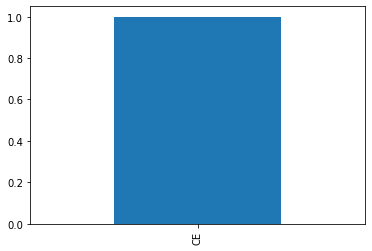

In [38]:
#product_analytic_super_category: Super category to which the product belongs
Consumer_df.product_analytic_super_category.value_counts(normalize=True).plot.bar()
plt.show()

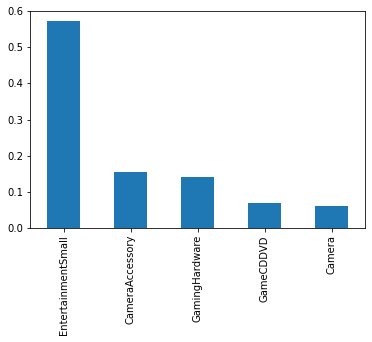

In [39]:
# product_analytic_category: Category to which the product belongs
Consumer_df.product_analytic_category.value_counts(normalize=True).plot.bar()
plt.show()

(1648824, 20)


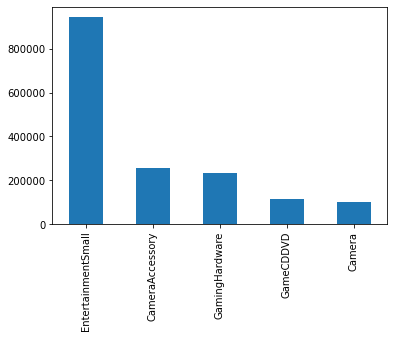

In [40]:
print(Consumer_df.shape)
Consumer_df.product_analytic_category.value_counts().plot.bar()
plt.show()

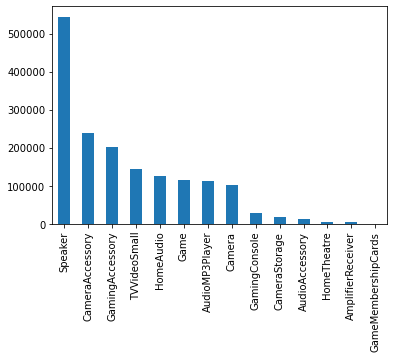

In [41]:
# product_analytic_sub_category: Sub-category to which the product belongs
#'product_analytic_sub_category' has the categories we are interested in :
# 1. CameraAccessory
# 2. GamingAccessory
# 3. HomeAudio
Consumer_df.product_analytic_sub_category.value_counts().plot.bar()
plt.show()

In [42]:
# product_analytic_vertical: Assortment vertical to which the product belongs
Consumer_df.product_analytic_vertical.value_counts()

LaptopSpeaker              287850
MobileSpeaker              250250
AudioMP3Player             112892
PhysicalGame               105061
HomeAudioSpeaker            85607
GamingHeadset               62311
GamePad                     59115
DSLR                        56615
Flash                       48769
SelectorBox                 46253
CameraBattery               41307
RemoteControl               39724
Point & Shoot               38740
CameraTripod                37909
GamingMouse                 37484
VideoGlasses                36723
Lens                        35474
FMRadio                     28259
VideoPlayer                 20295
HandheldGamingConsole       19383
CameraStorageMemoryCard     17985
CameraBag                   17523
CameraBatteryCharger        15660
Binoculars                  14599
Filter                      12718
GamingConsole                9676
GamingAccessoryKit           9508
CodeInTheBoxGame             9345
Microphone                   9079
TVOutCableAcce

In [43]:
#This should return the number of records or rows which is seen in this next cell
Consumer_df.product_analytic_vertical.value_counts().sum()

1648824

In [44]:
print(Consumer_df.shape)
initial_shape = Consumer_df.shape
initial_shape

(1648824, 20)


(1648824, 20)

### Treating incorrect GMV values w.r.t product_mrp * units
#### GMV values cannot be greater than (product_mrp * units)
We use np.where function to perform a conditional update

The first parameter in the where function specifies the condition. The second parameter indicates the value to be used for rows that fit the condition. The third parameter is the value for the rows that do not meet the given condition.

In [45]:
# Instances of incorrect or faulty product_mrp values are where GMV values are greater than MRP * units
print(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0] / Consumer_df.shape[0]), 2))

38569
2.34


There are `38569` records `(2.34%)` in the dataframe where the GMV value is greater than the MRP * units.
##### We will be imputing the faulty mrp values with gmv/units

In [46]:
# update column based on another column
Consumer_df.product_mrp = np.where(Consumer_df['product_mrp'] < Consumer_df['gmv'] / Consumer_df['units'], \
                                   Consumer_df['gmv'] / Consumer_df['units'], Consumer_df['product_mrp'])

Consumer_df.shape

(1648824, 20)

Reinspecting instances where GMV value is greater than the MRP * units.

In [47]:
# Instances of incorrect or faulty product_mrp values are where GMV values are greater than MRP * units
print(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['product_mrp'] * Consumer_df['units'] < Consumer_df['gmv']].shape[0] / Consumer_df.shape[0]), 2))

0
0.0


All the erroneous instances were removed. No erroneous rows left in MRP, GMV or Units columns

In [48]:
Consumer_df.shape[0] #No of rows in Consumer_df

1648824

### Handling Negative values for `deliverybdays` & `deliverycdays`

In [49]:
print(Consumer_df.loc[Consumer_df['deliverybdays'] < 0].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['deliverybdays'] < 0].shape[0]/Consumer_df.shape[0]),4))

print(Consumer_df.loc[Consumer_df['deliverycdays'] < 0].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['deliverycdays'] < 0].shape[0]/Consumer_df.shape[0]),4))

38
0.0023
39
0.0024


#### Inference:
- There are 38 records(0.0023%) in the dataframe with negative values for deliverybdays.
- There are 39 records(0.0024%) in the dataframe with negative values for deliverycdays.

We will be dropping such rows since it is not possible for a product to have negative values for Dispatch Delay from Warehouse and to customer.

In [50]:
print(Consumer_df.shape)

(1648824, 20)


In [51]:
Consumer_df = Consumer_df.loc[(Consumer_df['deliverybdays'] >= 0) & (Consumer_df['deliverycdays'] >= 0)]
print(Consumer_df.shape)
Consumer_df.reset_index(drop=True, inplace=True)
print(Consumer_df.shape)


(1648785, 20)
(1648785, 20)


In [52]:
1648824-1648785

39

### Handling Negative values for `product_procurement_sla`
- Product procurement SLA: Time typically taken to procure the product in number of days

In [53]:
print(Consumer_df.loc[Consumer_df['product_procurement_sla'] < 0].shape[0])
print(round(100*(Consumer_df.loc[Consumer_df['product_procurement_sla'] < 0].shape[0]/Consumer_df.shape[0]),4))

75986
4.6086


- There are `75986 records(4.61%)` in the dataframe with negative values for product_procurement_sla.
We will be dropping such rows since it is not possible for a product to have negative values for time typically taken to procure it.

In [54]:
print(Consumer_df.shape)
Consumer_df = Consumer_df.loc[(Consumer_df['product_procurement_sla'] >= 0)]
Consumer_df.reset_index(drop=True, inplace=True)
print(Consumer_df.shape)

(1648785, 20)
(1572799, 20)


### Handling large values for `product_procurement_sla`

In [55]:
Consumer_df.product_procurement_sla.value_counts()

2       528406
1       308504
3       303349
5       222097
4       120190
0        42459
6        18559
7        11746
15        6184
14        5281
1000      4745
13         526
8          523
9           97
10          73
12          60
Name: product_procurement_sla, dtype: int64

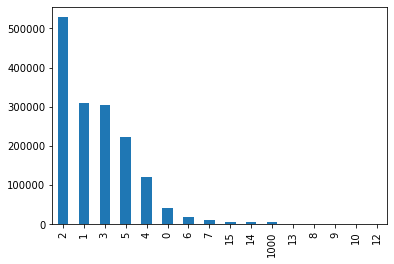

In [56]:
Consumer_df.product_procurement_sla.value_counts().plot.bar()
plt.show()

#### Inference:
- We can see that the highest number of days to procure a product is `1000`, after that the second highest value is `15` days, thus we drop the record/rows (total of `4745` rows) which have 1000 days are their sla value

In [57]:
Consumer_df[['product_procurement_sla']].describe().T

count      mean        std  min  25%  50%  75%  \
product_procurement_sla  1572799.0  5.712887  54.724168  0.0  2.0  2.0  3.0   

                            max  
product_procurement_sla  1000.0

In [58]:
Consumer_df['product_procurement_sla'].describe().T

count    1.572799e+06
mean     5.712887e+00
std      5.472417e+01
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.000000e+03
Name: product_procurement_sla, dtype: float64

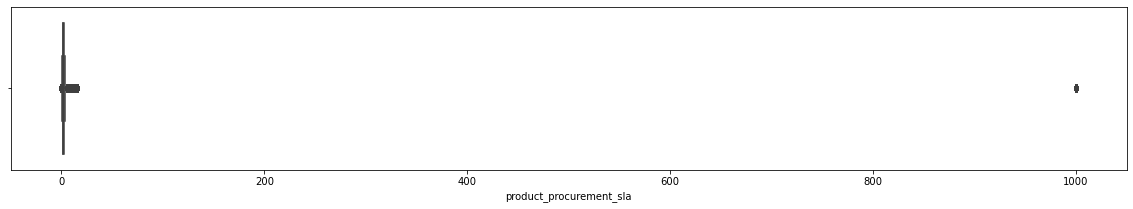

In [59]:
plt.figure(figsize=[20,3])
sns.boxplot(Consumer_df.product_procurement_sla)
plt.show()

In [60]:
print(Consumer_df.loc[Consumer_df['product_procurement_sla'] >= 1000].shape[0])

print(round(100*(Consumer_df.loc[Consumer_df['product_procurement_sla'] >= 1000].shape[0]/Consumer_df.shape[0]),4))

4745
0.3017


There are `4745 records(0.3%)` in the dataframe with unusually large values of product_procurement_sla.
We will be dropping such rows since it is not possible for a product to have product_procurement_sla a very high value such as that of `1000`

Retaining rows where the sla is less than 1000

In [61]:
print(Consumer_df.shape)
#Retaining rows where the sla is less than 1000
Consumer_df = Consumer_df.loc[(Consumer_df['product_procurement_sla'] < 1000)]
print(Consumer_df.shape)

(1572799, 20)
(1568054, 20)


## De-Duplicate Data

##### Make all string columns lower case

In [62]:
Consumer_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                               float64
product_procurement_sla                     int64


In [63]:
# Find columns with non numeric dtypes(categorical datatypes) and store in variable which is a column list, can be used to subset and get a new dataframe
cat_cols = Consumer_df.select_dtypes(exclude=[np.number]).columns
print (cat_cols)
cat_cols

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       's1_fact.order_payment_type', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical'],
      dtype='object')


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       's1_fact.order_payment_type', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical'],
      dtype='object')

In [64]:
# See values inside columns, we have upper case values. For eg inside 'product_analytic_category' we have CameraAccessory
Consumer_df.head(2)

fsn_id          order_date  Year Month     order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015    10   3.4193e+15   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015    10  1.42083e+15   

  order_item_id     gmv  units  deliverybdays  deliverycdays  \
0    3.4193e+15  6400.0      1            0.0            0.0   
1   1.42083e+15  6900.0      1            0.0            0.0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod       7190.0                        0  
1              CameraTripod       7190.0                        0

In [65]:
cat_cols = [cname for cname in Consumer_df.columns if Consumer_df[cname].dtype == "object"]
Consumer_df[cat_cols].describe() #Check Unique values

fsn_id     Year    Month      order_id  order_item_id  \
count            1568054  1568054  1568054  1.568054e+06   1.568054e+06   
unique             20620        2       12  1.430145e+06   1.410408e+06   
top     SELDXMC3JNMTQMGV     2016        9  1.560047e+15   3.000373e+17   
freq               17859   835309   198112  3.400000e+01   3.800000e+01   

       s1_fact.order_payment_type  cust_id       pincode  \
count                     1568054  1568054  1.568054e+06   
unique                          2  1199714  1.288000e+04   
top                           COD          -9.031043e+18   
freq                      1130205     4519  7.519000e+03   

       product_analytic_super_category product_analytic_category  \
count                          1568054                   1568054   
unique                               1                         5   
top                                 CE        EntertainmentSmall   
freq                           1568054                    897157   

       product_analytic_sub_category product_analytic_vertical  
count                        1568054                   1568054  
unique                            14                        73  
top                          Speaker             MobileSpeaker  
freq                          501816                    249170

In [66]:
print(cat_cols)

['fsn_id', 'Year', 'Month', 'order_id', 'order_item_id', 's1_fact.order_payment_type', 'cust_id', 'pincode', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical']


In [67]:
# Filtering the string columns

cat_cols = ['fsn_id',
 's1_fact.order_payment_type',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

for col in cat_cols:
    Consumer_df[col] = Consumer_df[col].str.lower()

In [68]:
# See values inside columns, we have now have all lower case values. For eg inside 'product_analytic_category' we have cameraaccessory
Consumer_df.head(2)

fsn_id          order_date  Year Month     order_id  \
0  acccx3s58g7b5f6p 2015-10-17 15:11:54  2015    10   3.4193e+15   
1  acccx3s58g7b5f6p 2015-10-19 10:07:22  2015    10  1.42083e+15   

  order_item_id     gmv  units  deliverybdays  deliverycdays  \
0    3.4193e+15  6400.0      1            0.0            0.0   
1   1.42083e+15  6900.0      1            0.0            0.0   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        cod    5  -1.01299130778588E+018   
1                        cod    7  -8.99032457905512E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              ce   
1   7.33541149097431E+018                              ce   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod       7190.0                        0  
1              cameratripod       7190.0                        0

#### Inference:
- We can see that the str.tolower() for the necessary listed columns has worked.

##### Spelling check by investigating the unique values

In [69]:
cat_cols = [cname for cname in Consumer_df.columns if Consumer_df[cname].dtype == "object"]
Consumer_df[cat_cols].describe()

fsn_id     Year    Month      order_id  order_item_id  \
count            1568054  1568054  1568054  1.568054e+06   1.568054e+06   
unique             20620        2       12  1.430145e+06   1.410408e+06   
top     seldxmc3jnmtqmgv     2016        9  1.560047e+15   3.000373e+17   
freq               17859   835309   198112  3.400000e+01   3.800000e+01   

       s1_fact.order_payment_type  cust_id       pincode  \
count                     1568054  1568054  1.568054e+06   
unique                          2  1199714  1.288000e+04   
top                           cod          -9.031043e+18   
freq                      1130205     4519  7.519000e+03   

       product_analytic_super_category product_analytic_category  \
count                          1568054                   1568054   
unique                               1                         5   
top                                 ce        entertainmentsmall   
freq                           1568054                    897157   

       product_analytic_sub_category product_analytic_vertical  
count                        1568054                   1568054  
unique                            14                        73  
top                          speaker             mobilespeaker  
freq                          501816                    249170

##### Drop duplicate rows

In [70]:
Consumer_df.shape

(1568054, 20)

In [71]:
Consumer_df.duplicated().value_counts()

False    1468771
True       99283
dtype: int64

In [72]:
print(Consumer_df.duplicated().value_counts()[1])

print(round(100*(Consumer_df.duplicated().value_counts()[1]/Consumer_df.shape[0]),4))

99283
6.3316


#### Around `99283 (6.33%)` rows have duplicates. We will go ahead and drop them.

In [73]:
Consumer_df.drop_duplicates(keep='first', inplace=True)
Consumer_df.shape

(1468771, 20)

In [74]:
Consumer_df.duplicated().value_counts()

False    1468771
dtype: int64

#### Inference: 
- We can see that there are no more duplicates
- At this checkpoint we have a total of `1468771` records or rows

### Treating Nulls

In [75]:
# # Print the null percentage of each column of dataframe 'Consumer_df'.
# percent_missing = Consumer_df.isnull().sum() * 100 / len(Consumer_df)
# missing_value_df = pd.DataFrame({'column_name': Consumer_df.columns, 'No of Nulls':Consumer_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

In [76]:
getNullCount_df(Consumer_df)

column_name  No of Nulls  \
gmv                                                          gmv         3705   
fsn_id                                                    fsn_id            0   
sla                                                          sla            0   
product_mrp                                          product_mrp            0   
product_analytic_vertical              product_analytic_vertical            0   
product_analytic_sub_category      product_analytic_sub_category            0   
product_analytic_category              product_analytic_category            0   
product_analytic_super_category  product_analytic_super_category            0   
pincode                                                  pincode            0   
cust_id                                                  cust_id            0   
s1_fact.order_payment_type            s1_fact.order_payment_type            0   
order_date                                            order_date            0   
deliverycdays                                      deliverycdays            0   
deliverybdays                                      deliverybdays            0   
units                                                      units            0   
order_item_id                                      order_item_id            0   
order_id                                                order_id            0   
Month                                                      Month            0   
Year                                                        Year            0   
product_procurement_sla                  product_procurement_sla            0   

                                 percent_missing  
gmv                                     0.252252  
fsn_id                                  0.000000  
sla                                     0.000000  
product_mrp                             0.000000  
product_analytic_vertical               0.000000  
product_analytic_sub_category           0.000000  
product_analytic_category               0.000000  
product_analytic_super_category         0.000000  
pincode                                 0.000000  
cust_id                                 0.000000  
s1_fact.order_payment_type              0.000000  
order_date                              0.000000  
deliverycdays                           0.000000  
deliverybdays                           0.000000  
units                                   0.000000  
order_item_id                           0.000000  
order_id                                0.000000  
Month                                   0.000000  
Year                                    0.000000  
product_procurement_sla                 0.000000

There are a few null values in the `gmv` column.
Also, there are quite a few Whitespaces present in some of the columns in the dataframe.
Let us first convert/replace these white spaces to Nans and then we would treat them accordingly.

In [77]:
Consumer_df.replace(' ', np.nan, inplace = True)

In [78]:
getNullCount_df(Consumer_df)

column_name  No of Nulls  \
gmv                                                          gmv         3705   
pincode                                                  pincode         3705   
cust_id                                                  cust_id         3705   
fsn_id                                                    fsn_id            0   
sla                                                          sla            0   
product_mrp                                          product_mrp            0   
product_analytic_vertical              product_analytic_vertical            0   
product_analytic_sub_category      product_analytic_sub_category            0   
product_analytic_category              product_analytic_category            0   
product_analytic_super_category  product_analytic_super_category            0   
s1_fact.order_payment_type            s1_fact.order_payment_type            0   
order_date                                            order_date            0   
deliverycdays                                      deliverycdays            0   
deliverybdays                                      deliverybdays            0   
units                                                      units            0   
order_item_id                                      order_item_id            0   
order_id                                                order_id            0   
Month                                                      Month            0   
Year                                                        Year            0   
product_procurement_sla                  product_procurement_sla            0   

                                 percent_missing  
gmv                                     0.252252  
pincode                                 0.252252  
cust_id                                 0.252252  
fsn_id                                  0.000000  
sla                                     0.000000  
product_mrp                             0.000000  
product_analytic_vertical               0.000000  
product_analytic_sub_category           0.000000  
product_analytic_category               0.000000  
product_analytic_super_category         0.000000  
s1_fact.order_payment_type              0.000000  
order_date                              0.000000  
deliverycdays                           0.000000  
deliverybdays                           0.000000  
units                                   0.000000  
order_item_id                           0.000000  
order_id                                0.000000  
Month                                   0.000000  
Year                                    0.000000  
product_procurement_sla                 0.000000

In [79]:
# # Print the null percentage of each column of dataframe 'Consumer_df'.
# percent_missing = Consumer_df.isnull().sum() * 100 / len(Consumer_df)
# missing_value_df = pd.DataFrame({'column_name': Consumer_df.columns, 'No of Nulls':Consumer_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

##### Removing rows(Not Columns) where a particular column has high missing values¶: 'gmv,'pincode','cust_id'

In [80]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
Consumer_df = Consumer_df[~pd.isnull(Consumer_df['gmv'])]
org_shape = Consumer_df.shape
org_shape

(1465066, 20)

In [81]:
# Print the null percentage of each column of dataframe 'Consumer_df'.
getNullCount_df(Consumer_df)

column_name  No of Nulls  \
fsn_id                                                    fsn_id            0   
order_date                                            order_date            0   
product_mrp                                          product_mrp            0   
product_analytic_vertical              product_analytic_vertical            0   
product_analytic_sub_category      product_analytic_sub_category            0   
product_analytic_category              product_analytic_category            0   
product_analytic_super_category  product_analytic_super_category            0   
pincode                                                  pincode            0   
cust_id                                                  cust_id            0   
sla                                                          sla            0   
s1_fact.order_payment_type            s1_fact.order_payment_type            0   
deliverycdays                                      deliverycdays            0   
deliverybdays                                      deliverybdays            0   
units                                                      units            0   
gmv                                                          gmv            0   
order_item_id                                      order_item_id            0   
order_id                                                order_id            0   
Month                                                      Month            0   
Year                                                        Year            0   
product_procurement_sla                  product_procurement_sla            0   

                                 percent_missing  
fsn_id                                       0.0  
order_date                                   0.0  
product_mrp                                  0.0  
product_analytic_vertical                    0.0  
product_analytic_sub_category                0.0  
product_analytic_category                    0.0  
product_analytic_super_category              0.0  
pincode                                      0.0  
cust_id                                      0.0  
sla                                          0.0  
s1_fact.order_payment_type                   0.0  
deliverycdays                                0.0  
deliverybdays                                0.0  
units                                        0.0  
gmv                                          0.0  
order_item_id                                0.0  
order_id                                     0.0  
Month                                        0.0  
Year                                         0.0  
product_procurement_sla                      0.0

In [82]:
# # Print the null percentage of each column of dataframe 'Consumer_df'.
# percent_missing = Consumer_df.isnull().sum() * 100 / len(Consumer_df)
# missing_value_df = pd.DataFrame({'column_name': Consumer_df.columns, 'No of Nulls':Consumer_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

###### Finally no Null rows exist in the dataframe

### Selecting one Year Data
- As per business requirement, we have to use the data from July 2015 to June 2016.

Changing the datatype of the column 'order_date' to datetime64

##### Identifying the data outside our analysis period - `01-Jul-2015 to 30-Jun-2016`

In [83]:
Consumer_df.loc[(Consumer_df['order_date'].dt.floor("d") < '2015-07-01') | (Consumer_df['order_date'].dt.floor("d") >= '2016-07-01')].shape

(592, 20)

There are `592` records that fall outside our analysis period - `01-Jul-2015 to 30-Jun-2016`
We will be dropping these records.

In [84]:
Consumer_df = Consumer_df.loc[(Consumer_df['order_date'].dt.floor("d") >= '2015-07-01') & (Consumer_df['order_date'].dt.floor("d") < '2016-07-01')]
Consumer_df.shape

(1464474, 20)

In [85]:
print(Consumer_df.shape)

(1464474, 20)


In [86]:
Max = pd.DataFrame(Consumer_df[['order_date']].max().rename('Max'))
Min = pd.DataFrame(Consumer_df[['order_date']].min().rename('Min'))

pd.concat([Min, Max], axis=1)

Min                 Max
order_date 2015-07-01 00:36:11 2016-06-30 23:59:26

This verifies that our dataframe has data between July 2015 and June 2016 only.

#### Checkpoint: 
- Uptil now we deleted/removed rows insignificant to our analysis.
- Next we delete columns which are insignificant to our analysis.

### Dropping Insignificant Columns

In [87]:
cat_cols = [cname for cname in Consumer_df.columns if Consumer_df[cname].dtype == "object"]
Consumer_df[cat_cols].describe() #Check Unique values

fsn_id     Year    Month s1_fact.order_payment_type  \
count            1464474  1464474  1464474                    1464474   
unique             20613        2       12                          2   
top     camda6rjerf8hs4g     2016       10                        cod   
freq               16458   834646   187636                    1053936   

             cust_id       pincode product_analytic_super_category  \
count   1.464474e+06  1.464474e+06                         1464474   
unique  1.199296e+06  1.287700e+04                               1   
top    -2.971517e+18 -9.031043e+18                              ce   
freq    1.080000e+02  7.512000e+03                         1464474   

       product_analytic_category product_analytic_sub_category  \
count                    1464474                       1464474   
unique                         5                            14   
top           entertainmentsmall                       speaker   
freq                      834566                        468382   

       product_analytic_vertical  
count                    1464474  
unique                        73  
top                mobilespeaker  
freq                      235714

In [88]:
Consumer_df.product_analytic_super_category.value_counts()

ce    1464474
Name: product_analytic_super_category, dtype: int64

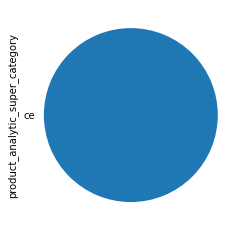

In [89]:
Consumer_df.product_analytic_super_category.value_counts().plot.pie()
plt.show()

#### Inference From Above:
- We can visualize that 'product_analytic_super_category' has just one unique value and thus its adds no information and can be dropped.

In [90]:
# Programatic way to identify Single value columns or columns with all different values
# Dropping Columns with Single Value or all Different Values

count_df = pd.DataFrame(Consumer_df.apply(lambda x: len(x.value_counts()), axis=0), columns=['Count'])

drop_columns = list(count_df.loc[(count_df['Count']==1) | (count_df['Count']==len(Consumer_df.index))].index)

print('Dropping these columns => {}'.format(drop_columns))

Consumer_df.drop(drop_columns, axis=1, inplace=True)

Dropping these columns => ['product_analytic_super_category']


In [91]:
len(Consumer_df.index)

1464474

So now we have `1464474` records or rows to deal with

In [92]:
# Dropping ID Columns which are insignificant to the analysis

drop_columns = ['fsn_id', 'order_id', 'order_item_id', 'cust_id']

Consumer_df.drop(drop_columns, axis=1, inplace=True)

In [93]:
print(Consumer_df.shape)

(1464474, 15)


## Feature Engineering: Creation of New Features or Columns
1. Week#: Generating Week Column from Order Date
2. List Price: List Price= GMV*Units
3. Payday Week: If Payday falls within the week then payday week=1 else 0
4. Holiday Week:  If Holiday falls within the week then payday week=1 else 0
5. Product Type (Luxury/Mass Market): Is GMV value is greater than 80 percentile, then luxury else mass market
6. Discount%: Discount%= 100*(product_mrp-listprice)/product_mrp
7. SMA(Simple Moving Average): 3 and 5 Week SMA for all Advertising Media Channels, NPS and Stock Exchange
8. EMA(Exponential Moving Average): 8 Week EMA for all Advertising Media Channels
9. Ad Stock Values: for all Advertising Media Channels(assuming adstock rate as 60%)

### Generate `Week` Column
- Before generating this 'Week' Column lets see the head of the respective dataframe

In [94]:
Consumer_df.head(2)

order_date  Year Month     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10  6400.0      1            0.0   
1 2015-10-19 10:07:22  2015    10  6900.0      1            0.0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0            0.0                        cod    5  -7.79175582905735E+018   
1            0.0                        cod    7   7.33541149097431E+018   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod       7190.0                        0  
1              cameratripod       7190.0                        0

In [95]:
# Creating a new column into a specific position in a DataFrame
loc_index = Consumer_df.columns.get_loc('Month') + 1
Consumer_df.insert(loc=loc_index,column='Week',value=Consumer_df['order_date'].dt.strftime("%V"))

Consumer_df['Year'] = Consumer_df['Year'].astype('str')
Consumer_df.head(2)

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1            0.0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1            0.0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0            0.0                        cod    5  -7.79175582905735E+018   
1            0.0                        cod    7   7.33541149097431E+018   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod       7190.0                        0  
1              cameratripod       7190.0                        0

In [96]:
# Checking the combinations for any discrepancies

Consumer_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

Year Week   Month
0   2015   27     284
1   2015   28   22168
2   2015   29   22480
3   2015   30   23461
4   2015   31   15256
5   2015   32      26
6   2015   33      11
7   2015   34       8
8   2015   35      12
9   2015   36   21699
10  2015   37   22862
11  2015   38   20627
12  2015   39   22974
13  2015   40   22280
14  2015   41   19620
15  2015   42  106456
16  2015   43   22940
17  2015   44   30343
18  2015   45   34121
19  2015   46   29492
20  2015   47   20920
21  2015   48   22926
22  2015   49   25409
23  2015   50   34954
24  2015   51   26785
25  2015   52   44972
26  2015   53   16742
27  2016   01   32388
28  2016   02   26514
29  2016   03   39103
30  2016   04   28014
31  2016   05   32148
32  2016   06   29921
33  2016   07   38557
34  2016   08   35146
35  2016   09   33053
36  2016   10   45205
37  2016   11   31427
38  2016   12   29084
39  2016   13   29738
40  2016   14   30099
41  2016   15   24874
42  2016   16   14761
43  2016   17   52832
44  2016   18   31270
45  2016   19   33503
46  2016   20   32760
47  2016   21   43469
48  2016   22   31134
49  2016   23   30529
50  2016   24   28267
51  2016   25   24315
52  2016   26   13362
53  2016   53   13173

In [97]:
# Updating the year as 2015 for the week whose week# is 53 but belongs to 2016 for consistency with the other data sets

# Updating the month as 12 for the above rows for consistency

# Dropping rows (less in number) with week# 27 as it belongs to the weeks in June 2015

Consumer_df.loc[(Consumer_df.Year == '2016') & (Consumer_df.Week == '53'), 'Year'] = '2015'

Consumer_df.loc[(Consumer_df.Year == '2015') & (Consumer_df.Week == '53'), 'Month'] = 12

Consumer_df.drop(Consumer_df[Consumer_df['Week'] == '27'].index, inplace = True)

In [98]:
Consumer_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

Year Week   Month
0   2015   28   22168
1   2015   29   22480
2   2015   30   23461
3   2015   31   15256
4   2015   32      26
5   2015   33      11
6   2015   34       8
7   2015   35      12
8   2015   36   21699
9   2015   37   22862
10  2015   38   20627
11  2015   39   22974
12  2015   40   22280
13  2015   41   19620
14  2015   42  106456
15  2015   43   22940
16  2015   44   30343
17  2015   45   34121
18  2015   46   29492
19  2015   47   20920
20  2015   48   22926
21  2015   49   25409
22  2015   50   34954
23  2015   51   26785
24  2015   52   44972
25  2015   53   29915
26  2016   01   32388
27  2016   02   26514
28  2016   03   39103
29  2016   04   28014
30  2016   05   32148
31  2016   06   29921
32  2016   07   38557
33  2016   08   35146
34  2016   09   33053
35  2016   10   45205
36  2016   11   31427
37  2016   12   29084
38  2016   13   29738
39  2016   14   30099
40  2016   15   24874
41  2016   16   14761
42  2016   17   52832
43  2016   18   31270
44  2016   19   33503
45  2016   20   32760
46  2016   21   43469
47  2016   22   31134
48  2016   23   30529
49  2016   24   28267
50  2016   25   24315
51  2016   26   13362

### Creating column `List Price`
- gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units). This is nothing but total Revenue.
- Let's derive listing price, which is nothing but gmv/units
List Price = GMV/Units

In [99]:
Consumer_df.head(2)

order_date  Year Month Week     gmv  units  deliverybdays  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      1            0.0   
1 2015-10-19 10:07:22  2015    10   43  6900.0      1            0.0   

   deliverycdays s1_fact.order_payment_type  sla                 pincode  \
0            0.0                        cod    5  -7.79175582905735E+018   
1            0.0                        cod    7   7.33541149097431E+018   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              cameratripod       7190.0                        0  
1              cameratripod       7190.0                        0

In [100]:
# Creating a new column into a specific position in a DataFrame
loc_index = Consumer_df.columns.get_loc('gmv') + 1
Consumer_df.insert(loc=loc_index,column='list_price',value = Consumer_df['gmv'] / Consumer_df['units'])
Consumer_df.head()

order_date  Year Month Week     gmv  list_price  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0      1   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0      1   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      1   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   
2            0.0            0.0                        cod   10   
3            0.0            0.0                    prepaid    4   
4            0.0            0.0                    prepaid    6   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   
2  -7.47768776228657E+018           cameraaccessory   
3  -5.83593163877661E+018           cameraaccessory   
4   5.34735360997242E+017           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   
2               cameraaccessory              cameratripod       2099.0   
3               cameraaccessory              cameratripod       2099.0   
4               cameraaccessory              cameratripod       2099.0   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

#### Displaying the column values for a few orders when units > 1

In [101]:
Consumer_df.loc[Consumer_df['units'] != 1][['gmv','list_price','product_mrp','units']].head()

gmv  list_price  product_mrp  units
559  13560.0      6780.0       8950.0      2
667    940.0       470.0       1545.0      2
669    940.0       470.0       1545.0      2
671    940.0       470.0       1545.0      2
674    940.0       470.0       1545.0      2

### Creating a Payday Flag (+- 1 for salary days)¶
*If it is nearer to the salary day in Ontario(1st and 15th of every month), we flag the column as 1, else as 0*

In [102]:
Consumer_df['payday_flag'] = Consumer_df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
Consumer_df.head()

order_date  Year Month Week     gmv  list_price  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0      1   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0      1   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      1   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   
2            0.0            0.0                        cod   10   
3            0.0            0.0                    prepaid    4   
4            0.0            0.0                    prepaid    6   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   
2  -7.47768776228657E+018           cameraaccessory   
3  -5.83593163877661E+018           cameraaccessory   
4   5.34735360997242E+017           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   
2               cameraaccessory              cameratripod       2099.0   
3               cameraaccessory              cameratripod       2099.0   
4               cameraaccessory              cameratripod       2099.0   

   product_procurement_sla  payday_flag  
0                        0            0  
1                        0            0  
2                        3            0  
3                        3            1  
4                        3            0

### Creating an Occassion Flag 

*If it is a Holiday/Occassion in Ontario, we flag the column as 1, else as 0*

The following table lists all the holidays/occassions from 1st July, 2015 to 30th June, 2016**

|Occassion|Day|
|---------|---|
|Canada Day	|July 1, 2015|
|Civic Holiday|	August 3, 2015|
|Labour Day	|September 7, 2015 |
|Thanksgiving|	October 12, 2015|
|Halloween	|October 31, 2015|
|Remembrance Day|	November 11, 2015|
|Christmas Day	|December 25, 2015|
|Boxing Day	|December 26, 2015|
|New Year's Day	|January 1, 2016|
|Islander Day	|February 15, 2016|
|Louis Riel Day	|February 15, 2016|
|Heritage Day	|February 15, 2016|
|Family Day	|February 15, 2016|
|Valentine's Day	|February 14, 2016|
|Leap Day	|February 29, 2016|
|St. Patrick's Day	|March 17, 2016|
|Good Friday	|March 25, 2016|
|Easter Monday	|March 28, 2016|
|Mother's Day	|May 8, 2016|
|Victoria Day	|May 23, 2016|
|Father's Day	|June 19, 2016|
|Aboriginal Day	|June 21, 2016|
|St. Jean Baptiste Day	|June 24, 2016|

**reference link: https://www.statutoryholidays.com/

Either we manually write a user defined function to create a `occasion flag` or we can use inbuilt panda library which gives US Federal Holidays. Here in our code we wrote user defined function. 

For inbuilt panda library to find US Federal holidays see here: https://python.plainenglish.io/a-holiday-date-with-pandas-ef089f83a24

In [103]:
def holidayflg(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0

In [104]:
Consumer_df['occassion_flag'] = Consumer_df['order_date'].apply(lambda x:holidayflg(x))
Consumer_df.head(2)

order_date  Year Month Week     gmv  list_price  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   

   product_procurement_sla  payday_flag  occassion_flag  
0                        0            0               0  
1                        0            0               0

In [105]:
Consumer_df.payday_flag.value_counts()

0    1214489
1     249701
Name: payday_flag, dtype: int64

In [106]:
Consumer_df.occassion_flag.value_counts()

0    1414831
1      49359
Name: occassion_flag, dtype: int64

### Creating a column called `Product Type` - Luxury / Mass_market
If GMV value is greater than 80 percentile, then luxury, else mass_market

In [107]:
pd.DataFrame(Consumer_df['gmv']).describe(percentiles=[.70,.80,.90]).T

count         mean          std  min    50%     70%     80%     90%  \
gmv  1464190.0  2483.958105  5622.334895  0.0  790.0  1599.0  2450.0  4300.0   

          max  
gmv  226947.0

In [108]:
gmv_80_per=Consumer_df['gmv'].quantile(.8)
gmv_80_per

2450.0

In [109]:
Consumer_df['product_type'] = Consumer_df['gmv'].apply(lambda x:'luxury' if x >= (gmv_80_per) else 'mass_market')
Consumer_df.head()

order_date  Year Month Week     gmv  list_price  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0      1   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0      1   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      1   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   
2            0.0            0.0                        cod   10   
3            0.0            0.0                    prepaid    4   
4            0.0            0.0                    prepaid    6   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   
2  -7.47768776228657E+018           cameraaccessory   
3  -5.83593163877661E+018           cameraaccessory   
4   5.34735360997242E+017           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   
2               cameraaccessory              cameratripod       2099.0   
3               cameraaccessory              cameratripod       2099.0   
4               cameraaccessory              cameratripod       2099.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  
0                        0            0               0       luxury  
1                        0            0               0       luxury  
2                        3            0               0  mass_market  
3                        3            1               0  mass_market  
4                        3            0               0  mass_market

### Calculating `Discount %`
Discount = (product_mrp - list_price) / product_mrp

In [110]:
# Creating a new column into a specific position in a DataFrame
col_loc = Consumer_df.columns.get_loc('list_price') + 1
Consumer_df.insert(loc=col_loc, column='Discount%', value = \
               round(100*((Consumer_df['product_mrp'] - Consumer_df['list_price']) / Consumer_df['product_mrp']),2))
Consumer_df.head()

order_date  Year Month Week     gmv  list_price  Discount%  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0       4.03      1   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0       5.19      1   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      19.49      1   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      22.92      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   
2            0.0            0.0                        cod   10   
3            0.0            0.0                    prepaid    4   
4            0.0            0.0                    prepaid    6   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   
2  -7.47768776228657E+018           cameraaccessory   
3  -5.83593163877661E+018           cameraaccessory   
4   5.34735360997242E+017           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   
2               cameraaccessory              cameratripod       2099.0   
3               cameraaccessory              cameratripod       2099.0   
4               cameraaccessory              cameratripod       2099.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  
0                        0            0               0       luxury  
1                        0            0               0       luxury  
2                        3            0               0  mass_market  
3                        3            1               0  mass_market  
4                        3            0               0  mass_market

### CHECKPOINT:
- This completes creation of new engineered features or columns necessary for our LR Model

### Basic EDA on Numerical and Categorical columns: Statistical Info

#### Numeric columns

In [111]:
Consumer_df.describe().T

count         mean          std   min     25%  \
gmv                      1464190.0  2483.958105  5622.334895   0.0  349.00   
list_price               1464190.0  2450.951701  5541.148673   0.0  349.00   
Discount%                1464190.0    44.547432    22.777238   0.0   27.94   
units                    1464190.0     1.021544     0.255668   1.0    1.00   
deliverybdays            1464190.0     1.032111     2.477507   0.0    0.00   
deliverycdays            1464190.0     1.202033     2.884773   0.0    0.00   
sla                      1464190.0     5.760836     2.993450   0.0    4.00   
product_mrp              1464190.0  4223.001376  8653.348732  49.0  849.00   
product_procurement_sla  1464190.0     2.701303     1.786134   0.0    2.00   
payday_flag              1464190.0     0.170539     0.376105   0.0    0.00   
occassion_flag           1464190.0     0.033711     0.180484   0.0    0.00   

                             50%      75%       max  
gmv                       790.00  1999.00  226947.0  
list_price                775.00  1999.00  226947.0  
Discount%                  45.05    61.18     100.0  
units                       1.00     1.00      50.0  
deliverybdays               0.00     0.00     238.0  
deliverycdays               0.00     0.00     278.0  
sla                         6.00     7.00    1006.0  
product_mrp              1699.00  3499.00  299999.0  
product_procurement_sla     2.00     3.00      15.0  
payday_flag                 0.00     0.00       1.0  
occassion_flag              0.00     0.00       1.0

#### Distribution of the numeric columns
- We plot the histogram for each numeric column and see which value have larger frequencies. Based on this we get an idea of how these features or columns will behave in our model
- x-axis has the different range of values
- y-axis has the number of frequencies occuring for those particular values of the columns

----------------
gmv
----------------


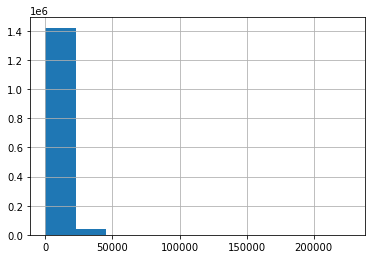

----------------
list_price
----------------


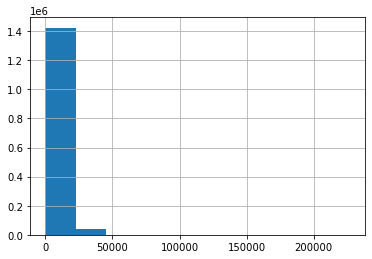

----------------
Discount%
----------------


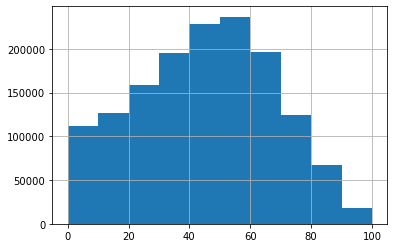

----------------
units
----------------


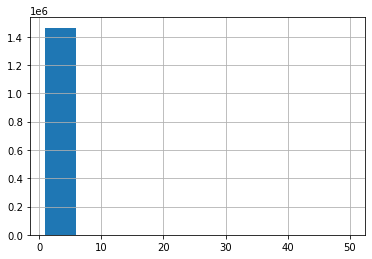

----------------
deliverybdays
----------------


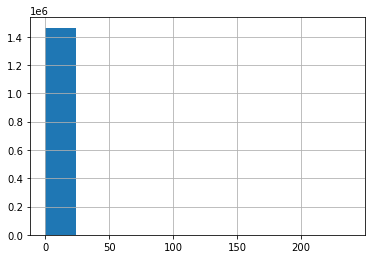

----------------
deliverycdays
----------------


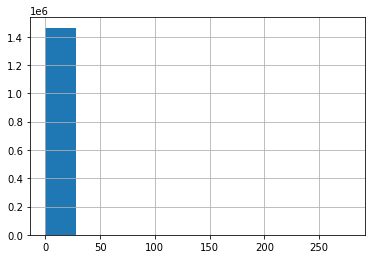

----------------
sla
----------------


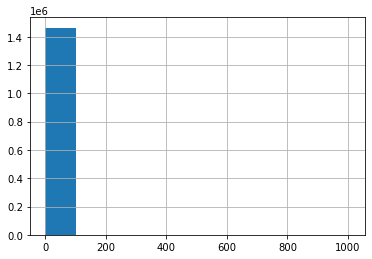

----------------
product_mrp
----------------


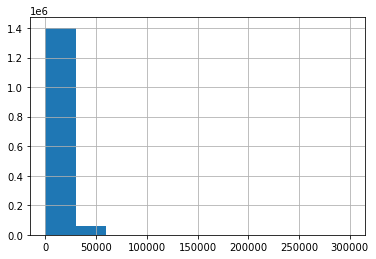

----------------
product_procurement_sla
----------------


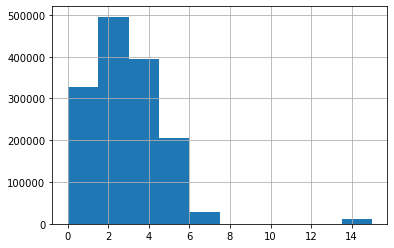

----------------
payday_flag
----------------


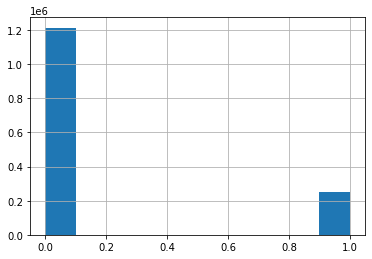

----------------
occassion_flag
----------------


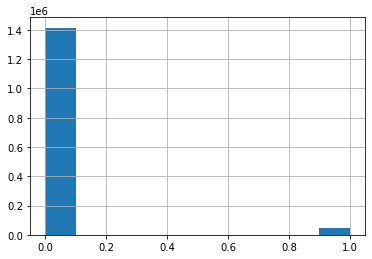

In [112]:
#Plot histograms for numeric columns:
for col in Consumer_df.describe().columns:
    print('----------------')
    print(col)
    print('----------------')
    Consumer_df[col].hist()
    plt.show()

#### Categorical columns

In [113]:
cat_var = [cname for cname in Consumer_df.columns if 
                                Consumer_df[cname].dtype == "object"]

Consumer_df[cat_var].describe().T

count unique                 top     freq
Year                               1464190      2                2016   821473
Month                              1464190     13                  10   187636
Week                               1464190     52                  42   106456
s1_fact.order_payment_type         1464190      2                 cod  1053934
pincode                        1.46419e+06  12877        -9.03104e+18     7512
product_analytic_category          1464190      5  entertainmentsmall   834380
product_analytic_sub_category      1464190     14             speaker   468310
product_analytic_vertical          1464190     73       mobilespeaker   235677
product_type                       1464190      2         mass_market  1171351

#### Inference
- We can see that there are exactly 52 unique weeks

In [114]:
print(cat_var)

['Year', 'Month', 'Week', 's1_fact.order_payment_type', 'pincode', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical', 'product_type']


### Outlier Treatment: Capping outliers to specific quantile value based on investigation of various columns:

In [115]:
Consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464190 entries, 0 to 1473147
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   order_date                     1464190 non-null  datetime64[ns]
 1   Year                           1464190 non-null  object        
 2   Month                          1464190 non-null  object        
 3   Week                           1464190 non-null  object        
 4   gmv                            1464190 non-null  float64       
 5   list_price                     1464190 non-null  float64       
 6   Discount%                      1464190 non-null  float64       
 7   units                          1464190 non-null  int64         
 8   deliverybdays                  1464190 non-null  float64       
 9   deliverycdays                  1464190 non-null  float64       
 10  s1_fact.order_payment_type     1464190 non-null  objec

In [116]:
#Find numeric columns
num_cols = [cname for cname in Consumer_df.columns if 
                                Consumer_df[cname].dtype == "int64" or Consumer_df[cname].dtype == "float64" ]
print(num_cols)

['gmv', 'list_price', 'Discount%', 'units', 'deliverybdays', 'deliverycdays', 'sla', 'product_mrp', 'product_procurement_sla', 'payday_flag', 'occassion_flag']


In [117]:
#Numeric variables of interest for plotting box plots
numeric_variables=['gmv','list_price','Discount%','deliverybdays','deliverycdays','sla','product_mrp','product_procurement_sla']

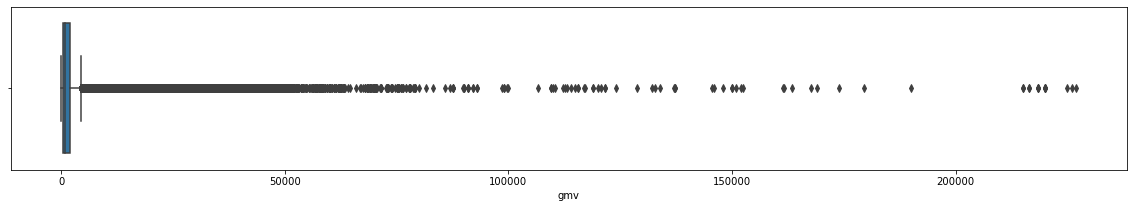

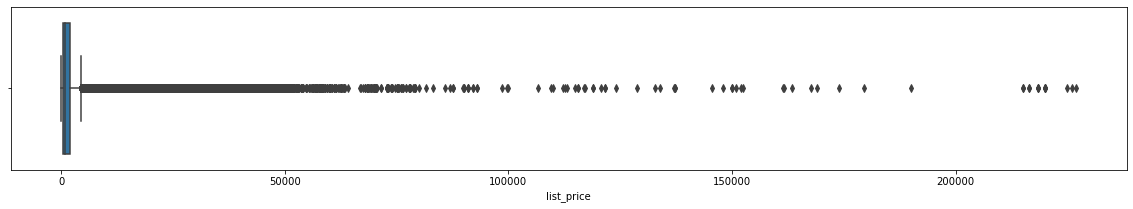

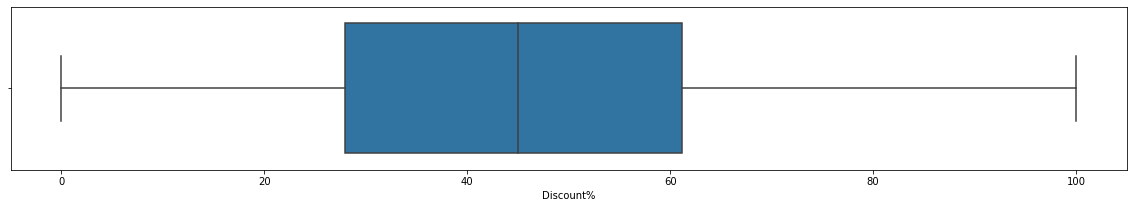

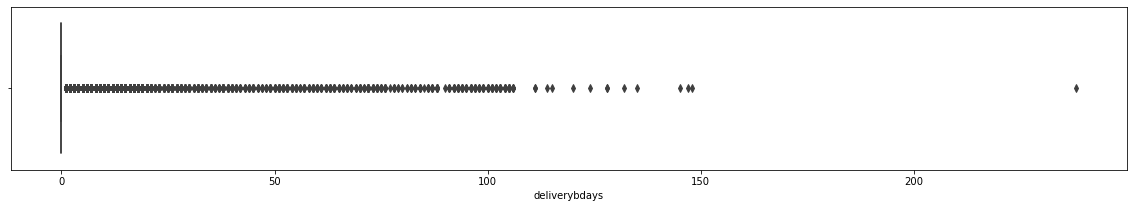

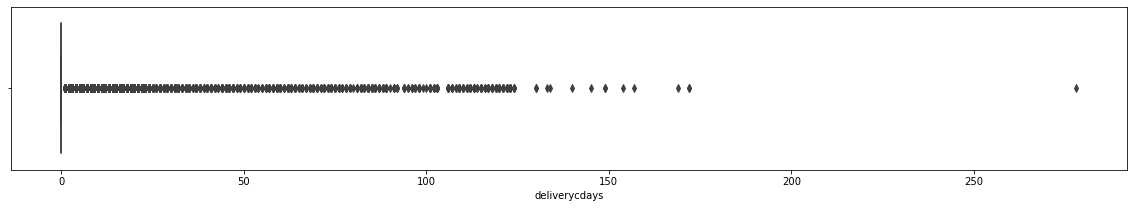

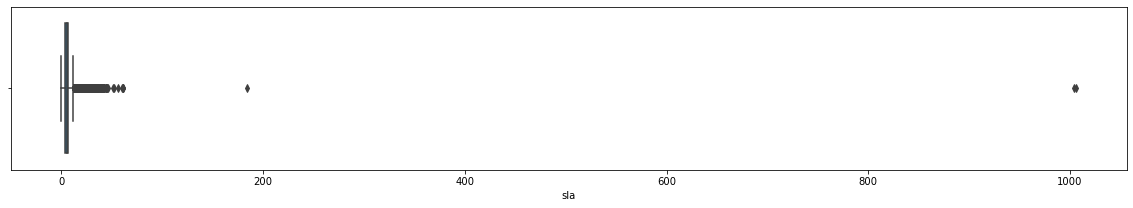

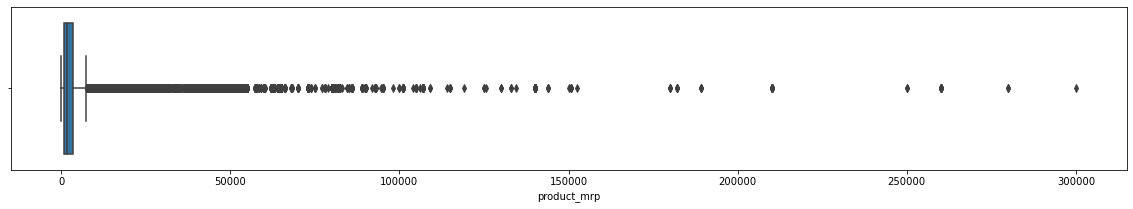

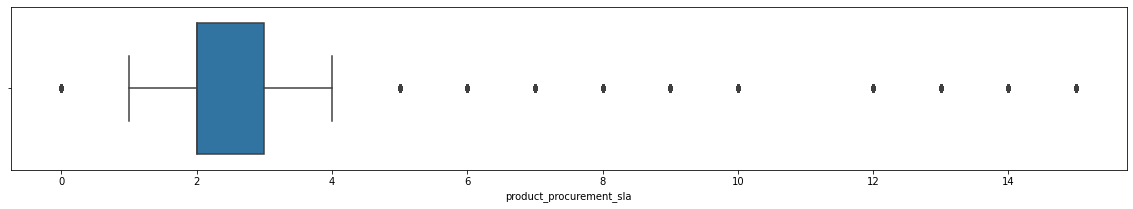

In [118]:
#For each numeric column within the set of 'numeric_cols' draw a boxplot:
for column in Consumer_df[numeric_variables]:
    plt.figure(figsize=[20,3])
    sns.boxplot(Consumer_df[column])
    plt.show()

*Same above box plots drawn in a different way(Grid Way) below:*

In [119]:
#Function to plot the distribution plot of the numeric variable list
def univariate_continuos(var_list,dataframe):
    plt.figure(figsize=(12,6))
    for var in var_list:
        plt.subplot(2,4,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=dataframe)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

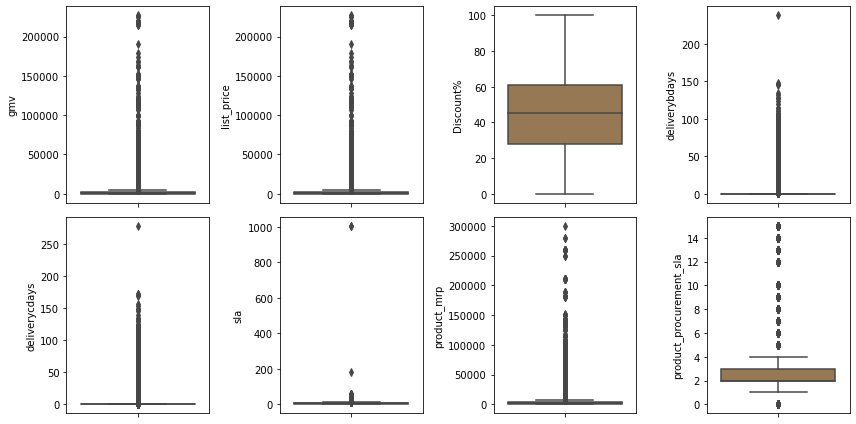

In [120]:
univariate_continuos(numeric_variables,Consumer_df)

*There seems to be a lot of outliers in the columns. But all outliers may not be at random and we will have to be careful regarding which ones to drop.*

In [121]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
# Here we see that 99% and max are of different values; after capping to 99% both 99% and max should be same
Consumer_df[numeric_variables].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count         mean          std   min     25%  \
gmv                      1464190.0  2483.958105  5622.334895   0.0  349.00   
list_price               1464190.0  2450.951701  5541.148673   0.0  349.00   
Discount%                1464190.0    44.547432    22.777238   0.0   27.94   
deliverybdays            1464190.0     1.032111     2.477507   0.0    0.00   
deliverycdays            1464190.0     1.202033     2.884773   0.0    0.00   
sla                      1464190.0     5.760836     2.993450   0.0    4.00   
product_mrp              1464190.0  4223.001376  8653.348732  49.0  849.00   
product_procurement_sla  1464190.0     2.701303     1.786134   0.0    2.00   

                             50%      75%      90%       95%      99%  \
gmv                       790.00  1999.00  4300.00  11170.00  30499.0   
list_price                775.00  1999.00  4299.00  10990.00  29746.0   
Discount%                  45.05    61.18    74.93     81.32     90.4   
deliverybdays               0.00     0.00     5.00      6.00      8.0   
deliverycdays               0.00     0.00     5.00      7.00     10.0   
sla                         6.00     7.00     9.00     10.00     13.0   
product_mrp              1699.00  3499.00  7150.00  17995.00  45990.0   
product_procurement_sla     2.00     3.00     5.00      5.00      7.0   

                              max  
gmv                      226947.0  
list_price               226947.0  
Discount%                   100.0  
deliverybdays               238.0  
deliverycdays               278.0  
sla                        1006.0  
product_mrp              299999.0  
product_procurement_sla      15.0

#### After analyzing the distribution of values of the above attributes at different percentiles, we come to the following conclusion:

 - `'gmv', 'list_price' and 'mrp'` values can have occassional outliers owing to the fact that there are seldom some high value sales. These records are less frequent and not at all at random.
 - `'Discount%'` can also be more in case on certain products. Specifically, a discount percentage of 100% would mean, the product came free with some other product.
 - On ther hand, unusually high values of `'deliverybdays', 'deliverycdays' and 'sla'` seem to be erroneous data. So we will find a way to treat these outlier values so that they do not affect the predictive model while at the same time there will be enough data to build a generalizable model.

In [122]:
# Checking the skewness in the dataset before capping, observe skew intensity of each variable
Consumer_df[numeric_variables].skew()

gmv                         5.177873
list_price                  5.161353
Discount%                  -0.063059
deliverybdays              10.224998
deliverycdays              10.297208
sla                        51.501078
product_mrp                 4.612160
product_procurement_sla     2.490341
dtype: float64

In [123]:
Consumer_df[['deliverybdays', 'deliverycdays' ,'sla']].quantile([.95, .99])

deliverybdays  deliverycdays   sla
0.95            6.0            7.0  10.0
0.99            8.0           10.0  13.0

#### Percentage of Outliers in column deliverybdays

In [124]:
deliverybdays_99_per=Consumer_df['deliverybdays'].quantile(.99)
deliverybdays_99_per

8.0

In [125]:
#No of records or rows
Consumer_df.shape[0]

1464190

In [126]:
print(round(100*(Consumer_df.loc[Consumer_df['deliverybdays'] > deliverybdays_99_per].shape[0] / Consumer_df.shape[0]),4))

0.8753


#### Percentage of Outliers in column deliverycdays

In [127]:
deliverycdays_99_per=Consumer_df['deliverycdays'].quantile(.99)
deliverycdays_99_per

10.0

In [128]:
print(round(100*(Consumer_df.loc[Consumer_df['deliverycdays'] > deliverycdays_99_per].shape[0] / Consumer_df.shape[0]),4))

0.6466


#### Percentage of Outliers in column sla

In [129]:
sla_99_per=Consumer_df['sla'].quantile(.99)
sla_99_per

13.0

In [130]:
print(round(100*(Consumer_df.loc[Consumer_df['sla'] > sla_99_per].shape[0] / Consumer_df.shape[0]),4))

0.8393


### Capping value above or below a certain percentile: Here we choose 99th quantile after our analysis
For the variables - ('SLA', 'deliverybdays', 'deliverybdays')  where outliers are present, we will CAP the values above 99 percentile to the value corresponding to 99 percentile.

In [131]:
cap_numeric_vars=['deliverybdays', 'deliverycdays' ,'sla']
print(cap_numeric_vars)

['deliverybdays', 'deliverycdays', 'sla']


In [132]:
Consumer_df[cap_numeric_vars].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count      mean       std  min  25%  50%  75%  90%   95%  \
deliverybdays  1464190.0  1.032111  2.477507  0.0  0.0  0.0  0.0  5.0   6.0   
deliverycdays  1464190.0  1.202033  2.884773  0.0  0.0  0.0  0.0  5.0   7.0   
sla            1464190.0  5.760836  2.993450  0.0  4.0  6.0  7.0  9.0  10.0   

                99%     max  
deliverybdays   8.0   238.0  
deliverycdays  10.0   278.0  
sla            13.0  1006.0

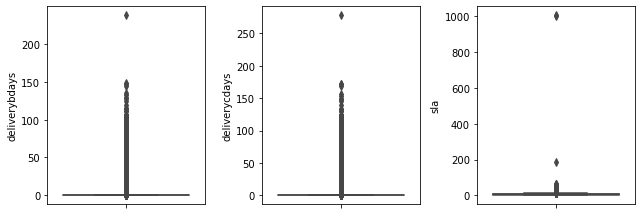

In [133]:
#BoxPlots before capping:
univariate_continuos(cap_numeric_vars,Consumer_df)

In [134]:
print(round(100*(Consumer_df.shape[0] / initial_shape[0])))

89


In [135]:
#This below "Capping" code also does the same as the above: its much more readable:
for col in Consumer_df[cap_numeric_vars].columns:
    percentiles = Consumer_df[col].quantile([0.01, 0.99]).values
#     Consumer_df[col][Consumer_df[col] <= percentiles[0]] = percentiles[0]
    Consumer_df[col][Consumer_df[col] >= percentiles[1]] = percentiles[1]

In [136]:
#Below code does the same operation above but manually and its cumbersome
# Updating the outlier values with values corresponding to pre-decided percentiles
# main_df['deliverybdays'][np.abs(main_df['deliverybdays'] > 8.0)]= 8.0
# main_df['deliverybdays'][np.abs(main_df['deliverybdays'] > 10.0)]= 10.0
# main_df['sla'][np.abs(main_df['sla'] > 13.0)]= 13.0

In [137]:
Consumer_df[cap_numeric_vars].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count      mean       std  min  25%  50%  75%  90%   95%  \
deliverybdays  1464190.0  0.993999  2.061029  0.0  0.0  0.0  0.0  5.0   6.0   
deliverycdays  1464190.0  1.164184  2.420691  0.0  0.0  0.0  0.0  5.0   7.0   
sla            1464190.0  5.736979  2.666819  0.0  4.0  6.0  7.0  9.0  10.0   

                99%   max  
deliverybdays   8.0   8.0  
deliverycdays  10.0  10.0  
sla            13.0  13.0

#### Inference from above:
- We can see that both the 99% and max are of same value, so our capping of outliers has worked.

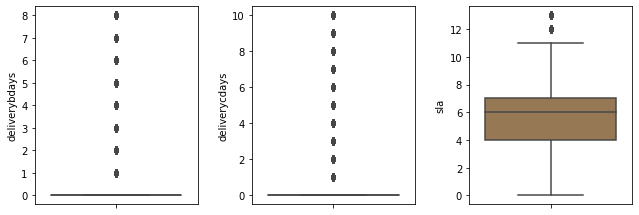

In [138]:
#BoxPlots after capping:
univariate_continuos(cap_numeric_vars,Consumer_df)

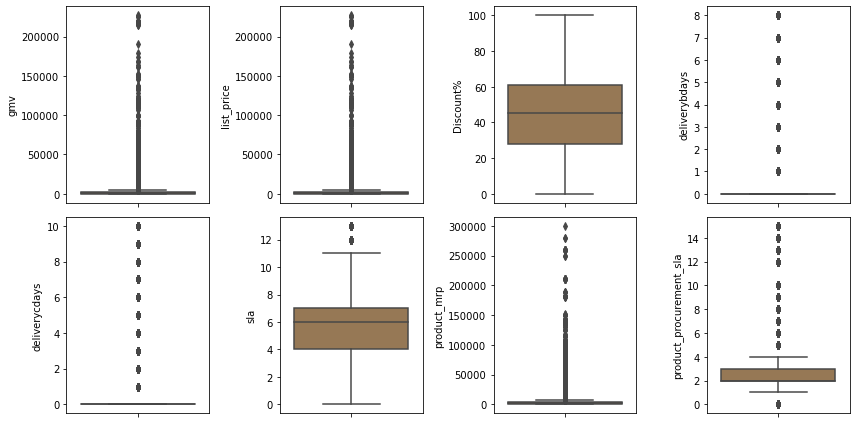

In [139]:
#BoxPlots after capping:
univariate_continuos(numeric_variables,Consumer_df)

### Skewness

In [140]:
# Checking the skewness in the dataset after capping
Consumer_df[numeric_variables].skew()

gmv                        5.177873
list_price                 5.161353
Discount%                 -0.063059
deliverybdays              1.944739
deliverycdays              1.986482
sla                        0.356847
product_mrp                4.612160
product_procurement_sla    2.490341
dtype: float64

#### Inference from above skew
- We can see that now cap_numeric_vars=['deliverybdays', 'deliverycdays' ,'sla'] have very less skew intensity

In [141]:
num_col = ['gmv','deliverybdays','deliverycdays','list_price','product_mrp','product_procurement_sla']

In [142]:
#Function to plot the distribution plot of the numeric variable list
def distplots(var_list,dataframe):
    plt.figure(figsize=(15,6))
    for var in var_list:
        plt.subplot(2,3,var_list.index(var)+1)
        sns.distplot(dataframe[var], fit=norm, kde=False, hist=False)
        #sns.boxplot(y=var,palette='cubehelix', data=main_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

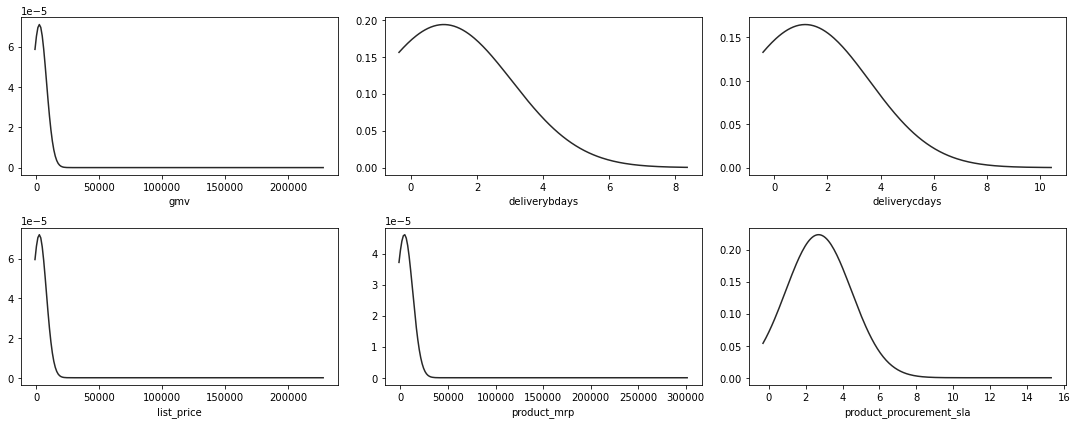

In [143]:
#Another way to visualize the same skewness and outlier treatment that we did above:
#Distplots are nothing but histograms but line drawn
distplots(num_col,Consumer_df)

In [144]:
#Verify there are no nulls again
Consumer_df.isnull().values.any()

False

In [145]:
#Checkpoint on number of records
print(Consumer_df.shape)
Consumer_df.head(1)

(1464190, 21)


order_date  Year Month Week     gmv  list_price  Discount%  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  
0                        0            0               0       luxury

In [146]:
Consumer_df.Week.value_counts().sum()

1464190

In [147]:
Consumer_df[['Year','Month','Week']].describe().T

count unique   top    freq
Year   1464190      2  2016  821473
Month  1464190     13    10  187636
Week   1464190     52    42  106456

---

## Checkpoint:
- Uptil now we have finished datacleaning, dataprep, FE(extra feature creation) on Consumer_df dataframe
- Similarly we will do some operations on other dataframes or relevant datasets and later merge them together before building our LR models

## Mapping months to number of weeks for the month
- Below function takes input an year and generates the numbers of the weeks for each month in it

In [148]:
import calendar

def WeekFinderFromYear(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

In [149]:
dict_number_2015, dict_name_2015 = WeekFinderFromYear(2015)
print(dict_number_2015)
print()
print(dict_name_2015)

print("-------------------------------------------------------------------------")

dict_number_2016, dict_name_2016 = WeekFinderFromYear(2016)
print(dict_number_2016)
print()
print(dict_name_2016)

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}

{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}
-------------------------------------------------------------------------
{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}

{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 1

In [150]:
dict_number_2015[1],dict_number_2015[2]

([2, 3, 4, 5], [6, 7, 8, 9])

In [151]:
dict_number_2015[12],dict_number_2016[12]

([50, 51, 52, 53], [49, 50, 51, 52])

In [152]:
num_weeks_2015 = 0
num_weeks_2016 = 0
# use the data from July 2015 to June 2016.
for i in dict_number_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_number_2016[i])

        
print("num_weeks_2015:",num_weeks_2015)
print("num_weeks_2016:",num_weeks_2016)
total_weeks = num_weeks_2015 + num_weeks_2016
print("total_weeks:",total_weeks)

num_weeks_2015: 26
num_weeks_2016: 26
total_weeks: 52


*As expected there are a total of 52 weeks in our dataset*

## Media Investment Dataframe and its operations
- We will generate weekly data from Year and Month for the media investment data

In [153]:
MediaInvestment_df.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    NaN    NaN  
1           0.000006          0.129244     0.073684   2.513528    NaN    NaN  
2           0.610292         16.379990     5.038266   6.202149    NaN    NaN  
3           3.444075         24.371778     6.973711  31.927011    NaN    NaN  
4           0.168633         19.561574     6.595767   5.222032    NaN    NaN

In [154]:
# Imputing nulls with 0

MediaInvestment_df['Radio'].fillna(value=0, inplace=True)
MediaInvestment_df['Other'].fillna(value=0, inplace=True)

MediaInvestment_df.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0  
1           0.000006          0.129244     0.073684   2.513528    0.0    0.0  
2           0.610292         16.379990     5.038266   6.202149    0.0    0.0  
3           3.444075         24.371778     6.973711  31.927011    0.0    0.0  
4           0.168633         19.561574     6.595767   5.222032    0.0    0.0

In [155]:
#Here there is no 'week' column, we will generate that shortly and also the corresponding weekly data
MediaInvestment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     float64
 1   Month              12 non-null     float64
 2   Total Investment   12 non-null     float64
 3   TV                 13 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  Radio              16 non-null     float64
 11  Other              16 non-null     float64
dtypes: float64(12)
memory usage: 1.6 KB


In [156]:
# Temp DataFrame

temp_media_investment = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_media_investment.head()

Year Month Week Total Investment   TV Digital Sponsorship Content Marketing  \
0  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
1  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
2  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
3  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   
4  NaN   NaN  NaN              NaN  NaN     NaN         NaN               NaN   

  Online marketing Affiliates  SEM Radio Other  
0              NaN        NaN  NaN   NaN   NaN  
1              NaN        NaN  NaN   NaN   NaN  
2              NaN        NaN  NaN   NaN   NaN  
3              NaN        NaN  NaN   NaN   NaN  
4              NaN        NaN  NaN   NaN   NaN

*We divide the monthly values by the number of weeks in that month and take that as weekly data*

In [157]:
i = 0

for index, row in MediaInvestment_df.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:
            
            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:
            
            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

temp_media_investment.head()

Year Month Week Total Investment     TV Digital Sponsorship  \
0  2015     7   28            4.265  0.054   0.633       1.854   
1  2015     7   29            4.265  0.054   0.633       1.854   
2  2015     7   30            4.265  0.054   0.633       1.854   
3  2015     7   31            4.265  0.054   0.633       1.854   
4  2015     8   32            1.013  0.001   0.256       0.213   

  Content Marketing Online marketing Affiliates    SEM Radio Other  
0                 0            0.332      0.137  1.256     0     0  
1                 0            0.332      0.137  1.256     0     0  
2                 0            0.332      0.137  1.256     0     0  
3                 0            0.332      0.137  1.256     0     0  
4                 0            0.026      0.015  0.503     0     0

In [158]:
temp_media_investment['Week'] = temp_media_investment['Week'].astype('str')

In [159]:
MediaInvestment_df = temp_media_investment
MediaInvestment_df.head()

Year Month Week Total Investment     TV Digital Sponsorship  \
0  2015     7   28            4.265  0.054   0.633       1.854   
1  2015     7   29            4.265  0.054   0.633       1.854   
2  2015     7   30            4.265  0.054   0.633       1.854   
3  2015     7   31            4.265  0.054   0.633       1.854   
4  2015     8   32            1.013  0.001   0.256       0.213   

  Content Marketing Online marketing Affiliates    SEM Radio Other  
0                 0            0.332      0.137  1.256     0     0  
1                 0            0.332      0.137  1.256     0     0  
2                 0            0.332      0.137  1.256     0     0  
3                 0            0.332      0.137  1.256     0     0  
4                 0            0.026      0.015  0.503     0     0

In [160]:
#Now we have the 'week' column and also the corresponding data represented weekly
MediaInvestment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               52 non-null     object
 1   Month              52 non-null     object
 2   Week               52 non-null     object
 3   Total Investment   52 non-null     object
 4   TV                 52 non-null     object
 5   Digital            52 non-null     object
 6   Sponsorship        52 non-null     object
 7   Content Marketing  52 non-null     object
 8   Online marketing   52 non-null     object
 9   Affiliates         52 non-null     object
 10  SEM                52 non-null     object
 11  Radio              52 non-null     object
 12  Other              52 non-null     object
dtypes: object(13)
memory usage: 5.4+ KB


In [161]:
# Checking for duplicates
MediaInvestment_df.duplicated('Week').value_counts()

False    52
dtype: int64

In [162]:
# Checking for nulls
MediaInvestment_df.isnull().values.any()

False

In [163]:
# Dropping Year and Month columns as we won't be needing them anymore

del MediaInvestment_df['Year']
del MediaInvestment_df['Month']
MediaInvestment_df.head()

Week Total Investment     TV Digital Sponsorship Content Marketing  \
0   28            4.265  0.054   0.633       1.854                 0   
1   29            4.265  0.054   0.633       1.854                 0   
2   30            4.265  0.054   0.633       1.854                 0   
3   31            4.265  0.054   0.633       1.854                 0   
4   32            1.013  0.001   0.256       0.213                 0   

  Online marketing Affiliates    SEM Radio Other  
0            0.332      0.137  1.256     0     0  
1            0.332      0.137  1.256     0     0  
2            0.332      0.137  1.256     0     0  
3            0.332      0.137  1.256     0     0  
4            0.026      0.015  0.503     0     0

In [164]:
original_col = MediaInvestment_df.columns[1:] #Except week column all other columns
original_col

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

### Calculating 8-weeks Exponential Moving Average for all Advertising media channels
- This Link is useful to understand calculating Moving Averages:
- https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
- Function Signature FOR EMA: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [165]:
def EMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_EMA_'+np.str(n),value=df[i].ewm(span=n, adjust=False).mean())
    return df

In [166]:
MediaInvestment_df = EMA_variables(MediaInvestment_df,original_col,8) 
MediaInvestment_df.head()

Week Total Investment  Total Investment_EMA_8     TV  TV_EMA_8 Digital  \
0   28            4.265                4.265000  0.054  0.054000   0.633   
1   29            4.265                4.265000  0.054  0.054000   0.633   
2   30            4.265                4.265000  0.054  0.054000   0.633   
3   31            4.265                4.265000  0.054  0.054000   0.633   
4   32            1.013                3.542333  0.001  0.042222   0.256   

   Digital_EMA_8 Sponsorship  Sponsorship_EMA_8 Content Marketing  \
0       0.633000       1.854           1.854000                 0   
1       0.633000       1.854           1.854000                 0   
2       0.633000       1.854           1.854000                 0   
3       0.633000       1.854           1.854000                 0   
4       0.549222       0.213           1.489333                 0   

   Content Marketing_EMA_8 Online marketing  Online marketing_EMA_8  \
0                      0.0            0.332                   0.332   
1                      0.0            0.332                   0.332   
2                      0.0            0.332                   0.332   
3                      0.0            0.332                   0.332   
4                      0.0            0.026                   0.264   

  Affiliates  Affiliates_EMA_8    SEM  SEM_EMA_8 Radio  Radio_EMA_8 Other  \
0      0.137          0.137000  1.256   1.256000     0          0.0     0   
1      0.137          0.137000  1.256   1.256000     0          0.0     0   
2      0.137          0.137000  1.256   1.256000     0          0.0     0   
3      0.137          0.137000  1.256   1.256000     0          0.0     0   
4      0.015          0.109889  0.503   1.088667     0          0.0     0   

   Other_EMA_8  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

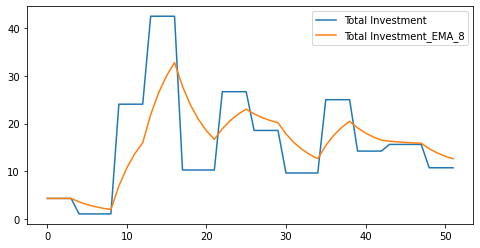

In [167]:
MediaInvestment_df[['Total Investment', 'Total Investment_EMA_8']].plot(label='Media Investment',figsize=(8, 4))
plt.show()

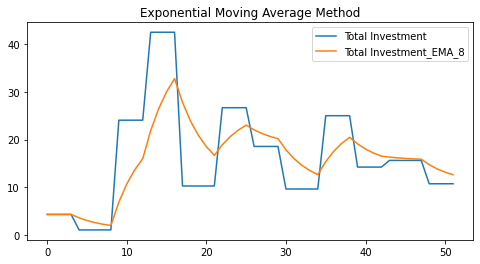

In [168]:
plt.figure(figsize=(8,4))
plt.plot(MediaInvestment_df['Total Investment'], label='Total Investment')
plt.plot(MediaInvestment_df['Total Investment_EMA_8'], label='Total Investment_EMA_8')
plt.legend(loc='best')
plt.title('Exponential Moving Average Method')
plt.show()

In [169]:
MediaInvestment_df.head(1)

Week Total Investment  Total Investment_EMA_8     TV  TV_EMA_8 Digital  \
0   28            4.265                   4.265  0.054     0.054   0.633   

   Digital_EMA_8 Sponsorship  Sponsorship_EMA_8 Content Marketing  \
0          0.633       1.854              1.854                 0   

   Content Marketing_EMA_8 Online marketing  Online marketing_EMA_8  \
0                      0.0            0.332                   0.332   

  Affiliates  Affiliates_EMA_8    SEM  SEM_EMA_8 Radio  Radio_EMA_8 Other  \
0      0.137             0.137  1.256      1.256     0          0.0     0   

   Other_EMA_8  
0          0.0

### Calculating 5-weeks Simple Moving Average(SMA) for all Advertising media channels
- Function Signature for SMA: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling

In [170]:
#df= dataframe
#var=variable list of dataframe i.e columns on which we want to calculate SMA, here all advertising media channels
#n= rolling window size
#We use the dataframe.rolling() function to calculate SMA
def SMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df

In [171]:
MediaInvestment_df = SMA_variables(MediaInvestment_df,original_col,5) 
MediaInvestment_df.head()

Week Total Investment  Total Investment_SMA_5  Total Investment_EMA_8  \
0   28            4.265                     NaN                4.265000   
1   29            4.265                     NaN                4.265000   
2   30            4.265                     NaN                4.265000   
3   31            4.265                     NaN                4.265000   
4   32            1.013                  3.6146                3.542333   

      TV  TV_SMA_5  TV_EMA_8 Digital  Digital_SMA_5  Digital_EMA_8  \
0  0.054       NaN  0.054000   0.633            NaN       0.633000   
1  0.054       NaN  0.054000   0.633            NaN       0.633000   
2  0.054       NaN  0.054000   0.633            NaN       0.633000   
3  0.054       NaN  0.054000   0.633            NaN       0.633000   
4  0.001    0.0434  0.042222   0.256         0.5576       0.549222   

  Sponsorship  Sponsorship_SMA_5  Sponsorship_EMA_8 Content Marketing  \
0       1.854                NaN           1.854000                 0   
1       1.854                NaN           1.854000                 0   
2       1.854                NaN           1.854000                 0   
3       1.854                NaN           1.854000                 0   
4       0.213             1.5258           1.489333                 0   

   Content Marketing_SMA_5  Content Marketing_EMA_8 Online marketing  \
0                      NaN                      0.0            0.332   
1                      NaN                      0.0            0.332   
2                      NaN                      0.0            0.332   
3                      NaN                      0.0            0.332   
4                      0.0                      0.0            0.026   

   Online marketing_SMA_5  Online marketing_EMA_8 Affiliates  \
0                     NaN                   0.332      0.137   
1                     NaN                   0.332      0.137   
2                     NaN                   0.332      0.137   
3                     NaN                   0.332      0.137   
4                  0.2708                   0.264      0.015   

   Affiliates_SMA_5  Affiliates_EMA_8    SEM  SEM_SMA_5  SEM_EMA_8 Radio  \
0               NaN          0.137000  1.256        NaN   1.256000     0   
1               NaN          0.137000  1.256        NaN   1.256000     0   
2               NaN          0.137000  1.256        NaN   1.256000     0   
3               NaN          0.137000  1.256        NaN   1.256000     0   
4            0.1126          0.109889  0.503     1.1054   1.088667     0   

   Radio_SMA_5  Radio_EMA_8 Other  Other_SMA_5  Other_EMA_8  
0          NaN          0.0     0          NaN          0.0  
1          NaN          0.0     0          NaN          0.0  
2          NaN          0.0     0          NaN          0.0  
3          NaN          0.0     0          NaN          0.0  
4          0.0          0.0     0          0.0          0.0

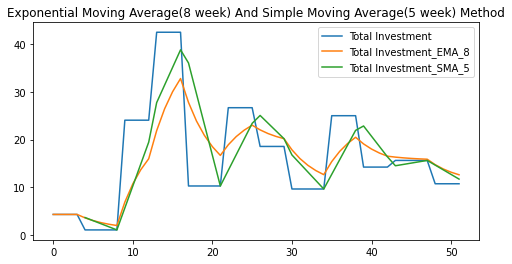

In [172]:
plt.figure(figsize=(8,4))
plt.plot(MediaInvestment_df['Total Investment'], label='Total Investment')
plt.plot(MediaInvestment_df['Total Investment_EMA_8'], label='Total Investment_EMA_8')
plt.plot(MediaInvestment_df['Total Investment_SMA_5'], label='Total Investment_SMA_5')
plt.legend(loc='best')
plt.title('Exponential Moving Average(8 week) And Simple Moving Average(5 week) Method')
plt.show()

### Calculating 3-weeks Simple Moving Average for all Advertising media channels

In [173]:
MediaInvestment_df = SMA_variables(MediaInvestment_df,original_col,3) 
MediaInvestment_df.head()

Week Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  \
0   28            4.265                     NaN                     NaN   
1   29            4.265                     NaN                     NaN   
2   30            4.265                   4.265                     NaN   
3   31            4.265                   4.265                     NaN   
4   32            1.013                   3.181                  3.6146   

   Total Investment_EMA_8     TV  TV_SMA_3  TV_SMA_5  TV_EMA_8 Digital  \
0                4.265000  0.054       NaN       NaN  0.054000   0.633   
1                4.265000  0.054       NaN       NaN  0.054000   0.633   
2                4.265000  0.054  0.054000       NaN  0.054000   0.633   
3                4.265000  0.054  0.054000       NaN  0.054000   0.633   
4                3.542333  0.001  0.036333    0.0434  0.042222   0.256   

   Digital_SMA_3  Digital_SMA_5  Digital_EMA_8 Sponsorship  Sponsorship_SMA_3  \
0            NaN            NaN       0.633000       1.854                NaN   
1            NaN            NaN       0.633000       1.854                NaN   
2       0.633000            NaN       0.633000       1.854              1.854   
3       0.633000            NaN       0.633000       1.854              1.854   
4       0.507333         0.5576       0.549222       0.213              1.307   

   Sponsorship_SMA_5  Sponsorship_EMA_8 Content Marketing  \
0                NaN           1.854000                 0   
1                NaN           1.854000                 0   
2                NaN           1.854000                 0   
3                NaN           1.854000                 0   
4             1.5258           1.489333                 0   

   Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  \
0                      NaN                      NaN                      0.0   
1                      NaN                      NaN                      0.0   
2                      0.0                      NaN                      0.0   
3                      0.0                      NaN                      0.0   
4                      0.0                      0.0                      0.0   

  Online marketing  Online marketing_SMA_3  Online marketing_SMA_5  \
0            0.332                     NaN                     NaN   
1            0.332                     NaN                     NaN   
2            0.332                   0.332                     NaN   
3            0.332                   0.332                     NaN   
4            0.026                   0.230                  0.2708   

   Online marketing_EMA_8 Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  \
0                   0.332      0.137               NaN               NaN   
1                   0.332      0.137               NaN               NaN   
2                   0.332      0.137          0.137000               NaN   
3                   0.332      0.137          0.137000               NaN   
4                   0.264      0.015          0.096333            0.1126   

   Affiliates_EMA_8    SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8 Radio  \
0          0.137000  1.256        NaN        NaN   1.256000     0   
1          0.137000  1.256        NaN        NaN   1.256000     0   
2          0.137000  1.256      1.256        NaN   1.256000     0   
3          0.137000  1.256      1.256        NaN   1.256000     0   
4          0.109889  0.503      1.005     1.1054   1.088667     0   

   Radio_SMA_3  Radio_SMA_5  Radio_EMA_8 Other  Other_SMA_3  Other_SMA_5  \
0          NaN          NaN          0.0     0          NaN          NaN   
1          NaN          NaN          0.0     0          NaN          NaN   
2          0.0          NaN          0.0     0          0.0          NaN   
3          0.0          NaN          0.0     0          0.0          NaN   
4          0.0          0.0          0.0     0          0.0          0.0   

   Other_EMA_8  
0   

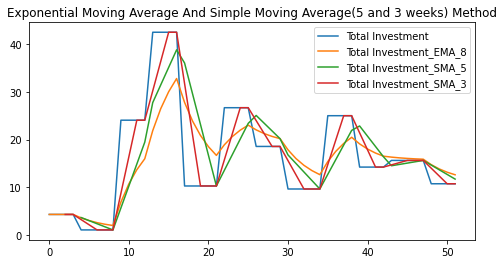

In [174]:
plt.figure(figsize=(8,4))
plt.plot(MediaInvestment_df['Total Investment'], label='Total Investment')
plt.plot(MediaInvestment_df['Total Investment_EMA_8'], label='Total Investment_EMA_8')
plt.plot(MediaInvestment_df['Total Investment_SMA_5'], label='Total Investment_SMA_5')
plt.plot(MediaInvestment_df['Total Investment_SMA_3'], label='Total Investment_SMA_3')
plt.legend(loc='best')
plt.title('Exponential Moving Average And Simple Moving Average(5 and 3 weeks) Method')
plt.show()

### Calculating Ad Stock values for all Advertising media

In [175]:
def calculate_ad_stocks(data, engagement_factor):
    
    """initialize ad stock vectors"""
    TV_ad_stock_vector = []                     
    Digital_ad_stock_vector = []
    Sponsorship_ad_stock_vector = []
    Content_Marketing_ad_stock_vector = []
    Online_marketing_ad_stock_vector = []
    Affiliates_ad_stock_vector = []
    SEM_ad_stock_vector = []
    Radio_ad_stock_vector = []
    Other_ad_stock_vector = []
    Total_Investment_ad_stock_vector = []
    
    """initialize ad_stock_value"""
    tv_ad_stock_value = 0 
    Digital_ad_stock_value = 0
    Sponsorship_ad_stock_value = 0
    Content_Marketing_ad_stock_value = 0
    Online_marketing_ad_stock_value = 0
    Affiliates_ad_stock_value = 0
    SEM_ad_stock_value = 0
    Radio_ad_stock_value = 0
    Other_ad_stock_value = 0
    Total_Investment_ad_stock_value = 0
    
    """loop through dataset to calculate adstock values. The formula for adstock is: At = Xt + adstock rate * At-1."""
    for index, row in data.iterrows():
        tv_ad_stock_value = row['TV'] + engagement_factor * tv_ad_stock_value
        TV_ad_stock_vector.append(tv_ad_stock_value)
        Digital_ad_stock_value = row['Digital'] + engagement_factor * Digital_ad_stock_value
        Digital_ad_stock_vector.append(Digital_ad_stock_value)
        Sponsorship_ad_stock_value = row['Sponsorship'] + engagement_factor * Sponsorship_ad_stock_value
        Sponsorship_ad_stock_vector.append(Sponsorship_ad_stock_value)
        Content_Marketing_ad_stock_value = row['Content Marketing'] + engagement_factor * Content_Marketing_ad_stock_value
        Content_Marketing_ad_stock_vector.append(Content_Marketing_ad_stock_value)    
        Online_marketing_ad_stock_value = row['Online marketing'] + engagement_factor * Online_marketing_ad_stock_value
        Online_marketing_ad_stock_vector.append(Online_marketing_ad_stock_value)
        Affiliates_ad_stock_value = row['Affiliates'] + engagement_factor * Affiliates_ad_stock_value
        Affiliates_ad_stock_vector.append(Affiliates_ad_stock_value)
        SEM_ad_stock_value = row['SEM'] + engagement_factor * SEM_ad_stock_value
        SEM_ad_stock_vector.append(SEM_ad_stock_value)
        Radio_ad_stock_value = row['Radio'] + engagement_factor * Radio_ad_stock_value
        Radio_ad_stock_vector.append(Radio_ad_stock_value)
        Other_ad_stock_value = row['Other'] + engagement_factor * Other_ad_stock_value
        Other_ad_stock_vector.append(Other_ad_stock_value)
        Total_Investment_ad_stock_value = row['Total Investment'] + engagement_factor * Total_Investment_ad_stock_value
        Total_Investment_ad_stock_vector.append(Total_Investment_ad_stock_value)
    
    """add ad stock vector to dataset"""
    loc_index = data.columns.get_loc('TV_EMA_8') + 1
    data.insert(loc=loc_index,column='TV_Ad_Stock',value=TV_ad_stock_vector)
    loc_index = data.columns.get_loc('Digital_EMA_8') + 1
    data.insert(loc=loc_index,column='Digital_Ad_Stock',value=Digital_ad_stock_vector)
    loc_index = data.columns.get_loc('Sponsorship_EMA_8') + 1
    data.insert(loc=loc_index,column='Sponsorship_Ad_Stock',value=Sponsorship_ad_stock_vector)
    loc_index = data.columns.get_loc('Content Marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Content_Marketing_Ad_Stock',value=Content_Marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Online marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Online_marketing_Ad_Stock',value=Online_marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Affiliates_EMA_8') + 1
    data.insert(loc=loc_index,column='Affiliates_Ad_Stock',value=Affiliates_ad_stock_vector)
    loc_index = data.columns.get_loc('SEM_EMA_8') + 1
    data.insert(loc=loc_index,column='SEM_Ad_Stock',value=SEM_ad_stock_vector)
    loc_index = data.columns.get_loc('Radio_EMA_8') + 1
    data.insert(loc=loc_index,column='Radio_Ad_Stock',value=Radio_ad_stock_vector)
    loc_index = data.columns.get_loc('Other_EMA_8') + 1
    data.insert(loc=loc_index,column='Other_Ad_Stock',value=Other_ad_stock_vector)
    loc_index = data.columns.get_loc('Total Investment_EMA_8') + 1
    data.insert(loc=loc_index,column='Total_Investment_Ad_Stock',value=Total_Investment_ad_stock_vector)
    
    return data

#### Assuming the value of Adstock rate(engagement factor) at 60%

In [176]:
MediaInvestment_df = calculate_ad_stocks(data=MediaInvestment_df, engagement_factor=0.6)
MediaInvestment_df.head(10)

Week Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  \
0   28            4.265                     NaN                     NaN   
1   29            4.265                     NaN                     NaN   
2   30            4.265                4.265000                     NaN   
3   31            4.265                4.265000                     NaN   
4   32            1.013                3.181000                  3.6146   
5   33            1.013                2.097000                  2.9642   
6   34            1.013                1.013000                  2.3138   
7   35            1.013                1.013000                  1.6634   
8   36            1.013                1.013000                  1.0130   
9   37           24.064                8.696667                  5.6232   

   Total Investment_EMA_8  Total_Investment_Ad_Stock     TV  TV_SMA_3  \
0                4.265000                   4.265000  0.054       NaN   
1                4.265000                   6.824000  0.054       NaN   
2                4.265000                   8.359400  0.054  0.054000   
3                4.265000                   9.280640  0.054  0.054000   
4                3.542333                   6.581384  0.001  0.036333   
5                2.980259                   4.961830  0.001  0.018667   
6                2.543091                   3.990098  0.001  0.001000   
7                2.203070                   3.407059  0.001  0.001000   
8                1.938610                   3.057235  0.001  0.001000   
9                6.855364                  25.898341   0.97  0.324000   

   TV_SMA_5  TV_EMA_8  TV_Ad_Stock Digital  Digital_SMA_3  Digital_SMA_5  \
0       NaN  0.054000     0.054000   0.633            NaN            NaN   
1       NaN  0.054000     0.086400   0.633            NaN            NaN   
2       NaN  0.054000     0.105840   0.633       0.633000            NaN   
3       NaN  0.054000     0.117504   0.633       0.633000            NaN   
4    0.0434  0.042222     0.071502   0.256       0.507333         0.5576   
5    0.0328  0.033062     0.043901   0.256       0.381667         0.4822   
6    0.0222  0.025937     0.027341   0.256       0.256000         0.4068   
7    0.0116  0.020395     0.017405   0.256       0.256000         0.3314   
8    0.0010  0.016085     0.011443   0.256       0.256000         0.2560   
9    0.1948  0.228066     0.976866   0.339       0.283667         0.2726   

   Digital_EMA_8  Digital_Ad_Stock Sponsorship  Sponsorship_SMA_3  \
0       0.633000          0.633000       1.854                NaN   
1       0.633000          1.012800       1.854                NaN   
2       0.633000          1.240680       1.854           1.854000   
3       0.633000          1.377408       1.854           1.854000   
4       0.549222          1.082445       0.213           1.307000   
5       0.484062          0.905467       0.213           0.760000   
6       0.433381          0.799280       0.213           0.213000   
7       0.393963          0.735568       0.213           0.213000   
8       0.363305          0.697341       0.213           0.213000   
9       0.357904          0.757405      15.697           5.374333   

   Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
0                NaN           1.854000              1.854000   
1                NaN           1.854000              2.966400   
2                NaN           1.854000              3.633840   
3                NaN           1.854000              4.034304   
4             1.5258           1.489333              2.633582   
5             1.1976           1.205704              1.793149   
6             0.8694           0.985103              1.288890   
7             0.5412           0.813524              0.986334   
8             0.2130           0.680075              0.804800   
9             3.3098           4.017169             16.179880   

  Content Marketing  Content Marketing_SMA_3  Content Marke

In [177]:
MediaInvestment_df.fillna(value=0, inplace=True)
MediaInvestment_df.head(10)

Week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  \
0   28             4.265                0.000000                  0.0000   
1   29             4.265                0.000000                  0.0000   
2   30             4.265                4.265000                  0.0000   
3   31             4.265                4.265000                  0.0000   
4   32             1.013                3.181000                  3.6146   
5   33             1.013                2.097000                  2.9642   
6   34             1.013                1.013000                  2.3138   
7   35             1.013                1.013000                  1.6634   
8   36             1.013                1.013000                  1.0130   
9   37            24.064                8.696667                  5.6232   

   Total Investment_EMA_8  Total_Investment_Ad_Stock     TV  TV_SMA_3  \
0                4.265000                   4.265000  0.054  0.000000   
1                4.265000                   6.824000  0.054  0.000000   
2                4.265000                   8.359400  0.054  0.054000   
3                4.265000                   9.280640  0.054  0.054000   
4                3.542333                   6.581384  0.001  0.036333   
5                2.980259                   4.961830  0.001  0.018667   
6                2.543091                   3.990098  0.001  0.001000   
7                2.203070                   3.407059  0.001  0.001000   
8                1.938610                   3.057235  0.001  0.001000   
9                6.855364                  25.898341  0.970  0.324000   

   TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  \
0    0.0000  0.054000     0.054000    0.633       0.000000         0.0000   
1    0.0000  0.054000     0.086400    0.633       0.000000         0.0000   
2    0.0000  0.054000     0.105840    0.633       0.633000         0.0000   
3    0.0000  0.054000     0.117504    0.633       0.633000         0.0000   
4    0.0434  0.042222     0.071502    0.256       0.507333         0.5576   
5    0.0328  0.033062     0.043901    0.256       0.381667         0.4822   
6    0.0222  0.025937     0.027341    0.256       0.256000         0.4068   
7    0.0116  0.020395     0.017405    0.256       0.256000         0.3314   
8    0.0010  0.016085     0.011443    0.256       0.256000         0.2560   
9    0.1948  0.228066     0.976866    0.339       0.283667         0.2726   

   Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  \
0       0.633000          0.633000        1.854           0.000000   
1       0.633000          1.012800        1.854           0.000000   
2       0.633000          1.240680        1.854           1.854000   
3       0.633000          1.377408        1.854           1.854000   
4       0.549222          1.082445        0.213           1.307000   
5       0.484062          0.905467        0.213           0.760000   
6       0.433381          0.799280        0.213           0.213000   
7       0.393963          0.735568        0.213           0.213000   
8       0.363305          0.697341        0.213           0.213000   
9       0.357904          0.757405       15.697           5.374333   

   Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
0             0.0000           1.854000              1.854000   
1             0.0000           1.854000              2.966400   
2             0.0000           1.854000              3.633840   
3             0.0000           1.854000              4.034304   
4             1.5258           1.489333              2.633582   
5             1.1976           1.205704              1.793149   
6             0.8694           0.985103              1.288890   
7             0.5412           0.813524              0.986334   
8             0.2130           0.680075              0.804800   
9             3.3098           4.017169             16.179880   

   Content Marketing  Cont

In [178]:
MediaInvestment_df.shape

(52, 51)

## NPS Score Dataframe and its operations

In [179]:
NetPromoterScore_df.head()

score      July'15       Aug'15      Sept'15       Oct'15  Nov'15  \
0          NPS    54.599588    59.987101    46.925419    44.398389    47.0   
1  Stock Index  1177.000000  1206.000000  1101.000000  1210.000000  1233.0   

   Dec'15       Jan'16       Feb'16      Mar'16       Apr'16       May'16  \
0    45.8    47.093031    50.327406    49.02055    51.827605    47.306951   
1  1038.0  1052.000000  1222.000000  1015.00000  1242.000000  1228.000000   

       June'16  
0    50.516687  
1  1194.000000

*We will generate weekly data from Year and Month for the nps score data¶*

Getting the dataset into suitable format¶

In [180]:
# resetting index
NetPromoterScore_df.reset_index(drop=True, inplace=True)

# Transposing the dataframe
NetPromoterScore_df = NetPromoterScore_df.T

# resetting index
NetPromoterScore_df.reset_index(drop=False, inplace=True)

# renaming columns
NetPromoterScore_df.columns = ['Month', 'NPS', 'Stock Index']
NetPromoterScore_df.drop(NetPromoterScore_df.index[0], inplace=True)
NetPromoterScore_df

Month      NPS Stock Index
1   July'15  54.5996        1177
2    Aug'15  59.9871        1206
3   Sept'15  46.9254        1101
4    Oct'15  44.3984        1210
5    Nov'15       47        1233
6    Dec'15     45.8        1038
7    Jan'16   47.093        1052
8    Feb'16  50.3274        1222
9    Mar'16  49.0206        1015
10   Apr'16  51.8276        1242
11   May'16   47.307        1228
12  June'16  50.5167        1194

In [181]:
NetPromoterScore_df.head()

Month      NPS Stock Index
1  July'15  54.5996        1177
2   Aug'15  59.9871        1206
3  Sept'15  46.9254        1101
4   Oct'15  44.3984        1210
5   Nov'15       47        1233

In [182]:
# Temp DataFrame
temp_nps = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])
temp_nps

Year Month Week  NPS Stock Index
0   NaN   NaN  NaN  NaN         NaN
1   NaN   NaN  NaN  NaN         NaN
2   NaN   NaN  NaN  NaN         NaN
3   NaN   NaN  NaN  NaN         NaN
4   NaN   NaN  NaN  NaN         NaN
5   NaN   NaN  NaN  NaN         NaN
6   NaN   NaN  NaN  NaN         NaN
7   NaN   NaN  NaN  NaN         NaN
8   NaN   NaN  NaN  NaN         NaN
9   NaN   NaN  NaN  NaN         NaN
10  NaN   NaN  NaN  NaN         NaN
11  NaN   NaN  NaN  NaN         NaN
12  NaN   NaN  NaN  NaN         NaN
13  NaN   NaN  NaN  NaN         NaN
14  NaN   NaN  NaN  NaN         NaN
15  NaN   NaN  NaN  NaN         NaN
16  NaN   NaN  NaN  NaN         NaN
17  NaN   NaN  NaN  NaN         NaN
18  NaN   NaN  NaN  NaN         NaN
19  NaN   NaN  NaN  NaN         NaN
20  NaN   NaN  NaN  NaN         NaN
21  NaN   NaN  NaN  NaN         NaN
22  NaN   NaN  NaN  NaN         NaN
23  NaN   NaN  NaN  NaN         NaN
24  NaN   NaN  NaN  NaN         NaN
25  NaN   NaN  NaN  NaN         NaN
26  NaN   NaN  NaN  NaN         NaN
27  NaN   NaN  NaN  NaN         NaN
28  NaN   NaN  NaN  NaN         NaN
29  NaN   NaN  NaN  NaN         NaN
30  NaN   NaN  NaN  NaN         NaN
31  NaN   NaN  NaN  NaN         NaN
32  NaN   NaN  NaN  NaN         NaN
33  NaN   NaN  NaN  NaN         NaN
34  NaN   NaN  NaN  NaN         NaN
35  NaN   NaN  NaN  NaN         NaN
36  NaN   NaN  NaN  NaN         NaN
37  NaN   NaN  NaN  NaN         NaN
38  NaN   NaN  NaN  NaN         NaN
39  NaN   NaN  NaN  NaN         NaN
40  NaN   NaN  NaN  NaN         NaN
41  NaN   NaN  NaN  NaN         NaN
42  NaN   NaN  NaN  NaN         NaN
43  NaN   NaN  NaN  NaN         NaN
44  NaN   NaN  NaN  NaN         NaN
45  NaN   NaN  NaN  NaN         NaN
46  NaN   NaN  NaN  NaN         NaN
47  NaN   NaN  NaN  NaN         NaN
48  NaN   NaN  NaN  NaN         NaN
49  NaN   NaN  NaN  NaN         NaN
50  NaN   NaN  NaN  NaN         NaN
51  NaN   NaN  NaN  NaN         NaN

#### We use the monthly NPS Score and Stock Index values for each week within that respective month and get data into weekly format

In [183]:
i = 0

for index, row in NetPromoterScore_df.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            temp_nps.iloc[i].Year = 2015
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            temp_nps.iloc[i].Year = 2016
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

temp_nps.head()

Year Month Week      NPS Stock Index
0  2015   Jul   28  54.5996        1177
1  2015   Jul   29  54.5996        1177
2  2015   Jul   30  54.5996        1177
3  2015   Jul   31  54.5996        1177
4  2015   Aug   32  59.9871        1206

In [184]:
temp_nps['Week'] = temp_nps['Week'].astype('str')

In [185]:
NetPromoterScore_df = temp_nps

In [186]:
print(NetPromoterScore_df.shape)
NetPromoterScore_df.head()

(52, 5)


Year Month Week      NPS Stock Index
0  2015   Jul   28  54.5996        1177
1  2015   Jul   29  54.5996        1177
2  2015   Jul   30  54.5996        1177
3  2015   Jul   31  54.5996        1177
4  2015   Aug   32  59.9871        1206

In [187]:
NetPromoterScore_df.duplicated('Week').value_counts()

False    52
dtype: int64

In [188]:
NetPromoterScore_df.isnull().values.any()

False

In [189]:
# Dropping Yeat and Month columns as we won't be needing them anymore
del NetPromoterScore_df['Year']
del NetPromoterScore_df['Month']

In [190]:
NetPromoterScore_df.head(2)

Week      NPS Stock Index
0   28  54.5996        1177
1   29  54.5996        1177

In [191]:
nps_original_col = NetPromoterScore_df.columns[1:]
nps_original_col

Index(['NPS', 'Stock Index'], dtype='object')

### Calculating 5-weeks Simple Moving Average for NPS and Stock_Index

In [192]:
NetPromoterScore_df = SMA_variables(NetPromoterScore_df,nps_original_col,5) 
NetPromoterScore_df.head()

Week      NPS  NPS_SMA_5 Stock Index  Stock Index_SMA_5
0   28  54.5996        NaN        1177                NaN
1   29  54.5996        NaN        1177                NaN
2   30  54.5996        NaN        1177                NaN
3   31  54.5996        NaN        1177                NaN
4   32  59.9871  55.677091        1206             1182.8

### Calculating 3-weeks Simple Moving Average for NPS and Stock_Index

In [193]:
NetPromoterScore_df = SMA_variables(NetPromoterScore_df,nps_original_col,3) 
NetPromoterScore_df.head()

Week      NPS  NPS_SMA_3  NPS_SMA_5 Stock Index  Stock Index_SMA_3  \
0   28  54.5996        NaN        NaN        1177                NaN   
1   29  54.5996        NaN        NaN        1177                NaN   
2   30  54.5996  54.599588        NaN        1177        1177.000000   
3   31  54.5996  54.599588        NaN        1177        1177.000000   
4   32  59.9871  56.395426  55.677091        1206        1186.666667   

   Stock Index_SMA_5  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4             1182.8

In [194]:
NetPromoterScore_df.fillna(value=0, inplace=True)
NetPromoterScore_df.head()

Week        NPS  NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  \
0   28  54.599588   0.000000   0.000000       1177.0           0.000000   
1   29  54.599588   0.000000   0.000000       1177.0           0.000000   
2   30  54.599588  54.599588   0.000000       1177.0        1177.000000   
3   31  54.599588  54.599588   0.000000       1177.0        1177.000000   
4   32  59.987101  56.395426  55.677091       1206.0        1186.666667   

   Stock Index_SMA_5  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4             1182.8

## Sale Calendar Dataframe and its operations
- We will generate weekly data from Year and Month for the sale calendar data

In [195]:
SaleCalendar_df

Year               Sales Calendar
0   2015.0               (18-19th July)
1   2015.0                (15-17th Aug)
2   2015.0                (28-30th Aug)
3   2015.0                (15-17th Oct)
4   2015.0                 (7-14th Nov)
5   2015.0   (25th Dec'15 - 3rd Jan'16)
6   2016.0                  (20-22 Jan)
7   2016.0                    (1-2 Feb)
8   2016.0                  (20-21 Feb)
9   2016.0                  (14-15 Feb)
10  2016.0                    (7-9 Mar)
11  2016.0                  (25-27 May)

In [196]:
print(SaleCalendar_df.shape)
SaleCalendar_df.head()

(12, 2)


Year   Sales Calendar
0  2015.0   (18-19th July)
1  2015.0    (15-17th Aug)
2  2015.0    (28-30th Aug)
3  2015.0    (15-17th Oct)
4  2015.0     (7-14th Nov)

In [197]:
# Getting the data into required format

SaleCalendar_df.columns = ['Year', 'Sale']

SaleCalendar_df.Year = SaleCalendar_df.Year.apply(lambda x: int(x))
SaleCalendar_df.Sale = SaleCalendar_df.Sale.apply(lambda x: x.replace('th','').strip())
SaleCalendar_df.Sale = SaleCalendar_df.Sale.apply(lambda x: x.replace('rd','').strip())
SaleCalendar_df.Sale = SaleCalendar_df.Sale.apply(lambda x: x.replace('(','').strip())
SaleCalendar_df.Sale = SaleCalendar_df.Sale.apply(lambda x: x.replace(')','').strip())

# Splitting 25-31 Dec into two different rows for the ease of weekly data generation

SaleCalendar_df.iloc[5, SaleCalendar_df.columns.get_loc('Sale')] = '25-31 Dec'
SaleCalendar_df = SaleCalendar_df.append({'Year' : 2016 , 'Sale' : '1-3 Jan'} , ignore_index=True)

SaleCalendar_df.sort_values(by=['Year'], ascending = True, inplace = True)

SaleCalendar_df

Year        Sale
0   2015  18-19 July
1   2015   15-17 Aug
2   2015   28-30 Aug
3   2015   15-17 Oct
4   2015    7-14 Nov
5   2015   25-31 Dec
6   2016   20-22 Jan
7   2016     1-2 Feb
8   2016   20-21 Feb
9   2016   14-15 Feb
10  2016     7-9 Mar
11  2016   25-27 May
12  2016     1-3 Jan

In [198]:
print(SaleCalendar_df.shape)

(13, 2)


In [199]:
# Dropping '17-15 Oct' entry assuming it is erroneous
SaleCalendar_df.drop(SaleCalendar_df.index[3], inplace=True)
SaleCalendar_df

Year        Sale
0   2015  18-19 July
1   2015   15-17 Aug
2   2015   28-30 Aug
4   2015    7-14 Nov
5   2015   25-31 Dec
6   2016   20-22 Jan
7   2016     1-2 Feb
8   2016   20-21 Feb
9   2016   14-15 Feb
10  2016     7-9 Mar
11  2016   25-27 May
12  2016     1-3 Jan

In [200]:
print(SaleCalendar_df.shape)

(12, 2)


In [201]:
# Temp DataFrame
temp_sale_calendar = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Sale'])
temp_sale_calendar

Year Month Week Sale
0   NaN   NaN  NaN  NaN
1   NaN   NaN  NaN  NaN
2   NaN   NaN  NaN  NaN
3   NaN   NaN  NaN  NaN
4   NaN   NaN  NaN  NaN
5   NaN   NaN  NaN  NaN
6   NaN   NaN  NaN  NaN
7   NaN   NaN  NaN  NaN
8   NaN   NaN  NaN  NaN
9   NaN   NaN  NaN  NaN
10  NaN   NaN  NaN  NaN
11  NaN   NaN  NaN  NaN
12  NaN   NaN  NaN  NaN
13  NaN   NaN  NaN  NaN
14  NaN   NaN  NaN  NaN
15  NaN   NaN  NaN  NaN
16  NaN   NaN  NaN  NaN
17  NaN   NaN  NaN  NaN
18  NaN   NaN  NaN  NaN
19  NaN   NaN  NaN  NaN
20  NaN   NaN  NaN  NaN
21  NaN   NaN  NaN  NaN
22  NaN   NaN  NaN  NaN
23  NaN   NaN  NaN  NaN
24  NaN   NaN  NaN  NaN
25  NaN   NaN  NaN  NaN
26  NaN   NaN  NaN  NaN
27  NaN   NaN  NaN  NaN
28  NaN   NaN  NaN  NaN
29  NaN   NaN  NaN  NaN
30  NaN   NaN  NaN  NaN
31  NaN   NaN  NaN  NaN
32  NaN   NaN  NaN  NaN
33  NaN   NaN  NaN  NaN
34  NaN   NaN  NaN  NaN
35  NaN   NaN  NaN  NaN
36  NaN   NaN  NaN  NaN
37  NaN   NaN  NaN  NaN
38  NaN   NaN  NaN  NaN
39  NaN   NaN  NaN  NaN
40  NaN   NaN  NaN  NaN
41  NaN   NaN  NaN  NaN
42  NaN   NaN  NaN  NaN
43  NaN   NaN  NaN  NaN
44  NaN   NaN  NaN  NaN
45  NaN   NaN  NaN  NaN
46  NaN   NaN  NaN  NaN
47  NaN   NaN  NaN  NaN
48  NaN   NaN  NaN  NaN
49  NaN   NaN  NaN  NaN
50  NaN   NaN  NaN  NaN
51  NaN   NaN  NaN  NaN

*We find the number of days in each week of a month on which there was a sale*

In [202]:
i = 0
import datetime

for index, row in SaleCalendar_df.iterrows():

    week_list = []
    month_list = []
    year_list = []

    date1, date2, month = re.split("[- ]", row.Sale)
    month = month[0:3] # Taking only the first 3 character of the month name
    year = row.Year
    
#     print("Date => {}-{}-{}".format(date1, month, year))
#     print(datetime.datetime.strptime('{}-{}-{}'.format(date1, month, year), "%d-%b-%Y").strftime("%V"))
#     print("Date => {}-{}-{}".format(date2, month, year))
#     print(datetime.datetime.strptime('{}-{}-{}'.format(date2, month, year), "%d-%b-%Y").strftime("%V"))
    
    date = int(date1)
    
    while date <= int(date2):
        
        # Extracting the week numbers of the range of dates in each month
        week = datetime.datetime.strptime('{}-{}-{}'.format(date, month, year), "%d-%b-%Y").strftime("%V")
        week_list.append(int(week))
        date+=1
    
    week_dict = dict.fromkeys(week_list, 0) # Generating a week list dictionary with default value as 0

    for j in week_list:
        week_dict[j] = week_dict[j] + 1

    for key, value in week_dict.items():
        temp_sale_calendar.iloc[i].Year = year
        temp_sale_calendar.iloc[i].Month = month
        temp_sale_calendar.iloc[i].Week = key
        temp_sale_calendar.iloc[i].Sale = value
        
        i+=1
    
temp_sale_calendar.dropna(axis=0, how='all', inplace=True) # Drop all rows which has all Nulls
temp_sale_calendar.sort_values(by=['Week'], ascending = True, inplace = True)

# Handling the special cases of 53 and 7 week numbers which appear twice
temp_sale_calendar.loc[temp_sale_calendar['Week'] == 53, 'Sale'] = temp_sale_calendar.loc[temp_sale_calendar['Week'] == 53, 'Sale'].sum()
temp_sale_calendar.loc[temp_sale_calendar['Week'] == 7, 'Sale'] = temp_sale_calendar.loc[temp_sale_calendar['Week'] == 7, 'Sale'].sum()

# Dropping the redundant 53 and 7 week numbers
temp_sale_calendar.drop_duplicates(subset=['Week'], keep='first', inplace=True)
temp_sale_calendar.reset_index(drop=True, inplace=True)

temp_sale_calendar.head()

Year Month Week Sale
0  2016   Jan    3    3
1  2016   Feb    5    2
2  2016   Feb    6    1
3  2016   Feb    7    3
4  2016   Mar   10    3

In [203]:
temp_sale_calendar['Week'] = temp_sale_calendar['Week'].astype('str')

In [204]:
SaleCalendar_df = temp_sale_calendar
SaleCalendar_df.head()

Year Month Week Sale
0  2016   Jan    3    3
1  2016   Feb    5    2
2  2016   Feb    6    1
3  2016   Feb    7    3
4  2016   Mar   10    3

In [205]:
print(SaleCalendar_df.shape)

(14, 4)


In [206]:
SaleCalendar_df

Year Month Week Sale
0   2016   Jan    3    3
1   2016   Feb    5    2
2   2016   Feb    6    1
3   2016   Feb    7    3
4   2016   Mar   10    3
5   2016   May   21    3
6   2015   Jul   29    2
7   2015   Aug   33    2
8   2015   Aug   34    1
9   2015   Aug   35    3
10  2015   Nov   45    2
11  2015   Nov   46    6
12  2015   Dec   52    3
13  2015   Dec   53    7

In [207]:
SaleCalendar_df.duplicated('Week').value_counts()

False    14
dtype: int64

In [208]:
SaleCalendar_df.isnull().values.any()

False

In [209]:
# Dropping Year and Month columns as we won't be needing them anymore
del SaleCalendar_df['Year']
del SaleCalendar_df['Month']

In [210]:
print(SaleCalendar_df.shape)

(14, 2)


## Climate 2015 and its operations
- We will generate weekly data from date for the climate data of 2015

In [211]:
# Skipping the first 24 rows while reading the data to ignore the metadata
Climate_2015_df = pd.read_excel(r'./../data/raw/ONTARIO-2015.xlsx', skiprows=24)
print(Climate_2015_df.shape)
Climate_2015_df.head()

(365, 27)


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015      1    1            †            0.0           NaN   
1 2015-01-02  2015      1    2            †            3.0           NaN   
2 2015-01-03  2015      1    3            †            2.5           NaN   
3 2015-01-04  2015      1    4            †            2.5           NaN   
4 2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0           -8.5           NaN            -4.3            NaN   
1           -3.0           NaN             0.0            NaN   
2           -4.0           NaN            -0.8            NaN   
3            0.0           NaN             1.3            NaN   
4          -13.5           NaN           -11.8            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                22.3                NaN                 0.0   
1                18.0                NaN                 0.0   
2                18.8                NaN                 0.0   
3                16.7                NaN                 0.0   
4                29.8                NaN                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

In [212]:
Climate_2015_df.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [213]:
# Dropping the columns with all nulls
print(Climate_2015_df.shape)
Climate_2015_df.dropna(axis=1, thresh=1, inplace=True)
Climate_2015_df.reset_index(drop=True, inplace=True)
print(Climate_2015_df.shape)
Climate_2015_df.head()

(365, 27)
(365, 23)


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015      1    1            †            0.0           NaN   
1 2015-01-02  2015      1    2            †            3.0           NaN   
2 2015-01-03  2015      1    3            †            2.5           NaN   
3 2015-01-04  2015      1    4            †            2.5           NaN   
4 2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0           -8.5           NaN            -4.3            NaN   
1           -3.0           NaN             0.0            NaN   
2           -4.0           NaN            -0.8            NaN   
3            0.0           NaN             1.3            NaN   
4          -13.5           NaN           -11.8            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                22.3                NaN                 0.0   
1                18.0                NaN                 0.0   
2                18.8                NaN                 0.0   
3                16.7                NaN                 0.0   
4                29.8                NaN                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [214]:
Climate_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           365 non-null    datetime64[ns]
 1   Year                365 non-null    int64         
 2   Month               365 non-null    int64         
 3   Day                 365 non-null    int64         
 4   Data Quality        229 non-null    object        
 5   Max Temp (°C)       216 non-null    float64       
 6   Max Temp Flag       13 non-null     object        
 7   Min Temp (°C)       190 non-null    float64       
 8   Min Temp Flag       39 non-null     object        
 9   Mean Temp (°C)      190 non-null    float64       
 10  Mean Temp Flag      39 non-null     object        
 11  Heat Deg Days (°C)  190 non-null    float64       
 12  Heat Deg Days Flag  39 non-null     object        
 13  Cool Deg Days (°C)  190 non-null    float64       

In [215]:
# Unique value frequencies for Climate_2015_df
getUniqueValues_df(Climate_2015_df)

(23, 2)


Unique Value Count           dtype
Snow on Grnd Flag                    1          object
Total Rain Flag                      1          object
Cool Deg Days Flag                   1          object
Heat Deg Days Flag                   1          object
Mean Temp Flag                       1          object
Min Temp Flag                        1          object
Total Snow Flag                      1          object
Total Precip Flag                    1          object
Data Quality                         1          object
Year                                 1           int64
Max Temp Flag                        1          object
Total Snow (cm)                      7         float64
Month                               12           int64
Snow on Grnd (cm)                   13         float64
Day                                 31           int64
Cool Deg Days (°C)                  33         float64
Total Rain (mm)                     50         float64
Total Precip (mm)                   50         float64
Min Temp (°C)                       67         float64
Heat Deg Days (°C)                  69         float64
Max Temp (°C)                       75         float64
Mean Temp (°C)                     101         float64
Date/Time                          365  datetime64[ns]

In [216]:
# Unique value frequencies for Climate_2015_df

# unique_values_Climate_2015_df = pd.DataFrame(Climate_2015_df.apply(lambda x: len(x.value_counts(dropna=True)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
# unique_values_Climate_2015_df['dtype'] = pd.DataFrame(Climate_2015_df.dtypes)
# print(unique_values_Climate_2015_df.shape)
# unique_values_Climate_2015_df

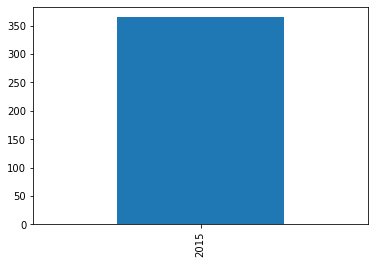

In [217]:
Climate_2015_df['Year'].value_counts().plot.bar()
plt.show()

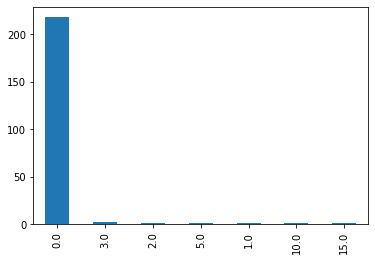

In [218]:
#Observe that there are 7 unique values here
Climate_2015_df['Total Snow (cm)'].value_counts().plot.bar()
plt.show()

In [219]:
Climate_2015_df['Snow on Grnd Flag'].value_counts()

T    2
Name: Snow on Grnd Flag, dtype: int64

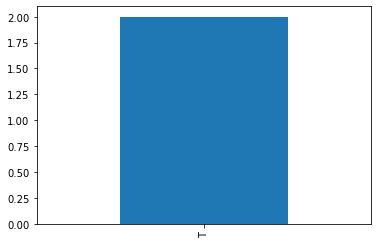

In [220]:
Climate_2015_df['Snow on Grnd Flag'].value_counts().plot.bar()
plt.show()

In [221]:
# unique_values_Climate_2015_df
# Dropping columns with only one distinct values

drop_cols = []

for col in Climate_2015_df.columns:
    if (len(Climate_2015_df[col].value_counts())==1):
        print(Climate_2015_df[col].value_counts())
        print("-----------------------------------------")
        drop_cols.append(col)
        
print(drop_cols)
print("Num of columns having just one unique value are:",len(drop_cols))

2015    365
Name: Year, dtype: int64
-----------------------------------------
†    229
Name: Data Quality, dtype: int64
-----------------------------------------
M    13
Name: Max Temp Flag, dtype: int64
-----------------------------------------
M    39
Name: Min Temp Flag, dtype: int64
-----------------------------------------
M    39
Name: Mean Temp Flag, dtype: int64
-----------------------------------------
M    39
Name: Heat Deg Days Flag, dtype: int64
-----------------------------------------
M    39
Name: Cool Deg Days Flag, dtype: int64
-----------------------------------------
T    7
Name: Total Rain Flag, dtype: int64
-----------------------------------------
T    9
Name: Total Snow Flag, dtype: int64
-----------------------------------------
T    12
Name: Total Precip Flag, dtype: int64
-----------------------------------------
T    2
Name: Snow on Grnd Flag, dtype: int64
-----------------------------------------
['Year', 'Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'M

In [222]:
#Shape before dropping:
print(Climate_2015_df.shape)
print(Climate_2015_df.columns)

(365, 23)
Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag'],
      dtype='object')


In [223]:
Climate_2015_df.drop(drop_cols, axis=1, inplace=True)

In [224]:
#Shape after dropping:
print(Climate_2015_df.shape)
print(Climate_2015_df.columns)

(365, 12)
Index(['Date/Time', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [225]:
# Formatting column names

Climate_2015_df.columns = [col.replace(' (°C)','').strip() for col in Climate_2015_df.columns]
print(Climate_2015_df.columns)

Index(['Date/Time', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')


In [226]:
Climate_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          365 non-null    datetime64[ns]
 1   Month              365 non-null    int64         
 2   Day                365 non-null    int64         
 3   Max Temp           216 non-null    float64       
 4   Min Temp           190 non-null    float64       
 5   Mean Temp          190 non-null    float64       
 6   Heat Deg Days      190 non-null    float64       
 7   Cool Deg Days      190 non-null    float64       
 8   Total Rain (mm)    229 non-null    float64       
 9   Total Snow (cm)    229 non-null    float64       
 10  Total Precip (mm)  229 non-null    float64       
 11  Snow on Grnd (cm)  229 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 34.3 KB


In [227]:
Climate_2015_df.head()

Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2015-01-01      1    1       0.0      -8.5       -4.3           22.3   
1 2015-01-02      1    2       3.0      -3.0        0.0           18.0   
2 2015-01-03      1    3       2.5      -4.0       -0.8           18.8   
3 2015-01-04      1    4       2.5       0.0        1.3           16.7   
4 2015-01-05      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm)  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                1.0

#### Dropping rows where all the columns have nulls
- Now we drop rows with at least one Nan value (Null value)

In [228]:
# Print the null percentage of each column of dataframe 'Climate_2015_df'.
getNullCount_df(Climate_2015_df)

column_name  No of Nulls  percent_missing
Min Temp                    Min Temp          175        47.945205
Mean Temp                  Mean Temp          175        47.945205
Heat Deg Days          Heat Deg Days          175        47.945205
Cool Deg Days          Cool Deg Days          175        47.945205
Max Temp                    Max Temp          149        40.821918
Total Rain (mm)      Total Rain (mm)          136        37.260274
Total Snow (cm)      Total Snow (cm)          136        37.260274
Total Precip (mm)  Total Precip (mm)          136        37.260274
Snow on Grnd (cm)  Snow on Grnd (cm)          136        37.260274
Date/Time                  Date/Time            0         0.000000
Month                          Month            0         0.000000
Day                              Day            0         0.000000

In [229]:
# # Print the null percentage of each column of dataframe 'Climate_2015_df'.
# percent_missing = Climate_2015_df.isnull().sum() * 100 / len(Climate_2015_df)
# missing_value_df = pd.DataFrame({'column_name': Climate_2015_df.columns, 'No of Nulls':Climate_2015_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

In [230]:
#Before dropping rows
print(Climate_2015_df.shape)

(365, 12)


Refere This link: https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/

In [231]:
# using dropna() function by default axis is '0' which is rows, axis=1 for columns
Climate_2015_df.dropna(inplace=True)

In [232]:
#After dropping rows
print(Climate_2015_df.shape)
#We see that 365-190=175 records or rows are deleted

(190, 12)


In [233]:
# Print the null percentage of each column of dataframe 'Climate_2015_df'.
getNullCount_df(Climate_2015_df)

column_name  No of Nulls  percent_missing
Date/Time                  Date/Time            0              0.0
Month                          Month            0              0.0
Day                              Day            0              0.0
Max Temp                    Max Temp            0              0.0
Min Temp                    Min Temp            0              0.0
Mean Temp                  Mean Temp            0              0.0
Heat Deg Days          Heat Deg Days            0              0.0
Cool Deg Days          Cool Deg Days            0              0.0
Total Rain (mm)      Total Rain (mm)            0              0.0
Total Snow (cm)      Total Snow (cm)            0              0.0
Total Precip (mm)  Total Precip (mm)            0              0.0
Snow on Grnd (cm)  Snow on Grnd (cm)            0              0.0

In [234]:
# # Print the null percentage of each column of dataframe 'Climate_2015_df'.
# percent_missing = Climate_2015_df.isnull().sum() * 100 / len(Climate_2015_df)
# missing_value_df = pd.DataFrame({'column_name': Climate_2015_df.columns, 'No of Nulls':Climate_2015_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

In [235]:
Climate_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 362
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Month              190 non-null    int64         
 2   Day                190 non-null    int64         
 3   Max Temp           190 non-null    float64       
 4   Min Temp           190 non-null    float64       
 5   Mean Temp          190 non-null    float64       
 6   Heat Deg Days      190 non-null    float64       
 7   Cool Deg Days      190 non-null    float64       
 8   Total Rain (mm)    190 non-null    float64       
 9   Total Snow (cm)    190 non-null    float64       
 10  Total Precip (mm)  190 non-null    float64       
 11  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 19.3 KB


Convert datatype of datetime to object for code of extracting week from datetime to work

In [236]:
#Observe datatype of Date/Time is "datetime64"
Climate_2015_df['Date/Time'].dtype

dtype('<M8[ns]')

In [237]:
Climate_2015_df['Date/Time']=Climate_2015_df['Date/Time'].astype(str)

In [238]:
#Observe datatype of Date/Time is "object"
Climate_2015_df['Date/Time'].dtype

dtype('O')

In [239]:
#Observe datatype  of Date/Time is "object"
Climate_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 362
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          190 non-null    object 
 1   Month              190 non-null    int64  
 2   Day                190 non-null    int64  
 3   Max Temp           190 non-null    float64
 4   Min Temp           190 non-null    float64
 5   Mean Temp          190 non-null    float64
 6   Heat Deg Days      190 non-null    float64
 7   Cool Deg Days      190 non-null    float64
 8   Total Rain (mm)    190 non-null    float64
 9   Total Snow (cm)    190 non-null    float64
 10  Total Precip (mm)  190 non-null    float64
 11  Snow on Grnd (cm)  190 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 19.3+ KB


In [240]:
# Extracting week # from the date field and formatting it

Climate_2015_df['Week'] = Climate_2015_df['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
Climate_2015_df['Week'] = Climate_2015_df['Week'].apply(lambda x: str(x).lstrip('0'))
Climate_2015_df.head()

Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01      1    1       0.0      -8.5       -4.3           22.3   
1  2015-01-02      1    2       3.0      -3.0        0.0           18.0   
2  2015-01-03      1    3       2.5      -4.0       -0.8           18.8   
3  2015-01-04      1    4       2.5       0.0        1.3           16.7   
4  2015-01-05      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm) Week  
0                0.0    1  
1                0.0    1  
2                0.0    1  
3                0.0    1  
4                1.0    2

In [241]:
print(Climate_2015_df.shape)

(190, 13)


In [242]:
# Extracting July to Dec month's data

Climate_2015_df = Climate_2015_df[Climate_2015_df['Month'] >= 7]
Climate_2015_df.reset_index(drop=True, inplace=True)
print(Climate_2015_df.shape)
Climate_2015_df.head()

(98, 13)


Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-07-01      7    1      24.5      17.0       20.8            0.0   
1  2015-07-02      7    2      24.0      14.0       19.0            0.0   
2  2015-07-03      7    3      25.0      10.0       17.5            0.5   
3  2015-07-04      7    4      26.0      11.0       18.5            0.0   
4  2015-07-05      7    5      28.0      14.0       21.0            0.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            2.8              0.0              0.0                0.0   
1            1.0              0.0              0.0                0.0   
2            0.0              0.0              0.0                0.0   
3            0.5              0.0              0.0                0.0   
4            3.0              0.0              0.0                0.0   

   Snow on Grnd (cm) Week  
0                0.0   27  
1                0.0   27  
2                0.0   27  
3                0.0   27  
4                0.0   27

In [243]:
Climate_2015_df.sort_values(by=['Week'], ascending = True, inplace = True)

In [244]:
# Getting weekly data

Climate_2015_df = Climate_2015_df.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
print(Climate_2015_df.shape)
Climate_2015_df.head()

(27, 10)


Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0   27      28.0      10.0  19.360000       0.100000       1.460000   
1   28      28.0      12.5  20.100000       0.283333       2.383333   
2   29      33.0      11.0  23.183333       0.000000       5.183333   
3   30      31.5      14.5  23.060000       0.000000       5.060000   
4   31      33.5      16.0  24.566667       0.000000       6.566667   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         0.000000              0.0           0.000000                0.0  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0

In [245]:
# Dropping 27th week data as it belongs to June 2015

Climate_2015_df.drop(Climate_2015_df[Climate_2015_df['Week'] == '27'].index, inplace = True)
print(Climate_2015_df.shape)
Climate_2015_df.head()

(26, 10)


Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1   28      28.0      12.5  20.100000       0.283333       2.383333   
2   29      33.0      11.0  23.183333       0.000000       5.183333   
3   30      31.5      14.5  23.060000       0.000000       5.060000   
4   31      33.5      16.0  24.566667       0.000000       6.566667   
5   32      28.5      15.0  21.650000       0.000000       3.650000   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0  
5         0.350000              0.0           0.350000                0.0

In [246]:
Climate_2015_df.duplicated().any()

False

In [247]:
Climate_2015_df.isnull().values.any()

False

#### Our Climate_2015_df is now ready!

## Climate 2016 and its operations

In [248]:
# Skipping the first 24 rows while reading the data to ignore the metadata
Climate_2016_df = pd.read_excel(r'./../data/raw/ONTARIO-2016.xlsx', skiprows=24)
print(Climate_2016_df.shape)
Climate_2016_df.head()

(366, 27)


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016      1    1          NaN            NaN           NaN   
1 2016-01-02  2016      1    2          NaN            NaN           NaN   
2 2016-01-03  2016      1    3          NaN            NaN           NaN   
3 2016-01-04  2016      1    4          NaN            NaN           NaN   
4 2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0            NaN           NaN             NaN            NaN   
1            NaN           NaN             NaN            NaN   
2            NaN           NaN             NaN            NaN   
3            NaN           NaN             NaN            NaN   
4            NaN           NaN             NaN            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              NaN             NaN              NaN   
1                NaN              NaN             NaN              NaN   
2                NaN              NaN             NaN              NaN   
3                NaN              NaN             NaN              NaN   
4                NaN              NaN             NaN              NaN   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                NaN               NaN                NaN   
1             NaN                NaN               NaN                NaN   
2             NaN                NaN               NaN                NaN   
3             NaN                NaN               NaN                NaN   
4             NaN                NaN               NaN                NaN   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

In [249]:
# Dropping the columns with all nulls
print(Climate_2016_df.shape)
Climate_2016_df.dropna(axis=1, thresh=1, inplace=True)
Climate_2016_df.reset_index(drop=True, inplace=True)
print(Climate_2016_df.shape)
Climate_2016_df.head()

(366, 27)
(366, 23)


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016      1    1          NaN            NaN           NaN   
1 2016-01-02  2016      1    2          NaN            NaN           NaN   
2 2016-01-03  2016      1    3          NaN            NaN           NaN   
3 2016-01-04  2016      1    4          NaN            NaN           NaN   
4 2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0            NaN           NaN             NaN            NaN   
1            NaN           NaN             NaN            NaN   
2            NaN           NaN             NaN            NaN   
3            NaN           NaN             NaN            NaN   
4            NaN           NaN             NaN            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   
2                 NaN                NaN                 NaN   
3                 NaN                NaN                 NaN   
4                 NaN                NaN                 NaN   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              NaN             NaN              NaN   
1                NaN              NaN             NaN              NaN   
2                NaN              NaN             NaN              NaN   
3                NaN              NaN             NaN              NaN   
4                NaN              NaN             NaN              NaN   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                NaN               NaN                NaN   
1             NaN                NaN               NaN                NaN   
2             NaN                NaN               NaN                NaN   
3             NaN                NaN               NaN                NaN   
4             NaN                NaN               NaN                NaN   

  Snow on Grnd Flag  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [250]:
Climate_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           366 non-null    datetime64[ns]
 1   Year                366 non-null    int64         
 2   Month               366 non-null    int64         
 3   Day                 366 non-null    int64         
 4   Data Quality        227 non-null    object        
 5   Max Temp (°C)       226 non-null    float64       
 6   Max Temp Flag       1 non-null      object        
 7   Min Temp (°C)       219 non-null    float64       
 8   Min Temp Flag       8 non-null      object        
 9   Mean Temp (°C)      219 non-null    float64       
 10  Mean Temp Flag      8 non-null      object        
 11  Heat Deg Days (°C)  219 non-null    float64       
 12  Heat Deg Days Flag  8 non-null      object        
 13  Cool Deg Days (°C)  219 non-null    float64       

In [251]:
# Unique value frequencies for Climate_2016_df
getUniqueValues_df(Climate_2016_df)

(23, 2)


Unique Value Count           dtype
Snow on Grnd Flag                    1          object
Total Rain Flag                      1          object
Cool Deg Days Flag                   1          object
Heat Deg Days Flag                   1          object
Mean Temp Flag                       1          object
Min Temp Flag                        1          object
Total Snow Flag                      1          object
Total Precip Flag                    1          object
Data Quality                         1          object
Year                                 1           int64
Max Temp Flag                        1          object
Total Snow (cm)                      9         float64
Month                               12           int64
Snow on Grnd (cm)                   15         float64
Day                                 31           int64
Cool Deg Days (°C)                  39         float64
Total Rain (mm)                     54         float64
Total Precip (mm)                   54         float64
Min Temp (°C)                       71         float64
Heat Deg Days (°C)                  75         float64
Max Temp (°C)                       76         float64
Mean Temp (°C)                     112         float64
Date/Time                          366  datetime64[ns]

In [252]:
# # Unique value frequencies for Climate_2016_df

# unique_values_Climate_2016_df = pd.DataFrame(Climate_2016_df.apply(lambda x: len(x.value_counts(dropna=True)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
# unique_values_Climate_2016_df['dtype'] = pd.DataFrame(Climate_2016_df.dtypes)
# print(unique_values_Climate_2016_df.shape)
# unique_values_Climate_2016_df

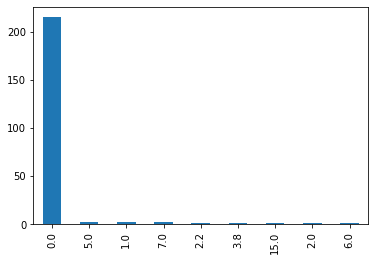

In [253]:
#Observe that there are 9 unique values here
Climate_2016_df['Total Snow (cm)'].value_counts().plot.bar()
plt.show()

In [254]:
# unique_values_Climate_2016_df
# Dropping columns with only one distinct values

drop_cols = []

for col in Climate_2016_df.columns:
    if (len(Climate_2016_df[col].value_counts())==1):
        print(Climate_2016_df[col].value_counts())
        print("-----------------------------------------")
        drop_cols.append(col)
        
print(drop_cols)
print("Num of columns having just one unique value are:",len(drop_cols))

2016    366
Name: Year, dtype: int64
-----------------------------------------
†    227
Name: Data Quality, dtype: int64
-----------------------------------------
M    1
Name: Max Temp Flag, dtype: int64
-----------------------------------------
M    8
Name: Min Temp Flag, dtype: int64
-----------------------------------------
M    8
Name: Mean Temp Flag, dtype: int64
-----------------------------------------
M    8
Name: Heat Deg Days Flag, dtype: int64
-----------------------------------------
M    8
Name: Cool Deg Days Flag, dtype: int64
-----------------------------------------
T    3
Name: Total Rain Flag, dtype: int64
-----------------------------------------
T    7
Name: Total Snow Flag, dtype: int64
-----------------------------------------
T    7
Name: Total Precip Flag, dtype: int64
-----------------------------------------
T    6
Name: Snow on Grnd Flag, dtype: int64
-----------------------------------------
['Year', 'Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Te

In [255]:
print('Shape before dropping:')
print(Climate_2016_df.shape)
print(Climate_2016_df.columns)
Climate_2016_df.drop(drop_cols, axis=1, inplace=True)
print('Shape after dropping:')
print(Climate_2016_df.shape)
print(Climate_2016_df.columns)

Shape before dropping:
(366, 23)
Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag'],
      dtype='object')
Shape after dropping:
(366, 12)
Index(['Date/Time', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [256]:
# Formatting column names
Climate_2016_df.columns = [col.replace(' (°C)','').strip() for col in Climate_2016_df.columns]
print(Climate_2016_df.shape)
print(Climate_2016_df.columns)

(366, 12)
Index(['Date/Time', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp',
       'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')


In [257]:
Climate_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          366 non-null    datetime64[ns]
 1   Month              366 non-null    int64         
 2   Day                366 non-null    int64         
 3   Max Temp           226 non-null    float64       
 4   Min Temp           219 non-null    float64       
 5   Mean Temp          219 non-null    float64       
 6   Heat Deg Days      219 non-null    float64       
 7   Cool Deg Days      219 non-null    float64       
 8   Total Rain (mm)    227 non-null    float64       
 9   Total Snow (cm)    227 non-null    float64       
 10  Total Precip (mm)  227 non-null    float64       
 11  Snow on Grnd (cm)  227 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 34.4 KB


In [258]:
Climate_2016_df.head(2)

Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2016-01-01      1    1       NaN       NaN        NaN            NaN   
1 2016-01-02      1    2       NaN       NaN        NaN            NaN   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            NaN              NaN              NaN                NaN   
1            NaN              NaN              NaN                NaN   

   Snow on Grnd (cm)  
0                NaN  
1                NaN

#### Dropping rows where all the columns have nulls
- Now we drop rows with at least one Nan value (Null value)

In [259]:
# Print the null percentage of each column of dataframe 'Climate_2016_df'.
getNullCount_df(Climate_2016_df)

column_name  No of Nulls  percent_missing
Min Temp                    Min Temp          147        40.163934
Mean Temp                  Mean Temp          147        40.163934
Heat Deg Days          Heat Deg Days          147        40.163934
Cool Deg Days          Cool Deg Days          147        40.163934
Max Temp                    Max Temp          140        38.251366
Total Rain (mm)      Total Rain (mm)          139        37.978142
Total Snow (cm)      Total Snow (cm)          139        37.978142
Total Precip (mm)  Total Precip (mm)          139        37.978142
Snow on Grnd (cm)  Snow on Grnd (cm)          139        37.978142
Date/Time                  Date/Time            0         0.000000
Month                          Month            0         0.000000
Day                              Day            0         0.000000

In [260]:
# # Print the null percentage of each column of dataframe 'Climate_2016_df'.
# percent_missing = Climate_2016_df.isnull().sum() * 100 / len(Climate_2016_df)
# missing_value_df = pd.DataFrame({'column_name': Climate_2016_df.columns, 'No of Nulls':Climate_2016_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

In [261]:
print('Shape before dropping:')
print(Climate_2016_df.shape)
Climate_2016_df.dropna(inplace=True)
print('Shape after dropping:')
print(Climate_2016_df.shape)

Shape before dropping:
(366, 12)
Shape after dropping:
(219, 12)


In [262]:
# Print the null percentage of each column of dataframe 'Climate_2016_df'.
getNullCount_df(Climate_2016_df)

column_name  No of Nulls  percent_missing
Date/Time                  Date/Time            0              0.0
Month                          Month            0              0.0
Day                              Day            0              0.0
Max Temp                    Max Temp            0              0.0
Min Temp                    Min Temp            0              0.0
Mean Temp                  Mean Temp            0              0.0
Heat Deg Days          Heat Deg Days            0              0.0
Cool Deg Days          Cool Deg Days            0              0.0
Total Rain (mm)      Total Rain (mm)            0              0.0
Total Snow (cm)      Total Snow (cm)            0              0.0
Total Precip (mm)  Total Precip (mm)            0              0.0
Snow on Grnd (cm)  Snow on Grnd (cm)            0              0.0

In [263]:
# # Print the null percentage of each column of dataframe 'Climate_2016_df'.
# percent_missing = Climate_2016_df.isnull().sum() * 100 / len(Climate_2016_df)
# missing_value_df = pd.DataFrame({'column_name': Climate_2016_df.columns, 'No of Nulls':Climate_2016_df.isnull().sum(),'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
# missing_value_df

In [264]:
print(Climate_2016_df['Date/Time'].dtype)
Climate_2016_df['Date/Time']=Climate_2016_df['Date/Time'].astype(str)
print(Climate_2016_df['Date/Time'].dtype)

datetime64[ns]
object


In [265]:
print(Climate_2016_df.shape)
Climate_2016_df.head(2)

(219, 12)


Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
7  2016-01-08      1    8       7.0     -14.0       -3.5           21.5   
8  2016-01-09      1    9      11.0       3.0        7.0           11.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
7            0.0              9.0              0.0                9.0   
8            0.0             14.6              0.0               14.6   

   Snow on Grnd (cm)  
7                0.0  
8                0.0

In [266]:
# Extracting week # from the date field and formatting it

Climate_2016_df['Week'] = Climate_2016_df['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))
Climate_2016_df['Week'] = Climate_2016_df['Week'].apply(lambda x: str(x).lstrip('0'))
print(Climate_2016_df.shape)
Climate_2016_df.head()

(219, 13)


Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
7   2016-01-08      1    8       7.0     -14.0       -3.5           21.5   
8   2016-01-09      1    9      11.0       3.0        7.0           11.0   
9   2016-01-10      1   10      -1.5      -5.0       -3.3           21.3   
11  2016-01-12      1   12      -5.0     -12.0       -8.5           26.5   
13  2016-01-14      1   14       2.5     -10.5       -4.0           22.0   

    Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
7             0.0              9.0              0.0                9.0   
8             0.0             14.6              0.0               14.6   
9             0.0              0.0              7.0                7.0   
11            0.0              0.0              0.0                0.0   
13            0.0              0.0              0.0                0.0   

    Snow on Grnd (cm) Week  
7                 0.0    1  
8                 0.0    1  
9                 0.0    1  
11               12.0    2  
13               11.0    2

In [267]:
# Extracting Jan to June month's data
Climate_2016_df = Climate_2016_df[Climate_2016_df['Month'] <= 6]
Climate_2016_df.reset_index(drop=True, inplace=True)
print(Climate_2016_df.shape)
Climate_2016_df.head()

(93, 13)


Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08      1    8       7.0     -14.0       -3.5           21.5   
1  2016-01-09      1    9      11.0       3.0        7.0           11.0   
2  2016-01-10      1   10      -1.5      -5.0       -3.3           21.3   
3  2016-01-12      1   12      -5.0     -12.0       -8.5           26.5   
4  2016-01-14      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm) Week  
0                0.0    1  
1                0.0    1  
2                0.0    1  
3               12.0    2  
4               11.0    2

In [268]:
Climate_2016_df.tail()

Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
88  2016-06-24      6   24      29.0      13.0       21.0            0.0   
89  2016-06-25      6   25      30.5      13.0       21.8            0.0   
90  2016-06-26      6   26      34.0      18.5       26.3            0.0   
91  2016-06-27      6   27      34.5      20.0       27.3            0.0   
92  2016-06-30      6   30      30.0      13.0       21.5            0.0   

    Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
88            3.0              0.0              0.0                0.0   
89            3.8              0.0              0.0                0.0   
90            8.3              3.2              0.0                3.2   
91            9.3              0.0              0.0                0.0   
92            3.5              2.0              0.0                2.0   

    Snow on Grnd (cm) Week  
88                0.0   25  
89                0.0   25  
90                0.0   25  
91                0.0   26  
92                0.0   26

In [269]:
Climate_2016_df.sort_values(by=['Week'], ascending = True, inplace = True)

In [270]:
Climate_2016_df.tail()

Date/Time  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
16  2016-02-24      2   24       1.0      -1.0        0.0           18.0   
17  2016-02-25      2   25       1.0      -3.5       -1.3           19.3   
18  2016-02-29      2   29      10.5      -1.0        4.8           13.2   
20  2016-03-04      3    4       2.0      -4.0       -1.0           19.0   
19  2016-03-01      3    1      10.5      -5.0        2.8           15.2   

    Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
16            0.0             25.4              6.0               31.4   
17            0.0              0.0              0.0                0.0   
18            0.0              0.0              0.0                0.0   
20            0.0              0.0              2.0                2.0   
19            0.0              3.0              5.0                8.0   

    Snow on Grnd (cm) Week  
16                0.0    8  
17                6.0    8  
18                0.0    9  
20                7.0    9  
19                1.0    9

In [271]:
# Getting weekly data
Climate_2016_df = Climate_2016_df.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
print(Climate_2016_df.shape)
Climate_2016_df.head()

(25, 10)


Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0    1      11.0     -14.0   0.066667      17.933333            0.0   
1   10      20.0      -2.0  10.166667       7.833333            0.0   
2   11      16.0      -2.5   8.900000       9.100000            0.0   
3   12      20.5      -3.5   5.720000      12.280000            0.0   
4   13      16.0      -5.0   6.871429      11.128571            0.0   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         7.866667         2.333333          10.200000                0.0  
1         9.000000         0.000000           9.000000                0.0  
2         0.500000         0.000000           0.500000                0.0  
3        12.800000         0.000000          12.800000                0.0  
4         2.828571         0.542857           3.371429                0.0

In [272]:
Climate_2016_df.duplicated().any()

False

In [273]:
Climate_2016_df.isnull().values.any()

False

#### Our Climate_2016_df is now ready!

*Check List Difference*

In [274]:
def list_diff(list1, list2): 
    return (list(set(list1) - set(list2)))

In [275]:
print(list_diff(list(Climate_2015_df.columns), list(Climate_2016_df.columns)))

[]


In [276]:
print(Climate_2015_df.shape)
print(Climate_2016_df.shape)

(26, 10)
(25, 10)


In [277]:
#Concatenating the climate data sets to form a single one to be merged with the order data set
Climate_df = pd.concat([Climate_2015_df, Climate_2016_df], axis = 0)
print(Climate_df.shape)

(51, 10)


In [278]:
Climate_df.head(2)

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1   28      28.0      12.5  20.100000       0.283333       2.383333   
2   29      33.0      11.0  23.183333       0.000000       5.183333   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0

In [279]:
Climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Week               51 non-null     object 
 1   Max Temp           51 non-null     float64
 2   Min Temp           51 non-null     float64
 3   Mean Temp          51 non-null     float64
 4   Heat Deg Days      51 non-null     float64
 5   Cool Deg Days      51 non-null     float64
 6   Total Rain (mm)    51 non-null     float64
 7   Total Snow (cm)    51 non-null     float64
 8   Total Precip (mm)  51 non-null     float64
 9   Snow on Grnd (cm)  51 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.4+ KB


In [280]:
Climate_df.Week.unique()

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '1', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '4', '5', '6', '7', '8', '9'], dtype=object)

#### Our `Climate_df` is now ready!

## Extracting 3 separate dataframes for 3 product subcategories - camera accessory, home audio and gaming accessory

In [281]:
Consumer_df.shape

(1464190, 21)

In [282]:
Consumer_df.head(2)

order_date  Year Month Week     gmv  list_price  Discount%  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99      1   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0       4.03      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   
1            0.0            0.0                        cod    7   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   
1   7.33541149097431E+018           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   
1               cameraaccessory              cameratripod       7190.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  
0                        0            0               0       luxury  
1                        0            0               0       luxury

In [283]:
#'product_analytic_sub_category' has the three sub categories of interest
Consumer_df['product_analytic_sub_category'].value_counts()

speaker                468310
cameraaccessory        215901
gamingaccessory        185876
tvvideosmall           133192
homeaudio              111061
audiomp3player         103463
game                    96842
camera                  87552
gamingconsole           26984
camerastorage           16558
audioaccessory          10702
hometheatre              4197
amplifierreceiver        3455
gamemembershipcards        97
Name: product_analytic_sub_category, dtype: int64

In [284]:
cameraaccessory_df = Consumer_df.loc[Consumer_df['product_analytic_sub_category']=='cameraaccessory']
gamingaccessory_df = Consumer_df.loc[Consumer_df['product_analytic_sub_category']=='gamingaccessory']
homeaudio_df = Consumer_df.loc[Consumer_df['product_analytic_sub_category']=='homeaudio']

print('No of rows in cameraaccessory_df: {}'.format(cameraaccessory_df.shape[0]))
print('No of rows in gamingaccessory_df: {}'.format(gamingaccessory_df.shape[0]))
print('No of rows in homeaudio_df: {}'.format(homeaudio_df.shape[0]))

No of rows in cameraaccessory_df: 215901
No of rows in gamingaccessory_df: 185876
No of rows in homeaudio_df: 111061


In [285]:
#Columns should be same but rows will differ
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 21)
Shape of gamingaccessory_df: (185876, 21)
Shape of homeaudio_df: (111061, 21)


In [286]:
cameraaccessory_df['product_analytic_category'].value_counts()

cameraaccessory    215901
Name: product_analytic_category, dtype: int64

In [287]:
cameraaccessory_df['product_analytic_sub_category'].value_counts()

cameraaccessory    215901
Name: product_analytic_sub_category, dtype: int64

#### Inference:
- Above value_counts shows us that the category and sub category are all 'cameraaccessory'

In [288]:
cameraaccessory_df['product_analytic_vertical'].value_counts()

flash                   47808
camerabattery           35107
lens                    32350
cameratripod            31220
camerabag               15842
camerabatterycharger    14500
binoculars              13336
filter                  11471
cameraremotecontrol      5421
cameraaccessory          2042
camerafilmrolls          1833
telescope                1693
strap                    1586
cameramount              1058
camerabatterygrip         358
cameraeyecup               98
extensiontube              84
cameramicrophone           51
camerahousing              19
softbox                    15
cameraledlight              3
reflectorumbrella           3
flashshoeadapter            2
teleconverter               1
Name: product_analytic_vertical, dtype: int64

### Converting some binary categorical variables to numeric format to enter into the Model:
- Use helper functions here to get unique value count

In [289]:
#observe categorical variable product_analytic_vertical	24 unique value counts
getUniqueValues_df(cameraaccessory_df)

(21, 2)


Unique Value Count           dtype
product_analytic_sub_category                   1          object
product_analytic_category                       1          object
s1_fact.order_payment_type                      2          object
payday_flag                                     2           int64
occassion_flag                                  2           int64
product_type                                    2          object
Year                                            2          object
deliverybdays                                   9         float64
deliverycdays                                  11         float64
Month                                          13          object
sla                                            14           int64
product_procurement_sla                        15           int64
units                                          16           int64
product_analytic_vertical                      24          object
Week                                           51          object
product_mrp                                  1298         float64
list_price                                   4442         float64
gmv                                          4631         float64
Discount%                                    7132         float64
pincode                                      9837          object
order_date                                 198720  datetime64[ns]

#### Inference:
- From above we can see that 's1_fact.order_payment_type' and 'product_type' are categorical variables which need to be converted to numeric for our model

In [290]:
cameraaccessory_df['s1_fact.order_payment_type'].value_counts()

cod        150439
prepaid     65462
Name: s1_fact.order_payment_type, dtype: int64

In [291]:
cameraaccessory_df['product_type'].value_counts()

mass_market    197478
luxury          18423
Name: product_type, dtype: int64

In [292]:
cameraaccessory_df.head(1)

order_date  Year Month Week     gmv  list_price  Discount%  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  
0                        0            0               0       luxury

In [293]:
cameraaccessory_df['is_cod'] = cameraaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
gamingaccessory_df['is_cod'] = gamingaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
homeaudio_df['is_cod'] = homeaudio_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)


cameraaccessory_df['is_mass_market'] = cameraaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gamingaccessory_df['is_mass_market'] = gamingaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
homeaudio_df['is_mass_market'] = homeaudio_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

cameraaccessory_df.head(1)

order_date  Year Month Week     gmv  list_price  Discount%  units  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99      1   

   deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
0            0.0            0.0                        cod    5   

                  pincode product_analytic_category  \
0  -7.79175582905735E+018           cameraaccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               cameraaccessory              cameratripod       7190.0   

   product_procurement_sla  payday_flag  occassion_flag product_type  is_cod  \
0                        0            0               0       luxury       1   

   is_mass_market  
0               0

In [294]:
#Columns should be same but rows will differ
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 23)
Shape of gamingaccessory_df: (185876, 23)
Shape of homeaudio_df: (111061, 23)


In [295]:
# Dropping Columns which are insignificant to the analysis

drop_columns = ['s1_fact.order_payment_type','product_type']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

In [296]:
#Columns should be same but rows will differ
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 21)
Shape of gamingaccessory_df: (185876, 21)
Shape of homeaudio_df: (111061, 21)


### We also see that `product_analytic_vertical` is categorical variable  which need to go in as features or columns into our model

- For categorical variable(product_analytic_vertical) with multiple levels, creating dummy features (one-hot encoded)

In [297]:
#product_analytic_vertical	 15 unique value counts
getUniqueValues_df(gamingaccessory_df)

(21, 2)


Unique Value Count           dtype
product_analytic_sub_category                   1          object
product_analytic_category                       1          object
is_mass_market                                  2           int64
Year                                            2          object
occassion_flag                                  2           int64
payday_flag                                     2           int64
is_cod                                          2           int64
deliverybdays                                   9         float64
product_procurement_sla                        11           int64
units                                          11           int64
deliverycdays                                  11         float64
Month                                          13          object
sla                                            14           int64
product_analytic_vertical                      15          object
Week                                           52          object
product_mrp                                   658         float64
list_price                                   2899         float64
gmv                                          3161         float64
Discount%                                    5686         float64
pincode                                      9416          object
order_date                                 173511  datetime64[ns]

In [298]:
#observe product_analytic_vertical	11 unique value counts
getUniqueValues_df(homeaudio_df)

(21, 2)


Unique Value Count           dtype
product_analytic_sub_category                   1          object
product_analytic_category                       1          object
is_mass_market                                  2           int64
Year                                            2          object
occassion_flag                                  2           int64
payday_flag                                     2           int64
is_cod                                          2           int64
product_procurement_sla                         7           int64
deliverybdays                                   9         float64
product_analytic_vertical                      11          object
deliverycdays                                  11         float64
units                                          12           int64
Month                                          13          object
sla                                            14           int64
Week                                           49          object
product_mrp                                   699         float64
list_price                                   2817         float64
gmv                                          2948         float64
Discount%                                    4501         float64
pincode                                      7304          object
order_date                                 106211  datetime64[ns]

In [299]:
#Before creating dummy variables
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 21)
Shape of gamingaccessory_df: (185876, 21)
Shape of homeaudio_df: (111061, 21)


In [300]:
# Creating dummy variables for the remaining categorical variable
dummy1 = pd.get_dummies(cameraaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy2 = pd.get_dummies(gamingaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy3 = pd.get_dummies(homeaudio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding the results to the original dataframes
cameraaccessory_df = pd.concat([cameraaccessory_df, dummy1], axis=1)
gamingaccessory_df = pd.concat([gamingaccessory_df, dummy2], axis=1)
homeaudio_df = pd.concat([homeaudio_df, dummy3], axis=1)

In [301]:
#After creating dummy variables
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 44)
Shape of gamingaccessory_df: (185876, 35)
Shape of homeaudio_df: (111061, 31)


#### Dropping the repeated variables after dummy variable creation

In [302]:
# removing columns
cameraaccessory_df = cameraaccessory_df.drop('product_analytic_vertical', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('product_analytic_vertical', axis=1)
homeaudio_df = homeaudio_df.drop('product_analytic_vertical', axis=1)

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 43)
Shape of gamingaccessory_df: (185876, 34)
Shape of homeaudio_df: (111061, 30)


*Also by inspecting unique value counts for all the 3 dataframe we see that in all 3 dfs, columns 'product_analytic_category' & 'product_analytic_sub_category' have only 1 unique value. Hence we will drop these 2 columns from the 3 dataframes.*

In [303]:
# Dropping Columns which are insignificant to the analysis

drop_columns = ['product_analytic_category', 'product_analytic_sub_category']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

In [304]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 41)
Shape of gamingaccessory_df: (185876, 32)
Shape of homeaudio_df: (111061, 28)


### Checking if any null values exist in the 3 new dataframes:

In [305]:
getNullCount_df(cameraaccessory_df)

column_name  \
order_date                                                        order_date   
product_vertical_camerabatterycharger  product_vertical_camerabatterycharger   
product_vertical_cameraeyecup                  product_vertical_cameraeyecup   
product_vertical_camerafilmrolls            product_vertical_camerafilmrolls   
product_vertical_camerahousing                product_vertical_camerahousing   
product_vertical_cameraledlight              product_vertical_cameraledlight   
product_vertical_cameramicrophone          product_vertical_cameramicrophone   
product_vertical_cameramount                    product_vertical_cameramount   
product_vertical_cameraremotecontrol    product_vertical_cameraremotecontrol   
product_vertical_cameratripod                  product_vertical_cameratripod   
product_vertical_extensiontube                product_vertical_extensiontube   
product_vertical_filter                              product_vertical_filter   
product_vertical_flash                                product_vertical_flash   
product_vertical_flashshoeadapter          product_vertical_flashshoeadapter   
product_vertical_lens                                  product_vertical_lens   
product_vertical_reflectorumbrella        product_vertical_reflectorumbrella   
product_vertical_softbox                            product_vertical_softbox   
product_vertical_strap                                product_vertical_strap   
product_vertical_teleconverter                product_vertical_teleconverter   
product_vertical_camerabatterygrip        product_vertical_camerabatterygrip   
product_vertical_camerabattery                product_vertical_camerabattery   
Year                                                                    Year   
product_vertical_camerabag                        product_vertical_camerabag   
Month                                                                  Month   
Week                                                                    Week   
gmv                                                                      gmv   
list_price                                                        list_price   
Discount%                                                          Discount%   
units                                                                  units   
deliverybdays                                                  deliverybdays   
deliverycdays                                                  deliverycdays   
sla                                                                      sla   
pincode                                                              pincode   
product_mrp                                                      product_mrp   
product_procurement_sla                              product_procurement_sla   
payday_flag                                                      payday_flag   
occassion_flag                                                occassion_flag   
is_cod                                                                is_cod   
is_mass_market                                                is_mass_market   
product_vertical_cameraaccessory            product_vertical_cameraaccessory   
product_vertical_telescope                        product_vertical_telescope   

                                       No of Nulls  percent_missing  
order_date                                       0              0.0  
product_vertical_camerabatterycharger            0              0.0  
product_vertical_cameraeyecup                    0              0.0  
product_vertical_camerafilmrolls                 0              0.0  
product_vertical_camerahousing                   0              0.0  
product_vertical_cameraledlight                  0              0.0  
product_vertical_cameramicrophone                0              0.0  
product_vertical_cameramount                     0              0.0  
product_vertical_cameraremotecontrol             0              0.0  
prod

In [306]:
getNullCount_df(gamingaccessory_df)

column_name  \
order_date                                                          order_date   
Year                                                                      Year   
product_vertical_motioncontroller            product_vertical_motioncontroller   
product_vertical_joystickgamingwheel      product_vertical_joystickgamingwheel   
product_vertical_gamingspeaker                  product_vertical_gamingspeaker   
product_vertical_gamingmousepad                product_vertical_gamingmousepad   
product_vertical_gamingmouse                      product_vertical_gamingmouse   
product_vertical_gamingmemorycard            product_vertical_gamingmemorycard   
product_vertical_gamingkeyboard                product_vertical_gamingkeyboard   
product_vertical_gamingheadset                  product_vertical_gamingheadset   
product_vertical_gamingchargingstation  product_vertical_gamingchargingstation   
product_vertical_gamingadapter                  product_vertical_gamingadapter   
product_vertical_gamingaccessorykit        product_vertical_gamingaccessorykit   
product_vertical_gamepad                              product_vertical_gamepad   
product_vertical_gamecontrolmount            product_vertical_gamecontrolmount   
is_mass_market                                                  is_mass_market   
is_cod                                                                  is_cod   
occassion_flag                                                  occassion_flag   
payday_flag                                                        payday_flag   
product_procurement_sla                                product_procurement_sla   
product_mrp                                                        product_mrp   
pincode                                                                pincode   
sla                                                                        sla   
deliverycdays                                                    deliverycdays   
deliverybdays                                                    deliverybdays   
units                                                                    units   
Discount%                                                            Discount%   
list_price                                                          list_price   
gmv                                                                        gmv   
Week                                                                      Week   
Month                                                                    Month   
product_vertical_tvoutcableaccessory      product_vertical_tvoutcableaccessory   

                                        No of Nulls  percent_missing  
order_date                                        0              0.0  
Year                                              0              0.0  
product_vertical_motioncontroller                 0              0.0  
product_vertical_joystickgamingwheel              0              0.0  
product_vertical_gamingspeaker                    0              0.0  
product_vertical_gamingmousepad                   0              0.0  
product_vertical_gamingmouse                      0              0.0  
product_vertical_gamingmemorycard                 0              0.0  
product_vertical_gamingkeyboard                   0              0.0  
product_vertical_gamingheadset                    0              0.0  
product_vertical_gamingchargingstation            0              0.0  
product_vertical_gamingadapter                    0              0.0  
product_vertical_gamingaccessorykit               0              0.0  
product_vertical_gamepad                          0              0.0  
product_vertical_gamecontrolmount                 0              0.0  
is_mass_market                                    0              0.0  
is_cod                                            0              0.0  
occassion_flag                                    0              0.0  
payday_flag

In [307]:
getNullCount_df(homeaudio_df)

column_name  \
order_date                                                order_date   
Year                                                            Year   
product_vertical_soundmixer              product_vertical_soundmixer   
product_vertical_slingbox                  product_vertical_slingbox   
product_vertical_karaokeplayer        product_vertical_karaokeplayer   
product_vertical_homeaudiospeaker  product_vertical_homeaudiospeaker   
product_vertical_hifisystem              product_vertical_hifisystem   
product_vertical_fmradio                    product_vertical_fmradio   
product_vertical_dockingstation      product_vertical_dockingstation   
product_vertical_dock                          product_vertical_dock   
product_vertical_djcontroller          product_vertical_djcontroller   
is_mass_market                                        is_mass_market   
is_cod                                                        is_cod   
occassion_flag                                        occassion_flag   
payday_flag                                              payday_flag   
product_procurement_sla                      product_procurement_sla   
product_mrp                                              product_mrp   
pincode                                                      pincode   
sla                                                              sla   
deliverycdays                                          deliverycdays   
deliverybdays                                          deliverybdays   
units                                                          units   
Discount%                                                  Discount%   
list_price                                                list_price   
gmv                                                              gmv   
Week                                                            Week   
Month                                                          Month   
product_vertical_voicerecorder        product_vertical_voicerecorder   

                                   No of Nulls  percent_missing  
order_date                                   0              0.0  
Year                                         0              0.0  
product_vertical_soundmixer                  0              0.0  
product_vertical_slingbox                    0              0.0  
product_vertical_karaokeplayer               0              0.0  
product_vertical_homeaudiospeaker            0              0.0  
product_vertical_hifisystem                  0              0.0  
product_vertical_fmradio                     0              0.0  
product_vertical_dockingstation              0              0.0  
product_vertical_dock                        0              0.0  
product_vertical_djcontroller                0              0.0  
is_mass_market                               0              0.0  
is_cod                                       0              0.0  
occassion_flag                               0              0.0  
payday_flag                                  0              0.0  
product_procurement_sla                      0              0.0  
product_mrp                                  0              0.0  
pincode                                      0              0.0  
sla                                          0              0.0  
deliverycdays                                0              0.0  
deliverybdays                                0              0.0  
units                                        0              0.0  
Discount%                                    0              0.0  
list_price                                   0              0.0  
gmv                                          0              0.0  
Week                                         0              0.0  
Month                                        0              0.0  
product_vertical_voicerecorder               0              0.0

In [308]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


## Roll Up Order Data to Weekly Level
- For rolling up to obtain weekly data that will be used for modelling, we will ignore `list_price` and `product_mrp`. These features are closely related to gmv(revenue). However they dont add any business value. It is obvious that having a high mpr or list_price will increase the revenue. But that wont be a good business decision to maximise revenue.
- `Units` also is not a very important feature from business perspective as its obvious that higher the no of units sold, more will be the revenue. The challenge of prediction is to find attributes, tuning which, customers will buy more product units, thereby increasing revenue.

*Rolling up order data to get weekly data by taking a mean of all the values per week*

In [309]:
#Before rolling up to weekly data
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (215901, 41)
Shape of gamingaccessory_df: (185876, 32)
Shape of homeaudio_df: (111061, 28)


In [310]:
cameraaccessory_df = cameraaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': "mean", \
                                          'deliverycdays':'mean','sla':'mean', 'product_procurement_sla':'mean', \
                                          'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', 'is_mass_market':'sum', \
                                          'product_vertical_cameraaccessory':'sum', \
                                          'product_vertical_camerabag':'sum', 'product_vertical_camerabattery':'sum', \
                                          'product_vertical_camerabatterycharger':'sum', 'product_vertical_camerabatterygrip': \
                                          'sum','product_vertical_cameraeyecup':'sum','product_vertical_camerafilmrolls':'sum', \
                                          'product_vertical_camerahousing':'sum','product_vertical_cameraledlight':'sum', \
                                          'product_vertical_cameramicrophone':'sum','product_vertical_cameramount':'sum', \
                                          'product_vertical_cameraremotecontrol':'sum', 'product_vertical_cameratripod':'sum', \
                                          'product_vertical_extensiontube':'sum', 'product_vertical_filter':'sum', \
                                          'product_vertical_flash':'sum','product_vertical_flashshoeadapter':'sum', \
                                          'product_vertical_lens':'sum','product_vertical_reflectorumbrella':'sum', \
                                          'product_vertical_softbox':'sum','product_vertical_strap':'sum', \
                                          'product_vertical_teleconverter':'sum','product_vertical_telescope':'sum'}) \
.reset_index(drop=False)
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
cameraaccessory_df.head()

Shape of cameraaccessory_df: (51, 34)


Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  5077831.0  49.228778       0.000000       0.000000  5.894657   
1   02  4372114.0  48.386792       0.002616       0.002878  6.570382   
2   03  6954520.0  47.812018       0.000780       0.000975  6.384016   
3   04  5056909.0  43.810967       0.000000       0.000000  6.664318   
4   05  5380254.0  51.190178       0.002205       0.002756  6.340805   

   product_procurement_sla  payday_flag  occassion_flag  is_cod  \
0                 2.881394            0               0    4272   
1                 2.663004         1474               0    3000   
2                 2.695712            0               0    3819   
3                 2.648816         1054               0    2795   
4                 2.728826            0               0    4323   

   is_mass_market  product_vertical_cameraaccessory  \
0            4951                                48   
1            3515                                48   
2            4558                                44   
3            3149                                53   
4            5100                                47   

   product_vertical_camerabag  product_vertical_camerabattery  \
0                       280.0                           580.0   
1                       264.0                           468.0   
2                       295.0                           607.0   
3                       324.0                           622.0   
4                       342.0                           941.0   

   product_vertical_camerabatterycharger  product_vertical_camerabatterygrip  \
0                                  261.0                                   3   
1                                  230.0                                   7   
2                                  303.0                                  13   
3                                  225.0                                  10   
4                                  251.0                                   5   

   product_vertical_cameraeyecup  product_vertical_camerafilmrolls  \
0                              3                                31   
1                              2                                40   
2                              1                                46   
3                              0                                30   
4                              1                                37   

   product_vertical_camerahousing  product_vertical_cameraledlight  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                1   
4                               0                                0   

   product_vertical_cameramicrophone  product_vertical_cameramount  \
0                                  0                            30   
1                                  0                            21   
2                                  2                            34   
3                                  0                            33   
4                                  0                            50   

   product_vertical_cameraremotecontrol  product_vertical_cameratripod  \
0                                  88.0                          776.0   
1                                  76.0                          579.0   
2                                  86.0                          431.0   
3                                  65.0                          374.0   
4                                  77.0                          564.0   

   product_vertical_extensiontube  product_vertical_filter  \
0                               2                    211.0   
1                               2                    218.0   
2                               3                    268.0   
3      

In [311]:
gamingaccessory_df = gamingaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays':"mean", \
                                                               'deliverycdays':'mean','sla':'mean','product_procurement_sla': \
                                                               'mean','payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                               'is_mass_market':'sum','product_vertical_gamecontrolmount':'sum', \
                                                               'product_vertical_gamepad':'sum', \
                                                               'product_vertical_gamingaccessorykit':'sum', \
                                                               'product_vertical_gamingadapter':'sum', \
                                                               'product_vertical_gamingchargingstation':'sum', \
                                                               'product_vertical_gamingheadset':'sum', \
                                                               'product_vertical_gamingkeyboard':'sum', \
                                                               'product_vertical_gamingmemorycard':'sum', \
                                                               'product_vertical_gamingmouse':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingspeaker':'sum', 
                                                               'product_vertical_joystickgamingwheel':'sum', \
                                                               'product_vertical_motioncontroller':'sum', \
                                                               'product_vertical_tvoutcableaccessory':'sum'}) \
.reset_index(drop=False)
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
gamingaccessory_df.head()

Shape of gamingaccessory_df: (52, 25)


Week           gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  3.437122e+06  46.901508       0.000000       0.000000  5.857337   
1   02  3.070351e+06  44.452908       0.001015       0.001015  5.860695   
2   03  4.739474e+06  45.425627       0.000000       0.000000  5.895979   
3   04  3.012532e+06  43.469701       0.002260       0.002825  6.030226   
4   05  3.138597e+06  44.511403       0.003352       0.004309  5.886282   

   product_procurement_sla  payday_flag  occassion_flag  is_cod  \
0                 2.675498            0               0    3693   
1                 2.606191         1641               0    3266   
2                 2.702324            0               0    4310   
3                 2.653390         1049               0    2886   
4                 2.555183            0               0    3400   

   is_mass_market  product_vertical_gamecontrolmount  \
0            4099                                  0   
1            3686                                  0   
2            5026                                  0   
3            3253                                  0   
4            3947                                  0   

   product_vertical_gamepad  product_vertical_gamingaccessorykit  \
0                    1103.0                                160.0   
1                     831.0                                158.0   
2                    1489.0                                187.0   
3                     983.0                                122.0   
4                     919.0                                155.0   

   product_vertical_gamingadapter  product_vertical_gamingchargingstation  \
0                              64                                       1   
1                              61                                       4   
2                              49                                       4   
3                              50                                       3   
4                              57                                       2   

   product_vertical_gamingheadset  product_vertical_gamingkeyboard  \
0                          1679.0                            106.0   
1                          1538.0                            105.0   
2                          1822.0                            168.0   
3                          1185.0                            118.0   
4                          1619.0                            127.0   

   product_vertical_gamingmemorycard  product_vertical_gamingmouse  \
0                              316.0                         690.0   
1                              360.0                         662.0   
2                              453.0                         952.0   
3                              273.0                         556.0   
4                              259.0                         737.0   

   product_vertical_gamingmousepad  product_vertical_gamingspeaker  \
0                               68                              28   
1                               75                              10   
2                              102                              11   
3                               79                              14   
4                               90                              21   

   product_vertical_joystickgamingwheel  product_vertical_motioncontroller  \
0                                    32                                 22   
1                                    32                                 15   
2                                    28                                 34   
3                                    23                                 16   
4                                    15                                 18   

   product_vertical_tvoutcableaccessory  
0                                   144  
1                                    87  
2                                   122  
3                                   117

In [312]:
homeaudio_df = homeaudio_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': \
                                                   'mean','deliverycdays':'mean','sla':'mean','product_procurement_sla':'mean',\
                                                   'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                   'is_mass_market':'sum','product_vertical_djcontroller':'sum', \
                                                   'product_vertical_dock':'sum', 'product_vertical_dockingstation':'sum', \
                                                   'product_vertical_fmradio':'sum', 'product_vertical_hifisystem':'sum', \
                                                   'product_vertical_homeaudiospeaker':'sum', \
                                                   'product_vertical_karaokeplayer':'sum', 'product_vertical_slingbox':'sum', \
                                                   'product_vertical_soundmixer':'sum','product_vertical_voicerecorder':'sum'})\
.reset_index(drop=False)
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))
homeaudio_df.head()

Shape of homeaudio_df: (49, 21)


Week           gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  7.097928e+06  44.578453       0.000000       0.000000  4.832785   
1   02  4.964127e+06  38.998634       0.002189       0.002189  5.496060   
2   03  5.648720e+06  39.975989       0.000000       0.000000  5.795531   
3   04  4.817016e+06  37.732590       0.003567       0.004458  5.696389   
4   05  7.027126e+06  42.512724       0.001532       0.001532  4.920012   

   product_procurement_sla  payday_flag  occassion_flag  is_cod  \
0                 2.867185            0               0    2879   
1                 2.853765          907               0    1871   
2                 2.690130            0               0    2132   
3                 2.684797          705               0    1842   
4                 2.809071            0               0    2748   

   is_mass_market  product_vertical_djcontroller  product_vertical_dock  \
0            2561                              5                     37   
1            1580                              3                     48   
2            1984                              1                     56   
3            1303                              3                     26   
4            1864                              4                     28   

   product_vertical_dockingstation  product_vertical_fmradio  \
0                                3                     443.0   
1                                8                     399.0   
2                               15                     465.0   
3                               12                     488.0   
4                                4                     547.0   

   product_vertical_hifisystem  product_vertical_homeaudiospeaker  \
0                           24                             2719.0   
1                           17                             1706.0   
2                           23                             2003.0   
3                           31                             1571.0   
4                           21                             2534.0   

   product_vertical_karaokeplayer  product_vertical_slingbox  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   product_vertical_soundmixer  product_vertical_voicerecorder  
0                            0                              78  
1                            1                              65  
2                            1                              93  
3                            0                              76  
4                            0                              84

In [313]:
#After rolling up to weekly data
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 34)
Shape of gamingaccessory_df: (52, 25)
Shape of homeaudio_df: (49, 21)


#### Calculating Payday week & Holiday week
- See line no 93 on how payday_flag variable is created in Consumer_df
- We have sumed payday_flag and occasion_flag in groupby when rolling to weekly data
- If Payday falls within the week(payday_flag > 0), then payday week = 1, else 0
- If holiday falls within the week(occassion_flag > 0), then holiday week = 1, else 0

In [314]:
cameraaccessory_df.payday_flag.value_counts()

0       24
1213     1
1        1
1474     1
837      1
10       1
1419     1
1548     1
910      1
719      1
2192     1
463      1
1811     1
1236     1
6974     1
389      1
1500     1
1054     1
1504     1
536      1
2        1
1318     1
681      1
1713     1
784      1
567      1
1083     1
1368     1
Name: payday_flag, dtype: int64

In [315]:
cameraaccessory_df.occassion_flag.value_counts()

0       40
570      1
632      1
567      1
1016     1
687      1
745      1
799      1
728      1
599      1
593      1
769      1
Name: occassion_flag, dtype: int64

In [316]:
cameraaccessory_df.head(2)

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  5077831.0  49.228778       0.000000       0.000000  5.894657   
1   02  4372114.0  48.386792       0.002616       0.002878  6.570382   

   product_procurement_sla  payday_flag  occassion_flag  is_cod  \
0                 2.881394            0               0    4272   
1                 2.663004         1474               0    3000   

   is_mass_market  product_vertical_cameraaccessory  \
0            4951                                48   
1            3515                                48   

   product_vertical_camerabag  product_vertical_camerabattery  \
0                       280.0                           580.0   
1                       264.0                           468.0   

   product_vertical_camerabatterycharger  product_vertical_camerabatterygrip  \
0                                  261.0                                   3   
1                                  230.0                                   7   

   product_vertical_cameraeyecup  product_vertical_camerafilmrolls  \
0                              3                                31   
1                              2                                40   

   product_vertical_camerahousing  product_vertical_cameraledlight  \
0                               0                                1   
1                               0                                0   

   product_vertical_cameramicrophone  product_vertical_cameramount  \
0                                  0                            30   
1                                  0                            21   

   product_vertical_cameraremotecontrol  product_vertical_cameratripod  \
0                                  88.0                          776.0   
1                                  76.0                          579.0   

   product_vertical_extensiontube  product_vertical_filter  \
0                               2                    211.0   
1                               2                    218.0   

   product_vertical_flash  product_vertical_flashshoeadapter  \
0                  2022.0                                  0   
1                  1097.0                                  0   

   product_vertical_lens  product_vertical_reflectorumbrella  \
0                  634.0                                   0   
1                  509.0                                   0   

   product_vertical_softbox  product_vertical_strap  \
0                         0                      26   
1                         0                      36   

   product_vertical_teleconverter  product_vertical_telescope  
0                               0                          31  
1                               0                          27

In [317]:
cameraaccessory_df['payday_week'] = cameraaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['payday_week'] = gamingaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['payday_week'] = homeaudio_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df['holiday_week'] = cameraaccessory_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['holiday_week'] = gamingaccessory_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['holiday_week'] = homeaudio_df['occassion_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  5077831.0  49.228778       0.000000       0.000000  5.894657   
1   02  4372114.0  48.386792       0.002616       0.002878  6.570382   
2   03  6954520.0  47.812018       0.000780       0.000975  6.384016   
3   04  5056909.0  43.810967       0.000000       0.000000  6.664318   
4   05  5380254.0  51.190178       0.002205       0.002756  6.340805   

   product_procurement_sla  payday_flag  occassion_flag  is_cod  \
0                 2.881394            0               0    4272   
1                 2.663004         1474               0    3000   
2                 2.695712            0               0    3819   
3                 2.648816         1054               0    2795   
4                 2.728826            0               0    4323   

   is_mass_market  product_vertical_cameraaccessory  \
0            4951                                48   
1            3515                                48   
2            4558                                44   
3            3149                                53   
4            5100                                47   

   product_vertical_camerabag  product_vertical_camerabattery  \
0                       280.0                           580.0   
1                       264.0                           468.0   
2                       295.0                           607.0   
3                       324.0                           622.0   
4                       342.0                           941.0   

   product_vertical_camerabatterycharger  product_vertical_camerabatterygrip  \
0                                  261.0                                   3   
1                                  230.0                                   7   
2                                  303.0                                  13   
3                                  225.0                                  10   
4                                  251.0                                   5   

   product_vertical_cameraeyecup  product_vertical_camerafilmrolls  \
0                              3                                31   
1                              2                                40   
2                              1                                46   
3                              0                                30   
4                              1                                37   

   product_vertical_camerahousing  product_vertical_cameraledlight  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                1   
4                               0                                0   

   product_vertical_cameramicrophone  product_vertical_cameramount  \
0                                  0                            30   
1                                  0                            21   
2                                  2                            34   
3                                  0                            33   
4                                  0                            50   

   product_vertical_cameraremotecontrol  product_vertical_cameratripod  \
0                                  88.0                          776.0   
1                                  76.0                          579.0   
2                                  86.0                          431.0   
3                                  65.0                          374.0   
4                                  77.0                          564.0   

   product_vertical_extensiontube  product_vertical_filter  \
0                               2                    211.0   
1                               2                    218.0   
2                               3                    268.0   
3      

*Dropping columns 'payday_flag' and 'occassion_flag'*

In [318]:
drop_columns = ['payday_flag','occassion_flag']

cameraaccessory_df = cameraaccessory_df.drop(drop_columns, axis=1)
gamingaccessory_df = gamingaccessory_df.drop(drop_columns, axis=1)
homeaudio_df = homeaudio_df.drop(drop_columns, axis=1)

cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0   01  5077831.0  49.228778       0.000000       0.000000  5.894657   
1   02  4372114.0  48.386792       0.002616       0.002878  6.570382   
2   03  6954520.0  47.812018       0.000780       0.000975  6.384016   
3   04  5056909.0  43.810967       0.000000       0.000000  6.664318   
4   05  5380254.0  51.190178       0.002205       0.002756  6.340805   

   product_procurement_sla  is_cod  is_mass_market  \
0                 2.881394    4272            4951   
1                 2.663004    3000            3515   
2                 2.695712    3819            4558   
3                 2.648816    2795            3149   
4                 2.728826    4323            5100   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                48                       280.0   
1                                48                       264.0   
2                                44                       295.0   
3                                53                       324.0   
4                                47                       342.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           580.0                                  261.0   
1                           468.0                                  230.0   
2                           607.0                                  303.0   
3                           622.0                                  225.0   
4                           941.0                                  251.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   7                              2   
2                                  13                              1   
3                                  10                              0   
4                                   5                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                46                               0   
3                                30                               0   
4                                37                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  2   
3                                1                                  0   
4                                0                                  0   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  88.0   
1                            21                                  76.0   
2                            34                                  86.0   
3                            33                                  65.0   
4                            50                                  77.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          776.0                               2   
1                          579.0                               2   
2                          431.0                               3   
3                          374.0                               4   
4                          564.0                               4   

   product_vertical_filter  product_vertical_flash  \
0                    211.0                  2022.0   
1                    218.0                  1097.0   
2                    268.0                  1863.0   
3                    

In [319]:
#After Dropping columns 'payday_flag' and 'occassion_flag'
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 34)
Shape of gamingaccessory_df: (52, 25)
Shape of homeaudio_df: (49, 21)


### Merge DataFrames
- Pre-merge activity

In [320]:
#Observe we have leading 0s present
print(cameraaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(gamingaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(homeaudio_df.Week.unique())
print("--------------------------------------------------------")

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29'
 '30' '31' '32' '33' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29'
 '30' '31' '32' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------


In [321]:
# Formatting pre merge
cameraaccessory_df.Week = cameraaccessory_df.Week.apply(lambda x: x.lstrip('0'))
gamingaccessory_df.Week = gamingaccessory_df.Week.apply(lambda x: x.lstrip('0'))
homeaudio_df.Week = homeaudio_df.Week.apply(lambda x: x.lstrip('0'))

In [322]:
#Observe all leading 0s are deleted
print(cameraaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(gamingaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(homeaudio_df.Week.unique())
print("--------------------------------------------------------")

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29' '30' '31'
 '32' '33' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '28' '29' '30' '31'
 '32' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53']
--------------------------------------------------------


#### Merging Media Investment Dataset

In [323]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 34)
Shape of gamingaccessory_df: (52, 25)
Shape of homeaudio_df: (49, 21)


In [324]:
print(MediaInvestment_df.shape)

(52, 51)


#### Inference:
- By looking at the above shape we can intuitively calculate the shape of the new dataframe after merging.
- shape of cameraaccessory_df should be (51,(34+51-1))=(51,84) # -1 is taken as merging happens on one single column, here `week`
- shape of gamingaccessory_df should be (52,(25+51-1))=(51,75)
- shape of homeaudio_df should be (49,(21+51-1)=(49,71)

In [325]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, MediaInvestment_df, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, MediaInvestment_df, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, MediaInvestment_df, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [326]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 84)
Shape of gamingaccessory_df: (52, 75)
Shape of homeaudio_df: (49, 71)


#### Merging Net Promoter Score Data Set

In [327]:
print(NetPromoterScore_df.shape)

(52, 7)


#### Inference:
- By looking at the above shape we can intuitively calculate the shape of the new dataframe after merging.
- shape of cameraaccessory_df should be (51,(84+7-1))=(51,90) # -1 is taken as merging happens on one single column, here `week`
- shape of gamingaccessory_df should be (52,(75+7-1))=(51,81)
- shape of homeaudio_df should be (49,(71+7-1)=(49,77)

In [328]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, NetPromoterScore_df, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, NetPromoterScore_df, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, NetPromoterScore_df, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [329]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 90)
Shape of gamingaccessory_df: (52, 81)
Shape of homeaudio_df: (49, 77)


#### Merging Climate Data Set

In [330]:
print(Climate_df.shape)

(51, 10)


In [331]:
Climate_df.head()

Week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1   28      28.0      12.5  20.100000       0.283333       2.383333   
2   29      33.0      11.0  23.183333       0.000000       5.183333   
3   30      31.5      14.5  23.060000       0.000000       5.060000   
4   31      33.5      16.0  24.566667       0.000000       6.566667   
5   32      28.5      15.0  21.650000       0.000000       3.650000   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0  
5         0.350000              0.0           0.350000                0.0

In [332]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, Climate_df, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, Climate_df, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, Climate_df, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: True
Are there any null values in gamingaccessory_df: True
Are there any null values in homeaudio_df: True


#### *As expected, there are nulls in the climate columns now for the week# 3 which doesn't exist in the climate dataset*

In [333]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 99)
Shape of gamingaccessory_df: (52, 90)
Shape of homeaudio_df: (49, 86)


In [334]:
print('No of rows with null values in cameraaccessory_df:{}'.format(cameraaccessory_df[cameraaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in gamingaccessory_df:{}'.format(gamingaccessory_df[gamingaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in homeaudio_df:{}'.format(homeaudio_df[homeaudio_df.isnull().any(axis=1)].shape))

No of rows with null values in cameraaccessory_df:(1, 99)
No of rows with null values in gamingaccessory_df:(1, 90)
No of rows with null values in homeaudio_df:(1, 86)


In [335]:
getNullCount_df(cameraaccessory_df)

column_name  \
Snow on Grnd (cm)                                          Snow on Grnd (cm)   
Cool Deg Days                                                  Cool Deg Days   
Min Temp                                                            Min Temp   
Mean Temp                                                          Mean Temp   
Heat Deg Days                                                  Heat Deg Days   
Max Temp                                                            Max Temp   
Total Rain (mm)                                              Total Rain (mm)   
Total Snow (cm)                                              Total Snow (cm)   
Total Precip (mm)                                          Total Precip (mm)   
Online marketing_SMA_3                                Online marketing_SMA_3   
Affiliates_Ad_Stock                                      Affiliates_Ad_Stock   
Affiliates_EMA_8                                            Affiliates_EMA_8   
Affiliates_SMA_5                                            Affiliates_SMA_5   
Affiliates_SMA_3                                            Affiliates_SMA_3   
Affiliates                                                        Affiliates   
Online_marketing_Ad_Stock                          Online_marketing_Ad_Stock   
Online marketing_EMA_8                                Online marketing_EMA_8   
Online marketing_SMA_5                                Online marketing_SMA_5   
Content Marketing_SMA_5                              Content Marketing_SMA_5   
Online marketing                                            Online marketing   
Content_Marketing_Ad_Stock                        Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                              Content Marketing_EMA_8   
SEM_SMA_3                                                          SEM_SMA_3   
Content Marketing_SMA_3                              Content Marketing_SMA_3   
Content Marketing                                          Content Marketing   
Sponsorship_Ad_Stock                                    Sponsorship_Ad_Stock   
Sponsorship_EMA_8                                          Sponsorship_EMA_8   
SEM                                                                      SEM   
Radio_SMA_3                                                      Radio_SMA_3   
SEM_SMA_5                                                          SEM_SMA_5   
SEM_EMA_8                                                          SEM_EMA_8   
Stock Index_SMA_5                                          Stock Index_SMA_5   
Stock Index_SMA_3                                          Stock Index_SMA_3   
Stock Index                                                      Stock Index   
NPS_SMA_5                                                          NPS_SMA_5   
NPS_SMA_3                                                          NPS_SMA_3   
NPS                                                                      NPS   
Other_Ad_Stock                                                Other_Ad_Stock   
Other_EMA_8                                                      Other_EMA_8   
Other_SMA_5                                                      Other_SMA_5   
Other_SMA_3                                                      Other_SMA_3   
Other                                                                  Other   
Radio_Ad_Stock                                                Radio_Ad_Stock   
Radio_EMA_8                                                      Radio_EMA_8   
Radio_SMA_5                                                      Radio_SMA_5   
Sponsorship_SMA_3                                          Sponsorship_SMA_3   
Radio                                                                  Radio   
SEM_Ad_Stock                                                    SEM_Ad_Stock   
Sponsorship_SMA_5                                          Sponsorship_SMA_5   
Week                                                             

In [336]:
getNullCount_df(gamingaccessory_df)

column_name  \
Snow on Grnd (cm)                                            Snow on Grnd (cm)   
Cool Deg Days                                                    Cool Deg Days   
Max Temp                                                              Max Temp   
Mean Temp                                                            Mean Temp   
Heat Deg Days                                                    Heat Deg Days   
Min Temp                                                              Min Temp   
Total Rain (mm)                                                Total Rain (mm)   
Total Snow (cm)                                                Total Snow (cm)   
Total Precip (mm)                                            Total Precip (mm)   
Online_marketing_Ad_Stock                            Online_marketing_Ad_Stock   
SEM_SMA_3                                                            SEM_SMA_3   
SEM                                                                        SEM   
Affiliates_Ad_Stock                                        Affiliates_Ad_Stock   
Affiliates_EMA_8                                              Affiliates_EMA_8   
Affiliates_SMA_5                                              Affiliates_SMA_5   
Affiliates_SMA_3                                              Affiliates_SMA_3   
Affiliates                                                          Affiliates   
Online marketing                                              Online marketing   
Online marketing_EMA_8                                  Online marketing_EMA_8   
Online marketing_SMA_5                                  Online marketing_SMA_5   
Online marketing_SMA_3                                  Online marketing_SMA_3   
SEM_EMA_8                                                            SEM_EMA_8   
Content_Marketing_Ad_Stock                          Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                                Content Marketing_EMA_8   
Content Marketing_SMA_5                                Content Marketing_SMA_5   
SEM_SMA_5                                                            SEM_SMA_5   
Radio_EMA_8                                                        Radio_EMA_8   
SEM_Ad_Stock                                                      SEM_Ad_Stock   
Radio                                                                    Radio   
Stock Index_SMA_5                                            Stock Index_SMA_5   
Stock Index_SMA_3                                            Stock Index_SMA_3   
Stock Index                                                        Stock Index   
NPS_SMA_5                                                            NPS_SMA_5   
NPS_SMA_3                                                            NPS_SMA_3   
NPS                                                                        NPS   
Other_Ad_Stock                                                  Other_Ad_Stock   
Other_EMA_8                                                        Other_EMA_8   
Other_SMA_5                                                        Other_SMA_5   
Other_SMA_3                                                        Other_SMA_3   
Other                                                                    Other   
Radio_Ad_Stock                                                  Radio_Ad_Stock   
gmv                                                                        gmv   
Radio_SMA_5                                                        Radio_SMA_5   
Radio_SMA_3                                                        Radio_SMA_3   
Content Marketing_SMA_3                                Content Marketing_SMA_3   
Week                                                                      Week   
Sponsorship_Ad_Stock                                      Sponsorship_Ad_Stock   
Sponsorship_EMA_8                                            Sponsorship_EMA_8   
product_vertical_joystickgamingwheel      product

In [337]:
getNullCount_df(homeaudio_df)

column_name  \
Snow on Grnd (cm)                                  Snow on Grnd (cm)   
Total Precip (mm)                                  Total Precip (mm)   
Total Snow (cm)                                      Total Snow (cm)   
Total Rain (mm)                                      Total Rain (mm)   
Cool Deg Days                                          Cool Deg Days   
Heat Deg Days                                          Heat Deg Days   
Mean Temp                                                  Mean Temp   
Min Temp                                                    Min Temp   
Max Temp                                                    Max Temp   
Affiliates_SMA_3                                    Affiliates_SMA_3   
SEM_SMA_5                                                  SEM_SMA_5   
SEM_SMA_3                                                  SEM_SMA_3   
SEM                                                              SEM   
Affiliates_Ad_Stock                              Affiliates_Ad_Stock   
Affiliates_EMA_8                                    Affiliates_EMA_8   
Affiliates_SMA_5                                    Affiliates_SMA_5   
Online marketing_SMA_3                        Online marketing_SMA_3   
Affiliates                                                Affiliates   
Online_marketing_Ad_Stock                  Online_marketing_Ad_Stock   
Online marketing_EMA_8                        Online marketing_EMA_8   
Online marketing_SMA_5                        Online marketing_SMA_5   
SEM_Ad_Stock                                            SEM_Ad_Stock   
Online marketing                                    Online marketing   
Content_Marketing_Ad_Stock                Content_Marketing_Ad_Stock   
SEM_EMA_8                                                  SEM_EMA_8   
Radio_Ad_Stock                                        Radio_Ad_Stock   
Radio                                                          Radio   
Other_Ad_Stock                                        Other_Ad_Stock   
Stock Index_SMA_5                                  Stock Index_SMA_5   
Stock Index_SMA_3                                  Stock Index_SMA_3   
Stock Index                                              Stock Index   
NPS_SMA_5                                                  NPS_SMA_5   
NPS_SMA_3                                                  NPS_SMA_3   
NPS                                                              NPS   
Other_EMA_8                                              Other_EMA_8   
Radio_SMA_3                                              Radio_SMA_3   
Other_SMA_5                                              Other_SMA_5   
Other_SMA_3                                              Other_SMA_3   
Other                                                          Other   
gmv                                                              gmv   
Radio_EMA_8                                              Radio_EMA_8   
Radio_SMA_5                                              Radio_SMA_5   
Content Marketing_EMA_8                      Content Marketing_EMA_8   
Week                                                            Week   
Content Marketing_SMA_3                      Content Marketing_SMA_3   
product_vertical_dockingstation      product_vertical_dockingstation   
payday_week                                              payday_week   
product_vertical_voicerecorder        product_vertical_voicerecorder   
product_vertical_soundmixer              product_vertical_soundmixer   
product_vertical_slingbox                  product_vertical_slingbox   
product_vertical_karaokeplayer        product_vertical_karaokeplayer   
product_vertical_homeaudiospeaker  product_vertical_homeaudiospeaker   
product_vertical_hifisystem              product_vertical_hifisystem   
product_vertical_fmradio                    product_vertical_fmradio   
product_vertical_dock                          product_vertical_dock   
Content Marketing        

In [338]:
#Shape before dropping rows with nulls
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (51, 99)
Shape of gamingaccessory_df: (52, 90)
Shape of homeaudio_df: (49, 86)


In [339]:
# using dropna() function by default axis is '0' which is rows, axis=1 for columns
cameraaccessory_df.dropna(inplace=True)
gamingaccessory_df.dropna(inplace=True)
homeaudio_df.dropna(inplace=True)

In [340]:
#Shape after dropping rows with nulls, observe rows reduced by one
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (50, 99)
Shape of gamingaccessory_df: (51, 90)
Shape of homeaudio_df: (48, 86)


In [341]:
print('No of rows with null values in cameraaccessory_df:{}'.format(cameraaccessory_df[cameraaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in gamingaccessory_df:{}'.format(gamingaccessory_df[gamingaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in homeaudio_df:{}'.format(homeaudio_df[homeaudio_df.isnull().any(axis=1)].shape))

No of rows with null values in cameraaccessory_df:(0, 99)
No of rows with null values in gamingaccessory_df:(0, 90)
No of rows with null values in homeaudio_df:(0, 86)


In [342]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [343]:
#Print shape again
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (50, 99)
Shape of gamingaccessory_df: (51, 90)
Shape of homeaudio_df: (48, 86)


#### Merging Sale Calendar Data Set

In [344]:
print(SaleCalendar_df.shape)

(14, 2)


In [345]:
#Observe here, the weeks where sale is not present we will get nulls, eg week 1,2,4,8,9 and so on we will get nulls, 
#we will impute with 0 to say that within that specific duration of sale was '0' days.
SaleCalendar_df

Week Sale
0     3    3
1     5    2
2     6    1
3     7    3
4    10    3
5    21    3
6    29    2
7    33    2
8    34    1
9    35    3
10   45    2
11   46    6
12   52    3
13   53    7

In [346]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, SaleCalendar_df, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, SaleCalendar_df, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, SaleCalendar_df, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: True
Are there any null values in gamingaccessory_df: True
Are there any null values in homeaudio_df: True


In [347]:
#Print shape again
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (50, 100)
Shape of gamingaccessory_df: (51, 91)
Shape of homeaudio_df: (48, 87)


In [348]:
#Observe here, there are 38 weeks where sale is not happening
getNullCount_df(cameraaccessory_df)

column_name  \
Sale                                                                    Sale   
Online_marketing_Ad_Stock                          Online_marketing_Ad_Stock   
SEM_Ad_Stock                                                    SEM_Ad_Stock   
SEM_EMA_8                                                          SEM_EMA_8   
SEM_SMA_5                                                          SEM_SMA_5   
SEM_SMA_3                                                          SEM_SMA_3   
SEM                                                                      SEM   
Affiliates_Ad_Stock                                      Affiliates_Ad_Stock   
Affiliates_EMA_8                                            Affiliates_EMA_8   
Affiliates_SMA_5                                            Affiliates_SMA_5   
Affiliates_SMA_3                                            Affiliates_SMA_3   
Affiliates                                                        Affiliates   
Online marketing_EMA_8                                Online marketing_EMA_8   
gmv                                                                      gmv   
Online marketing_SMA_5                                Online marketing_SMA_5   
Online marketing_SMA_3                                Online marketing_SMA_3   
Online marketing                                            Online marketing   
Content_Marketing_Ad_Stock                        Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                              Content Marketing_EMA_8   
Content Marketing_SMA_5                              Content Marketing_SMA_5   
Content Marketing_SMA_3                              Content Marketing_SMA_3   
Content Marketing                                          Content Marketing   
Sponsorship_Ad_Stock                                    Sponsorship_Ad_Stock   
Sponsorship_EMA_8                                          Sponsorship_EMA_8   
Radio                                                                  Radio   
Radio_SMA_3                                                      Radio_SMA_3   
Radio_SMA_5                                                      Radio_SMA_5   
Radio_EMA_8                                                      Radio_EMA_8   
Snow on Grnd (cm)                                          Snow on Grnd (cm)   
Total Precip (mm)                                          Total Precip (mm)   
Total Snow (cm)                                              Total Snow (cm)   
Total Rain (mm)                                              Total Rain (mm)   
Cool Deg Days                                                  Cool Deg Days   
Heat Deg Days                                                  Heat Deg Days   
Mean Temp                                                          Mean Temp   
Min Temp                                                            Min Temp   
Max Temp                                                            Max Temp   
Stock Index_SMA_5                                          Stock Index_SMA_5   
Stock Index_SMA_3                                          Stock Index_SMA_3   
Stock Index                                                      Stock Index   
NPS_SMA_5                                                          NPS_SMA_5   
NPS_SMA_3                                                          NPS_SMA_3   
NPS                                                                      NPS   
Other_Ad_Stock                                                Other_Ad_Stock   
Other_EMA_8                                                      Other_EMA_8   
Other_SMA_5                                                      Other_SMA_5   
Other_SMA_3                                                      Other_SMA_3   
Other                                                                  Other   
Radio_Ad_Stock                                                Radio_Ad_Stock   
Sponsorship_SMA_5                                          Sponso

In [349]:
getNullCount_df(gamingaccessory_df)

column_name  \
Sale                                                                      Sale   
Radio_EMA_8                                                        Radio_EMA_8   
Radio_SMA_3                                                        Radio_SMA_3   
Radio                                                                    Radio   
SEM_Ad_Stock                                                      SEM_Ad_Stock   
SEM_EMA_8                                                            SEM_EMA_8   
SEM_SMA_5                                                            SEM_SMA_5   
SEM_SMA_3                                                            SEM_SMA_3   
SEM                                                                        SEM   
Affiliates_Ad_Stock                                        Affiliates_Ad_Stock   
Affiliates_EMA_8                                              Affiliates_EMA_8   
Affiliates_SMA_5                                              Affiliates_SMA_5   
Affiliates_SMA_3                                              Affiliates_SMA_3   
Affiliates                                                          Affiliates   
Online_marketing_Ad_Stock                            Online_marketing_Ad_Stock   
Online marketing_EMA_8                                  Online marketing_EMA_8   
Online marketing_SMA_5                                  Online marketing_SMA_5   
Online marketing_SMA_3                                  Online marketing_SMA_3   
Online marketing                                              Online marketing   
Content_Marketing_Ad_Stock                          Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                                Content Marketing_EMA_8   
Radio_SMA_5                                                        Radio_SMA_5   
Radio_Ad_Stock                                                  Radio_Ad_Stock   
Content Marketing_SMA_3                                Content Marketing_SMA_3   
Other                                                                    Other   
Snow on Grnd (cm)                                            Snow on Grnd (cm)   
Total Precip (mm)                                            Total Precip (mm)   
Total Snow (cm)                                                Total Snow (cm)   
Total Rain (mm)                                                Total Rain (mm)   
Cool Deg Days                                                    Cool Deg Days   
Heat Deg Days                                                    Heat Deg Days   
Mean Temp                                                            Mean Temp   
Min Temp                                                              Min Temp   
Max Temp                                                              Max Temp   
Stock Index_SMA_5                                            Stock Index_SMA_5   
Stock Index_SMA_3                                            Stock Index_SMA_3   
Stock Index                                                        Stock Index   
NPS_SMA_5                                                            NPS_SMA_5   
NPS_SMA_3                                                            NPS_SMA_3   
NPS                                                                        NPS   
Other_Ad_Stock                                                  Other_Ad_Stock   
Other_EMA_8                                                        Other_EMA_8   
Other_SMA_5                                                        Other_SMA_5   
Other_SMA_3                                                        Other_SMA_3   
Content Marketing_SMA_5                                Content Marketing_SMA_5   
Week                                                                      Week   
gmv                                                                        gmv   
product_vertical_tvoutcableaccessory      product_vertical_tvoutcableaccessory   
product_vertical_joystickgamingwheel      product

In [350]:
getNullCount_df(homeaudio_df)

column_name  \
Sale                                                            Sale   
Affiliates_Ad_Stock                              Affiliates_Ad_Stock   
Radio_SMA_5                                              Radio_SMA_5   
Radio_SMA_3                                              Radio_SMA_3   
Radio                                                          Radio   
SEM_Ad_Stock                                            SEM_Ad_Stock   
SEM_EMA_8                                                  SEM_EMA_8   
SEM_SMA_5                                                  SEM_SMA_5   
SEM_SMA_3                                                  SEM_SMA_3   
SEM                                                              SEM   
Affiliates_EMA_8                                    Affiliates_EMA_8   
Radio_Ad_Stock                                        Radio_Ad_Stock   
Affiliates_SMA_5                                    Affiliates_SMA_5   
Affiliates_SMA_3                                    Affiliates_SMA_3   
Affiliates                                                Affiliates   
Online_marketing_Ad_Stock                  Online_marketing_Ad_Stock   
Online marketing_EMA_8                        Online marketing_EMA_8   
Online marketing_SMA_5                        Online marketing_SMA_5   
Online marketing_SMA_3                        Online marketing_SMA_3   
Online marketing                                    Online marketing   
Radio_EMA_8                                              Radio_EMA_8   
Other                                                          Other   
Content Marketing_EMA_8                      Content Marketing_EMA_8   
Max Temp                                                    Max Temp   
Snow on Grnd (cm)                                  Snow on Grnd (cm)   
Total Precip (mm)                                  Total Precip (mm)   
Total Snow (cm)                                      Total Snow (cm)   
Total Rain (mm)                                      Total Rain (mm)   
Cool Deg Days                                          Cool Deg Days   
Heat Deg Days                                          Heat Deg Days   
Mean Temp                                                  Mean Temp   
Min Temp                                                    Min Temp   
Stock Index_SMA_5                                  Stock Index_SMA_5   
Other_SMA_3                                              Other_SMA_3   
Stock Index_SMA_3                                  Stock Index_SMA_3   
Stock Index                                              Stock Index   
NPS_SMA_5                                                  NPS_SMA_5   
NPS_SMA_3                                                  NPS_SMA_3   
NPS                                                              NPS   
Other_Ad_Stock                                        Other_Ad_Stock   
Other_EMA_8                                              Other_EMA_8   
Other_SMA_5                                              Other_SMA_5   
Content_Marketing_Ad_Stock                Content_Marketing_Ad_Stock   
Week                                                            Week   
gmv                                                              gmv   
product_vertical_dockingstation      product_vertical_dockingstation   
payday_week                                              payday_week   
product_vertical_voicerecorder        product_vertical_voicerecorder   
product_vertical_soundmixer              product_vertical_soundmixer   
product_vertical_slingbox                  product_vertical_slingbox   
product_vertical_karaokeplayer        product_vertical_karaokeplayer   
product_vertical_homeaudiospeaker  product_vertical_homeaudiospeaker   
product_vertical_hifisystem              product_vertical_hifisystem   
product_vertical_fmradio                    product_vertical_fmradio   
product_vertical_dock                          product_vertical_dock   
Total Investment         

In [351]:
#Observe sorting by week, Observe how this dataframe is getting prepared step by step
cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0    1  5077831.0  49.228778       0.000000       0.000000  5.894657   
1    2  4372114.0  48.386792       0.002616       0.002878  6.570382   
2    4  5056909.0  43.810967       0.000000       0.000000  6.664318   
3    5  5380254.0  51.190178       0.002205       0.002756  6.340805   
4    6  4728483.0  45.519178       0.000000       0.000000  6.309214   

   product_procurement_sla  is_cod  is_mass_market  \
0                 2.881394    4272            4951   
1                 2.663004    3000            3515   
2                 2.648816    2795            3149   
3                 2.728826    4323            5100   
4                 2.624675    2973            3501   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                48                       280.0   
1                                48                       264.0   
2                                53                       324.0   
3                                47                       342.0   
4                                48                       302.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           580.0                                  261.0   
1                           468.0                                  230.0   
2                           622.0                                  225.0   
3                           941.0                                  251.0   
4                           822.0                                  213.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   7                              2   
2                                  10                              0   
3                                   5                              1   
4                                   2                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                30                               0   
3                                37                               0   
4                                35                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                1                                  0   
3                                0                                  0   
4                                0                                  1   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  88.0   
1                            21                                  76.0   
2                            33                                  65.0   
3                            50                                  77.0   
4                            35                                  88.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          776.0                               2   
1                          579.0                               2   
2                          374.0                               4   
3                          564.0                               4   
4                          485.0                               5   

   product_vertical_filter  product_vertical_flash  \
0                    211.0                  2022.0   
1                    218.0                  1097.0   
2                    207.0                   631.0   
3                    

In [352]:
cameraaccessory_df.tail()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
45   49  5560500.0  44.693473            0.0            0.0  6.297525   
46   50  6182933.0  48.075254            0.0            0.0  5.995489   
47   51  4991834.0  43.023364            0.0            0.0  6.720282   
48   52  6966951.0  47.510652            0.0            0.0  6.422623   
49   53  5220591.0  44.631030            0.0            0.0  6.171553   

    product_procurement_sla  is_cod  is_mass_market  \
45                 2.900450    2705            3179   
46                 2.740028    3182            3777   
47                 2.830643    2572            3016   
48                 2.882654    3234            3927   
49                 2.822631    3212            3777   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
45                                42                       275.0   
46                                49                       295.0   
47                                31                       335.0   
48                                44                       315.0   
49                                46                       298.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
45                           672.0                                  244.0   
46                           778.0                                  246.0   
47                           675.0                                  225.0   
48                           721.0                                  225.0   
49                           657.0                                  239.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
45                                   9                              0   
46                                  10                              0   
47                                   4                              1   
48                                  11                              2   
49                                  10                              2   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
45                                29                               0   
46                                37                               0   
47                                32                               0   
48                                40                               0   
49                                36                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
45                                0                                  0   
46                                0                                  0   
47                                0                                  0   
48                                0                                  0   
49                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
45                            18                                 132.0   
46                            35                                 108.0   
47                            22                                  85.0   
48                            16                                 116.0   
49                            22                                 103.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
45                          712.0                               0   
46                         1182.0                               3   
47                          563.0                               2   
48                          737.0                               4   
49                          667.0                               3   

    product_vertical_filter  product_vertical_flash  \
45                    256.0                   276.0   
46                    233.0                   283.0   
47                 

In [353]:
# Imputing the nulls with 0 meaning for those weeks there was 0 days in special sale

cameraaccessory_df['Sale'].fillna(value=0, inplace=True)
gamingaccessory_df['Sale'].fillna(value=0, inplace=True)
homeaudio_df['Sale'].fillna(value=0, inplace=True)

In [354]:
getNullCount_df(cameraaccessory_df)

column_name  \
Week                                                                    Week   
Online_marketing_Ad_Stock                          Online_marketing_Ad_Stock   
SEM_Ad_Stock                                                    SEM_Ad_Stock   
SEM_EMA_8                                                          SEM_EMA_8   
SEM_SMA_5                                                          SEM_SMA_5   
SEM_SMA_3                                                          SEM_SMA_3   
SEM                                                                      SEM   
Affiliates_Ad_Stock                                      Affiliates_Ad_Stock   
Affiliates_EMA_8                                            Affiliates_EMA_8   
Affiliates_SMA_5                                            Affiliates_SMA_5   
Affiliates_SMA_3                                            Affiliates_SMA_3   
Affiliates                                                        Affiliates   
Online marketing_EMA_8                                Online marketing_EMA_8   
gmv                                                                      gmv   
Online marketing_SMA_5                                Online marketing_SMA_5   
Online marketing_SMA_3                                Online marketing_SMA_3   
Online marketing                                            Online marketing   
Content_Marketing_Ad_Stock                        Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                              Content Marketing_EMA_8   
Content Marketing_SMA_5                              Content Marketing_SMA_5   
Content Marketing_SMA_3                              Content Marketing_SMA_3   
Content Marketing                                          Content Marketing   
Sponsorship_Ad_Stock                                    Sponsorship_Ad_Stock   
Sponsorship_EMA_8                                          Sponsorship_EMA_8   
Radio                                                                  Radio   
Radio_SMA_3                                                      Radio_SMA_3   
Radio_SMA_5                                                      Radio_SMA_5   
Radio_EMA_8                                                      Radio_EMA_8   
Snow on Grnd (cm)                                          Snow on Grnd (cm)   
Total Precip (mm)                                          Total Precip (mm)   
Total Snow (cm)                                              Total Snow (cm)   
Total Rain (mm)                                              Total Rain (mm)   
Cool Deg Days                                                  Cool Deg Days   
Heat Deg Days                                                  Heat Deg Days   
Mean Temp                                                          Mean Temp   
Min Temp                                                            Min Temp   
Max Temp                                                            Max Temp   
Stock Index_SMA_5                                          Stock Index_SMA_5   
Stock Index_SMA_3                                          Stock Index_SMA_3   
Stock Index                                                      Stock Index   
NPS_SMA_5                                                          NPS_SMA_5   
NPS_SMA_3                                                          NPS_SMA_3   
NPS                                                                      NPS   
Other_Ad_Stock                                                Other_Ad_Stock   
Other_EMA_8                                                      Other_EMA_8   
Other_SMA_5                                                      Other_SMA_5   
Other_SMA_3                                                      Other_SMA_3   
Other                                                                  Other   
Radio_Ad_Stock                                                Radio_Ad_Stock   
Sponsorship_SMA_5                                          Sponso

In [355]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


*No nulls present now*

In [356]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (50, 100)
Shape of gamingaccessory_df: (51, 91)
Shape of homeaudio_df: (48, 87)


In [357]:
cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0    1  5077831.0  49.228778       0.000000       0.000000  5.894657   
1    2  4372114.0  48.386792       0.002616       0.002878  6.570382   
2    4  5056909.0  43.810967       0.000000       0.000000  6.664318   
3    5  5380254.0  51.190178       0.002205       0.002756  6.340805   
4    6  4728483.0  45.519178       0.000000       0.000000  6.309214   

   product_procurement_sla  is_cod  is_mass_market  \
0                 2.881394    4272            4951   
1                 2.663004    3000            3515   
2                 2.648816    2795            3149   
3                 2.728826    4323            5100   
4                 2.624675    2973            3501   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                48                       280.0   
1                                48                       264.0   
2                                53                       324.0   
3                                47                       342.0   
4                                48                       302.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           580.0                                  261.0   
1                           468.0                                  230.0   
2                           622.0                                  225.0   
3                           941.0                                  251.0   
4                           822.0                                  213.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   7                              2   
2                                  10                              0   
3                                   5                              1   
4                                   2                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                30                               0   
3                                37                               0   
4                                35                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                1                                  0   
3                                0                                  0   
4                                0                                  1   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  88.0   
1                            21                                  76.0   
2                            33                                  65.0   
3                            50                                  77.0   
4                            35                                  88.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          776.0                               2   
1                          579.0                               2   
2                          374.0                               4   
3                          564.0                               4   
4                          485.0                               5   

   product_vertical_filter  product_vertical_flash  \
0                    211.0                  2022.0   
1                    218.0                  1097.0   
2                    207.0                   631.0   
3                    

#### Changing datatype of week to int

In [358]:
print(cameraaccessory_df['Week'].dtype)
print(gamingaccessory_df['Week'].dtype)
print(homeaudio_df['Week'].dtype)

object
object
object


In [359]:
# String to Int
cameraaccessory_df['Week'] = cameraaccessory_df['Week'].astype('int64')
gamingaccessory_df['Week'] = gamingaccessory_df['Week'].astype('int64')
homeaudio_df['Week'] = homeaudio_df['Week'].astype('int64')

In [360]:
print(cameraaccessory_df['Week'].dtype)
print(gamingaccessory_df['Week'].dtype)
print(homeaudio_df['Week'].dtype)

int64
int64
int64


### Sorting the dataframes based on Week# from July,2015 to June,2016

In [361]:
#Observe head and tail before sorting in july 2015 to June 2016 format, week is sorted in ascending order
cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
0     1  5077831.0  49.228778       0.000000       0.000000  5.894657   
1     2  4372114.0  48.386792       0.002616       0.002878  6.570382   
2     4  5056909.0  43.810967       0.000000       0.000000  6.664318   
3     5  5380254.0  51.190178       0.002205       0.002756  6.340805   
4     6  4728483.0  45.519178       0.000000       0.000000  6.309214   

   product_procurement_sla  is_cod  is_mass_market  \
0                 2.881394    4272            4951   
1                 2.663004    3000            3515   
2                 2.648816    2795            3149   
3                 2.728826    4323            5100   
4                 2.624675    2973            3501   

   product_vertical_cameraaccessory  product_vertical_camerabag  \
0                                48                       280.0   
1                                48                       264.0   
2                                53                       324.0   
3                                47                       342.0   
4                                48                       302.0   

   product_vertical_camerabattery  product_vertical_camerabatterycharger  \
0                           580.0                                  261.0   
1                           468.0                                  230.0   
2                           622.0                                  225.0   
3                           941.0                                  251.0   
4                           822.0                                  213.0   

   product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
0                                   3                              3   
1                                   7                              2   
2                                  10                              0   
3                                   5                              1   
4                                   2                              1   

   product_vertical_camerafilmrolls  product_vertical_camerahousing  \
0                                31                               0   
1                                40                               0   
2                                30                               0   
3                                37                               0   
4                                35                               0   

   product_vertical_cameraledlight  product_vertical_cameramicrophone  \
0                                1                                  0   
1                                0                                  0   
2                                1                                  0   
3                                0                                  0   
4                                0                                  1   

   product_vertical_cameramount  product_vertical_cameraremotecontrol  \
0                            30                                  88.0   
1                            21                                  76.0   
2                            33                                  65.0   
3                            50                                  77.0   
4                            35                                  88.0   

   product_vertical_cameratripod  product_vertical_extensiontube  \
0                          776.0                               2   
1                          579.0                               2   
2                          374.0                               4   
3                          564.0                               4   
4                          485.0                               5   

   product_vertical_filter  product_vertical_flash  \
0                    211.0                  2022.0   
1                    218.0                  1097.0   
2                    207.0                   631.0   
3               

In [362]:
cameraaccessory_df.tail()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
45    49  5560500.0  44.693473            0.0            0.0  6.297525   
46    50  6182933.0  48.075254            0.0            0.0  5.995489   
47    51  4991834.0  43.023364            0.0            0.0  6.720282   
48    52  6966951.0  47.510652            0.0            0.0  6.422623   
49    53  5220591.0  44.631030            0.0            0.0  6.171553   

    product_procurement_sla  is_cod  is_mass_market  \
45                 2.900450    2705            3179   
46                 2.740028    3182            3777   
47                 2.830643    2572            3016   
48                 2.882654    3234            3927   
49                 2.822631    3212            3777   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
45                                42                       275.0   
46                                49                       295.0   
47                                31                       335.0   
48                                44                       315.0   
49                                46                       298.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
45                           672.0                                  244.0   
46                           778.0                                  246.0   
47                           675.0                                  225.0   
48                           721.0                                  225.0   
49                           657.0                                  239.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
45                                   9                              0   
46                                  10                              0   
47                                   4                              1   
48                                  11                              2   
49                                  10                              2   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
45                                29                               0   
46                                37                               0   
47                                32                               0   
48                                40                               0   
49                                36                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
45                                0                                  0   
46                                0                                  0   
47                                0                                  0   
48                                0                                  0   
49                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
45                            18                                 132.0   
46                            35                                 108.0   
47                            22                                  85.0   
48                            16                                 116.0   
49                            22                                 103.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
45                          712.0                               0   
46                         1182.0                               3   
47                          563.0                               2   
48                          737.0                               4   
49                          667.0                               3   

    product_vertical_filter  product_vertical_flash  \
45                    256.0                   276.0   
46                    233.0                   283.0   
47            

In [363]:
cameraaccessory_df1 = cameraaccessory_df.loc[cameraaccessory_df['Week'] >= 28]
cameraaccessory_df2 = cameraaccessory_df.loc[cameraaccessory_df['Week'] < 28]

gamingaccessory_df1 = gamingaccessory_df.loc[gamingaccessory_df['Week'] >= 28]
gamingaccessory_df2 = gamingaccessory_df.loc[gamingaccessory_df['Week'] < 28]

homeaudio_df1 = homeaudio_df.loc[homeaudio_df['Week'] >= 28]
homeaudio_df2 = homeaudio_df.loc[homeaudio_df['Week'] < 28]

cameraaccessory_df = cameraaccessory_df1.append(cameraaccessory_df2)
gamingaccessory_df = gamingaccessory_df1.append(gamingaccessory_df2)
homeaudio_df = homeaudio_df1.append(homeaudio_df2)

In [364]:
#Observe head and tail AFTER  sorting in july 2015 to June 2016 format, week is sorted in ascending order
cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
25    28  3975505.0  43.971082       0.000000       0.000000  6.959162   
26    29  4390316.0  44.334867       0.000000       0.000000  6.395062   
27    30  4368719.0  43.608101       0.002629       0.003286  6.414394   
28    31  2790458.0  42.999613       0.000000       0.000000  6.370904   
29    32     2198.0  12.947500       0.000000       0.000000  9.000000   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.780803    1909            2549   
26                 2.812865    2033            2729   
27                 2.865922    2053            2705   
28                 2.823237    1406            1790   
29                 4.000000       1               4   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                       333.0   
26                                36                       356.0   
27                                48                       295.0   
28                                45                       185.0   
29                                 0                         0.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           690.0                                  223.0   
26                           752.0                                  225.0   
27                           773.0                                  267.0   
28                           484.0                                  180.0   
29                             3.0                                    0.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   
26                                   9                              0   
27                                  12                              0   
28                                  11                              0   
29                                   0                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   
26                                 0                               0   
27                                 0                               0   
28                                 0                               0   
29                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   
26                                0                                  0   
27                                0                                  0   
28                                0                                  0   
29                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                                 141.0   
26                            11                                 142.0   
27                             7                                 108.0   
28                             2                                  84.0   
29                             0                                   0.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          435.0                               0   
26                          495.0                               0   
27                          465.0                               0   
28                          360.0                               1   
29                            1.0                               0   

    product_vertical_filter  product_vertical_flash  \
25                    220.0                    26.0   
26                    186.0                    27.0   
27            

In [365]:
cameraaccessory_df.tail()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
20    22  4892933.0  54.670847       3.897736       4.565472  5.900000   
21    23  4929483.0  56.336799       3.879448       4.540305  5.716776   
22    24  4992111.0  52.504479       3.731697       4.370370  5.683247   
23    25  4035566.0  48.200981       3.697578       4.330774  5.984938   
24    26  2708413.0  48.613528       3.538423       4.099301  5.417665   

    product_procurement_sla  is_cod  is_mass_market  \
20                 2.392830    4218            4946   
21                 2.369463    4445            5136   
22                 2.541774    3672            4277   
23                 2.567631    2625            3059   
24                 2.620758    1607            1795   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
20                                40                       397.0   
21                                44                       361.0   
22                                42                       381.0   
23                                45                       322.0   
24                                25                       204.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
20                           658.0                                  343.0   
21                           613.0                                  331.0   
22                           586.0                                  320.0   
23                           473.0                                  248.0   
24                           257.0                                  168.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
20                                   3                              2   
21                                   4                             10   
22                                   4                             12   
23                                   2                              4   
24                                   2                              4   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
20                               126                               2   
21                               106                               2   
22                                79                               2   
23                                54                               2   
24                                34                               1   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
20                                0                                  0   
21                                0                                  0   
22                                0                                  0   
23                                0                                  1   
24                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
20                            10                                 109.0   
21                             2                                  91.0   
22                             5                                  69.0   
23                             8                                  84.0   
24                             4                                  23.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
20                          325.0                               0   
21                          228.0                               1   
22                          250.0                               0   
23                          177.0                               0   
24                           92.0                               0   

    product_vertical_filter  product_vertical_flash  \
20                    243.0                  1780.0   
21                    214.0                  2276.0   
22            

In [366]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [367]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (50, 100)
Shape of gamingaccessory_df: (51, 91)
Shape of homeaudio_df: (48, 87)


## EDA & Visualization
- Note EDA and Visualization is done after rolling uo data to weekly level for all relevant features/metrics
- Some viz require original data and not weekly data and that is again re obtained with 'product_sub' from main Consumer_df

In [368]:
print(Consumer_df.shape)

(1464190, 21)


#### Creating a dataframe with required 3 product sub categories from the main dataframe

In [369]:
product_sub = Consumer_df.loc[(Consumer_df['product_analytic_sub_category'] == 'cameraaccessory')| \
                        (Consumer_df['product_analytic_sub_category'] == 'gamingaccessory')| \
                        (Consumer_df['product_analytic_sub_category'] == 'homeaudio')]

print(product_sub.shape)

(512838, 21)


In [370]:
getUniqueValues_df(cameraaccessory_df)

(100, 2)


Unique Value Count    dtype
product_vertical_flashshoeadapter                       2    uint8
product_vertical_teleconverter                          2    uint8
payday_week                                             2    int64
holiday_week                                            2    int64
product_vertical_cameraledlight                         2    uint8
product_vertical_reflectorumbrella                      3    uint8
product_vertical_softbox                                4    uint8
Other                                                   4  float64
Radio                                                   4  float64
product_vertical_camerahousing                          4    uint8
Sale                                                    6    int64
Snow on Grnd (cm)                                       7  float64
product_vertical_extensiontube                          7    uint8
Total Snow (cm)                                         7  float64
product_vertical_cameramicrophone                       8    uint8
product_vertical_cameraeyecup                           9    uint8
Content Marketing                                      11  float64
Online marketing                                       12  float64
TV                                                     12  float64
Total Investment                                       12  float64
Affiliates                                             12  float64
SEM                                                    12  float64
Other_SMA_3                                            12  float64
NPS                                                    12  float64
Stock Index                                            12  float64
Digital                                                12  float64
Sponsorship                                            12  float64
Radio_SMA_3                                            16  float64
product_vertical_camerabatterygrip                     16    uint8
Other_SMA_5                                            19  float64
Cool Deg Days                                          21  float64
Radio_SMA_5                                            22  float64
Other_EMA_8                                            26  float64
Radio_EMA_8                                            26  float64
Other_Ad_Stock                                         26  float64
Radio_Ad_Stock                                         26  float64
product_vertical_cameraaccessory                       28    uint8
product_vertical_strap                                 29    uint8
product_vertical_cameramount                           31    uint8
product_vertical_camerafilmrolls                       32    uint8
Min Temp                                               32  float64
Content Marketing_SMA_3                                32  float64
deliverybdays                                          33  float64
deliverycdays                                          33  float64
product_vertical_telescope                             34    uint8
Stock Index_SMA_3                                      35  float64
Sponsorship_SMA_3                                      36  float64
NPS_SMA_3                                              36  float64
Affiliates_SMA_3                                       36  float64
Digital_SMA_3                                          36  float64
Online marketing_SMA_3                                 36  float64
Total Investment_SMA_3                                 37  float64
product_vertical_cameraremotecontrol                   37  float64
SEM_SMA_3                                              37  float64
Total Rain (mm)                                        38  float64
TV_SMA_3                                               38  float64
Max Temp                                               39  float64
product_vertical_filter                                39  float64
Heat Deg Days                                          39  float64
Total Precip (mm)  

#### Comparing Distribution of Discount% for 2 product types - Luxury and Mass Market

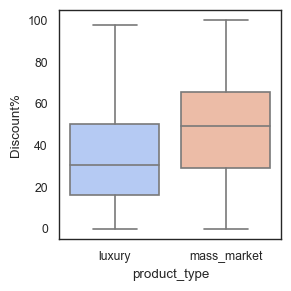

In [371]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(3, 3), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.boxplot(x='product_type', y='Discount%', palette='coolwarm', data=product_sub)
# plot legend

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above box plots:
- The median discount percentage offered for luxury items is less compared to that of Mass Market Products.
- This is a known trend among luxury products or luxury brands to offer limited or no discounts to retain the exclusivity of their products.

#### Displaying trend of NPS and Stock Index by week

In [372]:
print(NetPromoterScore_df.shape)
NetPromoterScore_df

(52, 7)


Week        NPS  NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  \
0    28  54.599588   0.000000   0.000000       1177.0           0.000000   
1    29  54.599588   0.000000   0.000000       1177.0           0.000000   
2    30  54.599588  54.599588   0.000000       1177.0        1177.000000   
3    31  54.599588  54.599588   0.000000       1177.0        1177.000000   
4    32  59.987101  56.395426  55.677091       1206.0        1186.666667   
5    33  59.987101  58.191263  56.754593       1206.0        1196.333333   
6    34  59.987101  59.987101  57.832096       1206.0        1206.000000   
7    35  59.987101  59.987101  58.909598       1206.0        1206.000000   
8    36  59.987101  59.987101  59.987101       1206.0        1206.000000   
9    37  46.925419  55.633207  57.374765       1101.0        1171.000000   
10   38  46.925419  51.279313  54.762428       1101.0        1136.000000   
11   39  46.925419  46.925419  52.150092       1101.0        1101.000000   
12   40  46.925419  46.925419  49.537755       1101.0        1101.000000   
13   41  44.398389  46.083075  46.420013       1210.0        1137.333333   
14   42  44.398389  45.240732  45.914607       1210.0        1173.666667   
15   43  44.398389  44.398389  45.409201       1210.0        1210.000000   
16   44  44.398389  44.398389  44.903795       1210.0        1210.000000   
17   45  47.000000  45.265593  44.918711       1233.0        1217.666667   
18   46  47.000000  46.132796  45.439033       1233.0        1225.333333   
19   47  47.000000  47.000000  45.959356       1233.0        1233.000000   
20   48  47.000000  47.000000  46.479678       1233.0        1233.000000   
21   49  47.000000  47.000000  47.000000       1233.0        1233.000000   
22   50  45.800000  46.600000  46.760000       1038.0        1168.000000   
23   51  45.800000  46.200000  46.520000       1038.0        1103.000000   
24   52  45.800000  45.800000  46.280000       1038.0        1038.000000   
25   53  45.800000  45.800000  46.040000       1038.0        1038.000000   
26    1  47.093031  46.231010  46.058606       1052.0        1042.666667   
27    2  47.093031  46.662021  46.317213       1052.0        1047.333333   
28    3  47.093031  47.093031  46.575819       1052.0        1052.000000   
29    4  47.093031  47.093031  46.834425       1052.0        1052.000000   
30    5  50.327406  48.171156  47.739906       1222.0        1108.666667   
31    6  50.327406  49.249281  48.386781       1222.0        1165.333333   
32    7  50.327406  50.327406  49.033656       1222.0        1222.000000   
33    8  50.327406  50.327406  49.680531       1222.0        1222.000000   
34    9  50.327406  50.327406  50.327406       1222.0        1222.000000   
35   10  49.020550  49.891788  50.066035       1015.0        1153.000000   
36   11  49.020550  49.456169  49.804664       1015.0        1084.000000   
37   12  49.020550  49.020550  49.543293       1015.0        1015.000000   
38   13  49.020550  49.020550  49.281922       1015.0        1015.000000   
39   14  51.827605  49.956235  49.581961       1242.0        1090.666667   
40   15  51.827605  50.891920  50.143372       1242.0        1166.333333   
41   16  51.827605  51.827605  50.704783       1242.0        1242.000000   
42   17  51.827605  51.827605  51.266194       1242.0        1242.000000   
43   18  47.306951  50.320720  50.923474       1228.0        1237.333333   
44   19  47.306951  48.813836  50.019344       1228.0        1232.666667   
45   20  47.306951  47.306951  49.115213       1228.0        1228.000000   
46   21  47.306951  47.306951  48.211082       1228.0        1228.000000   
47   22  47.306951  47.306951  47.306951       1228.0        1228.000000   
48   23  50.516687  48.376863  47.948898       1194.0        1216.666667   
49   24  50.516687  49.446775  48.590846       1194.0        1205.333333   
50   25  50.516687  50.516687  49.232793       1194.0        1194.000000   
51   26  50.516687  50.516687  49.874740       1194

#### Net Promoter Score Domain Knowledge
- NPS stands for Net Promoter Score which is a metric used in customer experience programs. NPS measures the loyalty of customers to a company. NPS scores are measured with a single question survey and reported with a number from -100 to +100, a higher score is desirable.
- Net promoter score (NPS) is a widely used market research metric that typically takes the form of a single survey question asking respondents to rate the likelihood that they would recommend a company, product, or a service to a friend or colleague.
- The NPS is typically interpreted and used as an indicator of customer loyalty.
- Employee net promoter score, or in short eNPS is said to help measure how loyal employees are, similar to NPS.[5] In some cases, it has been argued to correlate with revenue growth relative to competitors,[6] although it has also been demonstrated that NPS scores vary substantially between industries.[7] NPS has been widely adopted by Fortune 500 companies and other organizations.[8][2] Proponents of the Net Promoter approach claim the score can be used to motivate an organization to become more focused on improving products and services.[9]: 199–200  As of 2020, versions of the NPS are now used by two-thirds of Fortune 1000 companies.[10]
- What Can you Measure using NPS?
- `Answer`: You can measure almost anything using an NPS score. In addition to understanding the overall NPS for your organisation, you can track scores for everything from individual products, stores, web pages, or even staff members. Consider implementing NPS into marketing or customer experience strategy because it can be used with industry NPS benchmarks to see how you’re doing compared to your competitors. It will help you understand your target market better and see how they respond to your product or service, social media campaigns, and customer service agents. The goal is to gain loyal customers who become brand evangelists instead of consumers.
- How is NPS Calculated?
- `Answer`: NPS%=Promoters%-Detractors%. It has more to it, but this is brief knowledge
- Links:
1. https://en.wikipedia.org/wiki/Net_promoter_score
2. https://www.qualtrics.com/au/experience-management/customer/net-promoter-score/ (This link is short and has necessary info needed)

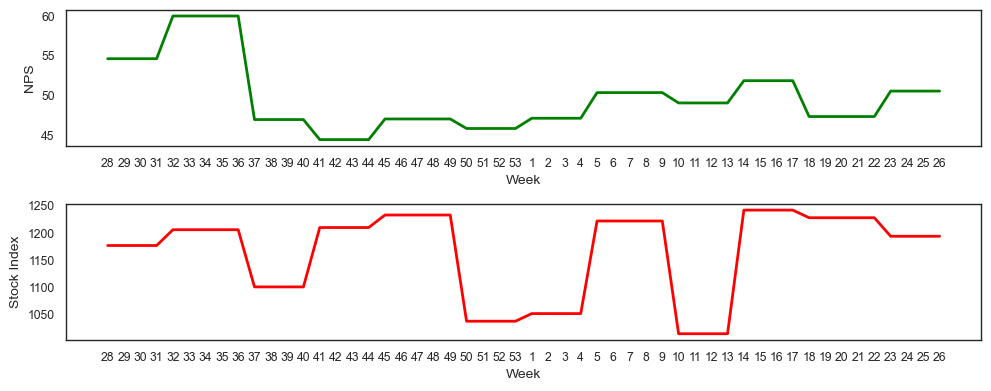

In [373]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(NetPromoterScore_df.iloc[:,0], NetPromoterScore_df.iloc[:,1], 'g-', linewidth=2)
plt.xlabel('Week', fontsize=10);
plt.ylabel('NPS', fontsize=10);

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(NetPromoterScore_df.iloc[:,0], NetPromoterScore_df.iloc[:,4], 'r-', linewidth=2)
plt.xlabel('Week', fontsize=10);
plt.ylabel('Stock Index', fontsize=10);

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Displaying trend of various Media Channel Investments by week:

In [374]:
print(MediaInvestment_df.shape)
MediaInvestment_df.head()

(52, 51)


Week  Total Investment  Total Investment_SMA_3  Total Investment_SMA_5  \
0   28             4.265                   0.000                  0.0000   
1   29             4.265                   0.000                  0.0000   
2   30             4.265                   4.265                  0.0000   
3   31             4.265                   4.265                  0.0000   
4   32             1.013                   3.181                  3.6146   

   Total Investment_EMA_8  Total_Investment_Ad_Stock     TV  TV_SMA_3  \
0                4.265000                   4.265000  0.054  0.000000   
1                4.265000                   6.824000  0.054  0.000000   
2                4.265000                   8.359400  0.054  0.054000   
3                4.265000                   9.280640  0.054  0.054000   
4                3.542333                   6.581384  0.001  0.036333   

   TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  \
0    0.0000  0.054000     0.054000    0.633       0.000000         0.0000   
1    0.0000  0.054000     0.086400    0.633       0.000000         0.0000   
2    0.0000  0.054000     0.105840    0.633       0.633000         0.0000   
3    0.0000  0.054000     0.117504    0.633       0.633000         0.0000   
4    0.0434  0.042222     0.071502    0.256       0.507333         0.5576   

   Digital_EMA_8  Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  \
0       0.633000          0.633000        1.854              0.000   
1       0.633000          1.012800        1.854              0.000   
2       0.633000          1.240680        1.854              1.854   
3       0.633000          1.377408        1.854              1.854   
4       0.549222          1.082445        0.213              1.307   

   Sponsorship_SMA_5  Sponsorship_EMA_8  Sponsorship_Ad_Stock  \
0             0.0000           1.854000              1.854000   
1             0.0000           1.854000              2.966400   
2             0.0000           1.854000              3.633840   
3             0.0000           1.854000              4.034304   
4             1.5258           1.489333              2.633582   

   Content Marketing  Content Marketing_SMA_3  Content Marketing_SMA_5  \
0                0.0                      0.0                      0.0   
1                0.0                      0.0                      0.0   
2                0.0                      0.0                      0.0   
3                0.0                      0.0                      0.0   
4                0.0                      0.0                      0.0   

   Content Marketing_EMA_8  Content_Marketing_Ad_Stock  Online marketing  \
0                      0.0                         0.0             0.332   
1                      0.0                         0.0             0.332   
2                      0.0                         0.0             0.332   
3                      0.0                         0.0             0.332   
4                      0.0                         0.0             0.026   

   Online marketing_SMA_3  Online marketing_SMA_5  Online marketing_EMA_8  \
0                   0.000                  0.0000                   0.332   
1                   0.000                  0.0000                   0.332   
2                   0.332                  0.0000                   0.332   
3                   0.332                  0.0000                   0.332   
4                   0.230                  0.2708                   0.264   

   Online_marketing_Ad_Stock  Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  \
0                   0.332000       0.137          0.000000            0.0000   
1                   0.531200       0.137          0.000000            0.0000   
2                   0.650720       0.137          0.137000            0.0000   
3                   0.722432       0.137          0.137000            0.0000   
4                   0.459459       0.015          0.096333        

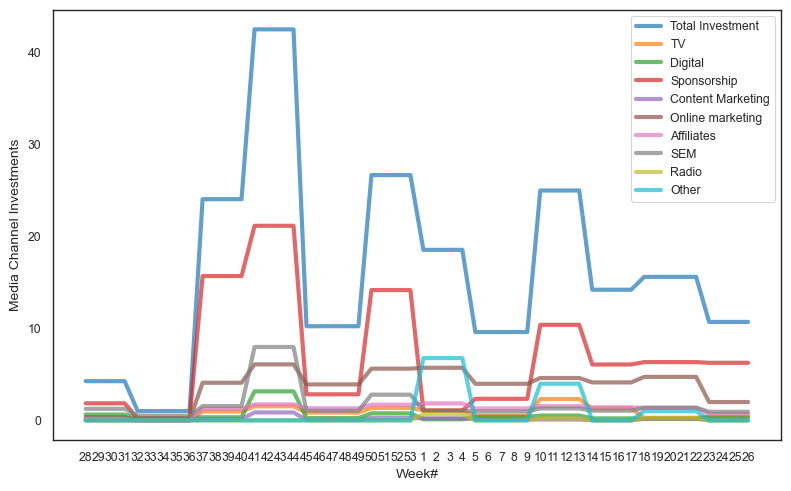

In [375]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 1, 1)
plt.plot(MediaInvestment_df.iloc[:,0], MediaInvestment_df.iloc[:,1::5], linewidth=3, alpha = 0.7)
plt.xlabel('Week#', fontsize=10)
plt.ylabel('Media Channel Investments', fontsize=10)
plt.legend(MediaInvestment_df.iloc[:,1::5])
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plot:
- Over the past year, bulk of the Ad Investment has been made in Sponsorships followed by Online Marketing & Search Engine Marketing.

#### Average Revenue from Holiday/Non-holiday days for the 3 product subcategories

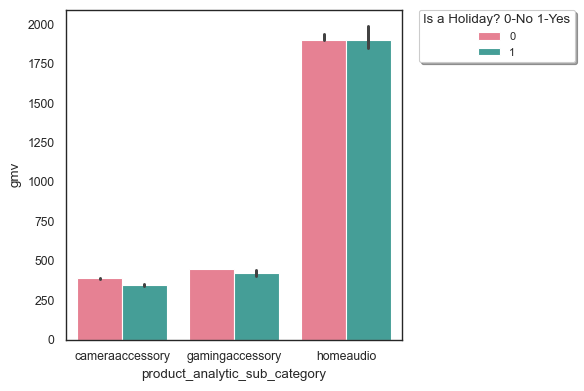

In [376]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.barplot(y='gmv', x='product_analytic_sub_category', hue ='occassion_flag', \
            palette='husl', data=product_sub, estimator=np.median)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Is a Holiday? 0-No 1-Yes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plot:
- The average(median) revenue/gmv for 3 product sub categories from holiday and non-holiday days are almost the same!
- This implies Holiday or no holiday, it doesn't affect the sales and revenue much.


#### No of items(Luxury/Mass-market) sold per 3 product subcategories

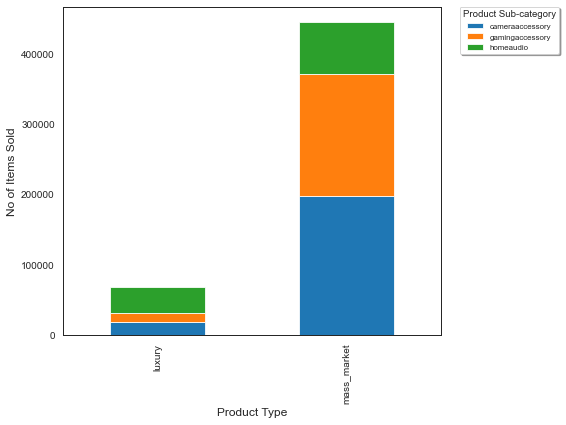

In [377]:
product_sub.groupby(["product_type", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                             fontsize = 10) 
# plot x axis label
plt.xlabel('Product Type', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plot:

- Most of the units sold belonged to the mass market category.
- Among mass market products sold, Camera and Gaming Accessories related products were sold the most.
- Home Audio products were the most popular among the luxury products sold

#### Total items sold per 3 product subcategories per Month:

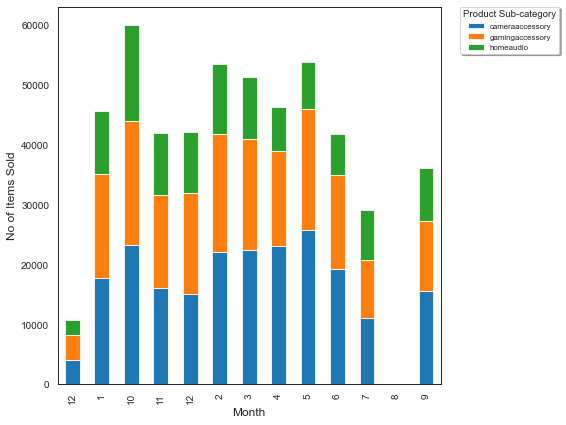

In [378]:
product_sub.groupby(["Month", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Month', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Total items sold per 3 product subcategories per Week:

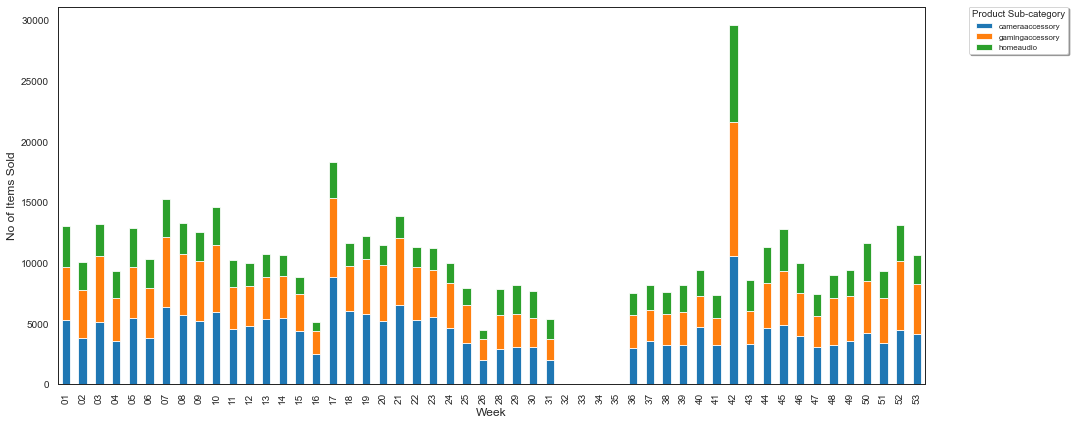

In [379]:
product_sub.groupby(["Week", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(15,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Week', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plot:
- The sale on the `42nd week (Thanksgiving week)` is maximum. Overall, October has seen most no of items being sold.

#### Top 10 Product Verticals which brought the Maximum Revenue for 3 product sub-categories

In [380]:
highest_gmv = pd.DataFrame(product_sub.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum().sort_values(ascending=False).reset_index()).head(10)
highest_gmv['product_in_category'] = highest_gmv[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
highest_gmv.head(20) #Here inspite of specifiying 20 its shows first 10 records as the underlying data itself is taken as head(10) in first line

product_analytic_sub_category product_analytic_vertical           gmv  \
0                     homeaudio          homeaudiospeaker  1.873206e+08   
1               cameraaccessory                      lens  1.085308e+08   
2               gamingaccessory                   gamepad  6.187440e+07   
3               gamingaccessory             gamingheadset  3.199049e+07   
4               cameraaccessory                binoculars  2.658427e+07   
5               gamingaccessory               gamingmouse  2.632837e+07   
6               cameraaccessory             camerabattery  2.356174e+07   
7               cameraaccessory                 camerabag  2.249499e+07   
8               cameraaccessory                     flash  2.228150e+07   
9                     homeaudio                   fmradio  2.222170e+07   

                product_in_category  
0     homeaudiospeaker in homeaudio  
1           lens in cameraaccessory  
2        gamepad in gamingaccessory  
3  gamingheadset in gamingaccessory  
4     binoculars in cameraaccessory  
5    gamingmouse in gamingaccessory  
6  camerabattery in cameraaccessory  
7      camerabag in cameraaccessory  
8          flash in cameraaccessory  
9              fmradio in homeaudio

In [381]:
# pip install squarify

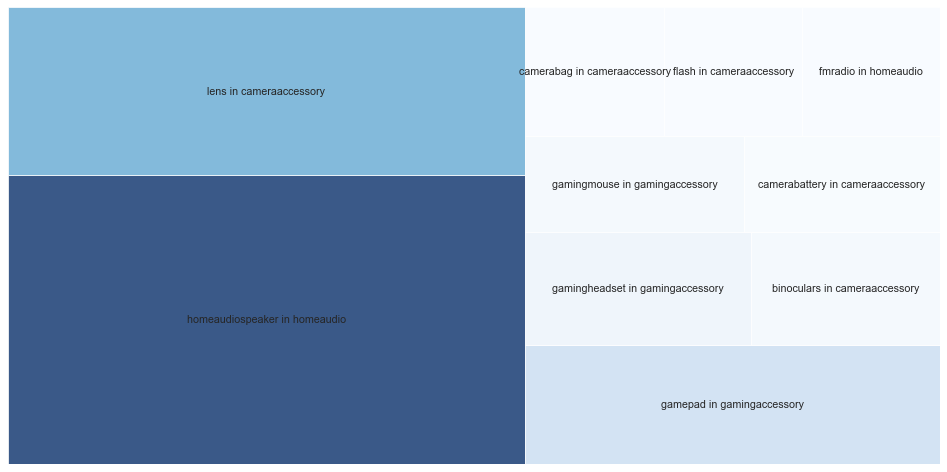

In [382]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(highest_gmv['gmv'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=highest_gmv['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

#### Inference from above plot:
- `homeaudiospeaker in homeaudio` brought the largest revenue followed by `lens in cameraaccessory` & `gamepad in gamingaccessory`.

#### Top 10 Product Verticals with most no of `sale units` for 3 product sub-categories

In [383]:
most_sales = pd.DataFrame(product_sub.groupby(['product_analytic_sub_category','product_analytic_vertical'])['units'].count().sort_values(ascending=False).reset_index()).head(10)
most_sales['product_in_category'] = most_sales[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
most_sales.head(20)

product_analytic_sub_category product_analytic_vertical  units  \
0                     homeaudio          homeaudiospeaker  76581   
1               gamingaccessory             gamingheadset  59928   
2               gamingaccessory                   gamepad  52437   
3               cameraaccessory                     flash  47808   
4               gamingaccessory               gamingmouse  35470   
5               cameraaccessory             camerabattery  35107   
6               cameraaccessory                      lens  32350   
7               cameraaccessory              cameratripod  31220   
8                     homeaudio                   fmradio  24681   
9               cameraaccessory                 camerabag  15842   

                product_in_category  
0     homeaudiospeaker in homeaudio  
1  gamingheadset in gamingaccessory  
2        gamepad in gamingaccessory  
3          flash in cameraaccessory  
4    gamingmouse in gamingaccessory  
5  camerabattery in cameraaccessory  
6           lens in cameraaccessory  
7   cameratripod in cameraaccessory  
8              fmradio in homeaudio  
9      camerabag in cameraaccessory

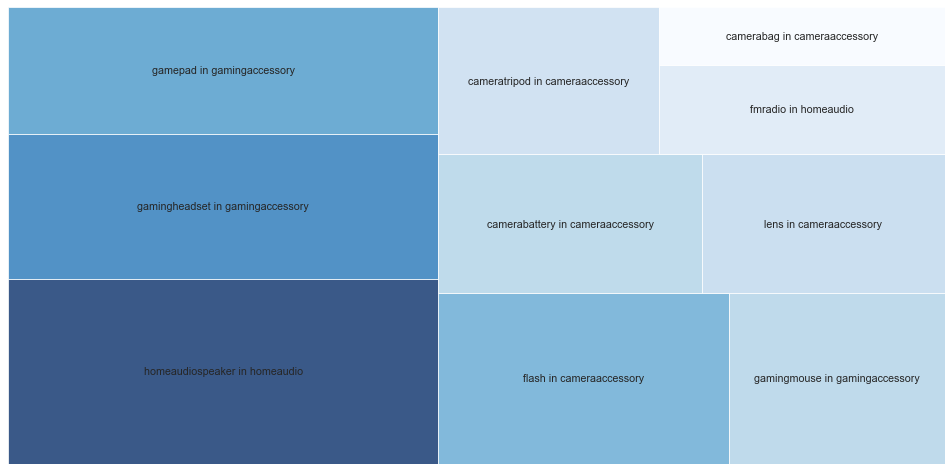

In [384]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(most_sales['units'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=0.8, label=most_sales['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

#### Inference from above plot:
- `homeaudiospeaker in homeaudio` had the most no of sales followed by `gamingheadset & gamepad in gamingaccessory`

#### Comparison of Trends of Revenue Discount% & Total Media Investment over the weeks

In [385]:
cameraaccessory = cameraaccessory_df.copy()
gamingaccessory = gamingaccessory_df.copy()
homeaudio = homeaudio_df.copy()

cameraaccessory['Week'] = cameraaccessory['Week'].apply(str)
gamingaccessory['Week'] = gamingaccessory['Week'].apply(str)
homeaudio['Week'] = homeaudio['Week'].apply(str)

In [386]:
print(cameraaccessory.shape)
cameraaccessory.head(1)

(50, 100)


Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
25   28  3975505.0  43.971082            0.0            0.0  6.959162   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.780803    1909            2549   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                       333.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           690.0                                  223.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                                 141.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          435.0                               0   

    product_vertical_filter  product_vertical_flash  \
25                    220.0                    26.0   

    product_vertical_flashshoeadapter  product_vertical_lens  \
25                                  0                  489.0   

    product_vertical_reflectorumbrella  product_vertical_softbox  \
25                                   0                         0   

    product_vertical_strap  product_vertical_teleconverter  \
25                      13                               0   

    product_vertical_telescope  payday_week  holiday_week  Total Investment  \
25                          16            0             0             4.265   

    Total Investment_SMA_3  Total Investment_SMA_5  Total Investment_EMA_8  \
25                     0.0                     0.0                   4.265   

    Total_Investment_Ad_Stock     TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  \
25                      4.265  0.054       0.0       0.0     0.054   

    TV_Ad_Stock  Digital  Digital_SMA_3  Digital_SMA_5  Digital_EMA_8  \
25        0.054    0.633            0.0            0.0          0.633   

    Digital_Ad_Stock  Sponsorship  Sponsorship_SMA_3  Sponsorship_SMA_5  \
25             0.633        1.854                0.0                0.0   

    Sponsorship_EMA_8  Sponsorship_Ad_Stock  Content Marketing  \
25              1.854                 1.854                0.0   

    Content Marketing_SMA_3  Content Marketing_SMA_5  Content Marketing_EMA_8  \
25                      0.0                      0.0                      0.0   

    Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  \
25                         0.0             0.332                     0.0   

    Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  \
25                     0.0                   0.332                      0.332   

    Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  \
25       0.137               0.0               0.0             0.137   

    Affiliates_Ad_Stock    SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8  SEM_Ad_Stock  \
25                0.137  1.256        0.0        0.0      1.256         1.256   

    Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8  Radio_Ad_Stock  Other  \
25    0.0          0.0          0.0          0.0             0.0    0.0   

    Other_SMA_3  Other_SMA_5  Other_EMA_8  Other_Ad_Stock        NPS  \
25          0.0          0.0          0.0             0.0  54.599588   

    NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  Stock Index_SMA_5  \
25        0.0        0.0       1177.0                0.0                0.0   

    Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
25      28.0      12.5   

In [387]:
print(gamingaccessory.shape)
gamingaccessory.head(1)

(51, 91)


Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
25   28  2688958.0   40.17491            0.0            0.0  5.429812   

    product_procurement_sla  is_cod  is_mass_market  \
25                 3.213343    2128            2625   

    product_vertical_gamecontrolmount  product_vertical_gamepad  \
25                                  0                     930.0   

    product_vertical_gamingaccessorykit  product_vertical_gamingadapter  \
25                                104.0                              49   

    product_vertical_gamingchargingstation  product_vertical_gamingheadset  \
25                                       0                           206.0   

    product_vertical_gamingkeyboard  product_vertical_gamingmemorycard  \
25                            422.0                               36.0   

    product_vertical_gamingmouse  product_vertical_gamingmousepad  \
25                         955.0                               56   

    product_vertical_gamingspeaker  product_vertical_joystickgamingwheel  \
25                               0                                    14   

    product_vertical_motioncontroller  product_vertical_tvoutcableaccessory  \
25                                 27                                    79   

    payday_week  holiday_week  Total Investment  Total Investment_SMA_3  \
25            0             0             4.265                     0.0   

    Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock  \
25                     0.0                   4.265                      4.265   

       TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  \
25  0.054       0.0       0.0     0.054        0.054    0.633            0.0   

    Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  \
25            0.0          0.633             0.633        1.854   

    Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  \
25                0.0                0.0              1.854   

    Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  \
25                 1.854                0.0                      0.0   

    Content Marketing_SMA_5  Content Marketing_EMA_8  \
25                      0.0                      0.0   

    Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  \
25                         0.0             0.332                     0.0   

    Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  \
25                     0.0                   0.332                      0.332   

    Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  \
25       0.137               0.0               0.0             0.137   

    Affiliates_Ad_Stock    SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8  SEM_Ad_Stock  \
25                0.137  1.256        0.0        0.0      1.256         1.256   

    Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8  Radio_Ad_Stock  Other  \
25    0.0          0.0          0.0          0.0             0.0    0.0   

    Other_SMA_3  Other_SMA_5  Other_EMA_8  Other_Ad_Stock        NPS  \
25          0.0          0.0          0.0             0.0  54.599588   

    NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  Stock Index_SMA_5  \
25        0.0        0.0       1177.0                0.0                0.0   

    Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
25      28.0      12.5       20.1       0.283333       2.383333   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  \
25         4.416667              0.0           4.416667                0.0   

    Sale  
25     0

In [388]:
print(homeaudio.shape)
homeaudio.head(1)

(48, 87)


Week           gmv  Discount%  deliverybdays  deliverycdays       sla  \
25   28  4.573783e+06  31.450813            0.0            0.0  7.369201   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.863223    1583            1366   

    product_vertical_djcontroller  product_vertical_dock  \
25                              8                     33   

    product_vertical_dockingstation  product_vertical_fmradio  \
25                                1                     516.0   

    product_vertical_hifisystem  product_vertical_homeaudiospeaker  \
25                           23                             1374.0   

    product_vertical_karaokeplayer  product_vertical_slingbox  \
25                               0                          0   

    product_vertical_soundmixer  product_vertical_voicerecorder  payday_week  \
25                            0                              63            0   

    holiday_week  Total Investment  Total Investment_SMA_3  \
25             0             4.265                     0.0   

    Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock  \
25                     0.0                   4.265                      4.265   

       TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  \
25  0.054       0.0       0.0     0.054        0.054    0.633            0.0   

    Digital_SMA_5  Digital_EMA_8  Digital_Ad_Stock  Sponsorship  \
25            0.0          0.633             0.633        1.854   

    Sponsorship_SMA_3  Sponsorship_SMA_5  Sponsorship_EMA_8  \
25                0.0                0.0              1.854   

    Sponsorship_Ad_Stock  Content Marketing  Content Marketing_SMA_3  \
25                 1.854                0.0                      0.0   

    Content Marketing_SMA_5  Content Marketing_EMA_8  \
25                      0.0                      0.0   

    Content_Marketing_Ad_Stock  Online marketing  Online marketing_SMA_3  \
25                         0.0             0.332                     0.0   

    Online marketing_SMA_5  Online marketing_EMA_8  Online_marketing_Ad_Stock  \
25                     0.0                   0.332                      0.332   

    Affiliates  Affiliates_SMA_3  Affiliates_SMA_5  Affiliates_EMA_8  \
25       0.137               0.0               0.0             0.137   

    Affiliates_Ad_Stock    SEM  SEM_SMA_3  SEM_SMA_5  SEM_EMA_8  SEM_Ad_Stock  \
25                0.137  1.256        0.0        0.0      1.256         1.256   

    Radio  Radio_SMA_3  Radio_SMA_5  Radio_EMA_8  Radio_Ad_Stock  Other  \
25    0.0          0.0          0.0          0.0             0.0    0.0   

    Other_SMA_3  Other_SMA_5  Other_EMA_8  Other_Ad_Stock        NPS  \
25          0.0          0.0          0.0             0.0  54.599588   

    NPS_SMA_3  NPS_SMA_5  Stock Index  Stock Index_SMA_3  Stock Index_SMA_5  \
25        0.0        0.0       1177.0                0.0                0.0   

    Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
25      28.0      12.5       20.1       0.283333       2.383333   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  \
25         4.416667              0.0           4.416667                0.0   

    Sale  
25     0

In [389]:
#First row of Total Investment
homeaudio.iloc[0,21]

4.265

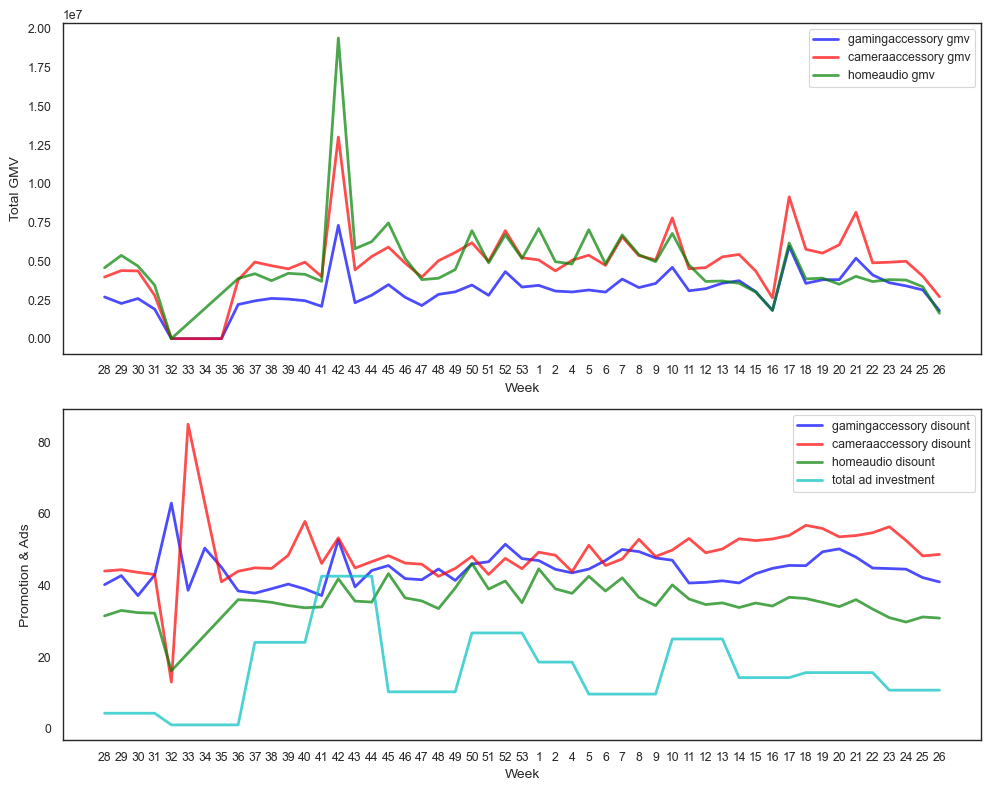

In [390]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(gamingaccessory.iloc[:,0], gamingaccessory.iloc[:,1], 'b-', linewidth=2, alpha=0.7)
plt.plot(cameraaccessory.iloc[:,0], cameraaccessory.iloc[:,1], 'r-', linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:,0], homeaudio.iloc[:,1], 'g-', linewidth=2, alpha=0.7)
plt.xlabel('Week', fontsize=10);
plt.ylabel('Total GMV', fontsize=10);
plt.legend(['gamingaccessory gmv','cameraaccessory gmv','homeaudio gmv'])

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(gamingaccessory.iloc[:,0], gamingaccessory.iloc[:,2], 'b-', linewidth=2, alpha=0.7)
plt.plot(cameraaccessory.iloc[:,0], cameraaccessory.iloc[:,2], 'r-', linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:,0], homeaudio.iloc[:,2], 'g-', linewidth=2, alpha=0.7)
plt.plot(homeaudio.iloc[:,0], homeaudio.iloc[:,21], 'c-', linewidth=2, alpha=0.7)
plt.xlabel('Week', fontsize=10);
plt.ylabel('Promotion & Ads', fontsize=10);
plt.legend(['gamingaccessory disount','cameraaccessory disount','homeaudio disount','total ad investment'])

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from Above Plots:
- For the `week# 42 (during Thanksgiving)`, all the graphs show a steep rise. Revenue increased becuase of both higher discount% and increased Ad Investment.

- For the `week 32(August)`, Revenue generated was the lowest from all 3 product subcategories. This can be observed as a direct relation to minimum amount of total investment in Ads. Discount was also lowest for all products apart from camera accessories. Post this dip in revenue, discount% was increased to bring about higher sales. This increase in Discount% was observed most in the case of gaming accessories. However, barring home audio products, the revenue from other products was seen to be constant for the next 3 weeks after which, the revenue started to pick up.

- In general the average disount% offered for home audio products is lesser compared to that of the other product subcategories.

#### Analyzing how Sales/Orders  and Revenue/gmv vary based on Discount%

In [391]:
# Segmenting the Discount% into various bins

def discount_binning(df,cut_points,label_names):
    column_index = df.columns.get_loc('Discount%') + 1
    df.insert(loc=column_index,column='Discount Bins',value=pd.cut(df['Discount%'],cut_points,labels=label_names, include_lowest=True))
    return df

cut_points = [0,10,20,30,40,50,60,70,80,90,100]
label_names = ["Below 10%","Between 10-20%","Between 20-30%","Between 30-40%","Between 40-50%","Between 50-60%", \
              "Between 60-70%","Between 70-80%","Between 80-90%","Between 90-100%"]

In [392]:
product_sub = discount_binning(product_sub,cut_points,label_names)
product_sub.head()

order_date  Year Month Week     gmv  list_price  Discount%  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0       4.03   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0       5.19   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      19.49   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      22.92   

    Discount Bins  units  deliverybdays  deliverycdays  \
0  Between 10-20%      1            0.0            0.0   
1       Below 10%      1            0.0            0.0   
2       Below 10%      1            0.0            0.0   
3  Between 10-20%      1            0.0            0.0   
4  Between 20-30%      1            0.0            0.0   

  s1_fact.order_payment_type  sla                 pincode  \
0                        cod    5  -7.79175582905735E+018   
1                        cod    7   7.33541149097431E+018   
2                        cod   10  -7.47768776228657E+018   
3                    prepaid    4  -5.83593163877661E+018   
4                    prepaid    6   5.34735360997242E+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   payday_flag  occassion_flag product_type  
0            0               0       luxury  
1            0               0       luxury  
2            0               0  mass_market  
3            1               0  mass_market  
4            0               0  mass_market

In [393]:
print(product_sub.shape)
product_sub['Discount Bins'].value_counts().sum()

(512838, 22)


512838

In [394]:
product_sub['Discount Bins'].value_counts()

Between 50-60%     87143
Between 40-50%     65094
Between 30-40%     64848
Between 20-30%     58984
Between 60-70%     56353
Between 10-20%     46576
Below 10%          43203
Between 70-80%     41857
Between 80-90%     39829
Between 90-100%     8951
Name: Discount Bins, dtype: int64

#### Inference from above plot:
- 50-60% has the highest number of counts of 87143
- This can be again seeen from below countplot()

#### Eg of count plot here:
- https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
- By directly specifying 'y' without specifying 'x' variable makes the count plot horizontal with dataset specified in 'y'
- If 'x' variable is not specified, countplot counts the number of items occuring with that data set specified in 'y'

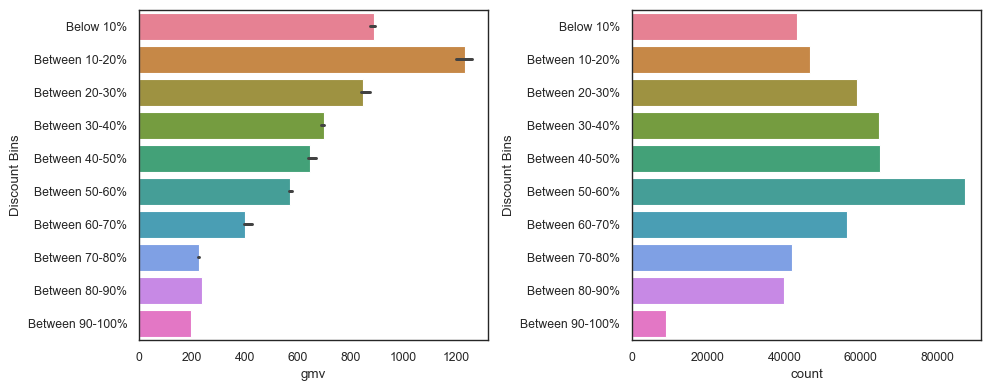

In [395]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 2, 1) #one row, two columns, first plot
sns.barplot(x='gmv', y='Discount Bins', palette='husl', data=product_sub, estimator=np.median)#palette is set of colors

# subplot 2
plt.subplot(1, 2, 2) #one row, two columns, second plot
sns.countplot(y='Discount Bins', palette='husl', data=product_sub)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above Plots:
- Median Revenue is maximum when Average discount% is between 10-20%. But beyond that, average revenue slowly starts to decline.
- The sales on the other hand shows a steady increase with increase in Discount percentage till it peaks at 50-60% after which it starts to fall again.
- This shows that at higher discount, although the sales are good, the revenue collapses signifying a loss for the company. An average discount of 10-20% is the most profitable for the company.¶

#### Percentage of orders/sales at different Discount% segments:

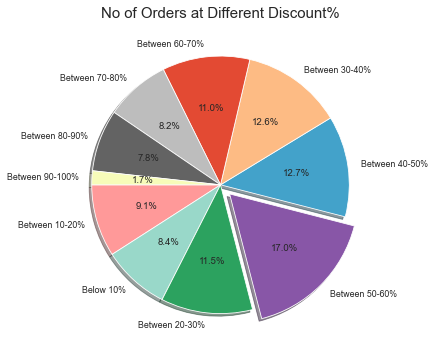

In [396]:
from collections import Counter

labels, values = zip(*Counter(product_sub["Discount Bins"]).items())
colors = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9"]
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6,6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=180,explode=(0,0,0,0.1,0,0,0,0,0,0),autopct="%1.1f%%", \
        shadow=True, colors=colors)
plt.tight_layout()
plt.title("No of Orders at Different Discount%", fontsize=15)
plt.show()

#### Inference from above plot:
- Most of the sales take place when Discount% is between 50-60%.

#### Analyzing how Sales Amount and Revenue vary based on Payment Types:

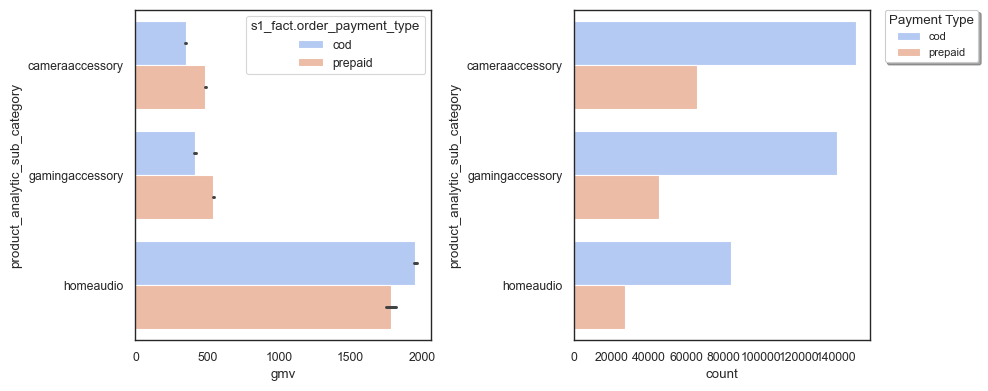

In [397]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='gmv', y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', \
            palette='coolwarm', data=product_sub, estimator=np.median)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', palette='coolwarm', data=product_sub)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Payment Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plot:
- Clearly the revenue/gmv for homeaudio category is greater compared to others categories
- The Number of orders/sales is highest in Cameraaccessory category
- The Number of Orders/sales when prepaid is almost twice as much more than cod(cash on delivery) in all categories.

#### Finding the percentage of Luxury & Mass-market Products from 3 sub-categories

In [398]:
product_sub['luxury'] = product_sub['product_type'].apply(lambda x:1 if x=='luxury' else 0)
product_sub['mass_market'] = product_sub['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
product_sub.head()

order_date  Year Month Week     gmv  list_price  Discount%  \
0 2015-10-17 15:11:54  2015    10   42  6400.0      6400.0      10.99   
1 2015-10-19 10:07:22  2015    10   43  6900.0      6900.0       4.03   
2 2015-10-20 15:45:56  2015    10   43  1990.0      1990.0       5.19   
3 2015-10-14 12:05:15  2015    10   42  1690.0      1690.0      19.49   
4 2015-10-17 21:25:03  2015    10   42  1618.0      1618.0      22.92   

    Discount Bins  units  deliverybdays  deliverycdays  \
0  Between 10-20%      1            0.0            0.0   
1       Below 10%      1            0.0            0.0   
2       Below 10%      1            0.0            0.0   
3  Between 10-20%      1            0.0            0.0   
4  Between 20-30%      1            0.0            0.0   

  s1_fact.order_payment_type  sla                 pincode  \
0                        cod    5  -7.79175582905735E+018   
1                        cod    7   7.33541149097431E+018   
2                        cod   10  -7.47768776228657E+018   
3                    prepaid    4  -5.83593163877661E+018   
4                    prepaid    6   5.34735360997242E+017   

  product_analytic_category product_analytic_sub_category  \
0           cameraaccessory               cameraaccessory   
1           cameraaccessory               cameraaccessory   
2           cameraaccessory               cameraaccessory   
3           cameraaccessory               cameraaccessory   
4           cameraaccessory               cameraaccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              cameratripod       7190.0                        0   
1              cameratripod       7190.0                        0   
2              cameratripod       2099.0                        3   
3              cameratripod       2099.0                        3   
4              cameratripod       2099.0                        3   

   payday_flag  occassion_flag product_type  luxury  mass_market  
0            0               0       luxury       1            0  
1            0               0       luxury       1            0  
2            0               0  mass_market       0            1  
3            1               0  mass_market       0            1  
4            0               0  mass_market       0            1

In [399]:
product_type = pd.DataFrame(product_sub.groupby('product_analytic_sub_category')['luxury','mass_market'].sum().reset_index())
product_type

product_analytic_sub_category  luxury  mass_market
0               cameraaccessory   18423       197478
1               gamingaccessory   13007       172869
2                     homeaudio   36747        74314

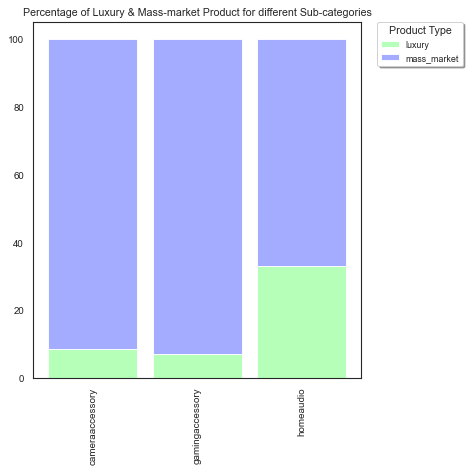

In [400]:
# From raw value to percentage
r = [0,1,2]
totals = [i+j for i,j in zip(product_type['luxury'], product_type['mass_market'])]
luxury = [i / j * 100 for i,j in zip(product_type['luxury'], totals)]
mass_market = [i / j * 100 for i,j in zip(product_type['mass_market'], totals)]
names = list(product_type['product_analytic_sub_category'])

# plot
# adjust figure size
plt.figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
# Create Luxury Bars
plt.bar(r, luxury, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create mass_market Bars
plt.bar(r, mass_market, bottom=[i for i in luxury], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['luxury','mass_market'],frameon=True, fontsize='small', shadow='True', title='Product Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Luxury & Mass-market Product for different Sub-categories")

# Show graphic
plt.tight_layout()
plt.show()

#### Inference from above plots:
- Usually the percentage of number of orders tagged `mass market` is higher compared to orders tagged `luxury`
- Percentage of luxury products under `HomeAudio` is much more compared to the other sub categories. This implies people are willing to buy more of luxury items for HomeAudio category. 

#### Finding the percentage of Luxury and Mass_market Products under different Discount groups:

In [401]:
product_type_with_discount = pd.DataFrame(product_sub.groupby('Discount Bins')['luxury','mass_market'].sum().reset_index())
product_type_with_discount

Discount Bins  luxury  mass_market
0        Below 10%    9110        34093
1   Between 10-20%   14604        31972
2   Between 20-30%   10077        48907
3   Between 30-40%    8593        56255
4   Between 40-50%    7477        57617
5   Between 50-60%   13335        73808
6   Between 60-70%    4847        51506
7   Between 70-80%      68        41789
8   Between 80-90%      48        39781
9  Between 90-100%      18         8933

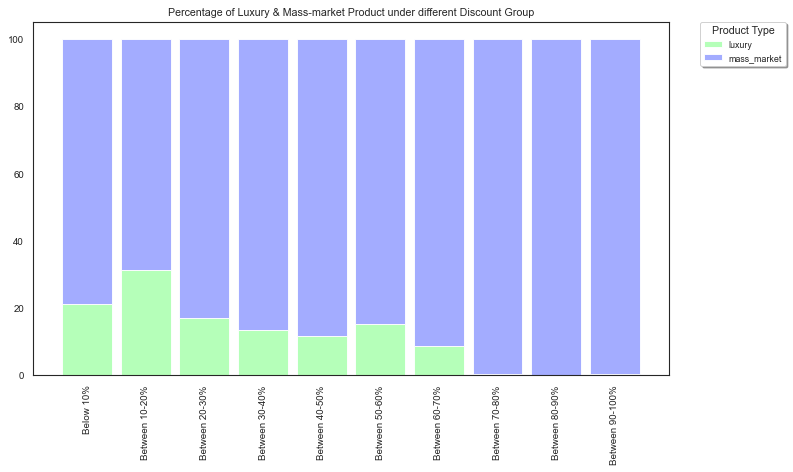

In [402]:
# From raw value to percentage
r = [0,1,2,3,4,5,6,7,8,9]
totals = [i+j for i,j in zip(product_type_with_discount['luxury'], product_type_with_discount['mass_market'])]
luxury = [i / j * 100 for i,j in zip(product_type_with_discount['luxury'], totals)]
mass_market = [i / j * 100 for i,j in zip(product_type_with_discount['mass_market'], totals)]
names = list(product_type_with_discount['Discount Bins'])

# plot
# adjust figure size
plt.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
# Create Luxury Bars
plt.bar(r, luxury, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create mass_market Bars
plt.bar(r, mass_market, bottom=[i for i in luxury], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['luxury','mass_market'],frameon=True, fontsize='small', shadow='True', title='Product Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Luxury & Mass-market Product under different Discount Group")

# Show graphic
plt.tight_layout()
plt.show()

#### Inference from above plot:
- We will find around 35% of products where a discount given between 10-20% are luxury products. This is bin which has the highest amount of products where luxury items are sold which implies a discount of 10 to 20% for luxury items usually works and gets sold and thus maintians its premiumness. 

#### Relationship between Revenue and Advertisement Spends

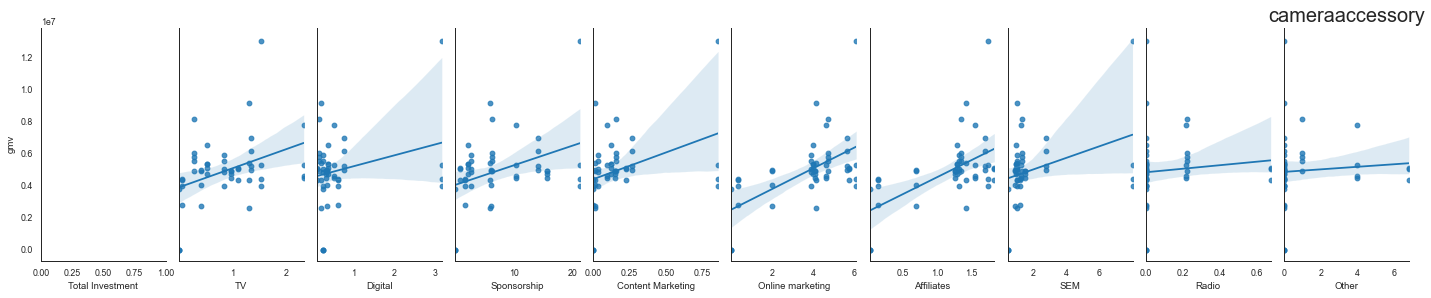

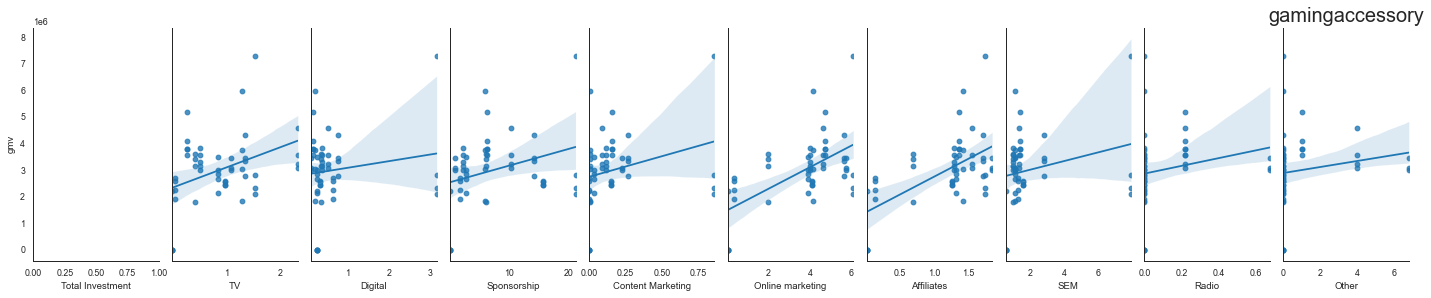

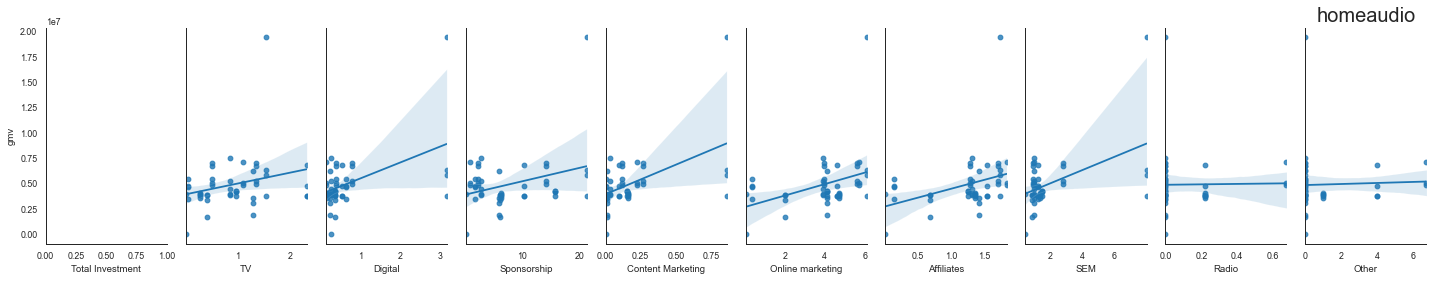

In [403]:
# Slightly alter the figure size to make it more horizontal.
#plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster


sns.pairplot(cameraaccessory, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('cameraaccessory', fontsize = 20)

sns.pairplot(gamingaccessory, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('gamingaccessory', fontsize = 20)

sns.pairplot(homeaudio, x_vars=['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', \
                                      'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], \
             y_vars='gmv',size=4, aspect=0.5, kind='reg')
plt.title('homeaudio', fontsize = 20)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

#### Inference from above plots:
- In general except for `Radio` marketing channel, all other channels have steep LR Line which means increase in advertisement spends increases revenue or gmv. Radio is the least fruitful channel
- We can see that the features or variables `Affliates`, `Online Marketing`, the points and LR Line are consistently steeper or has a higher slope meaning they are the most fruitful channels, which means as a company focusing on these channels will bring in more revenue. In our LR model we need to keep an eye on these features contributing prominently to explain the Revenue component.

In [404]:
print(cameraaccessory.shape)
print(gamingaccessory.shape)
print(homeaudio.shape)

(50, 100)
(51, 91)
(48, 87)


In [405]:
rev_ad_columns = ['gmv','Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', \
                  'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', \
                  'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', \
                  'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', \
                  'Content Marketing_SMA_3','Content Marketing_SMA_5','Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', \
                  'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', \
                  'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', \
                  'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', \
                  'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', \
                  'Other_Ad_Stock']

In [406]:
cameraaccessory_ad = cameraaccessory[rev_ad_columns]
gamingaccessory_ad = gamingaccessory[rev_ad_columns]
homeaudio_ad = homeaudio[rev_ad_columns]

In [407]:
#Ad columns, notice only add columns are taken here. Thus shape changes
print(cameraaccessory_ad.shape)
print(gamingaccessory_ad.shape)
print(homeaudio_ad.shape)

(50, 51)
(51, 51)
(48, 51)


#### Relationship between Revenue and Various Ad Spends for Camera Accessories:

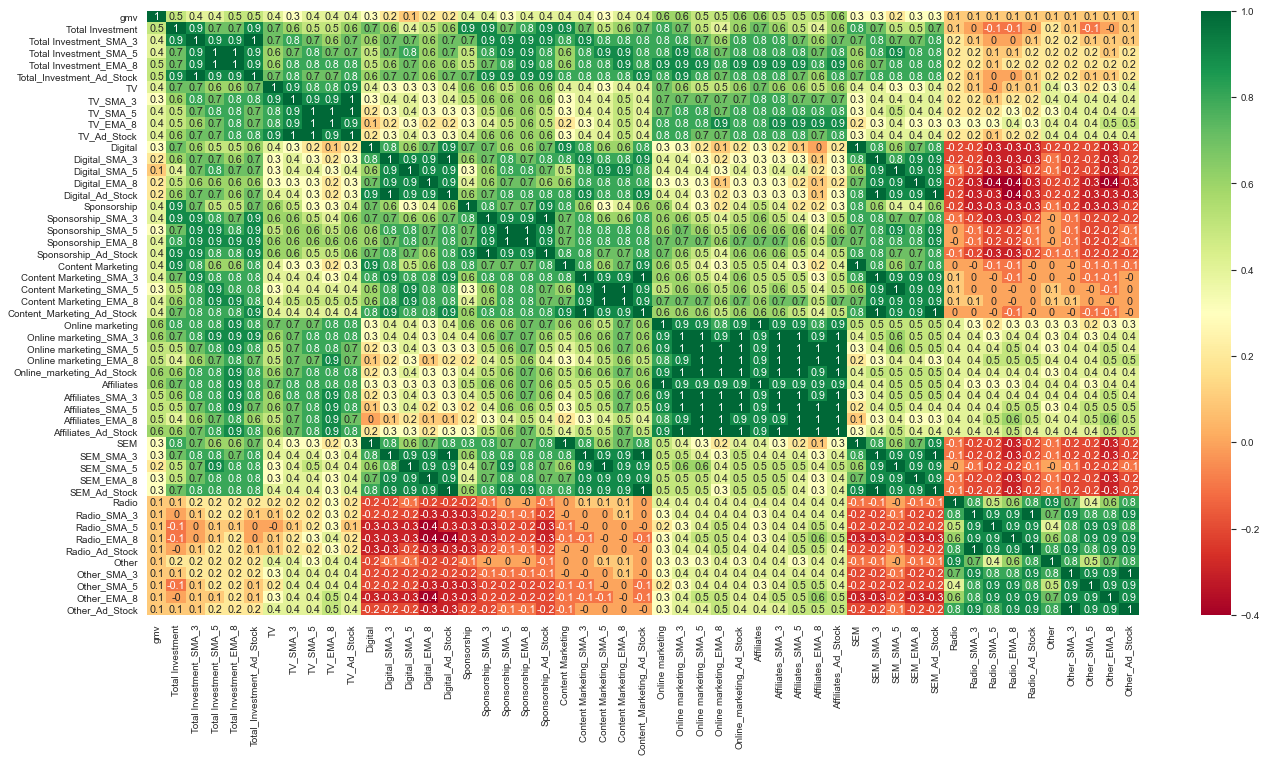

In [408]:
#More green, more correlation, more red lesses the correlation
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cam_cor = round(cameraaccessory_ad.corr(),1) #(round(ic_mou_data.corr(),2)
sns.heatmap(cam_cor, cmap="RdYlGn", annot=True) #cmap='RdYlGn, cmap="YlGnBu"
plt.show()

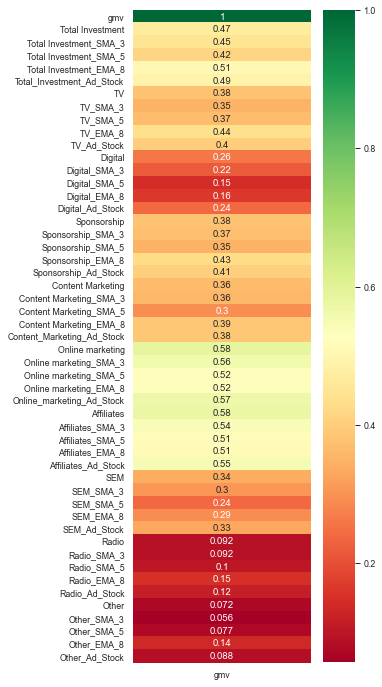

In [409]:
# Let's Visualize the correlation matrix with respected to TARGET variable 'gmv' to get more BUSINESS SENSE
data=cameraaccessory_ad.corr().loc[:,['gmv']]
plt.figure(figsize = (4,12))        # Size of the figure
sns.heatmap(data,cmap='RdYlGn',annot = True)
plt.show()

#### Inference from above plots:
- We can see that `online marketing`, `Affiliates` has highest correlation with gmv. Meaning they explain gmv much better. Increase in units of affiliates or online marketing will increase revenue/gmv

#### Relationship between Revenue and Various Ad Spends for Gaming Accessories:

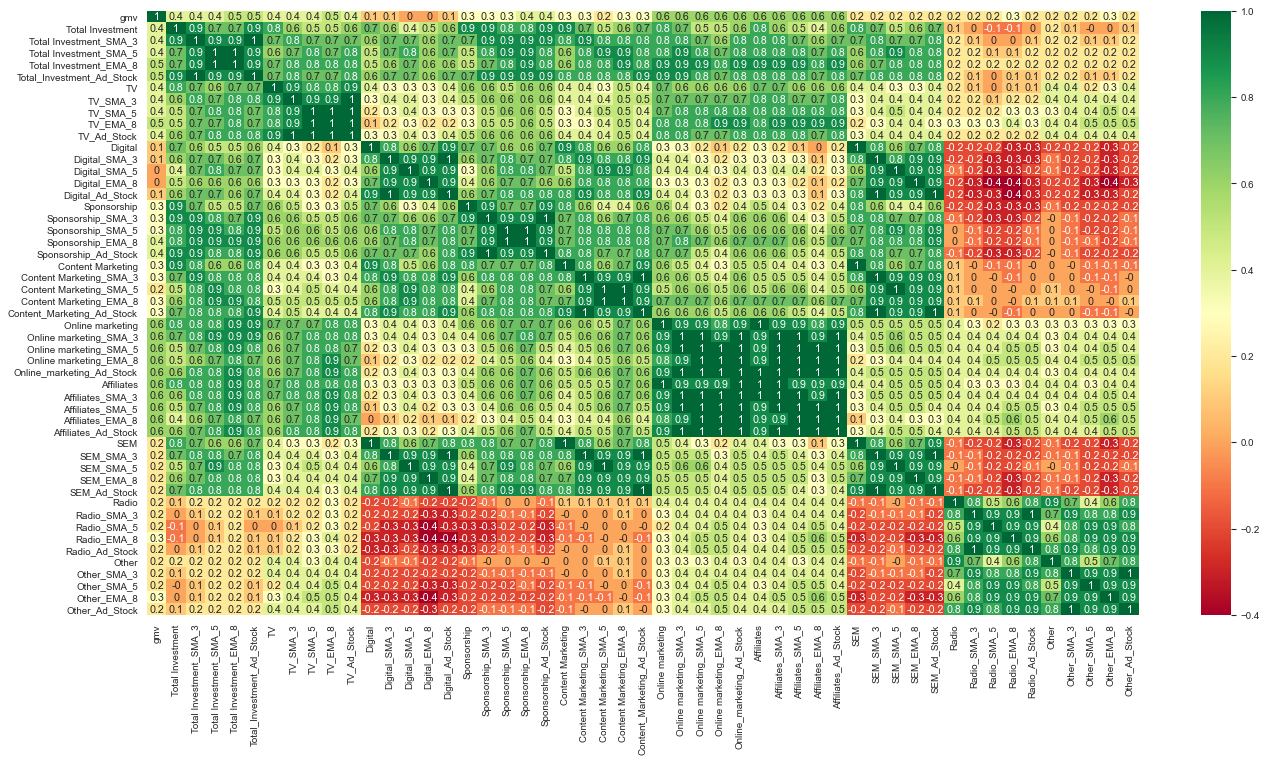

In [410]:
#More green, more correlation, more red lesses the correlation
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
gam_cor = round(gamingaccessory_ad.corr(),1)
sns.heatmap(gam_cor, cmap="RdYlGn", annot=True)
plt.show()

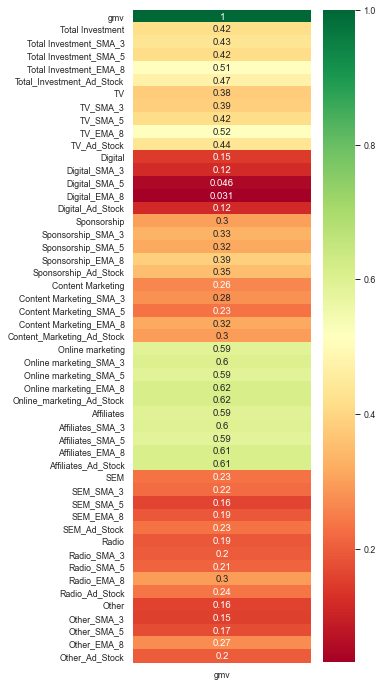

In [411]:
# Let's Visualize the correlation matrix with respected to TARGET variable 'gmv' to get more BUSINESS SENSE
data=gamingaccessory_ad.corr().loc[:,['gmv']]
plt.figure(figsize = (4,12))        # Size of the figure
sns.heatmap(data,cmap='RdYlGn',annot = True)
plt.show()

#### Inference from above plots:
- We can see that `online marketing`, `Affiliates` has highest correlation with gmv. Meaning they explain gmv much better. Increase in units of affiliates or online marketing will increase revenue/gmv

#### Relationship between Revenue and Various Ad Spends for Home Audio:

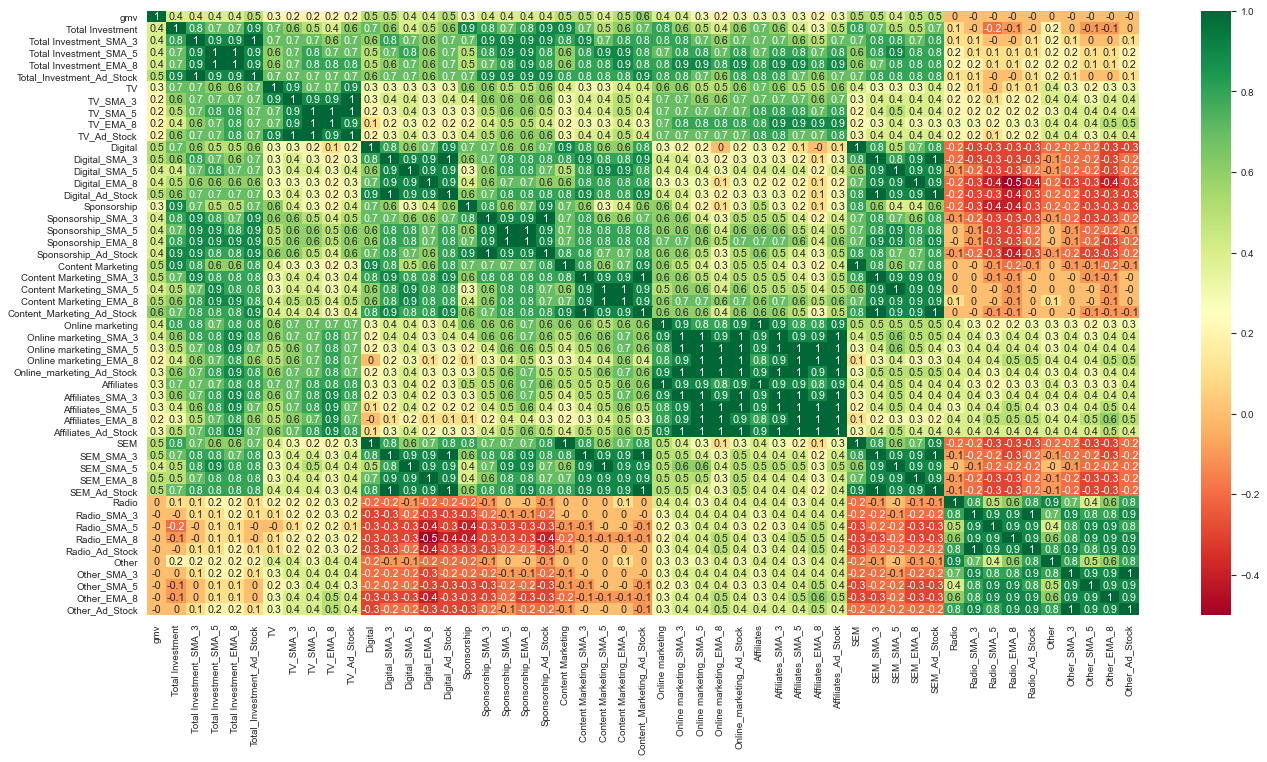

In [412]:
#More green, more correlation, more red lesses the correlation
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
ha_cor = round(homeaudio_ad.corr(),1)
sns.heatmap(ha_cor, cmap="RdYlGn", annot=True)
plt.show()

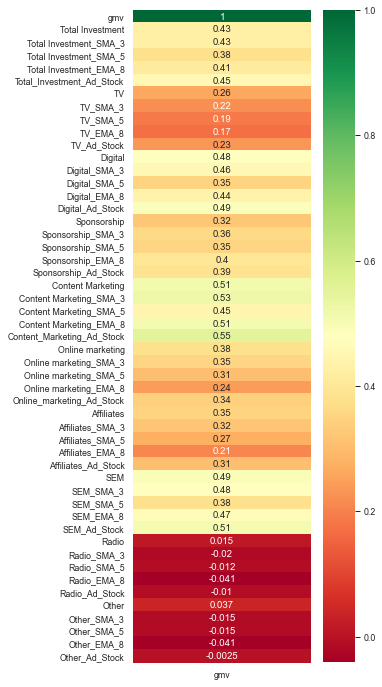

In [413]:
# Let's Visualize the correlation matrix with respected to TARGET variable 'gmv' to get more BUSINESS SENSE
data=homeaudio_ad.corr().loc[:,['gmv']]
plt.figure(figsize = (4,12))        # Size of the figure
sns.heatmap(data,cmap='RdYlGn',annot = True)
plt.show()

#### Inference from above plots:
- We can see that `online marketing`, `Affiliates` has highest correlation with gmv. Meaning they explain gmv much better. Increase in units of affiliates or online marketing will increase revenue/gmv

## Building Linear Regression Models:
- First we will build additive models for all the three categories(camera, gaming, homeaudio)
- Next we will build multiplicative models for all the three categories(camera, gaming, homeaudio)

### Additive Model
Linear model assumes an additive relationship between the different KPIs. Hence their impacts are also additive towards the dependent Y variable.

The equation can be represented as:
                    Y = α + β1At + β2Pt + β3Dt + β4Qt + β5Tt + ϵ

Here in the above equation:
- `A` stands for Advertising Impact on Revenue/GMV
- `P` stands for Pricing Impact on Revenue/GMV
- `D` stands for Discounts or Promotion Impact on Revenue/GMV
- `Q` stands for Quality or Product Assortment Impact on Revenue/GMV
- `T` stands for Industry Trend and Seasonality Impact on Revenue/GMV

#### Some other pointers related to MMM:
1. Half the money I spend on advertising is wasted, The trouble is I don't know which half.- John Wanamaker, Father of modern advertising and pioneer in marketing.
2. MMM(Market Mix Modelling) is 40%  science and 60% art. MMM is multi department job and not restricted to a single department, MMM Experts have multiple years of experience their experience plays a big role in this science and art. This cannot be learnt in few days.
3. MMM is a cross team collaboration effort. Always have experts on your side. MMM is not a Robot to help you in marketing decisions. It should be viewed as a tool to help a company make strategic and intelligent decisions with human intervention.
4. Demand Elasticity concepts: 1)Price Elasticity of Demand and 2) Discount elasticity of demand. Mathematically its Q/P i.e Quantity/Price.  Here price is independent variable and comes on x-axis.
5. Revenue Elasticity concepts: R/A i.e Revenue divided by Advertising. Here Advertising is the independent variable and come s on x-axis

#### Different effects that we have come across in MMM:
1. Current effect
2. Carryover effect
3. Shape effect
4. Competitive effect
5. Dynamic effect
6. Content effect
7. Media effect

Different models(like additive, multiplicative, exponential or multinomial logit model, koyck and distributed lag model, hierarchical model) capture different effects. 

#### Today for MMM usually Distributed lag model is most prevalent
- Distributed lag model is an experimental model
- For certain KPIs certain periods of lags work. For eg usually
    - For TV marketing channel a lag of 5 weeks works
    - For News Paper channel a lag of 1 week works
- For Pricing a lag of 3 weeks works
- Beyond lag period customers forget and capturing that lag effect into model is not productive

#### 4 P Model in marketing
1. Product
2. Promotion
3. Place
4. Price

#### 7 P Model in marketing:
1. Product
2. Promotion
3. Place
4. Price
5. People
6. Process
7. Physical Evidence

#### 5 C model:
1. Company
2. Customer
3. Competition
4. Collaboration
5. Context

#### Additional Reading:
- Marketing Data Driven Decisions Document by Daniel Splick and Andera Zubless

#### General Process for building Models:
- Even if you start with only 5 individual variables, this can easily blow up to a 100 variables(which is seen in our case of consumer_df' and df obtained after merging relevant data/dfs. Thus becomes challenging to understand the different kind of impact. So build model in stages. Try some manual permutation and combination of KPIs/Variables based on marketing hypothesis. Later test the accuracy and robustness of each model

1. Different variables
2. Their interactions(var2, var 3, var 4 etc)
3. Lagged value of each variable(lag1, lag2, lag3..etc)
4. Other feature engineered variables such as reference pricing.

Try various models and come up wih best optimization model for budget allocation.

#### What your PPT must hold:
- What the situation was?
- What models you prepared
- What EDA did you perform
- Data Prep Techniques
- Final outcome of the activity

---

In [414]:
#breakpoint
# set_trace()

In [415]:
# making a copy of original dataframes
cameraaccessory_org_df = cameraaccessory_df.copy()
gamingaccessory_org_df = gamingaccessory_df.copy()
homeaudio_org_df = homeaudio_df.copy()
print(cameraaccessory_df.shape)
print(gamingaccessory_df.shape)
print(homeaudio_df.shape)

print(cameraaccessory_org_df.shape)
print(gamingaccessory_org_df.shape)
print(homeaudio_org_df.shape)
# homeaudio_org_df.head()

(50, 100)
(51, 91)
(48, 87)
(50, 100)
(51, 91)
(48, 87)


In [416]:
cameraaccessory_df.head()

Week        gmv  Discount%  deliverybdays  deliverycdays       sla  \
25    28  3975505.0  43.971082       0.000000       0.000000  6.959162   
26    29  4390316.0  44.334867       0.000000       0.000000  6.395062   
27    30  4368719.0  43.608101       0.002629       0.003286  6.414394   
28    31  2790458.0  42.999613       0.000000       0.000000  6.370904   
29    32     2198.0  12.947500       0.000000       0.000000  9.000000   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.780803    1909            2549   
26                 2.812865    2033            2729   
27                 2.865922    2053            2705   
28                 2.823237    1406            1790   
29                 4.000000       1               4   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                       333.0   
26                                36                       356.0   
27                                48                       295.0   
28                                45                       185.0   
29                                 0                         0.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           690.0                                  223.0   
26                           752.0                                  225.0   
27                           773.0                                  267.0   
28                           484.0                                  180.0   
29                             3.0                                    0.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   
26                                   9                              0   
27                                  12                              0   
28                                  11                              0   
29                                   0                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   
26                                 0                               0   
27                                 0                               0   
28                                 0                               0   
29                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   
26                                0                                  0   
27                                0                                  0   
28                                0                                  0   
29                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                                 141.0   
26                            11                                 142.0   
27                             7                                 108.0   
28                             2                                  84.0   
29                             0                                   0.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          435.0                               0   
26                          495.0                               0   
27                          465.0                               0   
28                          360.0                               1   
29                            1.0                               0   

    product_vertical_filter  product_vertical_flash  \
25                    220.0                    26.0   
26                    186.0                    27.0   
27            

In [417]:
getNullCount_df(cameraaccessory_df).head()

column_name  No of Nulls  \
Week                                            Week            0   
Online_marketing_Ad_Stock  Online_marketing_Ad_Stock            0   
SEM_Ad_Stock                            SEM_Ad_Stock            0   
SEM_EMA_8                                  SEM_EMA_8            0   
SEM_SMA_5                                  SEM_SMA_5            0   

                           percent_missing  
Week                                   0.0  
Online_marketing_Ad_Stock              0.0  
SEM_Ad_Stock                           0.0  
SEM_EMA_8                              0.0  
SEM_SMA_5                              0.0

In [418]:
getNullCount_df(gamingaccessory_df)

column_name  \
Week                                                                      Week   
Radio_EMA_8                                                        Radio_EMA_8   
Radio_SMA_3                                                        Radio_SMA_3   
Radio                                                                    Radio   
SEM_Ad_Stock                                                      SEM_Ad_Stock   
SEM_EMA_8                                                            SEM_EMA_8   
SEM_SMA_5                                                            SEM_SMA_5   
SEM_SMA_3                                                            SEM_SMA_3   
SEM                                                                        SEM   
Affiliates_Ad_Stock                                        Affiliates_Ad_Stock   
Affiliates_EMA_8                                              Affiliates_EMA_8   
Affiliates_SMA_5                                              Affiliates_SMA_5   
Affiliates_SMA_3                                              Affiliates_SMA_3   
Affiliates                                                          Affiliates   
Online_marketing_Ad_Stock                            Online_marketing_Ad_Stock   
Online marketing_EMA_8                                  Online marketing_EMA_8   
Online marketing_SMA_5                                  Online marketing_SMA_5   
Online marketing_SMA_3                                  Online marketing_SMA_3   
Online marketing                                              Online marketing   
Content_Marketing_Ad_Stock                          Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                                Content Marketing_EMA_8   
Radio_SMA_5                                                        Radio_SMA_5   
Radio_Ad_Stock                                                  Radio_Ad_Stock   
Content Marketing_SMA_3                                Content Marketing_SMA_3   
Other                                                                    Other   
Snow on Grnd (cm)                                            Snow on Grnd (cm)   
Total Precip (mm)                                            Total Precip (mm)   
Total Snow (cm)                                                Total Snow (cm)   
Total Rain (mm)                                                Total Rain (mm)   
Cool Deg Days                                                    Cool Deg Days   
Heat Deg Days                                                    Heat Deg Days   
Mean Temp                                                            Mean Temp   
Min Temp                                                              Min Temp   
Max Temp                                                              Max Temp   
Stock Index_SMA_5                                            Stock Index_SMA_5   
Stock Index_SMA_3                                            Stock Index_SMA_3   
Stock Index                                                        Stock Index   
NPS_SMA_5                                                            NPS_SMA_5   
NPS_SMA_3                                                            NPS_SMA_3   
NPS                                                                        NPS   
Other_Ad_Stock                                                  Other_Ad_Stock   
Other_EMA_8                                                        Other_EMA_8   
Other_SMA_5                                                        Other_SMA_5   
Other_SMA_3                                                        Other_SMA_3   
Content Marketing_SMA_5                                Content Marketing_SMA_5   
Content Marketing                                            Content Marketing   
gmv                                                                        gmv   
product_vertical_tvoutcableaccessory      product_vertical_tvoutcableaccessory   
product_vertical_joystickgamingwheel      product

In [419]:
getNullCount_df(homeaudio_df)

column_name  \
Week                                                            Week   
Affiliates_Ad_Stock                              Affiliates_Ad_Stock   
Radio_SMA_5                                              Radio_SMA_5   
Radio_SMA_3                                              Radio_SMA_3   
Radio                                                          Radio   
SEM_Ad_Stock                                            SEM_Ad_Stock   
SEM_EMA_8                                                  SEM_EMA_8   
SEM_SMA_5                                                  SEM_SMA_5   
SEM_SMA_3                                                  SEM_SMA_3   
SEM                                                              SEM   
Affiliates_EMA_8                                    Affiliates_EMA_8   
Radio_Ad_Stock                                        Radio_Ad_Stock   
Affiliates_SMA_5                                    Affiliates_SMA_5   
Affiliates_SMA_3                                    Affiliates_SMA_3   
Affiliates                                                Affiliates   
Online_marketing_Ad_Stock                  Online_marketing_Ad_Stock   
Online marketing_EMA_8                        Online marketing_EMA_8   
Online marketing_SMA_5                        Online marketing_SMA_5   
Online marketing_SMA_3                        Online marketing_SMA_3   
Online marketing                                    Online marketing   
Radio_EMA_8                                              Radio_EMA_8   
Other                                                          Other   
Content Marketing_EMA_8                      Content Marketing_EMA_8   
Max Temp                                                    Max Temp   
Snow on Grnd (cm)                                  Snow on Grnd (cm)   
Total Precip (mm)                                  Total Precip (mm)   
Total Snow (cm)                                      Total Snow (cm)   
Total Rain (mm)                                      Total Rain (mm)   
Cool Deg Days                                          Cool Deg Days   
Heat Deg Days                                          Heat Deg Days   
Mean Temp                                                  Mean Temp   
Min Temp                                                    Min Temp   
Stock Index_SMA_5                                  Stock Index_SMA_5   
Other_SMA_3                                              Other_SMA_3   
Stock Index_SMA_3                                  Stock Index_SMA_3   
Stock Index                                              Stock Index   
NPS_SMA_5                                                  NPS_SMA_5   
NPS_SMA_3                                                  NPS_SMA_3   
NPS                                                              NPS   
Other_Ad_Stock                                        Other_Ad_Stock   
Other_EMA_8                                              Other_EMA_8   
Other_SMA_5                                              Other_SMA_5   
Content_Marketing_Ad_Stock                Content_Marketing_Ad_Stock   
Content Marketing_SMA_5                      Content Marketing_SMA_5   
gmv                                                              gmv   
product_vertical_dockingstation      product_vertical_dockingstation   
payday_week                                              payday_week   
product_vertical_voicerecorder        product_vertical_voicerecorder   
product_vertical_soundmixer              product_vertical_soundmixer   
product_vertical_slingbox                  product_vertical_slingbox   
product_vertical_karaokeplayer        product_vertical_karaokeplayer   
product_vertical_homeaudiospeaker  product_vertical_homeaudiospeaker   
product_vertical_hifisystem              product_vertical_hifisystem   
product_vertical_fmradio                    product_vertical_fmradio   
product_vertical_dock                          product_vertical_dock   
Total Investment         

#### Rescaling the Features of the 3 Dataframes¶ | Some pointers on feature scaling:
- We will use Standard scaling. Standardization:x= x-mean(x)/sd(x). Here Mean=0 and sd(Std Deviation)=1. Here There can be negative values.
- Other scaling technique is Min-Max Scaling: x= (x-Min(x))/( Max(x)-Min(x) ). Here Min=0, and Max=1; Here every data point value lies between 0 and 1. There cannot be negative values.
- https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35, This article discusses various types of scaling such as min max scaler and standard scaler and others. It also discusses which ML algorithms require feature scaling and which do not. LR and LOR require feature scaling. Decision Trees do not require feature scaling.
- Scaling not required for Target variable,-Here GMV is target variable.  (but done in MLR session for 'price')


#### Why we should always Train-Test-Split before scaling or normalizing features?
- This articles discussese this: In this tutorial, we explained why we should split before normalization to avoid a biased evaluation.Finally, we learned a few simple steps to correctly use normalization and splitting in a machine learning project.
- https://www.baeldung.com/cs/data-normalization-before-after-splitting-set
- You first need to split the data into training and test set (validation set could be useful too).

Don't forget that testing data points represent real-world data. Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).

Therefore, you should perform feature normalisation over the training data. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data

- https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b

#### Standardising the train and test sets
'fit_transform' learns the mean and standard deviation from the train set and also applies on the train set, 'transform' just applies the mean and std deviation learnt from the train set on the test set. Thus we should use only 'transform' on the test set as we don't want the model to learn mean and std deviation from the test set.

*We will drop the Week column as it is a row identifier and will not help in prediction of revenue*

In [420]:
# removing columns
cameraaccessory_df = cameraaccessory_df.drop('Week', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('Week', axis=1)
homeaudio_df = homeaudio_df.drop('Week', axis=1)

#### Check values before scaling, they are large, after scaling the values should be standardized. Substract the mean and divide by std deviation.

In [421]:
cameraaccessory_df.head()

gmv  Discount%  deliverybdays  deliverycdays       sla  \
25  3975505.0  43.971082       0.000000       0.000000  6.959162   
26  4390316.0  44.334867       0.000000       0.000000  6.395062   
27  4368719.0  43.608101       0.002629       0.003286  6.414394   
28  2790458.0  42.999613       0.000000       0.000000  6.370904   
29     2198.0  12.947500       0.000000       0.000000  9.000000   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.780803    1909            2549   
26                 2.812865    2033            2729   
27                 2.865922    2053            2705   
28                 2.823237    1406            1790   
29                 4.000000       1               4   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                       333.0   
26                                36                       356.0   
27                                48                       295.0   
28                                45                       185.0   
29                                 0                         0.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           690.0                                  223.0   
26                           752.0                                  225.0   
27                           773.0                                  267.0   
28                           484.0                                  180.0   
29                             3.0                                    0.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   
26                                   9                              0   
27                                  12                              0   
28                                  11                              0   
29                                   0                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   
26                                 0                               0   
27                                 0                               0   
28                                 0                               0   
29                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   
26                                0                                  0   
27                                0                                  0   
28                                0                                  0   
29                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                                 141.0   
26                            11                                 142.0   
27                             7                                 108.0   
28                             2                                  84.0   
29                             0                                   0.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          435.0                               0   
26                          495.0                               0   
27                          465.0                               0   
28                          360.0                               1   
29                            1.0                               0   

    product_vertical_filter  product_vertical_flash  \
25                    220.0                    26.0   
26                    186.0                    27.0   
27                    186.0                    31.0   
2

In [422]:
gamingaccessory_df.head()

gmv  Discount%  deliverybdays  deliverycdays       sla  \
25  2.688958e+06  40.174910       0.000000       0.000000  5.429812   
26  2.270363e+06  42.688931       0.000000       0.000000  5.326652   
27  2.588844e+06  37.110373       0.000000       0.000000  5.420082   
28  1.900937e+06  42.873608       0.008576       0.010292  5.671241   
29  2.295000e+03  62.937500       0.000000       0.000000  7.250000   

    product_procurement_sla  is_cod  is_mass_market  \
25                 3.213343    2128            2625   
26                 2.721232    2059            2458   
27                 2.603279    1873            2169   
28                 3.188679    1390            1564   
29                 2.250000       3               4   

    product_vertical_gamecontrolmount  product_vertical_gamepad  \
25                                  0                     930.0   
26                                  0                    1552.0   
27                                  0                    1044.0   
28                                  0                     668.0   
29                                  0                       2.0   

    product_vertical_gamingaccessorykit  product_vertical_gamingadapter  \
25                                104.0                              49   
26                                131.0                              45   
27                                165.0                              38   
28                                101.0                              32   
29                                  0.0                               0   

    product_vertical_gamingchargingstation  product_vertical_gamingheadset  \
25                                       0                           206.0   
26                                       0                           202.0   
27                                       0                           292.0   
28                                       0                           448.0   
29                                       0                             1.0   

    product_vertical_gamingkeyboard  product_vertical_gamingmemorycard  \
25                            422.0                               36.0   
26                            173.0                               36.0   
27                            188.0                               29.0   
28                             84.0                               13.0   
29                              0.0                                0.0   

    product_vertical_gamingmouse  product_vertical_gamingmousepad  \
25                         955.0                               56   
26                         381.0                               47   
27                         484.0                               68   
28                         247.0                               37   
29                           0.0                                0   

    product_vertical_gamingspeaker  product_vertical_joystickgamingwheel  \
25                               0                                    14   
26                               0                                    14   
27                               0                                    17   
28                               1                                    27   
29                               0                                     0   

    product_vertical_motioncontroller  product_vertical_tvoutcableaccessory  \
25                                 27                                    79   
26                                 16                                    97   
27                                 21                                    94   
28                                 14                                    77   
29                                  0                                     1   

    payday_week  holiday_week  Total Investment  Total Investment_SMA_3  \
25            0             0             4.265                  

In [423]:
homeaudio_df.head()

gmv  Discount%  deliverybdays  deliverycdays       sla  \
25  4.573783e+06  31.450813            0.0            0.0  7.369201   
26  5.371525e+06  32.966657            0.0            0.0  6.984861   
27  4.679828e+06  32.357350            0.0            0.0  7.071749   
28  3.451151e+06  32.207530            0.0            0.0  7.200750   
29  2.599000e+03  16.130000            0.0            0.0  9.000000   

    product_procurement_sla  is_cod  is_mass_market  \
25                 2.863223    1583            1366   
26                 2.746318    1868            1610   
27                 2.860538    1758            1569   
28                 2.734834    1244            1072   
29                 2.000000       0               0   

    product_vertical_djcontroller  product_vertical_dock  \
25                              8                     33   
26                              7                     50   
27                              4                     56   
28                              2                     43   
29                              0                      0   

    product_vertical_dockingstation  product_vertical_fmradio  \
25                                1                     516.0   
26                                1                     574.0   
27                                0                     577.0   
28                                0                     420.0   
29                                0                       0.0   

    product_vertical_hifisystem  product_vertical_homeaudiospeaker  \
25                           23                             1374.0   
26                           42                             1623.0   
27                           36                             1430.0   
28                           20                             1025.0   
29                            0                                1.0   

    product_vertical_karaokeplayer  product_vertical_slingbox  \
25                               0                          0   
26                               0                          0   
27                               0                          0   
28                               0                          0   
29                               0                          0   

    product_vertical_soundmixer  product_vertical_voicerecorder  payday_week  \
25                            0                              63            0   
26                            0                              69            1   
27                            0                              46            0   
28                            0                              44            1   
29                            0                               0            0   

    holiday_week  Total Investment  Total Investment_SMA_3  \
25             0             4.265                   0.000   
26             0             4.265                   0.000   
27             0             4.265                   4.265   
28             0             4.265                   4.265   
29             0             1.013                   3.181   

    Total Investment_SMA_5  Total Investment_EMA_8  Total_Investment_Ad_Stock  \
25                  0.0000                4.265000                   4.265000   
26                  0.0000                4.265000                   6.824000   
27                  0.0000                4.265000                   8.359400   
28                  0.0000                4.265000                   9.280640   
29                  3.6146                3.542333                   6.581384   

       TV  TV_SMA_3  TV_SMA_5  TV_EMA_8  TV_Ad_Stock  Digital  Digital_SMA_3  \
25  0.054  0.000000    0.0000  0.054000     0.054000    0.633       0.000000   
26  0.054  0.000000    0.0000  0.054000     0.086400    0.633       0.000000   
27  0.054  0.054000    0.0000  0.054000     0.105840    0.633       0.633000   
28  0.054  0.054000    0.0000 

#### Splitting the 3 Dataframes into Training and Testing Sets:

#### Signature of train_test_split and its parameters:
- Meaning of stratify parameter in train_test_split: 

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
- https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
- https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter
- Why random state is used and how to to use it?
- https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn/68335708#68335708
- This above stackoverflow link has My "Achal Kagwad" explanation to Why random state=42? is used in ML algos.

In [424]:
#Shape before train_test_split:
print(cameraaccessory_df.shape)
print(gamingaccessory_df.shape)
print(homeaudio_df.shape)

(50, 99)
(51, 90)
(48, 86)


In [425]:
from sklearn.model_selection import train_test_split

In [426]:
# Create Train and Test Sets for `cameraaccessory` df
y = cameraaccessory_df.gmv
X = cameraaccessory_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_cameraaccessory_train, X_cameraaccessory_test, y_cameraaccessory_train, y_cameraaccessory_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_cameraaccessory_train.shape, X_cameraaccessory_test.shape, y_cameraaccessory_train.shape,y_cameraaccessory_test.shape

((35, 98), (15, 98), (35,), (15,))

If we use stratify parameter with LR we get the following error:
- ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
- See anirbans answer: https://stackoverflow.com/questions/43179429/scikit-learn-error-the-least-populated-class-in-y-has-only-1-member
- https://github.com/davidsbatista/text-classification/issues/1

In [427]:
# Create Train and Test Sets for `gamingaccessory` df
y = gamingaccessory_df.gmv
X = gamingaccessory_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_gamingaccessory_train, X_gamingaccessory_test, y_gamingaccessory_train, y_gamingaccessory_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_gamingaccessory_train.shape, X_gamingaccessory_test.shape, y_gamingaccessory_train.shape,y_gamingaccessory_test.shape

((35, 89), (16, 89), (35,), (16,))

In [428]:
# Create Train and Test Sets for `homeaudio` df
y = homeaudio_df.gmv
X = homeaudio_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_homeaudio_train, X_homeaudio_test, y_homeaudio_train, y_homeaudio_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_homeaudio_train.shape, X_homeaudio_test.shape, y_homeaudio_train.shape,y_homeaudio_test.shape

((33, 85), (15, 85), (33,), (15,))

---

In [429]:
# from sklearn.model_selection import train_test_split

# # We specify this so that the train and test data set always have the same rows, respectively

# cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_df, \
#                                                                train_size = 0.7, test_size = 0.3,  random_state = 42)

# gamingaccessory_train, gamingaccessory_test = train_test_split(gamingaccessory_df, \
#                                                                train_size = 0.7, test_size = 0.3, random_state = 42)

# homeaudio_train, homeaudio_test = train_test_split(homeaudio_df, \
#                                                                train_size = 0.7, test_size = 0.3, random_state = 42)

#### Dividing the 3 dataframes into X and Y sets for the model building on `Train` tagged dataset:

In [430]:
# y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
# X_cameraaccessory_train = cameraaccessory_train

# y_gamingaccessory_train = gamingaccessory_train.pop('gmv')
# X_gamingaccessory_train = gamingaccessory_train

# y_homeaudio_train = homeaudio_train.pop('gmv')
# X_homeaudio_train = homeaudio_train

#### Dividing the 3 dataframes into X and Y sets for the model building on `Test` tagged dataset: 

In [431]:
# y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
# X_cameraaccessory_test = cameraaccessory_test

# y_gamingaccessory_test = gamingaccessory_test.pop('gmv')
# X_gamingaccessory_test = gamingaccessory_test

# y_homeaudio_test = homeaudio_test.pop('gmv')
# X_homeaudio_test = homeaudio_test

In [432]:
#Notice values before scaling, they are not scaled and are in thier original form
X_cameraaccessory_train.head()

Discount%  deliverybdays  deliverycdays       sla  \
31  40.963333       0.000000       0.000000  9.333333   
16  56.742159       3.669054       4.301133  5.772152   
21  56.336799       3.879448       4.540305  5.716776   
22  52.504479       3.731697       4.370370  5.683247   
40  46.596689       0.002815       0.003465  6.510611   

    product_procurement_sla  is_cod  is_mass_market  \
31                 2.000000       1               3   
16                 2.396402    4793            5607   
21                 2.369463    4445            5136   
22                 2.541774    3672            4277   
40                 3.020355    3598            4245   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
31                                 0                         0.0   
16                                33                       440.0   
21                                44                       361.0   
22                                42                       381.0   
40                                44                       331.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
31                             0.0                                    0.0   
16                           741.0                                  410.0   
21                           613.0                                  331.0   
22                           586.0                                  320.0   
40                           676.0                                  251.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
31                                   0                              0   
16                                   2                              3   
21                                   4                             10   
22                                   4                             12   
40                                  12                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
31                                 0                               0   
16                                54                               1   
21                               106                               2   
22                                79                               2   
40                                20                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
31                                0                                  0   
16                                0                                  2   
21                                0                                  0   
22                                0                                  0   
40                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
31                             0                                   0.0   
16                            21                                 106.0   
21                             2                                  91.0   
22                             5                                  69.0   
40                            23                                 144.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
31                            0.0                               0   
16                          636.0                               1   
21                          228.0                               1   
22                          250.0                               0   
40                          745.0                               0   

    product_vertical_filter  product_vertical_flash  \
31                      0.0                     0.0   
16                    228.0                  2139.0   
21                    214.0                  2276.0   
22                    206.0                  1407.0   
40    

In [433]:
#Notice values before scaling, they are not scaled and are in thier original form
X_cameraaccessory_test.head()

Discount%  deliverybdays  deliverycdays       sla  \
38  53.232931       0.000567       0.000662  6.317039   
14  52.937526       3.318623       3.880567  4.778947   
5   47.345258       0.004554       0.005182  6.150911   
20  54.670847       3.897736       4.565472  5.900000   
42  46.192821       0.001267       0.001521  6.629752   

    product_procurement_sla  is_cod  is_mass_market  \
38                 3.072428    7506            9542   
14                 2.543320     140            2292   
5                  2.715138    4970            5905   
20                 2.392830    4218            4946   
42                 2.893056    2961            3644   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
38                                72                       902.0   
14                                21                       192.0   
5                                 74                       319.0   
20                                40                       397.0   
42                                23                       305.0   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
38                          1363.0                                  438.0   
14                           319.0                                  169.0   
5                           1490.0                                  675.0   
20                           658.0                                  343.0   
42                           646.0                                  213.0   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
38                                  13                              0   
14                                   2                              3   
5                                    4                              3   
20                                   3                              2   
42                                   6                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
38                                34                               0   
14                                27                               0   
5                                 46                               0   
20                               126                               2   
42                                32                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
38                                0                                  0   
14                                0                                  1   
5                                 0                                  2   
20                                0                                  0   
42                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
38                            29                                 310.0   
14                             6                                  39.0   
5                             65                                 137.0   
20                            10                                 109.0   
42                            19                                 167.0   

    product_vertical_cameratripod  product_vertical_extensiontube  \
38                         2289.0                               2   
14                          318.0                               1   
5                           774.0                               0   
20                          325.0                               0   
42                          679.0                               0   

    product_vertical_filter  product_vertical_flash  \
38                    927.0                  1148.0   
14                    122.0                   660.0   
5                     229.0                  1573.0   
20                    243.0                  1780.0   
42    

### Feature scaling after train test split here:

In [434]:
# target_col=cameraaccessory_df.columns[cameraaccessory_df.columns.str.contains('gmv')]
# target_col

In [435]:
# numeric_cols_except_target = [i for i in cameraaccessory_df.columns if i not in target_col]
# len(numeric_cols_except_target)

In [436]:
#Shape before scaling:
print(X_cameraaccessory_train.shape)
print(X_gamingaccessory_train.shape)
print(X_homeaudio_train.shape)

(35, 98)
(35, 89)
(33, 85)


In [437]:
# Code for reference:
# X_train[numeric_cols_except_churn] = sc.fit_transform(X_train[numeric_cols_except_churn])
# X_test[numeric_cols_except_churn] = sc.transform(X_test[numeric_cols_except_churn])

# cameraaccessory_df[cameraaccessory_df.columns]=scaler.fit_transform(cameraaccessory_df[cameraaccessory_df.columns])
# gamingaccessory_df[gamingaccessory_df.columns]=scaler.fit_transform(gamingaccessory_df[gamingaccessory_df.columns])
# homeaudio_df[homeaudio_df.columns]=scaler.fit_transform(homeaudio_df[homeaudio_df.columns])

In [438]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cameraaccessory_train[X_cameraaccessory_train.columns]= scaler.fit_transform(X_cameraaccessory_train[X_cameraaccessory_train.columns])
X_cameraaccessory_test[X_cameraaccessory_test.columns]= scaler.transform(X_cameraaccessory_test[X_cameraaccessory_test.columns])

X_gamingaccessory_train[X_gamingaccessory_train.columns]= scaler.fit_transform(X_gamingaccessory_train[X_gamingaccessory_train.columns])
X_gamingaccessory_test[X_gamingaccessory_test.columns]= scaler.transform(X_gamingaccessory_test[X_gamingaccessory_test.columns])

X_homeaudio_train[X_homeaudio_train.columns]= scaler.fit_transform(X_homeaudio_train[X_homeaudio_train.columns])
X_homeaudio_test[X_homeaudio_test.columns]= scaler.transform(X_homeaudio_test[X_homeaudio_test.columns])

#### Note here above:
- scaler.fit_transform() immediately followed by transform is a coherent `tightly coupled` operation. Each of these scaling or normalizing mechanisms need to be seperately applied to each dataframe one by one sequentially. 
- If one does all the fit_transforms for all concerneed dataframes,, and than does transforms, its `not tighly coupled` and you will/may get errors such as this : ValueError: X has 98 features, but StandardScaler is expecting 85 features as input.
- See error here: https://stackoverflow.com/questions/57438375/valueerror-x-has-29-features-per-sample-expecting-84

#### Check values AFTER scaling, they are small, after scaling the values should be standardized. Substract the mean and divide by std deviation.

In [439]:
# Notice the scaled values here after scaling
X_cameraaccessory_train.head()

Discount%  deliverybdays  deliverycdays       sla  \
31  -1.186908      -0.630238      -0.630316  4.652094   
16   0.915479       1.649866       1.655914 -0.685140   
21   0.861468       1.780614       1.783044 -0.768134   
22   0.350846       1.688795       1.692717 -0.818384   
40  -0.436314      -0.628489      -0.628475  0.421607   

    product_procurement_sla    is_cod  is_mass_market  \
31                -1.703865 -2.350175       -2.456863   
16                -0.603043  1.444678        1.132253   
21                -0.677856  1.169092        0.830598   
22                -0.199341  0.556942        0.280447   
40                 1.129692  0.498340        0.259952   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
31                         -3.148080                   -2.698921   
16                         -0.526571                    1.085761   
21                          0.347265                    0.406239   
22                          0.188385                    0.578270   
40                          0.347265                    0.148192   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
31                       -2.751611                              -1.998326   
16                        0.193745                               0.909398   
21                       -0.315034                               0.349129   
22                       -0.422355                               0.271117   
40                       -0.064620                              -0.218231   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
31                           -1.641916                      -0.687677   
16                           -1.170875                       0.262403   
21                           -0.699833                       2.479257   
22                           -0.699833                       3.112644   
40                            1.184333                      -0.687677   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
31                         -1.330931                       -0.431220   
16                          0.634272                        0.574960   
21                          2.526689                        1.581139   
22                          1.544088                        1.581139   
40                         -0.603078                       -0.431220   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
31                        -0.246183                          -0.531380   
16                        -0.246183                           0.562637   
21                        -0.246183                          -0.531380   
22                        -0.246183                          -0.531380   
40                        -0.246183                          -0.531380   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
31                     -1.520176                             -2.769261   
16                      0.042522                              0.051705   
21                     -1.371348                             -0.347488   
22                     -1.148105                             -0.932972   
40                      0.191351                              1.062995   

    product_vertical_cameratripod  product_vertical_extensiontube  \
31                      -1.578632                       -0.925683   
16                       0.090347                       -0.403120   
21                      -0.980319                       -0.403120   
22                      -0.922587                       -0.925683   
40                       0.376383                       -0.925683   

    product_vertical_filter  product_vertical_flash  \
31                -2.952964               -1.204087   
16                 0.168596                1.557846   
21                -0.023079                1.734744   
22                -0.132608                0.6126

In [440]:
#Shape after scaling: Observe shape remains same, but values OF Dataframe are scaled and changed
print(X_cameraaccessory_train.shape)
print(X_gamingaccessory_train.shape)
print(X_homeaudio_train.shape)

(35, 98)
(35, 89)
(33, 85)


## Building `Additive` Linear Regression model for `cameraaccessory`:

In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [442]:
cameraaccessory_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_train_pred = cameraaccessory_model.predict(X_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model.predict(X_cameraaccessory_test)

In [443]:
#### UDF User Defined Function, we will use this function many times. This can be used for both train and test data by passing
# appropriate actual and predicted values for 'y'
#Returns the mean squared error; we'll take a square root: THE LOWER VALUE, BETTER THE MODEL
def evaluateLRModel(y_actual,y_pred):
    print('R2 Score:',r2_score(y_actual, y_pred))
    print('Mean Squared Error:',np.sqrt(mean_squared_error(y_actual, y_pred)) ) 

In [444]:
# evaluate model on train data
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred)

R2 Score: 1.0
Mean Squared Error: 3.124742388318623e-09


Output:
- R2 Score: 1.0
- Mean Squared Error: 8.832136802134924e-31

- R2 Score: 1.0
- Mean Squared Error: 9.764014993355172e-18

In [445]:
# evaluate model on test data
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred)

R2 Score: 0.7970727817848459
Mean Squared Error: 1186702.4222984323


Output:
- R2 Score: 0.8277642231938074
- Mean Squared Error: 0.17046112479128633

- R2 Score: 0.7970727817848459
- Mean Squared Error: 1408262639088.9666

#### Inference from above:
*With Simple Linear Regression,on test data we get a r2 score of `0.79` *

after performing the feature scaling and train–test split, we built a basic linear regression model with all the features, without doing any feature selection or changing the default model settings. You thus obtained a basic model to get started with. But how good is this model? Is it generalizable for unseen data as well?

#### Model evaluation: Cross validation
- Core idea is model should be evaluated on things it has not seen before
- With 'cross val score' you can check the performance(Accuracy) of the model without touching the "test data"

In [446]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn
from sklearn import metrics

In [447]:
#Displays various keys that can be used with cross_val_score()in parameter scoring=""; below we used scoring="r2"
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [448]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(cameraaccessory_model, X_cameraaccessory_train, y_cameraaccessory_train, cv=5, n_jobs=-1)

array([0.88968587, 0.66619621, 0.89377241, 0.82171632, 0.7250574 ])

Output:
- array([-4.08611648,  0.89430751,  0.06540238, -0.07810497,  0.77126418])
- array([0.88968587, 0.66619621, 0.89377241, 0.82171632, 0.7250574 ])

#### Note:
- Point to remember is that the cross-validation score in Linear Regression uses r2 as the default metric to evaluate the model. But you can use other metrics, as per your requirement, from the list of different evaluation metrics from sklearn.metrics.scorers. As shown above.
- cross_val_score in Logistic Regression uses 'accuracy' as default.

In [449]:
cross_val_score(cameraaccessory_model, X_cameraaccessory_train, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([0.88968587, 0.66619621, 0.89377241, 0.82171632, 0.7250574 ])

Output:
- array([-4.08611648,  0.89430751,  0.06540238, -0.07810497,  0.77126418])
- array([0.88968587, 0.66619621, 0.89377241, 0.82171632, 0.7250574 ])

In [450]:
cross_val_score(cameraaccessory_model, X_cameraaccessory_train, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="explained_variance")

array([0.89671291, 0.68323285, 0.98007099, 0.83358067, 0.83590471])

Output:
- array([-3.14209723,  0.92277401,  0.44581939,  0.15332639,  0.7831247 ])
- array([0.89671291, 0.68323285, 0.98007099, 0.83358067, 0.83590471])

#### Inference from above:
- Here R2 score in two occasions is negative which signifies that the chosen model does not follow the trend of the data, so it fits worse than a horizontal line. It simply means the chosen model (with its constraints) fits the data really poorly.

In [451]:
# y_cameraaccessory = cameraaccessory_df.pop('gmv')
# X_cameraaccessory = cameraaccessory_df

In [452]:
# cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory, y_cameraaccessory)
# cameraaccessory_predictions_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory, y_cameraaccessory, cv=5)

In [453]:
# evaluateLRModel(y_cameraaccessory,cameraaccessory_predictions_cv)

Output:
- R2 Score: 0.32208719095753857
- Mean Squared Error: 0.6779128090424615

In [454]:
cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_train_pred_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory_train, y_cameraaccessory_train, cv=5)

In [455]:
#On train data set using 'cross_val_predict'
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred_cv)

R2 Score: 0.8493767332917042
Mean Squared Error: 671680.873515473


Output:
- R2 Score: 0.8493767332917042
- Mean Squared Error: 451155195846.5088

In [456]:
y_cameraaccessory_test_pred_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory_test, y_cameraaccessory_test, cv=5)

In [457]:
#On test data set using 'cross_val_predict'
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred_cv)

R2 Score: 0.6340926537417697
Mean Squared Error: 1593518.9861020197


Output:
- R2 Score: 0.6340926537417697
- Mean Squared Error: 2539302759067.609

- We notice that R2 score is very less(0.63) on test data compared to Previous LR model, thus we go with LR model rather than using cross val prediction model

#### Feature selection in LR for interpreting the model:

In [458]:
print(X_cameraaccessory_train.shape) #has 35 rows and 98 columns or features
print(y_cameraaccessory_train.shape)

(35, 98)
(35,)


#### Recursive Feature Elimination - RFE with Linear Regression:

In [459]:
from sklearn.feature_selection import RFE

In [460]:
rfe_10 = RFE(estimator=cameraaccessory_model, n_features_to_select=10)

In [461]:
%%time
rfe_10.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 162 ms


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [462]:
X_cameraaccessory_train.columns[rfe_10.support_]


Index(['deliverybdays', 'deliverycdays', 'is_mass_market',
       'product_vertical_camerabatterycharger', 'product_vertical_flash',
       'product_vertical_lens', 'Content Marketing_SMA_3', 'Online marketing',
       'Affiliates', 'SEM'],
      dtype='object')

Ten variables supported by RFE are: 

['deliverybdays', 'deliverycdays', 'is_mass_market',
       'product_vertical_camerabattery',
       'product_vertical_camerabatterycharger',
       'product_vertical_camerafilmrolls', 'product_vertical_camerahousing',
       'product_vertical_lens', 'Affiliates_SMA_3', 'Stock Index']

In [463]:
X_cameraaccessory_train.columns[~rfe_10.support_]

Index(['Discount%', 'sla', 'product_procurement_sla', 'is_cod',
       'product_vertical_cameraaccessory', 'product_vertical_camerabag',
       'product_vertical_camerabattery', 'product_vertical_camerabatterygrip',
       'product_vertical_cameraeyecup', 'product_vertical_camerafilmrolls',
       'product_vertical_camerahousing', 'product_vertical_cameraledlight',
       'product_vertical_cameramicrophone', 'product_vertical_cameramount',
       'product_vertical_cameraremotecontrol', 'product_vertical_cameratripod',
       'product_vertical_extensiontube', 'product_vertical_filter',
       'product_vertical_flashshoeadapter',
       'product_vertical_reflectorumbrella', 'product_vertical_softbox',
       'product_vertical_strap', 'product_vertical_teleconverter',
       'product_vertical_telescope', 'payday_week', 'holiday_week',
       'Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5',
       'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3

In [464]:
# Display/Visualize the RFE ranking values for each variable and sort them on RFE Ranking.
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
def displayRfeInfo(df,rfe):
    df_RFE = pd.DataFrame({'column_name': df.columns, 'rfe.support_':rfe.support_,'rfe.ranking_': rfe.ranking_})
    df_RFE.sort_values('rfe.ranking_', ascending=True, inplace=True)
    return df_RFE

In [465]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_cameraaccessory_train,rfe_10)

column_name  rfe.support_  rfe.ranking_
67                                    SEM          True             1
1                           deliverybdays          True             1
2                           deliverycdays          True             1
53                Content Marketing_SMA_3          True             1
22                 product_vertical_flash          True             1
6                          is_mass_market          True             1
57                       Online marketing          True             1
10  product_vertical_camerabatterycharger          True             1
24                  product_vertical_lens          True             1
62                             Affiliates          True             1
49                      Sponsorship_SMA_5         False             2
80                            Other_EMA_8         False             3
42                                Digital         False             4
81                         Other_Ad_Stock         False             5
68                              SEM_SMA_3         False             6
9          product_vertical_camerabattery         False             7
19          product_vertical_cameratripod         False             8
85                            Stock Index         False             9
20         product_vertical_extensiontube         False            10
48                      Sponsorship_SMA_3         False            11
70                              SEM_EMA_8         False            12
14         product_vertical_camerahousing         False            13
13       product_vertical_camerafilmrolls         False            14
29             product_vertical_telescope         False            15
34                 Total Investment_SMA_5         False            16
45                          Digital_EMA_8         False            17
7        product_vertical_cameraaccessory         False            18
27                 product_vertical_strap         False            19
92                          Cool Deg Days         False            20
21                product_vertical_filter         False            21
26               product_vertical_softbox         False            22
4                 product_procurement_sla         False            23
12          product_vertical_cameraeyecup         False            24
31                           holiday_week         False            25
15        product_vertical_cameraledlight         False            26
97                                   Sale         False            27
5                                  is_cod         False            28
17           product_vertical_cameramount         False            29
33                 Total Investment_SMA_3         False            30
89                               Min Temp         False            31
90                              Mean Temp         False            32
8              product_vertical_camerabag         False            33
54                Content Marketing_SMA_5         False            34
18   product_vertical_cameraremotecontrol         False            35
83                              NPS_SMA_3         False            36
51                   Sponsorship_Ad_Stock         False            37
39                               TV_SMA_5         False            38
65                       Affiliates_EMA_8         False            39
60                 Online marketing_EMA_8         False            40
25     product_vertical_reflectorumbrella         False            41
52                      Content Marketing         False            42
72                                  Radio         False            43
76                         Radio_Ad_Stock         False            44
55                Content Marketing_EMA_8         False            45
69                              SEM_SMA_5         False            46
43                          Digital_SMA_3         False            47
0                               Discount

In [466]:
#X_cameraaccessory_train2 now has 10 columns
X_cameraaccessory_train2 = X_cameraaccessory_train.loc[:,rfe_10.support_]
X_cameraaccessory_test2 = X_cameraaccessory_test.loc[:,rfe_10.support_]

print(X_cameraaccessory_train2.shape)
print(X_cameraaccessory_test2.shape)

(35, 10)
(15, 10)


In [467]:
X_cameraaccessory_train2.head()

deliverybdays  deliverycdays  is_mass_market  \
31      -0.630238      -0.630316       -2.456863   
16       1.649866       1.655914        1.132253   
21       1.780614       1.783044        0.830598   
22       1.688795       1.692717        0.280447   
40      -0.628489      -0.628475        0.259952   

    product_vertical_camerabatterycharger  product_vertical_flash  \
31                              -1.998326               -1.204087   
16                               0.909398                1.557846   
21                               0.349129                1.734744   
22                               0.271117                0.612668   
40                              -0.218231                0.008375   

    product_vertical_lens  Content Marketing_SMA_3  Online marketing  \
31              -2.638878                -0.750883         -1.957536   
16               0.518245                -0.466065          0.557849   
21               1.016066                -0.221705         -0.905716   
22               1.458574                -0.459592         -0.905716   
40               0.339540                 3.429141          1.286690   

    Affiliates       SEM  
31   -2.039196 -0.729639  
16    0.343941 -0.197812  
21   -0.839654 -0.468869  
22   -0.839654 -0.468869  
40    1.022559  3.795427

In [468]:
X_cameraaccessory_train2.tail()

deliverybdays  deliverycdays  is_mass_market  \
32      -0.630238      -0.630316       -0.737879   
17       1.673709       1.682031        1.009926   
39      -0.630238      -0.630316       -0.529090   
3       -0.628868      -0.628851        0.807542   
13       1.681475       1.673192        0.168367   

    product_vertical_camerabatterycharger  product_vertical_flash  \
32                              -0.764316               -0.966501   
17                               0.881030                1.290562   
39                              -0.374255               -0.965210   
3                               -0.218231                1.250534   
13                               0.051265                0.484837   

    product_vertical_lens  Content Marketing_SMA_3  Online marketing  \
32              -0.817788                -0.750883         -1.957536   
17               0.730989                -0.224941          0.557849   
39              -0.124243                 3.429141          1.286690   
3               -0.137007                 0.169920          0.155730   
13               0.331030                -0.571254          0.236474   

    Affiliates       SEM  
32   -2.039196 -0.729639  
17    0.343941 -0.197812  
39    1.022559  3.795427  
3     0.225227 -0.444062  
13    0.455568 -0.395659

In [469]:
cross_val_score(cameraaccessory_model, X_cameraaccessory_train2, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([0.93627584, 0.90353318, 0.97752044, 0.98820714, 0.68976629])

Output below:

- array([-0.0702883 ,  0.94988346,  0.75613652,  0.7749435 ,  0.90728258])
- array([0.93627584, 0.90353318, 0.97752044, 0.98820714, 0.68976629])

#### Fit X_cameraaccessory_train2 and get new model named as model2:

In [470]:
cameraaccessory_model2 = LinearRegression().fit(X_cameraaccessory_train2, y_cameraaccessory_train)
y_cameraaccessory_train_pred = cameraaccessory_model2.predict(X_cameraaccessory_train2)
y_cameraaccessory_test_pred = cameraaccessory_model2.predict(X_cameraaccessory_test2)

In [471]:
# evaluate model on 'train' data
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred)

R2 Score: 0.9830075962042617
Mean Squared Error: 225602.73505616075


Output:
- R2 Score: 0.978912353025889
- Mean Squared Error: 0.020299035371607474

- R2 Score: 0.9830075962042617
- Mean Squared Error: 50896594064.82027

In [472]:
# evaluate model on 'test' data
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred)

R2 Score: 0.77739529679725
Mean Squared Error: 1242907.6063001195


Output:
- R2 Score: 0.8898607483896331
- Mean Squared Error: 0.1090044186017141

- R2 Score: 0.77739529679725
- Mean Squared Error: 1544819317798.6929

#### Inference:
- We can see that when only 10 variables are included, great improvement in the relevant needed metrics of r2 and MSE, compared to previous model where all features or variables were included in the model

Feature selection is a very important aspect of the model building process. It is always advisable to remove unnecessary features from the model that do not contribute to the prediction of the target variable. Adding irrelevant features to the model only leads to an increase in model complexity and inefficiency.

We have selected features manually using the p-value and VIF criteria. But that is not always a good way to proceed with. Instead, we can use the automated method, known as recursive feature selection (RFE), which removes unnecessary features by just specifying the number of best features that we want in your model.

#### How do we identify the right number of features to give to RFE 10, or 11 or 25?
-Answer is simple just see the accuracy score obtained for a particular algorithm(logreg,rf etc) for all possible numbers from 1 to around 98 columns in this case and see which value results in highest accuracy. That will be your number.

#### Using RFECV:

In [473]:
from sklearn.feature_selection import RFECV

In [474]:
rfecv = RFECV(estimator=cameraaccessory_model, cv=4) #Why cv=4 is chosen? Here scoring=r2 by default

#### Hyperparameters for RFECV and their meanings listed below:
- estimator="linear Regression or Logistic Regression Object"
- cv="No of cross validation folds you want to validate the hyperparameters on. If 4, than 75% train and the other 25% on validation. Remember CV works on the already split train data and never sees the test data that is kept aside exclusively for testing the model.
- n_jobs= if set to -1, than if multicore processor, uses all the cores of the processor to speed up the process.
- verbose= if set to 1, outputs the key paramters of the cross validation process.
- scoring= can be accuracy, f1 score, precision, recall and other such model metrics for logistic regression and
- scoring=r2 for Linear Regression

In [475]:
%%time
rfecv.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 639 ms


RFECV(cv=4, estimator=LinearRegression())

In [476]:
rfecv.grid_scores_

array([0.78175196, 0.77947236, 0.75698942, 0.82305316, 0.80375022,
       0.78734775, 0.7353023 , 0.69858087, 0.69264674, 0.70863509,
       0.70113178, 0.68056157, 0.69478057, 0.7315124 , 0.70289938,
       0.69971686, 0.66956715, 0.53532391, 0.4677254 , 0.02092817,
       0.10568097, 0.48798774, 0.64846731, 0.67244784, 0.68330467,
       0.76989173, 0.75699187, 0.75655067, 0.75816447, 0.73672352,
       0.73710043, 0.73465196, 0.73798896, 0.73513309, 0.73246164,
       0.73491091, 0.73621599, 0.73646588, 0.74378042, 0.74468066,
       0.73879382, 0.73386082, 0.73409334, 0.72992968, 0.73831604,
       0.74290856, 0.73250985, 0.73704196, 0.739401  , 0.73858424,
       0.72934413, 0.73802888, 0.73892661, 0.73880302, 0.74132558,
       0.74360747, 0.74602924, 0.74685578, 0.74907576, 0.74316109,
       0.73960829, 0.73766268, 0.7325259 , 0.74027102, 0.74059959,
       0.73401864, 0.72754739, 0.72790309, 0.72714971, 0.72779702,
       0.73062187, 0.73026247, 0.72475014, 0.71860007, 0.71854

In [477]:
print(X_cameraaccessory_train.shape)
print(X_cameraaccessory_train.shape[1])

(35, 98)
98


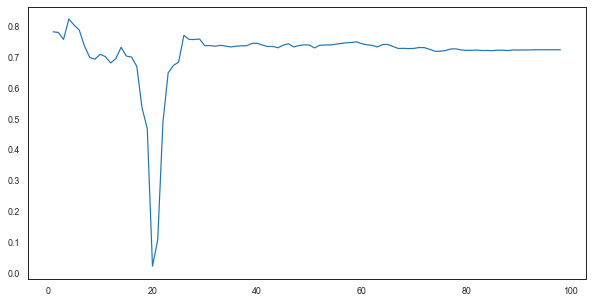

In [478]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_cameraaccessory_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [479]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

4

Output: 4

#### Inference from above plot:
- RFECV suggested us to use `4` features as its optimum number to use for no of features. However depending on your domain knowledge and your business requirement and objective you can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot we see that around 5 features the accuracy reaches a maximum of 0.85 or 85% thus we choose `5` as the optimal number of features as suggested by RFECV

In [480]:
rfe_5 = RFE(estimator=cameraaccessory_model, n_features_to_select=5)

In [481]:
%%time
rfe_5.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 103 ms


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [482]:
X_cameraaccessory_train.columns[rfe_5.support_]

Index(['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Online marketing', 'Affiliates'],
      dtype='object')

In [483]:
best_additive_cameraaccessory_cols=X_cameraaccessory_train.columns[rfe_5.support_]
print(best_additive_cameraaccessory_cols)
print(len(best_additive_cameraaccessory_cols))

Index(['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Online marketing', 'Affiliates'],
      dtype='object')
5


#### 5 variables supported by RFE are:
       
- ['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Online marketing', 'Affiliates']

In [484]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_cameraaccessory_train,rfe_5)

column_name  rfe.support_  rfe.ranking_
1                           deliverybdays          True             1
2                           deliverycdays          True             1
57                       Online marketing          True             1
24                  product_vertical_lens          True             1
62                             Affiliates          True             1
10  product_vertical_camerabatterycharger         False             2
67                                    SEM         False             3
6                          is_mass_market         False             4
22                 product_vertical_flash         False             5
53                Content Marketing_SMA_3         False             6
49                      Sponsorship_SMA_5         False             7
80                            Other_EMA_8         False             8
42                                Digital         False             9
81                         Other_Ad_Stock         False            10
68                              SEM_SMA_3         False            11
9          product_vertical_camerabattery         False            12
19          product_vertical_cameratripod         False            13
85                            Stock Index         False            14
20         product_vertical_extensiontube         False            15
48                      Sponsorship_SMA_3         False            16
70                              SEM_EMA_8         False            17
14         product_vertical_camerahousing         False            18
13       product_vertical_camerafilmrolls         False            19
29             product_vertical_telescope         False            20
34                 Total Investment_SMA_5         False            21
45                          Digital_EMA_8         False            22
7        product_vertical_cameraaccessory         False            23
27                 product_vertical_strap         False            24
92                          Cool Deg Days         False            25
21                product_vertical_filter         False            26
26               product_vertical_softbox         False            27
4                 product_procurement_sla         False            28
12          product_vertical_cameraeyecup         False            29
31                           holiday_week         False            30
15        product_vertical_cameraledlight         False            31
97                                   Sale         False            32
5                                  is_cod         False            33
17           product_vertical_cameramount         False            34
33                 Total Investment_SMA_3         False            35
89                               Min Temp         False            36
90                              Mean Temp         False            37
8              product_vertical_camerabag         False            38
54                Content Marketing_SMA_5         False            39
18   product_vertical_cameraremotecontrol         False            40
83                              NPS_SMA_3         False            41
51                   Sponsorship_Ad_Stock         False            42
39                               TV_SMA_5         False            43
65                       Affiliates_EMA_8         False            44
60                 Online marketing_EMA_8         False            45
25     product_vertical_reflectorumbrella         False            46
52                      Content Marketing         False            47
72                                  Radio         False            48
76                         Radio_Ad_Stock         False            49
55                Content Marketing_EMA_8         False            50
69                              SEM_SMA_5         False            51
43                          Digital_SMA_3         False            52
0                               Discount

In [485]:
#X_cameraaccessory_train2 now has 5 columns
X_cameraaccessory_train3 = X_cameraaccessory_train.loc[:,rfe_5.support_]
X_cameraaccessory_test3 = X_cameraaccessory_test.loc[:,rfe_5.support_]

print(X_cameraaccessory_train3.shape)
print(X_cameraaccessory_test3.shape)

(35, 5)
(15, 5)


In [486]:
cross_val_score(cameraaccessory_model, X_cameraaccessory_train3, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([0.73052238, 0.91159008, 0.96329641, 0.84678115, 0.60950915])

Output:
- array([-0.23123492,  0.92918701,  0.78822393,  0.76625348,  0.87660056])  
- array([0.73052238, 0.91159008, 0.96329641, 0.84678115, 0.60950915])

#### Fit X_cameraaccessory_train3 and get new model named as model3:

In [487]:
cameraaccessory_model3 = LinearRegression().fit(X_cameraaccessory_train3, y_cameraaccessory_train)
y_cameraaccessory_train_pred = cameraaccessory_model3.predict(X_cameraaccessory_train3)
y_cameraaccessory_test_pred = cameraaccessory_model3.predict(X_cameraaccessory_test3)

In [488]:
# evaluate model on 'train' data
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred)

R2 Score: 0.9191278333469449
Mean Squared Error: 492171.53198495257


Output:
- - Scaled and TrainTestSplit o/p:
- R2 Score: 0.9517297867614216
- Mean Squared Error: 0.04646505924192837
- - TrainTestSplit and than Scaling o/p:
- R2 Score: 0.9191278333469449
- Mean Squared Error: 242232816896.4152

In [489]:
# evaluate model on 'test' data
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred)

R2 Score: 0.7726999267426105
Mean Squared Error: 1255947.4419273597


#### Output :Additive Model | cameraaccessory | With 5 RFE Features on test data:
- - Scaled and TrainTestSplit o/p:
- R2 Score: 0.9277667004261431
- Mean Squared Error: 0.0714890350951922

- - TrainTestSplit and than Scaling o/p:
- R2 Score: 0.7726999267426105
- Mean Squared Error: 1255947.4419273597

In [490]:
#breakpoint
# set_trace()

In [491]:
# # Adding a constant variable | Code for reference is below:
# import statsmodels.api as sm  
# X_train_rfe = sm.add_constant(X_train_rfe)

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [492]:
# Adding a constant variable 
import statsmodels.api as sm  
X_cameraaccessory_train_rfe = sm.add_constant(X_cameraaccessory_train[best_additive_cameraaccessory_cols])

In [493]:
lm = sm.OLS(y_cameraaccessory_train,X_cameraaccessory_train_rfe).fit()

In [494]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     65.92
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           6.08e-15
Time:                        22:01:39   Log-Likelihood:                -508.39
No. Observations:                  35   AIC:                             1029.
Df Residuals:                      29   BIC:                             1038.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.957e+

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for R2= `0.919` on train data set

In [495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [496]:
def checkVIF(X):
#     X = X.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [497]:
X_cameraaccessory_train3.columns

Index(['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Online marketing', 'Affiliates'],
      dtype='object')

In [498]:
checkVIF(X_cameraaccessory_train3)

Features       VIF
1          deliverycdays  47558.12
0          deliverybdays  47396.95
4             Affiliates     59.32
3       Online marketing     57.47
2  product_vertical_lens      2.50

#### Inference from above:
- Here inspite of high VIF for couple of variables like 'deliverycdays' and 'deliverybdays' or ('Affiliates' or 'Online marketing') we are keeping them in the model.
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that `Affiliates` affects positively and `Online marketing` effects negatively to the revenue.

In [499]:
# linear regression model parameters
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


cameraaccessory_lr_model_parameters = list(cameraaccessory_model3.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_model3.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]
cols = X_cameraaccessory_test3.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef

[('constant', 4956942.875),
 ('deliverybdays', 11804584.756),
 ('deliverycdays', -12266266.766),
 ('product_vertical_lens', 1741530.085),
 ('Online marketing', -316767.388),
 ('Affiliates', 541848.743)]

In [500]:
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:,:]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients']!=0.0]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
cameraaccessory_lr_coef_df

Features  Coefficients
1          deliverybdays  11804584.756
3  product_vertical_lens   1741530.085
5             Affiliates    541848.743
4       Online marketing   -316767.388
2          deliverycdays -12266266.766

In [501]:
def getCoeffDf(model,selected_cols):
    model_parameters = list(model.coef_)
    model_parameters.insert(0, model.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
#     cols = X_cameraaccessory_test3.columns
    selected_cols = selected_cols.insert(0, "constant")
    coef = list(zip(selected_cols, model_parameters))
    
    coef_df = pd.DataFrame(coef)
    col_rename = {0:'Features',1: 'Coefficients'}
    coef_df = coef_df.rename(columns=col_rename)
#     coef_df = coef_df.iloc[1:,:]
    coef_df = coef_df.loc[coef_df['Coefficients']!=0.0]
    coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
    
    return coef_df

In [502]:
best_additive_cameraaccessory_coef_df=getCoeffDf(cameraaccessory_model3,best_additive_cameraaccessory_cols)
best_additive_cameraaccessory_coef_df

Features  Coefficients
1          deliverybdays  11804584.756
0               constant   4956942.875
3  product_vertical_lens   1741530.085
5             Affiliates    541848.743
4       Online marketing   -316767.388
2          deliverycdays -12266266.766

#### Plotting the Features in descending order of Importance for cameraaccessory:

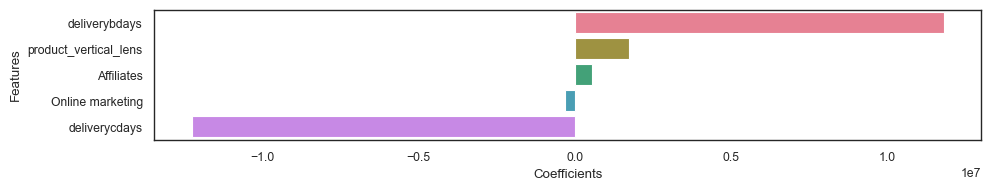

In [503]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 2), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.barplot(y='Features', x='Coefficients', palette='husl', data=cameraaccessory_lr_coef_df, estimator=np.sum)
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [504]:
def plotCoef(df,typeofmodel,category):
    # Slightly alter the figure size to make it more horizontal.
    fig=plt.figure(figsize=(10, 2), dpi=100, facecolor='w', edgecolor='k', frameon='True')
    fig.suptitle(typeofmodel+': Coeffs of Imp Features: '+category, fontsize = 12, color='g') # Plot heading 
    sns.barplot(y='Features', x='Coefficients', palette='husl', data=df, estimator=np.sum)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()

    # display the plot
    plt.show()

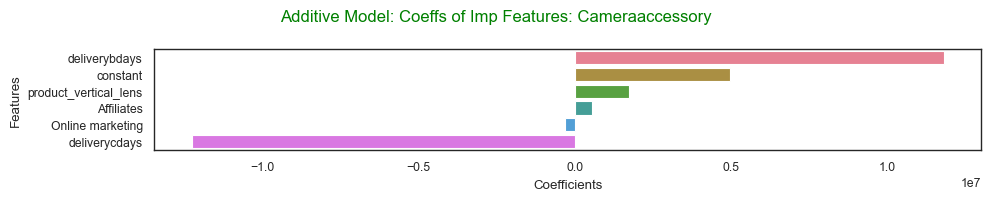

In [505]:
plotCoef(best_additive_cameraaccessory_coef_df,"Additive Model","Cameraaccessory")

---

In [506]:
rfe_4 = RFE(estimator=cameraaccessory_model, n_features_to_select=4)

In [507]:
%%time
rfe_4.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 123 ms


RFE(estimator=LinearRegression(), n_features_to_select=4)

In [508]:
X_cameraaccessory_train.columns[rfe_4.support_]

Index(['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Affiliates'],
      dtype='object')

#### Inference from above:
- We see that if we choose `4` as the number of rfe variables we get ['deliverybdays', 'deliverycdays', 'product_vertical_lens', 'Affiliates']

### Linear Regression Verify Assumptions and other plots: For `cameraaccessory`

In [509]:
error_terms = (y_cameraaccessory_train - y_cameraaccessory_train_pred)
print(len(error_terms))
print(y_cameraaccessory_train.shape)
print(len(y_cameraaccessory_train))
print(y_cameraaccessory_train_pred.shape)

35
(35,)
35
(35,)


In [510]:
import pylab as py

In [511]:
# def plotNormalDistribution_ErrorTerms(error_terms):
# #     fig = plt.figure(figsize=(12,4))
# #     fig.suptitle('Error Terms Normal Distribution', fontsize = 20) # Plot heading 

#     sns.distplot((error_terms), bins = 20)
#     plt.title('Normal Distribution', fontsize=14)  
#     plt.xlabel('Errors', fontsize = 12) 
    
#     plt.show() 

In [512]:
# def plotIndependenceOfErrorTerms(error_terms):
#     c = [i for i in range(1,len(error_terms)+1,1)]
#     fig = plt.figure(figsize=(12, 4))
#     plt.plot(c,error_terms, color="blue", linewidth=2.5, linestyle="-")
#     fig.suptitle('Verify Independence of Error Terms', fontsize=20)              # Plot heading 
#     plt.xlabel('Index', fontsize=18)                      # X-label
#     plt.ylabel('Error Terms: y_train - y_train_pred', fontsize=16)                # Y-label
#     plt.show()

In [513]:
def plotAssumptionsOfErrorTerms(error_terms,typeofmodel,category):
    fig = plt.figure(figsize=(20,4))
    fig.suptitle(typeofmodel+': Assumptions Of Error Terms: '+category, fontsize = 14, color='g') # Plot heading 

    # subplot 1
    plt.subplot(1, 3, 1)
    sns.distplot((error_terms), bins = 20)
    plt.title('Normal Distribution', fontsize=12)  
    plt.xlabel('Errors', fontsize = 12) 
    
    # subplot 2
    plt.subplot(1, 3, 2)
    c = [i for i in range(1,len(error_terms)+1,1)]
    plt.plot(c,error_terms, color="blue", linewidth=2.5, linestyle="-")
    plt.title('Verify Independence of Error Terms', fontsize=12)              # Plot heading 
    plt.xlabel('Index:Weeks', fontsize=12)                      # X-label
    plt.ylabel('Error Terms: y_train - y_train_pred', fontsize=12)                # Y-label
    
    # subplot 3
    plt.subplot(1, 3, 3)
    plt.scatter(c,error_terms)
    plt.title('Verifing constant of error terms:homoscadicity:', fontsize=12)              # Plot heading 
    plt.xlabel('Index:Weeks', fontsize=12) 
    plt.ylabel('Error Terms: y_train - y_train_pred', fontsize=12)  
    
    plt.show() 

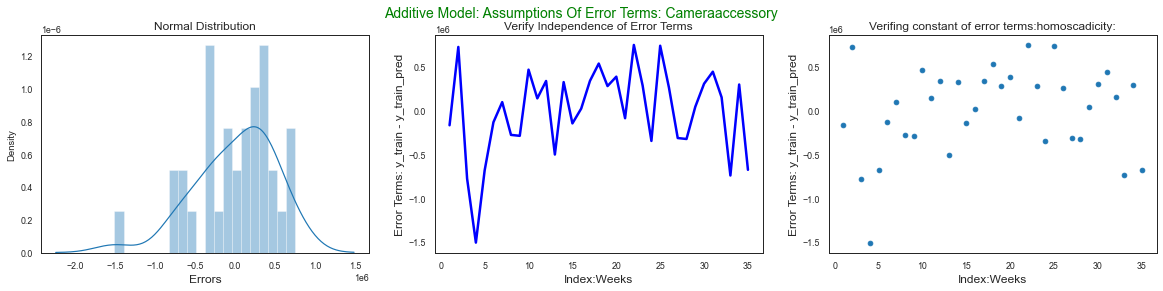

In [514]:
plotAssumptionsOfErrorTerms(error_terms, "Additive Model","Cameraaccessory")

#### Inference from above Plots:
- Error terms are normally distributed, thus our model is following the assumption of LR that error terms should be normally distributed.
- There should be no pattern observed when a line graph is plotted with error terms with the length of error terms. If there are some patterns observed we conclude that the chosen list of features/variables have some issue such as multicollinearity etc. There was a seasonality pattern in the error plot. This pattern in the errors could probably have been explained by some explanatory variable. We validated this assumption by plotting the necessary graph and actually observing independence of error terms and no pattern observed.

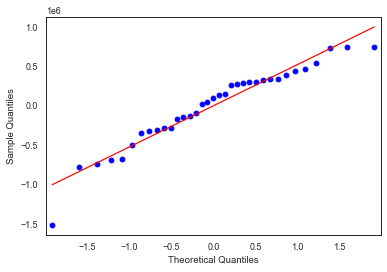

In [515]:
#Verifying the normal distribution of error by QQ-Plot too:
import pylab as py 
sm.qqplot(error_terms, line ='r') 
py.show()

In [516]:
# def plotActualvsPredicted_old(y_actual,y_pred):
#     counter = [i for i in range(1,len(y_actual)+1,1)]
#     fig = plt.figure(figsize=(20, 4))
#     plt.plot(counter,y_actual, color="blue", linewidth=2.5, linestyle="-") # Blue=Actual
#     plt.plot(counter,y_pred, color="red",  linewidth=2.5, linestyle="-") # Red=Predicted
#     fig.suptitle('Actual and Predicted on Data:', fontsize=20)              # Plot heading 
#     plt.xlabel('Index:Weeks', fontsize=18)                               # X-label
#     plt.ylabel('cnt', fontsize=16) 
#     plt.show()

In [517]:
def plotActualvsPredicted(y_actual,y_pred, typeofmodel, category, typeofdata):
    fig=plt.figure(figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
    fig.suptitle(typeofmodel+': Actual vs Predicted: '+category+":"+typeofdata, fontsize = 14, color='g') # Plot heading 
    sns.set_style("white") # white/whitegrid/dark/ticks
    sns.set_context("paper") # talk/poster
    
    # subplot 1
    plt.subplot(1, 2, 1)
    counter = [i for i in range(1,len(y_actual)+1,1)]
    plt.plot(counter,y_actual, color="blue", linewidth=2.5, linestyle="-") # Blue=Actual
    plt.plot(counter,y_pred, color="red",  linewidth=2.5, linestyle="-") # Red=Predicted
    plt.title('Actual and Predicted on:'+typeofdata, fontsize=12)              # Plot heading 
    plt.xlabel('Index:Weeks', fontsize=10)                               # X-label
    plt.ylabel('cnt', fontsize=10) 
    
    # subplot 2
    plt.subplot(1, 2, 2)
    sns.regplot(y_actual, y_pred)
    plt.title('Scatter Plot with Best Fit Line', fontsize=12)              # Plot heading 
    plt.xlabel('y_actual', fontsize=10)                          # X-label
    plt.ylabel('y_pred', fontsize=10)                          # Y-label
    plt.show()

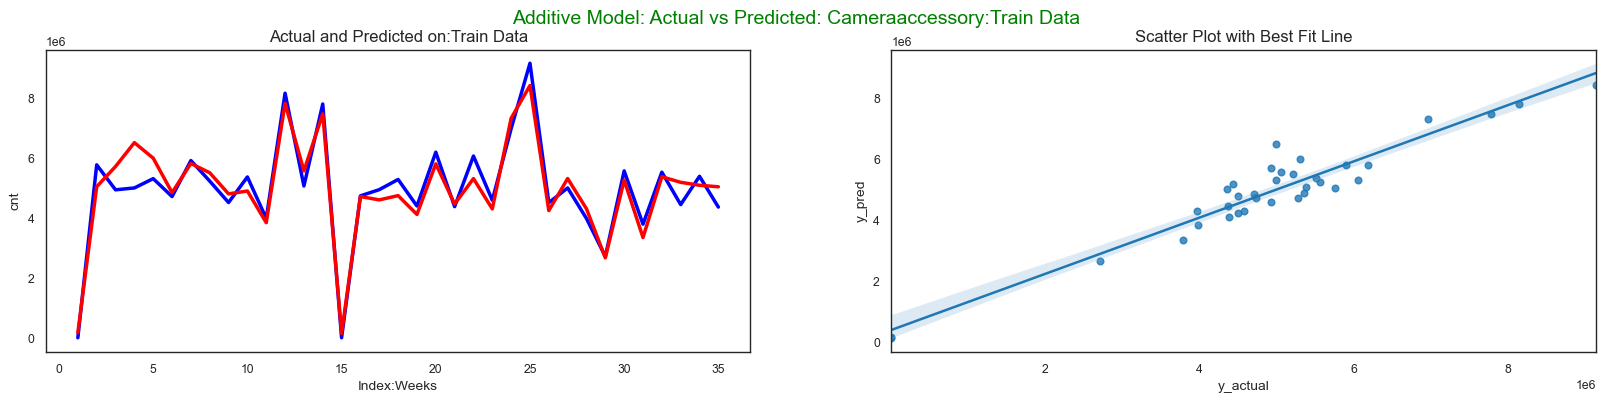

In [518]:
#On train Data:
plotActualvsPredicted(y_cameraaccessory_train, y_cameraaccessory_train_pred,"Additive Model","Cameraaccessory","Train Data")

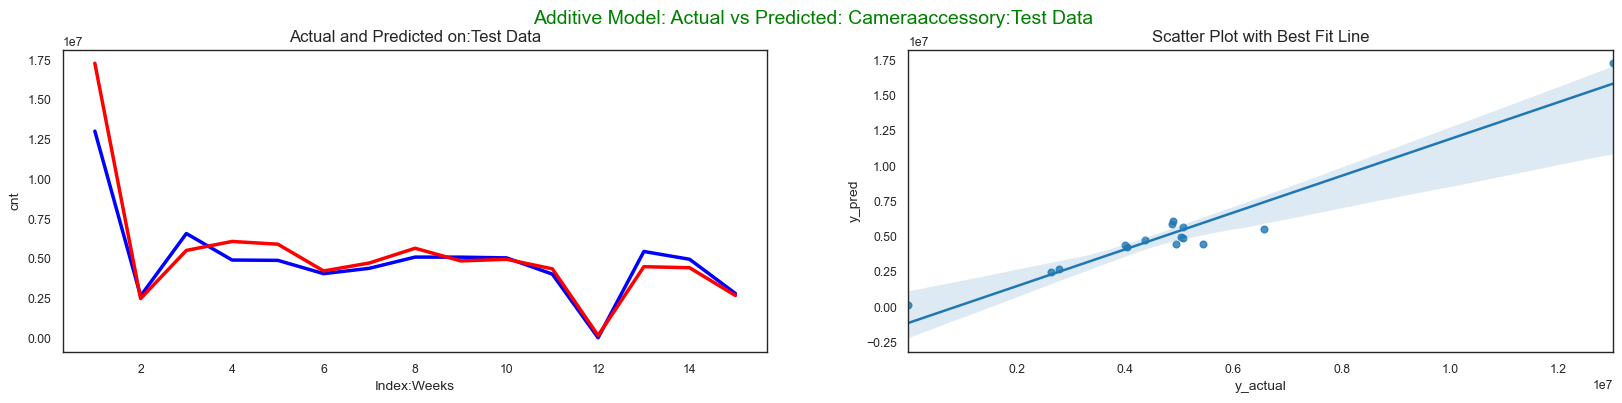

In [519]:
#On test data:
plotActualvsPredicted(y_cameraaccessory_test, y_cameraaccessory_test_pred, "Additive Model","Cameraaccessory","Test Data")

---

## Building `Additive` Linear Regression model for `gamingaccessory`:

In [520]:
gamingaccessory_model = LinearRegression().fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_train_pred = gamingaccessory_model.predict(X_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_model.predict(X_gamingaccessory_test)

In [521]:
# evaluate model on train data
evaluateLRModel(y_gamingaccessory_train,y_gamingaccessory_train_pred)

R2 Score: 1.0
Mean Squared Error: 1.4793713286982112e-09


In [522]:
# evaluate model on test data
evaluateLRModel(y_gamingaccessory_test,y_gamingaccessory_test_pred)

R2 Score: 0.9304494946159343
Mean Squared Error: 335274.34494074434


In [523]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(gamingaccessory_model, X_gamingaccessory_train, y_gamingaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([-0.53558685,  0.77403161,  0.93701513,  0.84635797,  0.91504733])

Output:
- array([-0.53558685,  0.77403161,  0.93701513,  0.84635797,  0.91504733])

#### Feature Selection in LR for intrepreting the Model:

In [524]:
print(X_gamingaccessory_train.shape) #has 35 rows and 98 columns or features
print(y_gamingaccessory_train.shape)

(35, 89)
(35,)


#### Using RFECV:

In [525]:
rfecv = RFECV(estimator=gamingaccessory_model, cv=4)

In [526]:
%%time
rfecv.fit(X_gamingaccessory_train, y_gamingaccessory_train)

Wall time: 580 ms


RFECV(cv=4, estimator=LinearRegression())

In [527]:
rfecv.grid_scores_

array([0.26355995, 0.28528061, 0.78418099, 0.85592059, 0.82075464,
       0.85993285, 0.87523564, 0.8636268 , 0.84739882, 0.83044773,
       0.83093916, 0.80888563, 0.72560307, 0.70468925, 0.69703053,
       0.63988274, 0.67635613, 0.71145504, 0.2344124 , 0.23276489,
       0.03801869, 0.16203576, 0.40166854, 0.39435588, 0.19847576,
       0.80510004, 0.81486978, 0.80712447, 0.81578422, 0.81738233,
       0.81259887, 0.84880503, 0.85033942, 0.83568426, 0.8337518 ,
       0.83453389, 0.83774921, 0.81260496, 0.80082092, 0.80022224,
       0.79500513, 0.79587993, 0.79652164, 0.76816659, 0.7704437 ,
       0.76950267, 0.77422689, 0.77162292, 0.76088573, 0.76024769,
       0.75906427, 0.76131227, 0.76193353, 0.76101249, 0.7613824 ,
       0.76225079, 0.76156505, 0.76100568, 0.76183927, 0.76264483,
       0.76202314, 0.75904283, 0.76007635, 0.76171594, 0.76122303,
       0.76341949, 0.76403749, 0.76510273, 0.7649358 , 0.76436004,
       0.76462064, 0.76486055, 0.76293369, 0.7621881 , 0.76182

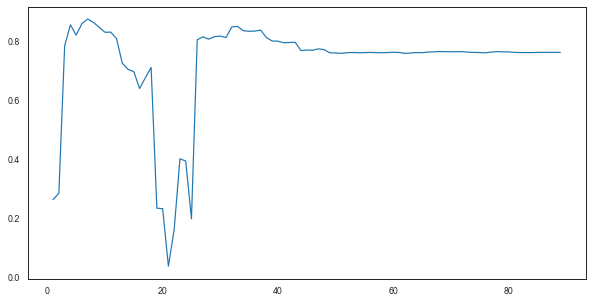

In [528]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_gamingaccessory_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [529]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

7

#### Inference from above plot:
- RFECV suggested us to use `7` features as its optimum number to use for no of features. However depending on your domain knowledge and your business requirement and objective you can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot we see that around 7 features the accuracy reaches a maximum of 0.85 or 85% thus we choose `7` as the optimal number of features as suggested by RFECV

In [530]:
rfe_7 = RFE(estimator=gamingaccessory_model, n_features_to_select=7)

In [531]:
%%time
rfe_7.fit(X_gamingaccessory_train, y_gamingaccessory_train)

Wall time: 133 ms


RFE(estimator=LinearRegression(), n_features_to_select=7)

In [532]:
best_additive_gamingaccessory_cols=X_gamingaccessory_train.columns[rfe_7.support_]
print(best_additive_gamingaccessory_cols)
print(len(best_additive_gamingaccessory_cols))

Index(['is_cod', 'Total Investment_SMA_5', 'Sponsorship_SMA_5',
       'Online marketing_EMA_8', 'Affiliates_EMA_8', 'SEM_SMA_5',
       'Other_SMA_5'],
      dtype='object')
7


#### 7 variables supported by RFE are:
- ['is_cod', 'Total Investment_SMA_5', 'Sponsorship_SMA_5',
       'Online marketing_EMA_8', 'Affiliates_EMA_8', 'SEM_SMA_5',
       'Other_SMA_5']

In [533]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_gamingaccessory_train,rfe_7)

column_name  rfe.support_  rfe.ranking_
40                       Sponsorship_SMA_5          True             1
51                  Online marketing_EMA_8          True             1
5                                   is_cod          True             1
25                  Total Investment_SMA_5          True             1
56                        Affiliates_EMA_8          True             1
60                               SEM_SMA_5          True             1
70                             Other_SMA_5          True             1
30                                TV_SMA_5         False             2
29                                TV_SMA_3         False             3
54                        Affiliates_SMA_3         False             4
71                             Other_EMA_8         False             5
66                             Radio_EMA_8         False             6
19       product_vertical_motioncontroller         False             7
49                  Online marketing_SMA_3         False             8
44                 Content Marketing_SMA_3         False             9
12          product_vertical_gamingheadset         False            10
36                           Digital_EMA_8         False            11
8                 product_vertical_gamepad         False            12
35                           Digital_SMA_5         False            13
13         product_vertical_gamingkeyboard         False            14
69                             Other_SMA_3         False            15
18    product_vertical_joystickgamingwheel         False            16
58                                     SEM         False            17
6                           is_mass_market         False            18
68                                   Other         False            19
11  product_vertical_gamingchargingstation         False            20
10          product_vertical_gamingadapter         False            21
73                                     NPS         False            22
42                    Sponsorship_Ad_Stock         False            23
76                             Stock Index         False            24
77                       Stock Index_SMA_3         False            25
16         product_vertical_gamingmousepad         False            26
28                                      TV         False            27
55                        Affiliates_SMA_5         False            28
9      product_vertical_gamingaccessorykit         False            29
15            product_vertical_gamingmouse         False            30
85                         Total Snow (cm)         False            31
43                       Content Marketing         False            32
0                                Discount%         False            33
64                             Radio_SMA_3         False            34
46                 Content Marketing_EMA_8         False            35
67                          Radio_Ad_Stock         False            36
45                 Content Marketing_SMA_5         False            37
62                            SEM_Ad_Stock         False            38
74                               NPS_SMA_3         False            39
88                                    Sale         False            40
34                           Digital_SMA_3         False            41
27               Total_Investment_Ad_Stock         False            42
57                     Affiliates_Ad_Stock         False            43
48                        Online marketing         False            44
79                                Max Temp         False            45
52               Online_marketing_Ad_Stock         False            46
50                  Online marketing_SMA_5         False            47
24                  Total Investment_SMA_3         False            48
82                           Heat Deg Days         False            49
59                               SEM_SMA_3         Fals

In [534]:
#X_cameraaccessory_train2 now has 5 columns
X_gamingaccessory_train2 = X_gamingaccessory_train.loc[:,rfe_7.support_]
X_gamingaccessory_test2 = X_gamingaccessory_test.loc[:,rfe_7.support_]

print(X_gamingaccessory_train2.shape) #This should print 7 i.e no of features supported by rfe
print(X_gamingaccessory_test2.shape)

(35, 7)
(16, 7)


In [535]:
cross_val_score(gamingaccessory_model, X_gamingaccessory_train2, y_gamingaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([-1.38189782, -0.05599404,  0.95344344,  0.47977632,  0.8633075 ])

#### Fit to get new model named as `gamingaccessory_model2`

In [536]:
gamingaccessory_model2 = LinearRegression().fit(X_gamingaccessory_train2, y_gamingaccessory_train)
y_gamingaccessory_train_pred = gamingaccessory_model2.predict(X_gamingaccessory_train2)
y_gamingaccessory_test_pred = gamingaccessory_model2.predict(X_gamingaccessory_test2)

In [537]:
# evaluate model on 'train' data
evaluateLRModel(y_gamingaccessory_train,y_gamingaccessory_train_pred)

R2 Score: 0.8490041129903854
Mean Squared Error: 506008.39192339906


Output:
- R2 Score: 0.8490041129903854
- Mean Squared Error: 506008.39192339906

In [538]:
# evaluate model on 'test' data
evaluateLRModel(y_gamingaccessory_test,y_gamingaccessory_test_pred)

R2 Score: 0.7538892997366193
Mean Squared Error: 630689.2457773461


#### Output :Additive Model | gamingaccessory | With 7 RFE Features on test data:
- R2 Score: 0.7538892997366193
- Mean Squared Error: 630689.2457773461

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [539]:
X_gamingaccessory_train_rfe = sm.add_constant(X_gamingaccessory_train[best_additive_gamingaccessory_cols])
lm = sm.OLS(y_gamingaccessory_train,X_gamingaccessory_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     21.69
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.54e-09
Time:                        22:01:45   Log-Likelihood:                -509.36
No. Observations:                  35   AIC:                             1035.
Df Residuals:                      27   BIC:                             1047.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.11

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for `R2= 0.849` on train data set

In [540]:
X_gamingaccessory_train2.columns

Index(['is_cod', 'Total Investment_SMA_5', 'Sponsorship_SMA_5',
       'Online marketing_EMA_8', 'Affiliates_EMA_8', 'SEM_SMA_5',
       'Other_SMA_5'],
      dtype='object')

In [541]:
checkVIF(X_gamingaccessory_train2)

Features      VIF
1  Total Investment_SMA_5 3721.040
2       Sponsorship_SMA_5 1307.310
4        Affiliates_EMA_8 1112.830
3  Online marketing_EMA_8  586.300
5               SEM_SMA_5  336.430
6             Other_SMA_5  161.470
0                  is_cod    1.960

#### Inference from above:
- Here inspite of high VIF for couple of variables , we are keeping them in the model.
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that Affiliates- `Affiliates_EMA_8` affects positively and Online marketing- `Total Investment_SMA_5` effects negatively to the revenue.

In [542]:
best_additive_gamingaccessory_coef_df=getCoeffDf(gamingaccessory_model2,best_additive_gamingaccessory_cols)
best_additive_gamingaccessory_coef_df

Features  Coefficients
5        Affiliates_EMA_8   7414407.258
0                constant   3115729.524
3       Sponsorship_SMA_5   1392112.361
1                  is_cod   1179127.530
7             Other_SMA_5    252346.938
6               SEM_SMA_5   -278282.019
2  Total Investment_SMA_5   -795489.930
4  Online marketing_EMA_8  -7335200.068

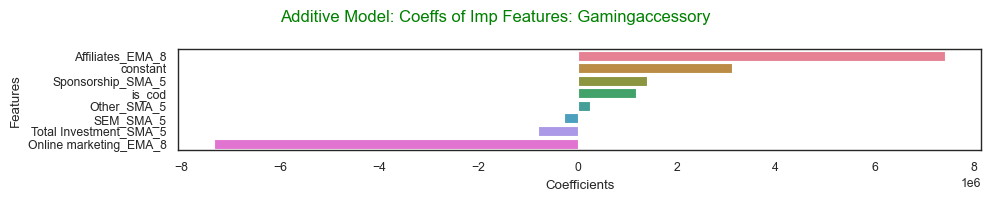

In [543]:
plotCoef(best_additive_gamingaccessory_coef_df,"Additive Model","Gamingaccessory")

#### Linear Regression Verify Assumptions and Other Plots: For `gamingaccessory`

In [544]:
error_terms = (y_gamingaccessory_train - y_gamingaccessory_train_pred)
print(len(error_terms))
print(y_gamingaccessory_train.shape)
print(len(y_gamingaccessory_train))
print(y_gamingaccessory_train_pred.shape)

35
(35,)
35
(35,)


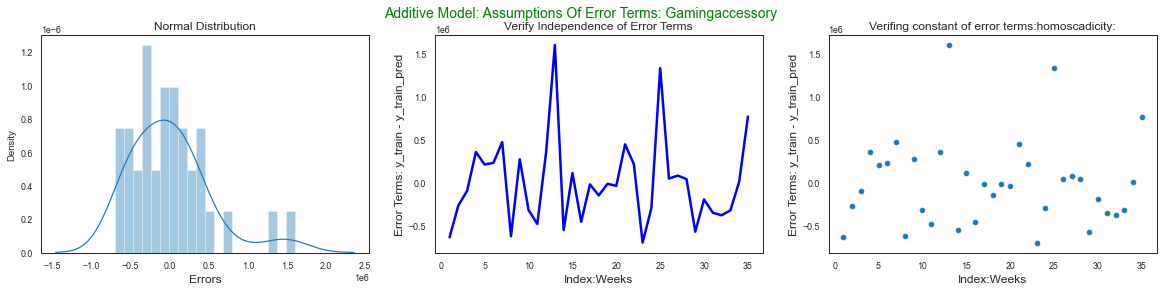

In [545]:
plotAssumptionsOfErrorTerms(error_terms, "Additive Model","Gamingaccessory")

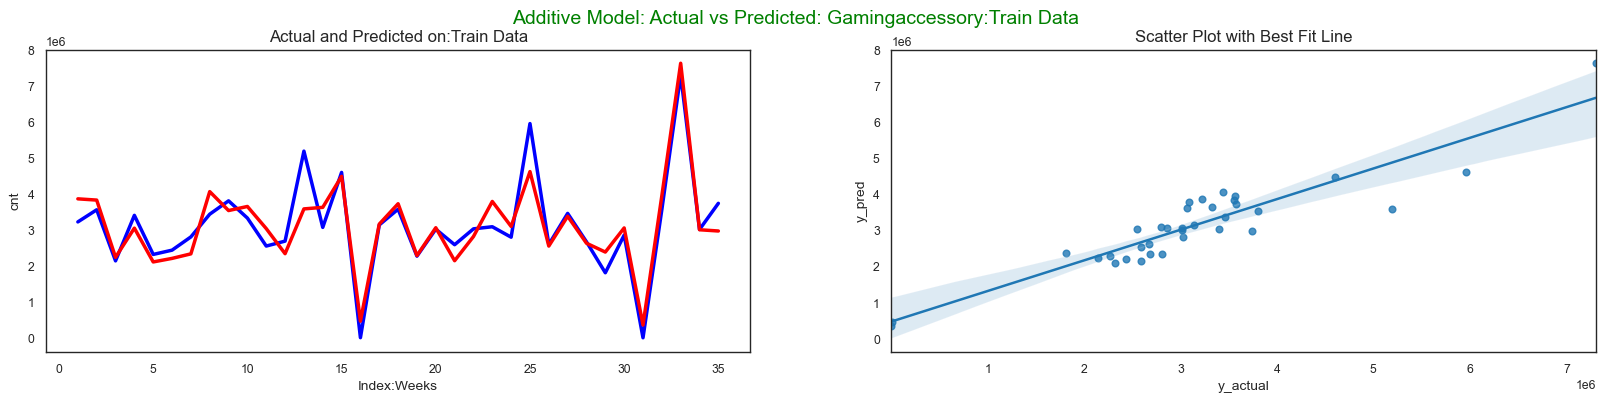

In [546]:
#On train data:
plotActualvsPredicted(y_gamingaccessory_train,y_gamingaccessory_train_pred,"Additive Model","Gamingaccessory","Train Data")

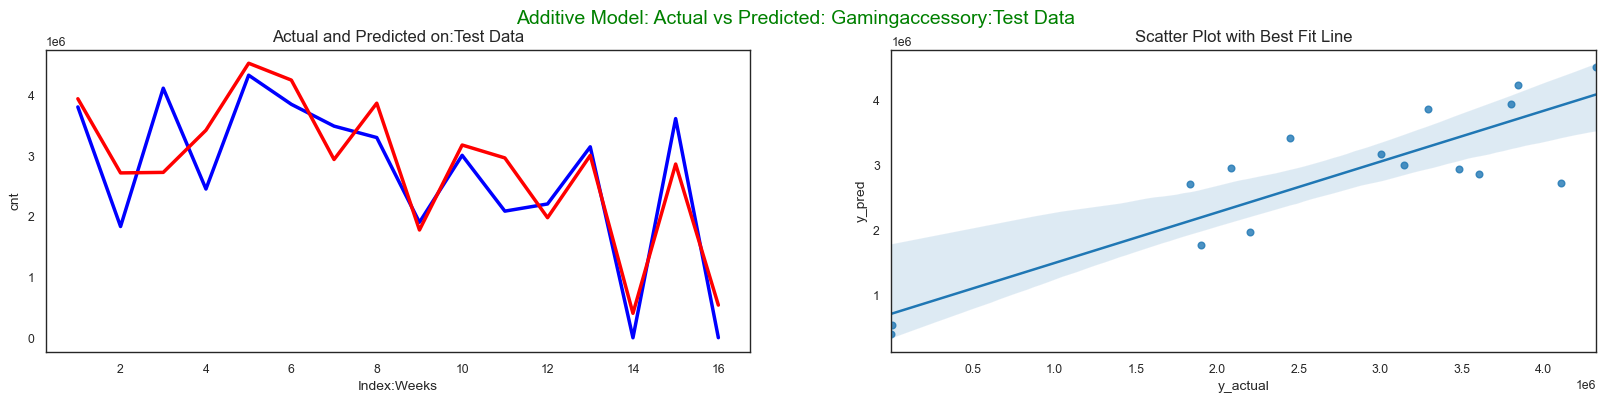

In [547]:
#On test data:
plotActualvsPredicted(y_gamingaccessory_test,y_gamingaccessory_test_pred,"Additive Model","Gamingaccessory","Test Data")

---

## Building `Additive` Linear Regression model for `homeaudio`

In [548]:
print(X_homeaudio_train.shape)

(33, 85)


In [549]:
homeaudio_model = LinearRegression().fit(X_homeaudio_train, y_homeaudio_train)
y_homeaudio_train_pred = homeaudio_model.predict(X_homeaudio_train)
y_homeaudio_test_pred = homeaudio_model.predict(X_homeaudio_test)

In [550]:
# evaluate model on train data
evaluateLRModel(y_homeaudio_train,y_homeaudio_train_pred)

R2 Score: 1.0
Mean Squared Error: 4.494331431872579e-09


In [551]:
# evaluate model on test data
evaluateLRModel(y_homeaudio_test,y_homeaudio_test_pred)

R2 Score: 0.5320576205320676
Mean Squared Error: 1173607.9955504418


Output on Test data for homeaudio:
- R2 Score: 0.5320576205320676
- Mean Squared Error: 1173607.9955504418

In [552]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(homeaudio_model, X_homeaudio_train, y_homeaudio_train, cv=5, n_jobs=-1, scoring="r2")

array([0.8640241 , 0.7646305 , 0.70683707, 0.86739249, 0.86817281])

Output:
- array([0.8640241 , 0.7646305 , 0.70683707, 0.86739249, 0.86817281])

#### Feature Selection in LR for intrepreting the Model:

In [553]:
print(X_homeaudio_train.shape) #has 35 rows and 98 columns or features
print(y_homeaudio_train.shape)

(33, 85)
(33,)


#### Using RFECV:

In [554]:
rfecv = RFECV(estimator=homeaudio_model, cv=4)

In [555]:
%%time
rfecv.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 558 ms


RFECV(cv=4, estimator=LinearRegression())

In [556]:
rfecv.grid_scores_

array([ 0.91090637,  0.90947935,  0.88797802,  0.89488069,  0.89530055,
        0.90552974,  0.89818747,  0.8964001 ,  0.89164003,  0.88723979,
        0.90562965,  0.9037015 ,  0.89228443,  0.8705161 ,  0.86742653,
        0.85727813,  0.84864256,  0.83046356,  0.80930536,  0.78812793,
        0.75032863,  0.74293948,  0.24932929, -0.36674653,  0.84121274,
        0.83904463,  0.84066772,  0.85310371,  0.85340827,  0.85715608,
        0.85672571,  0.85856749,  0.85912395,  0.84867644,  0.8550782 ,
        0.85545958,  0.85405462,  0.84944842,  0.85001017,  0.8525211 ,
        0.85063856,  0.85153906,  0.8438099 ,  0.84282288,  0.84074883,
        0.84036739,  0.83424277,  0.83863735,  0.83470072,  0.8321422 ,
        0.83165542,  0.83155006,  0.83120004,  0.83607355,  0.83582534,
        0.83555383,  0.83646799,  0.83612223,  0.83779783,  0.83747779,
        0.82317534,  0.8226574 ,  0.82348133,  0.82362498,  0.82521261,
        0.82413167,  0.82445476,  0.82448429,  0.82455884,  0.82

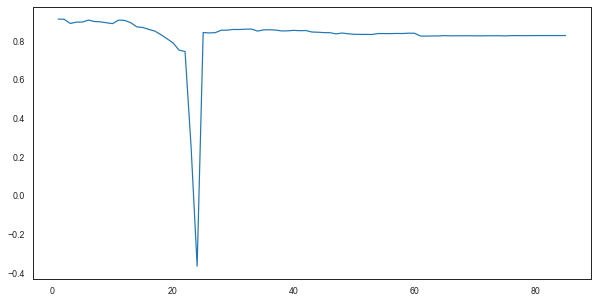

In [557]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_homeaudio_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [558]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

1

#### Inference from above plot:
- RFECV suggested us to use `1` feature as its optimum number to use for no of features. However depending on our domain knowledge and your business requirement and objective we can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot and domain knowledge we choose the standard top `5` features as the optimal number of features as suggested by RFECV

In [559]:
rfe_5 = RFE(estimator=homeaudio_model, n_features_to_select=5)

In [560]:
%%time
rfe_5.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 101 ms


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [561]:
best_additive_homeaudio_cols=X_homeaudio_train.columns[rfe_5.support_]
print(best_additive_homeaudio_cols)
print(len(best_additive_homeaudio_cols))

Index(['Discount%', 'product_vertical_fmradio',
       'product_vertical_homeaudiospeaker', 'Digital_EMA_8', 'SEM_EMA_8'],
      dtype='object')
5


#### 5 variable supported by RFE are:
- ['Discount%', 'product_vertical_fmradio',
       'product_vertical_homeaudiospeaker', 'Digital_EMA_8', 'SEM_EMA_8']

In [562]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_homeaudio_train,rfe_5)

column_name  rfe.support_  rfe.ranking_
0                           Discount%          True             1
57                          SEM_EMA_8          True             1
10           product_vertical_fmradio          True             1
12  product_vertical_homeaudiospeaker          True             1
32                      Digital_EMA_8          True             1
3                                 sla         False             2
31                      Digital_SMA_5         False             3
7       product_vertical_djcontroller         False             4
9     product_vertical_dockingstation         False             5
68                     Other_Ad_Stock         False             6
61                        Radio_SMA_5         False             7
72                        Stock Index         False             8
36                  Sponsorship_SMA_5         False             9
38               Sponsorship_Ad_Stock         False            10
74                  Stock Index_SMA_5         False            11
42            Content Marketing_EMA_8         False            12
39                  Content Marketing         False            13
11        product_vertical_hifisystem         False            14
5                              is_cod         False            15
79                      Cool Deg Days         False            16
83                  Snow on Grnd (cm)         False            17
76                           Min Temp         False            18
17                        payday_week         False            19
6                      is_mass_market         False            20
2                       deliverycdays         False            21
4             product_procurement_sla         False            22
60                        Radio_SMA_3         False            23
18                       holiday_week         False            24
71                          NPS_SMA_5         False            25
13     product_vertical_karaokeplayer         False            26
44                   Online marketing         False            27
50                   Affiliates_SMA_3         False            28
82                  Total Precip (mm)         False            29
21             Total Investment_SMA_5         False            30
34                        Sponsorship         False            31
1                       deliverybdays         False            32
45             Online marketing_SMA_3         False            33
58                       SEM_Ad_Stock         False            34
14          product_vertical_slingbox         False            35
49                         Affiliates         False            36
33                   Digital_Ad_Stock         False            37
8               product_vertical_dock         False            38
24                                 TV         False            39
29                            Digital         False            40
19                   Total Investment         False            41
65                        Other_SMA_3         False            42
16     product_vertical_voicerecorder         False            43
63                     Radio_Ad_Stock         False            44
26                           TV_SMA_5         False            45
80                    Total Rain (mm)         False            46
81                    Total Snow (cm)         False            47
66                        Other_SMA_5         False            48
54                                SEM         False            49
22             Total Investment_EMA_8         False            50
67                        Other_EMA_8         False            51
30                      Digital_SMA_3         False            52
37                  Sponsorship_EMA_8         False            53
25                           TV_SMA_3         False            54
56                          SEM_SMA_5         False            55
53                Affiliates_Ad_Stock         False            56


In [563]:
#X_cameraaccessory_train2 now has 5 columns
X_homeaudio_train2 = X_homeaudio_train.loc[:,rfe_5.support_]
X_homeaudio_test2 = X_homeaudio_test.loc[:,rfe_5.support_]

print(X_homeaudio_train2.shape) #This should print 5 i.e no of features supported by rfe
print(X_homeaudio_test2.shape)

(33, 5)
(15, 5)


In [564]:
cross_val_score(homeaudio_model, X_homeaudio_train2, y_homeaudio_train, cv=5, n_jobs=-1, scoring="r2")

array([0.93444848, 0.9828698 , 0.97029881, 0.97543466, 0.99148375])

Output:
- [0.93444848, 0.9828698 , 0.97029881, 0.97543466, 0.99148375]

#### Fit to get new model named as `homeaudio_model2`

In [565]:
homeaudio_model2 = LinearRegression().fit(X_homeaudio_train2, y_homeaudio_train)
y_homeaudio_train_pred = homeaudio_model2.predict(X_homeaudio_train2)
y_homeaudio_test_pred = homeaudio_model2.predict(X_homeaudio_test2)

In [566]:
# evaluate model on 'train' data
evaluateLRModel(y_homeaudio_train,y_homeaudio_train_pred)

R2 Score: 0.9960459394461192
Mean Squared Error: 178367.57084509567


Output on train data for homeaudio:
- R2 Score: 0.9960459394461192
- Mean Squared Error: 178367.57084509567

In [567]:
# evaluate model on 'test' data
evaluateLRModel(y_homeaudio_test,y_homeaudio_test_pred)

R2 Score: 0.9580502683917089
Mean Squared Error: 351391.67108278576


#### Output :Additive Model | homeaudio | With 5 RFE Features on test data:
- R2 Score: 0.9580502683917089
- Mean Squared Error: 351391.67108278576

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [568]:
X_homeaudio_train_rfe = sm.add_constant(X_homeaudio_train[best_additive_homeaudio_cols])
lm = sm.OLS(y_homeaudio_train,X_homeaudio_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1360.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.54e-31
Time:                        22:01:50   Log-Likelihood:                -445.85
No. Observations:                  33   AIC:                             903.7
Df Residuals:                      27   BIC:                             912.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for `R2= 0.996` on train data set

In [569]:
X_homeaudio_train2.columns

Index(['Discount%', 'product_vertical_fmradio',
       'product_vertical_homeaudiospeaker', 'Digital_EMA_8', 'SEM_EMA_8'],
      dtype='object')

In [570]:
checkVIF(X_homeaudio_train2)

Features    VIF
3                      Digital_EMA_8 21.650
4                          SEM_EMA_8 21.090
2  product_vertical_homeaudiospeaker  5.060
1           product_vertical_fmradio  3.840
0                          Discount%  2.190

#### Inference from above:
- Here inspite of high VIF for couple of variables , we are keeping them in the model to intrepret the model better
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that `product_vertical_homeaudiospeaker` and `product_vertical_fmradio` affects positively and  `Discount%` effects negatively to the revenue.

In [571]:
best_additive_homeaudio_coef_df=getCoeffDf(homeaudio_model2,best_additive_homeaudio_cols)
best_additive_homeaudio_coef_df

Features  Coefficients
0                           constant   5138760.933
3  product_vertical_homeaudiospeaker   2733123.103
2           product_vertical_fmradio    347985.377
4                      Digital_EMA_8    -18664.130
5                          SEM_EMA_8    -19855.815
1                          Discount%   -267610.567

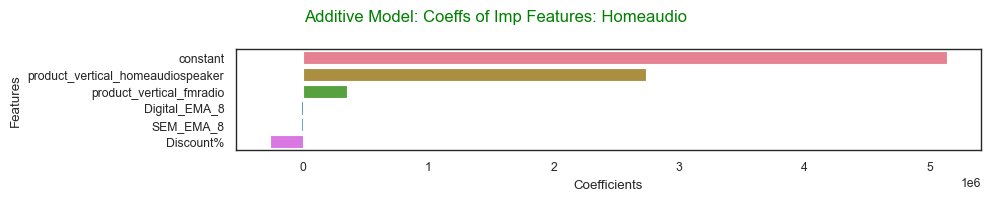

In [572]:
plotCoef(best_additive_homeaudio_coef_df,"Additive Model","Homeaudio")

#### Linear Regression Verify Assumptions and Other Plots: For `homeaudio`

In [573]:
error_terms = (y_homeaudio_train - y_homeaudio_train_pred)
print(len(error_terms))
print(y_homeaudio_train.shape)
print(len(y_homeaudio_train))
print(y_homeaudio_train_pred.shape)

33
(33,)
33
(33,)


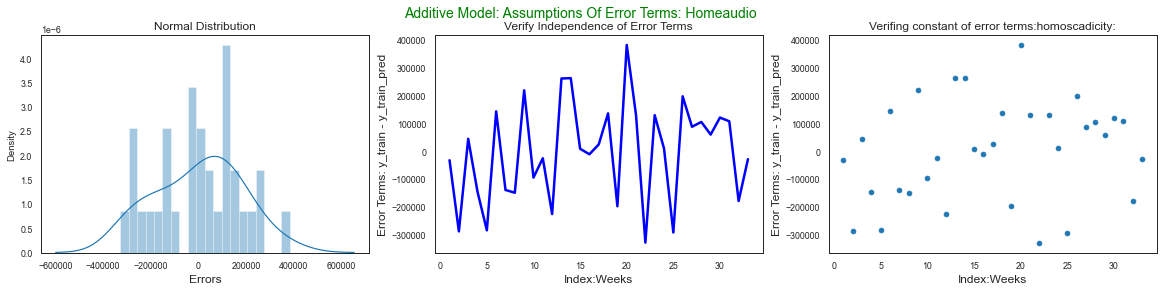

In [574]:
plotAssumptionsOfErrorTerms(error_terms, "Additive Model","Homeaudio")

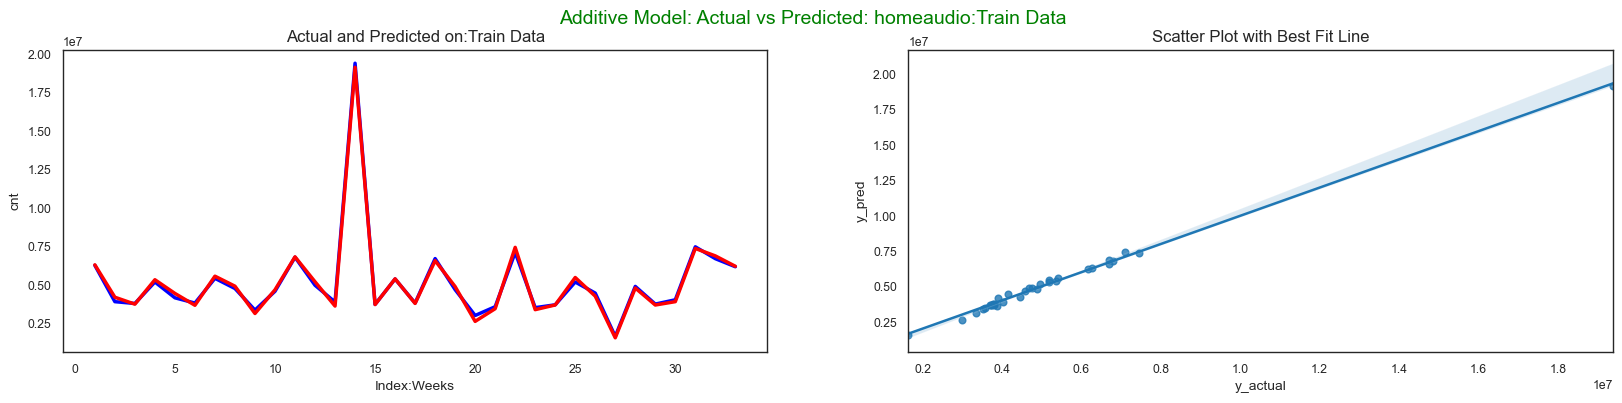

In [575]:
#On train data:
plotActualvsPredicted(y_homeaudio_train,y_homeaudio_train_pred,"Additive Model","homeaudio","Train Data")

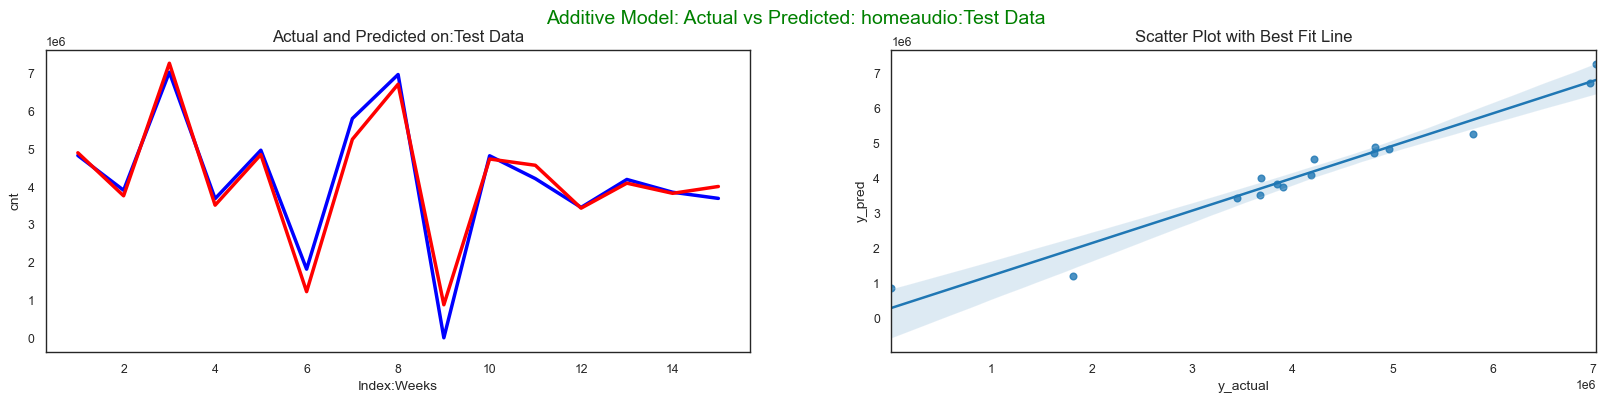

In [576]:
#On test data:
plotActualvsPredicted(y_homeaudio_test,y_homeaudio_test_pred,"Additive Model","homeaudio","Test Data")

#### Checking to see which features are selected if we go by rfe recommendation of one feature:

In [577]:
rfe_1 = RFE(estimator=homeaudio_model, n_features_to_select=1)

In [578]:
%%time
rfe_1.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 126 ms


RFE(estimator=LinearRegression(), n_features_to_select=1)

In [579]:
X_homeaudio_train.columns[rfe_1.support_]

Index(['product_vertical_homeaudiospeaker'], dtype='object')

#### Inference from above:
- We see that if we choose `1` as the number of rfe variables we get ['product_vertical_homeaudiospeaker']

---

# Building Multiplicative models for thee categories(cameraaccessory, gamingaccessory, homeaudio)

*The Linear Regression Model that we built earlier is an additive model that has been an implicit assumption that the different KPIs affect the revenue additively.*

  __Y = α + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + ϵ__

*However when there are interactions between the KPIs, we go for a multiplicative model.*

*To fit a multiplicative model, take logarithms of the data(on both sides of the model), then analyse the log data as before.*

__Y = e^α .X1^β1 . X2^β2 . X3^β3 . X4^β4 . X5^β5 + ϵ__

__lnY = α + β1ln(X1) + β2ln(X2) + β3ln(X3) + β4ln(X4) + β5ln(X5) + ϵ'__

#### Preparing the Multiplicative data frames for all three categories: 
- We first apply log on values
- Train Test Split
- Feature Scaling

In [580]:
# Making copy of dataframes from the original ones
cameraaccessory_df = cameraaccessory_org_df.copy()
gamingaccessory_df = gamingaccessory_org_df.copy()
homeaudio_df = homeaudio_org_df.copy()

In [581]:
print(cameraaccessory_df.shape)
print(gamingaccessory_df.shape)
print(homeaudio_df.shape)
cameraaccessory_df.head()

(50, 100)
(51, 91)
(48, 87)


Week         gmv  Discount%  deliverybdays  deliverycdays   sla  \
25    28 3975505.000     43.971          0.000          0.000 6.959   
26    29 4390316.000     44.335          0.000          0.000 6.395   
27    30 4368719.000     43.608          0.003          0.003 6.414   
28    31 2790458.000     43.000          0.000          0.000 6.371   
29    32    2198.000     12.947          0.000          0.000 9.000   

    product_procurement_sla  is_cod  is_mass_market  \
25                    2.781    1909            2549   
26                    2.813    2033            2729   
27                    2.866    2053            2705   
28                    2.823    1406            1790   
29                    4.000       1               4   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                                46                     333.000   
26                                36                     356.000   
27                                48                     295.000   
28                                45                     185.000   
29                                 0                       0.000   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                         690.000                                223.000   
26                         752.000                                225.000   
27                         773.000                                267.000   
28                         484.000                                180.000   
29                           3.000                                  0.000   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                                  18                              0   
26                                   9                              0   
27                                  12                              0   
28                                  11                              0   
29                                   0                              0   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                                 0                               0   
26                                 0                               0   
27                                 0                               0   
28                                 0                               0   
29                                 0                               0   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                                0                                  0   
26                                0                                  0   
27                                0                                  0   
28                                0                                  0   
29                                0                                  0   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                             4                               141.000   
26                            11                               142.000   
27                             7                               108.000   
28                             2                                84.000   
29                             0                                 0.000   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                        435.000                               0   
26                        495.000                               0   
27                        465.000                               0   
28                        360.000                               1   
29                          1.000                               0   

    product_vertical_filter  product_vertical_flash  \
25                  220.000                  26.000   
26                  186.000                  27.000   
27                  186.000     

In [582]:
getNullCount_df(cameraaccessory_df)

column_name  \
Week                                                                    Week   
Online_marketing_Ad_Stock                          Online_marketing_Ad_Stock   
SEM_Ad_Stock                                                    SEM_Ad_Stock   
SEM_EMA_8                                                          SEM_EMA_8   
SEM_SMA_5                                                          SEM_SMA_5   
SEM_SMA_3                                                          SEM_SMA_3   
SEM                                                                      SEM   
Affiliates_Ad_Stock                                      Affiliates_Ad_Stock   
Affiliates_EMA_8                                            Affiliates_EMA_8   
Affiliates_SMA_5                                            Affiliates_SMA_5   
Affiliates_SMA_3                                            Affiliates_SMA_3   
Affiliates                                                        Affiliates   
Online marketing_EMA_8                                Online marketing_EMA_8   
gmv                                                                      gmv   
Online marketing_SMA_5                                Online marketing_SMA_5   
Online marketing_SMA_3                                Online marketing_SMA_3   
Online marketing                                            Online marketing   
Content_Marketing_Ad_Stock                        Content_Marketing_Ad_Stock   
Content Marketing_EMA_8                              Content Marketing_EMA_8   
Content Marketing_SMA_5                              Content Marketing_SMA_5   
Content Marketing_SMA_3                              Content Marketing_SMA_3   
Content Marketing                                          Content Marketing   
Sponsorship_Ad_Stock                                    Sponsorship_Ad_Stock   
Sponsorship_EMA_8                                          Sponsorship_EMA_8   
Radio                                                                  Radio   
Radio_SMA_3                                                      Radio_SMA_3   
Radio_SMA_5                                                      Radio_SMA_5   
Radio_EMA_8                                                      Radio_EMA_8   
Snow on Grnd (cm)                                          Snow on Grnd (cm)   
Total Precip (mm)                                          Total Precip (mm)   
Total Snow (cm)                                              Total Snow (cm)   
Total Rain (mm)                                              Total Rain (mm)   
Cool Deg Days                                                  Cool Deg Days   
Heat Deg Days                                                  Heat Deg Days   
Mean Temp                                                          Mean Temp   
Min Temp                                                            Min Temp   
Max Temp                                                            Max Temp   
Stock Index_SMA_5                                          Stock Index_SMA_5   
Stock Index_SMA_3                                          Stock Index_SMA_3   
Stock Index                                                      Stock Index   
NPS_SMA_5                                                          NPS_SMA_5   
NPS_SMA_3                                                          NPS_SMA_3   
NPS                                                                      NPS   
Other_Ad_Stock                                                Other_Ad_Stock   
Other_EMA_8                                                      Other_EMA_8   
Other_SMA_5                                                      Other_SMA_5   
Other_SMA_3                                                      Other_SMA_3   
Other                                                                  Other   
Radio_Ad_Stock                                                Radio_Ad_Stock   
Sponsorship_SMA_5                                          Sponso

#### We will drop the Week column as it is a row identifier and will not help in prediction of revenue:

In [583]:
# removing columns
cameraaccessory_df = cameraaccessory_df.drop('Week', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('Week', axis=1)
homeaudio_df = homeaudio_df.drop('Week', axis=1)

#Print shape after dropping
print(cameraaccessory_df.shape)
print(gamingaccessory_df.shape)
print(homeaudio_df.shape)

(50, 99)
(51, 90)
(48, 86)


#### Taking Logarithm of both the Dependent and the independent variables
- After taking log, all 0 values will be transformed to inf. Retransforming these values to 0.

In [584]:
cameraaccessory_df = cameraaccessory_df.applymap(lambda x: np.log(x))
cameraaccessory_df = cameraaccessory_df.replace([np.inf, -np.inf], 0)
cameraaccessory_df = cameraaccessory_df.replace(np.nan, 0)

gamingaccessory_df = gamingaccessory_df.applymap(lambda x: np.log(x))
gamingaccessory_df = gamingaccessory_df.replace([np.inf, -np.inf], 0)
gamingaccessory_df = gamingaccessory_df.replace(np.nan, 0)

homeaudio_df = homeaudio_df.applymap(lambda x: np.log(x))
homeaudio_df = homeaudio_df.replace([np.inf, -np.inf], 0)
homeaudio_df = homeaudio_df.replace(np.nan, 0)

In [585]:
#Observe values have changed after taking logs
cameraaccessory_df.head()

gmv  Discount%  deliverybdays  deliverycdays   sla  \
25 15.196      3.784          0.000          0.000 1.940   
26 15.295      3.792          0.000          0.000 1.856   
27 15.290      3.775         -5.941         -5.718 1.859   
28 14.842      3.761          0.000          0.000 1.852   
29  7.695      2.561          0.000          0.000 2.197   

    product_procurement_sla  is_cod  is_mass_market  \
25                    1.023   7.554           7.843   
26                    1.034   7.617           7.912   
27                    1.053   7.627           7.903   
28                    1.038   7.249           7.490   
29                    1.386   0.000           1.386   

    product_vertical_cameraaccessory  product_vertical_camerabag  \
25                             3.829                       5.808   
26                             3.584                       5.875   
27                             3.871                       5.687   
28                             3.807                       5.220   
29                             0.000                       0.000   

    product_vertical_camerabattery  product_vertical_camerabatterycharger  \
25                           6.537                                  5.407   
26                           6.623                                  5.416   
27                           6.650                                  5.587   
28                           6.182                                  5.193   
29                           1.099                                  0.000   

    product_vertical_camerabatterygrip  product_vertical_cameraeyecup  \
25                               2.890                          0.000   
26                               2.197                          0.000   
27                               2.485                          0.000   
28                               2.398                          0.000   
29                               0.000                          0.000   

    product_vertical_camerafilmrolls  product_vertical_camerahousing  \
25                             0.000                           0.000   
26                             0.000                           0.000   
27                             0.000                           0.000   
28                             0.000                           0.000   
29                             0.000                           0.000   

    product_vertical_cameraledlight  product_vertical_cameramicrophone  \
25                            0.000                              0.000   
26                            0.000                              0.000   
27                            0.000                              0.000   
28                            0.000                              0.000   
29                            0.000                              0.000   

    product_vertical_cameramount  product_vertical_cameraremotecontrol  \
25                         1.386                                 4.949   
26                         2.398                                 4.956   
27                         1.946                                 4.682   
28                         0.693                                 4.431   
29                         0.000                                 0.000   

    product_vertical_cameratripod  product_vertical_extensiontube  \
25                          6.075                           0.000   
26                          6.205                           0.000   
27                          6.142                           0.000   
28                          5.886                           0.000   
29                          0.000                           0.000   

    product_vertical_filter  product_vertical_flash  \
25                    5.394                   3.258   
26                    5.226                   3.296   
27                    5.226                   3.434   
28                    4.691                  

### Splitting the 3 Multiplicative Dataframes into Training and Testing Sets:

In [586]:
# Create Train and Test Sets for `cameraaccessory` df
y = cameraaccessory_df.gmv
X = cameraaccessory_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_cameraaccessory_train, X_cameraaccessory_test, y_cameraaccessory_train, y_cameraaccessory_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_cameraaccessory_train.shape, X_cameraaccessory_test.shape, y_cameraaccessory_train.shape,y_cameraaccessory_test.shape

((35, 98), (15, 98), (35,), (15,))

In [587]:
# Create Train and Test Sets for `gamingaccessory` df
y = gamingaccessory_df.gmv
X = gamingaccessory_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_gamingaccessory_train, X_gamingaccessory_test, y_gamingaccessory_train, y_gamingaccessory_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_gamingaccessory_train.shape, X_gamingaccessory_test.shape, y_gamingaccessory_train.shape,y_gamingaccessory_test.shape

((35, 89), (16, 89), (35,), (16,))

In [588]:
# Create Train and Test Sets for `homeaudio` df
y = homeaudio_df.gmv
X = homeaudio_df.drop('gmv', axis=1) #note inplace=True is not used, thus original df will still have target var=gmv

X_homeaudio_train, X_homeaudio_test, y_homeaudio_train, y_homeaudio_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_homeaudio_train.shape, X_homeaudio_test.shape, y_homeaudio_train.shape,y_homeaudio_test.shape

((33, 85), (15, 85), (33,), (15,))

In [589]:
#Notice values before scaling, they are not scaled and are in thier original multiplicative form
X_cameraaccessory_train.head()

Discount%  deliverybdays  deliverycdays   sla  product_procurement_sla  \
31      3.713          0.000          0.000 2.234                    0.693   
16      4.039          1.300          1.459 1.753                    0.874   
21      4.031          1.356          1.513 1.743                    0.863   
22      3.961          1.317          1.475 1.738                    0.933   
40      3.842         -5.873         -5.665 1.873                    1.105   

    is_cod  is_mass_market  product_vertical_cameraaccessory  \
31   0.000           1.099                             0.000   
16   8.475           8.632                             3.497   
21   8.400           8.544                             3.784   
22   8.208           8.361                             3.738   
40   8.188           8.353                             3.784   

    product_vertical_camerabag  product_vertical_camerabattery  \
31                       0.000                           0.000   
16                       6.087                           6.608   
21                       5.889                           6.418   
22                       5.943                           6.373   
40                       5.802                           6.516   

    product_vertical_camerabatterycharger  product_vertical_camerabatterygrip  \
31                                  0.000                               0.000   
16                                  6.016                               0.693   
21                                  5.802                               1.386   
22                                  5.768                               1.386   
40                                  5.525                               2.485   

    product_vertical_cameraeyecup  product_vertical_camerafilmrolls  \
31                          0.000                             0.000   
16                          1.099                             3.989   
21                          2.303                             4.663   
22                          2.485                             4.369   
40                          0.000                             2.996   

    product_vertical_camerahousing  product_vertical_cameraledlight  \
31                           0.000                            0.000   
16                           0.000                            0.000   
21                           0.693                            0.000   
22                           0.693                            0.000   
40                           0.000                            0.000   

    product_vertical_cameramicrophone  product_vertical_cameramount  \
31                              0.000                         0.000   
16                              0.693                         3.045   
21                              0.000                         0.693   
22                              0.000                         1.609   
40                              0.000                         3.135   

    product_vertical_cameraremotecontrol  product_vertical_cameratripod  \
31                                 0.000                          0.000   
16                                 4.663                          6.455   
21                                 4.511                          5.429   
22                                 4.234                          5.521   
40                                 4.970                          6.613   

    product_vertical_extensiontube  product_vertical_filter  \
31                           0.000                    0.000   
16                           0.000                    5.429   
21                           0.000                    5.366   
22                           0.000                    5.328   
40                           0.000                    5.631   

    product_vertical_flash  product_vertical_flashshoeadapter  \
31                   0.000                              0.000   
16                   7.66

In [590]:
scaler = StandardScaler()

X_cameraaccessory_train[X_cameraaccessory_train.columns]= scaler.fit_transform(X_cameraaccessory_train[X_cameraaccessory_train.columns])
X_cameraaccessory_test[X_cameraaccessory_test.columns]= scaler.transform(X_cameraaccessory_test[X_cameraaccessory_test.columns])

X_gamingaccessory_train[X_gamingaccessory_train.columns]= scaler.fit_transform(X_gamingaccessory_train[X_gamingaccessory_train.columns])
X_gamingaccessory_test[X_gamingaccessory_test.columns]= scaler.transform(X_gamingaccessory_test[X_gamingaccessory_test.columns])

X_homeaudio_train[X_homeaudio_train.columns]= scaler.fit_transform(X_homeaudio_train[X_homeaudio_train.columns])
X_homeaudio_test[X_homeaudio_test.columns]= scaler.transform(X_homeaudio_test[X_homeaudio_test.columns])

#### Note here above:
- scaler.fit_transform() immediately followed by transform is a coherent `tightly coupled` operation. Each of these scaling or normalizing mechanisms need to be seperately applied to each dataframe one by one sequentially. 
- If one does all the fit_transforms for all concerneed dataframes,, and than does transforms, its `not tighly coupled` and you will/may get errors such as this : ValueError: X has 98 features, but StandardScaler is expecting 85 features as input.
- See error here: https://stackoverflow.com/questions/57438375/valueerror-x-has-29-features-per-sample-expecting-84

In [591]:
#Notice values After scaling, they are  scaled and are lesser in magnitude value,can also observe negative values in Std scaler
X_cameraaccessory_train.head()

Discount%  deliverybdays  deliverycdays    sla  product_procurement_sla  \
31     -1.441          0.399          0.369  4.262                   -1.370   
16      1.063          0.873          0.909 -0.742                   -0.394   
21      1.008          0.894          0.929 -0.843                   -0.455   
22      0.467          0.880          0.915 -0.904                   -0.076   
40     -0.451         -1.743         -1.730  0.511                    0.856   

    is_cod  is_mass_market  product_vertical_cameraaccessory  \
31  -3.874          -3.693                            -3.954   
16   0.507           0.444                            -0.010   
21   0.468           0.396                             0.315   
22   0.369           0.296                             0.262   
40   0.359           0.291                             0.315   

    product_vertical_camerabag  product_vertical_camerabattery  \
31                      -4.002                          -4.003   
16                       0.470                           0.271   
21                       0.325                           0.148   
22                       0.364                           0.119   
40                       0.261                           0.211   

    product_vertical_camerabatterycharger  product_vertical_camerabatterygrip  \
31                                 -3.916                              -2.357   
16                                  0.526                              -1.411   
21                                  0.368                              -0.464   
22                                  0.343                              -0.464   
40                                  0.163                               1.037   

    product_vertical_cameraeyecup  product_vertical_camerafilmrolls  \
31                         -0.713                            -2.289   
16                          0.658                             0.662   
21                          2.159                             1.160   
22                          2.387                             0.943   
40                         -0.713                            -0.073   

    product_vertical_camerahousing  product_vertical_cameraledlight  \
31                          -0.327                            0.000   
16                          -0.327                            0.000   
21                           1.822                            0.000   
22                           1.822                            0.000   
40                          -0.327                            0.000   

    product_vertical_cameramicrophone  product_vertical_cameramount  \
31                             -0.497                        -2.736   
16                              0.720                         0.360   
21                             -0.497                        -2.031   
22                             -0.497                        -1.099   
40                             -0.497                         0.453   

    product_vertical_cameraremotecontrol  product_vertical_cameratripod  \
31                                -3.874                         -3.843   
16                                 0.242                          0.312   
21                                 0.107                         -0.348   
22                                -0.137                         -0.289   
40                                 0.512                          0.414   

    product_vertical_extensiontube  product_vertical_filter  \
31                          -0.818                   -4.007   
16                          -0.818                    0.259   
21                          -0.818                    0.209   
22                          -0.818                    0.179   
40                          -0.818                    0.417   

    product_vertical_flash  product_vertical_flashshoeadapter  \
31                  -3.094                              0.000   
16                 

---

#### Note:
From here onwards its again the same code and process followed in additive models, just underlying data is changed to multiplicative

## Building `Multiplicative` Linear Regression model for `cameraaccessory`

In [592]:
cameraaccessory_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_train_pred = cameraaccessory_model.predict(X_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model.predict(X_cameraaccessory_test)

In [593]:
# evaluate model on train data
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred)

R2 Score: 1.0
Mean Squared Error: 2.2368799760831705e-15


Output Simple LR on Train Data:
- R2 Score: 1.0
- Mean Squared Error: 2.2368799760831705e-15

In [594]:
# evaluate model on test data
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred)

R2 Score: 0.9496449135361467
Mean Squared Error: 0.437753816976018


Output Simple LR on test data:
- R2 Score: 0.9496449135361467
- Mean Squared Error: 0.437753816976018

In [595]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(cameraaccessory_model, X_cameraaccessory_train, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([ 0.98319806, -1.42580834,  0.95022989, -0.50682554, -4.65104588])

Output:
- array([ 0.98319806, -1.42580834,  0.95022989, -0.50682554, -4.65104588])

#### Feature Selection in LR for intrepreting the Model:

In [596]:
print(X_cameraaccessory_train.shape) #has 35 rows and 98 columns or features
print(y_cameraaccessory_train.shape)

(35, 98)
(35,)


#### Using RFECV:

In [597]:
rfecv = RFECV(estimator=cameraaccessory_model, cv=4)

In [598]:
%%time
rfecv.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 633 ms


RFECV(cv=4, estimator=LinearRegression())

In [599]:
rfecv.grid_scores_

array([-14.35536776, -14.35541196, -52.53938084, -54.192972  ,
        -2.84720406,  -0.91681029,  -0.35240286,  -0.44715068,
        -0.48339319,  -0.80635248,  -1.02263709,  -1.10883131,
         0.14770358,   0.06940328,  -0.23169564,  -0.12528062,
        -0.30789242,  -0.27266109,  -0.49172862,  -0.80738376,
        -2.20901327,  -0.84423104,  -0.65050081,  -0.64747206,
        -0.36035837,  -0.35728944,  -0.38560678,  -0.23622907,
        -0.23389465,  -1.60058386,  -1.40315894,  -1.43485349,
        -1.1147675 ,  -1.12776708,  -1.01120337,  -1.11092188,
        -1.02427444,  -1.04424823,  -1.27337952,  -1.27228499,
        -1.398896  ,  -1.15220872,  -1.09648579,  -1.11348306,
        -1.12999454,  -1.18342645,  -1.28248956,  -1.48312151,
        -1.63812559,  -1.77059156,  -1.64941532,  -1.80563462,
        -1.83300635,  -1.82134813,  -1.83580391,  -1.85620229,
        -1.867683  ,  -1.87750885,  -1.0658469 ,  -1.09507758,
        -1.09605116,  -1.09220804,  -1.14300179,  -1.15

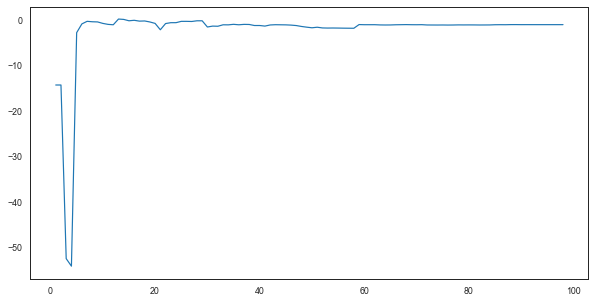

In [600]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_cameraaccessory_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [601]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

13

#### Inference from above plot:
- RFECV suggested us to use `13` features as its optimum number to use for no of features. However depending on your domain knowledge and your business requirement and objective you can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot and our business knowledge of wanting top 10 features we choose `10` as the optimal number of features rather than 13

In [602]:
rfe_10 = RFE(estimator=cameraaccessory_model, n_features_to_select=10)

In [603]:
%%time
rfe_10.fit(X_cameraaccessory_train, y_cameraaccessory_train)

Wall time: 92 ms


RFE(estimator=LinearRegression(), n_features_to_select=10)

#### best_multiplicative_cameraaccessory_cols obtained by RFE support:

In [604]:
best_multiplicative_cameraaccessory_cols=X_cameraaccessory_train.columns[rfe_10.support_]
print(best_multiplicative_cameraaccessory_cols)
print(len(best_multiplicative_cameraaccessory_cols))

Index(['is_mass_market', 'product_vertical_cameraaccessory',
       'product_vertical_camerabattery',
       'product_vertical_camerabatterycharger', 'product_vertical_lens',
       'Online marketing', 'Affiliates', 'Other_SMA_3', 'Other_SMA_5', 'NPS'],
      dtype='object')
10


#### 5 variables supported by RFE for additive model for cameraaccessory were:
- ['deliverybdays', 'deliverycdays', 'product_vertical_lens',
       'Online marketing', 'Affiliates']

#### 10 variables supported by RFE for multiplicative model for cameraaccessory are:
- ['is_mass_market', 'product_vertical_cameraaccessory',
       'product_vertical_camerabattery',
       'product_vertical_camerabatterycharger', 'product_vertical_lens',
       'Online marketing', 'Affiliates', 'Other_SMA_3', 'Other_SMA_5', 'NPS']

In [605]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_cameraaccessory_train,rfe_10)

column_name  rfe.support_  rfe.ranking_
9          product_vertical_camerabattery          True             1
62                             Affiliates          True             1
78                            Other_SMA_3          True             1
10  product_vertical_camerabatterycharger          True             1
79                            Other_SMA_5          True             1
7        product_vertical_cameraaccessory          True             1
57                       Online marketing          True             1
82                                    NPS          True             1
24                  product_vertical_lens          True             1
6                          is_mass_market          True             1
58                 Online marketing_SMA_3         False             2
84                              NPS_SMA_5         False             3
38                               TV_SMA_3         False             4
11     product_vertical_camerabatterygrip         False             5
19          product_vertical_cameratripod         False             6
77                                  Other         False             7
69                              SEM_SMA_5         False             8
43                          Digital_SMA_3         False             9
42                                Digital         False            10
32                       Total Investment         False            11
65                       Affiliates_EMA_8         False            12
4                 product_procurement_sla         False            13
21                product_vertical_filter         False            14
25     product_vertical_reflectorumbrella         False            15
35                 Total Investment_EMA_8         False            16
89                               Min Temp         False            17
91                          Heat Deg Days         False            18
56             Content_Marketing_Ad_Stock         False            19
48                      Sponsorship_SMA_3         False            20
0                               Discount%         False            21
8              product_vertical_camerabag         False            22
3                                     sla         False            23
53                Content Marketing_SMA_3         False            24
72                                  Radio         False            25
90                              Mean Temp         False            26
93                        Total Rain (mm)         False            27
1                           deliverybdays         False            28
52                      Content Marketing         False            29
92                          Cool Deg Days         False            30
18   product_vertical_cameraremotecontrol         False            31
14         product_vertical_camerahousing         False            32
60                 Online marketing_EMA_8         False            33
22                 product_vertical_flash         False            34
26               product_vertical_softbox         False            35
20         product_vertical_extensiontube         False            36
87                      Stock Index_SMA_5         False            37
97                                   Sale         False            38
27                 product_vertical_strap         False            39
94                        Total Snow (cm)         False            40
66                    Affiliates_Ad_Stock         False            41
33                 Total Investment_SMA_3         False            42
37                                     TV         False            43
63                       Affiliates_SMA_3         False            44
2                           deliverycdays         False            45
39                               TV_SMA_5         False            46
74                            Radio_SMA_5         False            47
76                         Radio_Ad_Stoc

In [606]:
#X_cameraaccessory_train2 now has 5 columns
X_cameraaccessory_train2 = X_cameraaccessory_train.loc[:,rfe_10.support_]
X_cameraaccessory_test2 = X_cameraaccessory_test.loc[:,rfe_10.support_]

print(X_cameraaccessory_train2.shape) #This should print 7 i.e no of features supported by rfe
print(X_cameraaccessory_test2.shape)

(35, 10)
(15, 10)


In [607]:
cross_val_score(cameraaccessory_model, X_cameraaccessory_train2, y_cameraaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([0.99841619, 0.8140699 , 0.99722395, 0.88584172, 0.58894366])

Output by cross_val_score on new model with 10 chosen features:
- array([0.99841619, 0.8140699 , 0.99722395, 0.88584172, 0.58894366])

#### Fit to get new model named as `cameraaccessory_model2`

In [608]:
cameraaccessory_model2 = LinearRegression().fit(X_cameraaccessory_train2, y_cameraaccessory_train)
y_cameraaccessory_train_pred = cameraaccessory_model2.predict(X_cameraaccessory_train2)
y_cameraaccessory_test_pred = cameraaccessory_model2.predict(X_cameraaccessory_test2)

In [609]:
# evaluate model on 'train' data
evaluateLRModel(y_cameraaccessory_train,y_cameraaccessory_train_pred)

R2 Score: 0.9989348066576709
Mean Squared Error: 0.06920690118576249


Output of new model with 10 features on train data:
- R2 Score: 0.9989348066576709
- Mean Squared Error: 0.06920690118576249

In [610]:
# evaluate model on 'test' data
evaluateLRModel(y_cameraaccessory_test,y_cameraaccessory_test_pred)

R2 Score: 0.9745763251841513
Mean Squared Error: 0.3110480127840841


#### Output Shortlisted :Multiplicative Model | cameraaccessory | With 10 RFE Features on test data:
- R2 Score: 0.9745763251841513
- Mean Squared Error: 0.3110480127840841

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [611]:
X_cameraaccessory_train_rfe = sm.add_constant(X_cameraaccessory_train[best_additive_cameraaccessory_cols])
lm = sm.OLS(y_cameraaccessory_train,X_cameraaccessory_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     836.3
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.09e-30
Time:                        22:01:55   Log-Likelihood:                 11.145
No. Observations:                  35   AIC:                            -10.29
Df Residuals:                      29   BIC:                           -0.9582
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.93

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for `R2= 0.999` on train data set

In [612]:
X_cameraaccessory_train2.columns

Index(['is_mass_market', 'product_vertical_cameraaccessory',
       'product_vertical_camerabattery',
       'product_vertical_camerabatterycharger', 'product_vertical_lens',
       'Online marketing', 'Affiliates', 'Other_SMA_3', 'Other_SMA_5', 'NPS'],
      dtype='object')

In [613]:
checkVIF(X_cameraaccessory_train2)

Features      VIF
5                       Online marketing 1717.650
6                             Affiliates 1547.230
0                         is_mass_market  157.940
2         product_vertical_camerabattery  156.110
4                  product_vertical_lens   90.830
3  product_vertical_camerabatterycharger   89.660
1       product_vertical_cameraaccessory   31.870
9                                    NPS   14.710
8                            Other_SMA_5    5.430
7                            Other_SMA_3    4.470

#### Inference from above:
- Here inspite of high VIF for couple of variables , we are keeping them in the model.
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that -`product_vertical_lens`,  `product_vertical_camerabattery` affects positively and `Online marketing`- `Other_SMA_5` effects negatively to the revenue.

In [614]:
best_multiplicative_cameraaccessory_coef_df=getCoeffDf(cameraaccessory_model2,best_multiplicative_cameraaccessory_cols)
best_multiplicative_cameraaccessory_coef_df

Features  Coefficients
0                                constant        14.931
5                   product_vertical_lens         1.109
3          product_vertical_camerabattery         1.062
7                              Affiliates         0.744
1                          is_mass_market         0.526
8                             Other_SMA_3         0.152
2        product_vertical_cameraaccessory         0.082
10                                    NPS        -0.064
9                             Other_SMA_5        -0.182
4   product_vertical_camerabatterycharger        -0.678
6                        Online marketing        -0.771

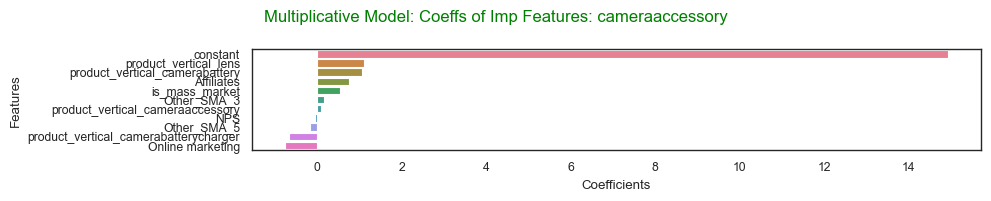

In [615]:
plotCoef(best_multiplicative_cameraaccessory_coef_df,"Multiplicative Model","cameraaccessory")

#### Linear Regression Verify Assumptions and Other Plots: For `cameraaccessory`

In [616]:
error_terms = (y_cameraaccessory_train - y_cameraaccessory_train_pred)
print(len(error_terms))
print(y_cameraaccessory_train.shape)
print(len(y_cameraaccessory_train))
print(y_cameraaccessory_train_pred.shape)

35
(35,)
35
(35,)


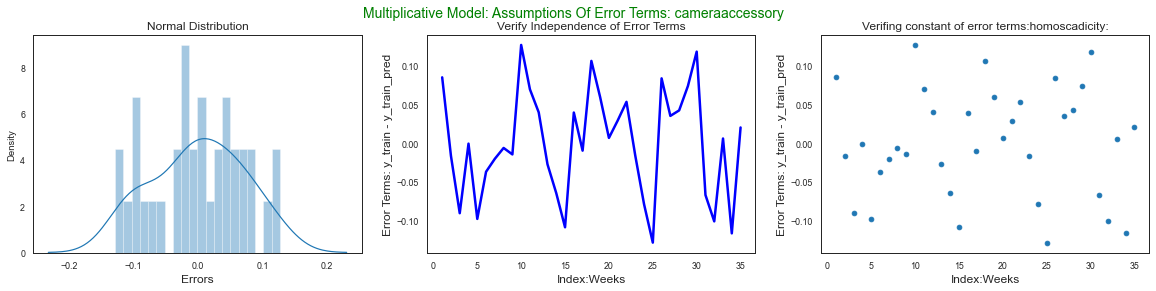

In [617]:
plotAssumptionsOfErrorTerms(error_terms, "Multiplicative Model","cameraaccessory")

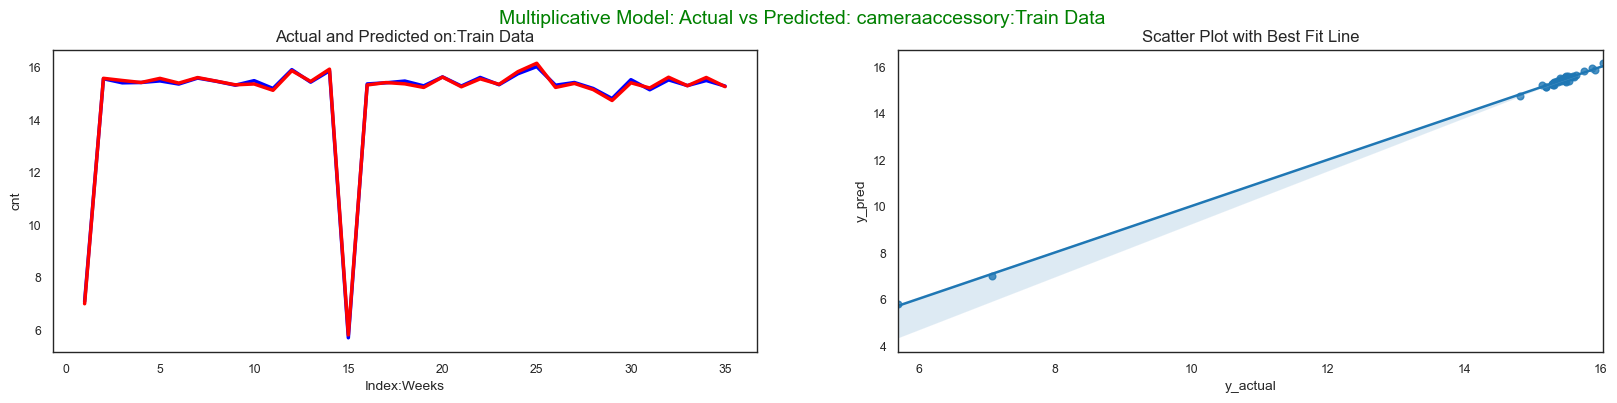

In [618]:
#On train data:
plotActualvsPredicted(y_cameraaccessory_train,y_cameraaccessory_train_pred,"Multiplicative Model","cameraaccessory","Train Data")

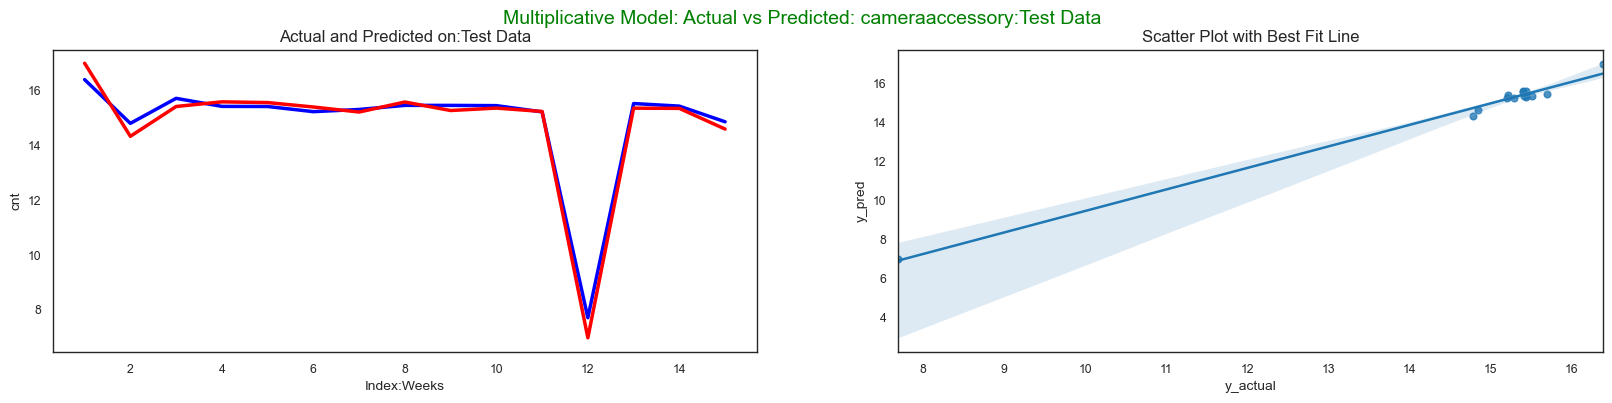

In [619]:
#On test data:
plotActualvsPredicted(y_cameraaccessory_test,y_cameraaccessory_test_pred,"Multiplicative Model","cameraaccessory","Test Data")

---

## Building `Multiplicative` Linear Regression Model for `gamingaccessory` :

In [620]:
gamingaccessory_model = LinearRegression().fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_train_pred = gamingaccessory_model.predict(X_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_model.predict(X_gamingaccessory_test)

In [621]:
# evaluate model on train data
evaluateLRModel(y_gamingaccessory_train,y_gamingaccessory_train_pred)

R2 Score: 1.0
Mean Squared Error: 3.3028501896174884e-15


Output with Simple LR on Train data set for gamingaccessory:
- R2 Score: 1.0
- Mean Squared Error: 3.3028501896174884e-15

In [622]:
# evaluate model on test data
evaluateLRModel(y_gamingaccessory_test,y_gamingaccessory_test_pred)

R2 Score: 0.8751015600003095
Mean Squared Error: 0.9243826987437962


Output with Simple LR on test set for gamingaccessory:
- R2 Score: 0.8751015600003095
- Mean Squared Error: 0.9243826987437962

In [623]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(gamingaccessory_model, X_gamingaccessory_train, y_gamingaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([-0.41245365, -0.10347789,  0.98123271,  0.51010008,  0.99435609])

Output:
- array([-0.41245365, -0.10347789,  0.98123271,  0.51010008,  0.99435609])

#### Feature Selection in LR for intrepreting the Model:

In [624]:
print(X_gamingaccessory_train.shape) #has 35 rows and 89 columns or features in gamingaccessory
print(y_gamingaccessory_train.shape)

(35, 89)
(35,)


#### Using RFECV:

In [625]:
rfecv = RFECV(estimator=gamingaccessory_model, cv=4)

In [626]:
%%time
rfecv.fit(X_gamingaccessory_train, y_gamingaccessory_train)

Wall time: 590 ms


RFECV(cv=4, estimator=LinearRegression())

In [627]:
rfecv.grid_scores_

array([  0.77333597,   0.77724645,   0.74746269,   0.42817306,
         0.35613517,  -0.14093202,  -0.08516235,  -0.03653821,
        -0.3404191 ,  -0.28697317,  -0.29668603,  -1.20993581,
        -1.1243924 ,  -1.17656718,  -1.11299505,  -1.14005999,
        -2.9500989 ,  -3.14861818,  -3.73404069,  -3.74054252,
        -3.74610344, -14.78001816, -14.17146385, -15.16568248,
       -19.26502144,   0.38431669,   0.40275353,   0.1515585 ,
         0.29961674,   0.33152926,   0.34337863,   0.27443595,
         0.2723137 ,   0.29419226,   0.28442359,   0.31424674,
         0.34510179,   0.34807174,   0.28735389,   0.28266796,
         0.31059893,   0.30827109,   0.27756271,   0.27537739,
         0.32254171,   0.33175011,   0.3493812 ,   0.35148602,
         0.28284443,   0.28249229,   0.28230114,   0.25687761,
         0.24782515,   0.21987548,   0.22423039,   0.21546013,
         0.2140859 ,   0.23407495,   0.24504267,   0.24528508,
         0.25668621,   0.25428207,   0.26360509,   0.25

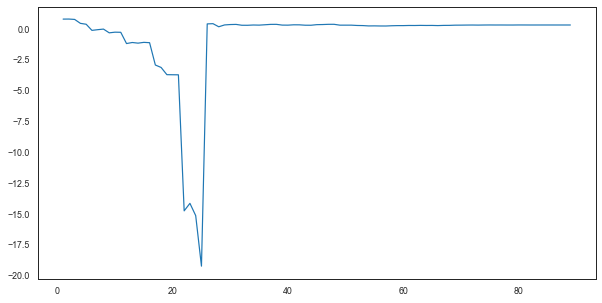

In [628]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_gamingaccessory_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [629]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

2

#### Inference from above plot:
- RFECV suggested us to use `2` features as its optimum number to use for no of features. However depending on your domain knowledge and your business requirement and objective you can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot and our business requirement of top 5 features we choose `5` as the optimal number of features as suggested by RFECV

In [630]:
rfe_5 = RFE(estimator=gamingaccessory_model, n_features_to_select=5)

In [631]:
%%time
rfe_5.fit(X_gamingaccessory_train, y_gamingaccessory_train)

Wall time: 116 ms


RFE(estimator=LinearRegression(), n_features_to_select=5)

#### best_multiplicative_gamingaccessory_cols obtained by RFE support:

In [632]:
best_multiplicative_gamingaccessory_cols=X_gamingaccessory_train.columns[rfe_5.support_]
print(best_multiplicative_gamingaccessory_cols)
print(len(best_multiplicative_gamingaccessory_cols))

Index(['Discount%', 'product_vertical_gamepad',
       'product_vertical_gamingaccessorykit', 'product_vertical_gamingheadset',
       'product_vertical_gamingmouse'],
      dtype='object')
5


#### 7 variables supported by RFE for additive model in gamingaccessory were:
- ['is_cod', 'Total Investment_SMA_5', 'Sponsorship_SMA_5',
       'Online marketing_EMA_8', 'Affiliates_EMA_8', 'SEM_SMA_5',
       'Other_SMA_5']

### 5 Variables supported by RFE for multiplicative model in gamingaccessory are:
- ['Discount%', 'product_vertical_gamepad',
       'product_vertical_gamingaccessorykit', 'product_vertical_gamingheadset',
       'product_vertical_gamingmouse']

In [633]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_gamingaccessory_train,rfe_5)

column_name  rfe.support_  rfe.ranking_
0                                Discount%          True             1
15            product_vertical_gamingmouse          True             1
12          product_vertical_gamingheadset          True             1
9      product_vertical_gamingaccessorykit          True             1
8                 product_vertical_gamepad          True             1
18    product_vertical_joystickgamingwheel         False             2
54                        Affiliates_SMA_3         False             3
31                                TV_EMA_8         False             4
16         product_vertical_gamingmousepad         False             5
6                           is_mass_market         False             6
30                                TV_SMA_5         False             7
20    product_vertical_tvoutcableaccessory         False             8
14       product_vertical_gamingmemorycard         False             9
3                                      sla         False            10
72                          Other_Ad_Stock         False            11
41                       Sponsorship_EMA_8         False            12
23                        Total Investment         False            13
43                       Content Marketing         False            14
44                 Content Marketing_SMA_3         False            15
34                           Digital_SMA_3         False            16
66                             Radio_EMA_8         False            17
52               Online_marketing_Ad_Stock         False            18
86                       Total Precip (mm)         False            19
13         product_vertical_gamingkeyboard         False            20
55                        Affiliates_SMA_5         False            21
4                  product_procurement_sla         False            22
77                       Stock Index_SMA_3         False            23
46                 Content Marketing_EMA_8         False            24
29                                TV_SMA_3         False            25
17          product_vertical_gamingspeaker         False            26
65                             Radio_SMA_5         False            27
75                               NPS_SMA_5         False            28
33                                 Digital         False            29
58                                     SEM         False            30
28                                      TV         False            31
38                             Sponsorship         False            32
26                  Total Investment_EMA_8         False            33
5                                   is_cod         False            34
49                  Online marketing_SMA_3         False            35
64                             Radio_SMA_3         False            36
62                            SEM_Ad_Stock         False            37
53                              Affiliates         False            38
48                        Online marketing         False            39
19       product_vertical_motioncontroller         False            40
78                       Stock Index_SMA_5         False            41
47              Content_Marketing_Ad_Stock         False            42
79                                Max Temp         False            43
50                  Online marketing_SMA_5         False            44
56                        Affiliates_EMA_8         False            45
81                               Mean Temp         False            46
69                             Other_SMA_3         False            47
85                         Total Snow (cm)         False            48
59                               SEM_SMA_3         False            49
25                  Total Investment_SMA_5         False            50
36                           Digital_EMA_8         False            51
35                           Digital_SMA_5         Fals

In [634]:
#X_cameraaccessory_train2 now has 5 columns
X_gamingaccessory_train2 = X_gamingaccessory_train.loc[:,rfe_5.support_]
X_gamingaccessory_test2 = X_gamingaccessory_test.loc[:,rfe_5.support_]

print(X_gamingaccessory_train2.shape) #This should print 5 i.e no of features supported by rfe
print(X_gamingaccessory_test2.shape)

(35, 5)
(16, 5)


In [635]:
cross_val_score(gamingaccessory_model, X_gamingaccessory_train2, y_gamingaccessory_train, cv=5, n_jobs=-1, scoring="r2")

array([0.40911141, 0.47146958, 0.98997407, 0.77928225, 0.98621208])

Output:
- array([0.40911141, 0.47146958, 0.98997407, 0.77928225, 0.98621208])

#### Fit to get new model named as `gamingaccessory_model2`

In [636]:
gamingaccessory_model2 = LinearRegression().fit(X_gamingaccessory_train2, y_gamingaccessory_train)
y_gamingaccessory_train_pred = gamingaccessory_model2.predict(X_gamingaccessory_train2)
y_gamingaccessory_test_pred = gamingaccessory_model2.predict(X_gamingaccessory_test2)

In [637]:
# evaluate model on 'train' data
evaluateLRModel(y_gamingaccessory_train,y_gamingaccessory_train_pred)

R2 Score: 0.9938692097194536
Mean Squared Error: 0.12651173177499406


Output:
- R2 Score: 0.9938692097194536
- Mean Squared Error: 0.12651173177499406

In [638]:
# evaluate model on 'test' data
evaluateLRModel(y_gamingaccessory_test,y_gamingaccessory_test_pred)

R2 Score: 0.9902880794578555
Mean Squared Error: 0.2577661361793972


#### Output shortlisted :Multiplicative Model | gamingaccessory | With 5 RFE Features on test data:
- R2 Score: 0.9902880794578555
- Mean Squared Error: 0.2577661361793972

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [639]:
X_gamingaccessory_train_rfe = sm.add_constant(X_gamingaccessory_train[best_multiplicative_gamingaccessory_cols])
lm = sm.OLS(y_gamingaccessory_train,X_gamingaccessory_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     940.2
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           3.87e-31
Time:                        22:01:59   Log-Likelihood:                 22.697
No. Observations:                  35   AIC:                            -33.39
Df Residuals:                      29   BIC:                            -24.06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for `R2= 0.99` on train data set

In [640]:
X_gamingaccessory_train2.columns

Index(['Discount%', 'product_vertical_gamepad',
       'product_vertical_gamingaccessorykit', 'product_vertical_gamingheadset',
       'product_vertical_gamingmouse'],
      dtype='object')

In [641]:
checkVIF(X_gamingaccessory_train2)

Features    VIF
2  product_vertical_gamingaccessorykit 64.660
1             product_vertical_gamepad 50.870
4         product_vertical_gamingmouse 30.140
3       product_vertical_gamingheadset 25.920
0                            Discount%  2.370

#### Inference from above:
- Here inspite of high VIF for couple of variables , we are keeping them in the model.
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that  `product_vertical_gamepad` affects positively and - `Discount%` effects negatively to the revenue.

In [642]:
best_multiplicative_gamingaccessory_coef_df=getCoeffDf(gamingaccessory_model2,best_multiplicative_gamingaccessory_cols)
best_multiplicative_gamingaccessory_coef_df

Features  Coefficients
0                             constant        14.576
2             product_vertical_gamepad         1.012
4       product_vertical_gamingheadset         0.568
5         product_vertical_gamingmouse         0.310
1                            Discount%        -0.121
3  product_vertical_gamingaccessorykit        -0.223

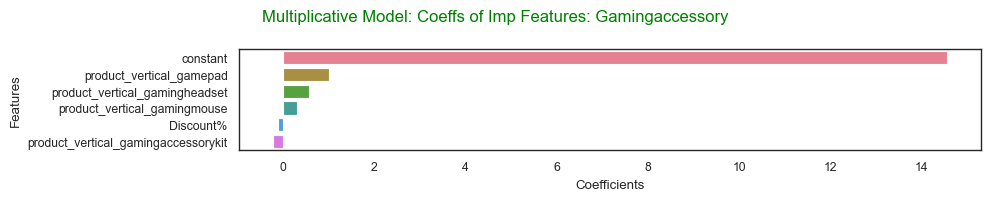

In [643]:
plotCoef(best_multiplicative_gamingaccessory_coef_df,"Multiplicative Model","Gamingaccessory")

#### Linear Regression Verify Assumptions and Other Plots: For `gamingaccessory`

In [644]:
error_terms = (y_gamingaccessory_train - y_gamingaccessory_train_pred)
print(len(error_terms))
print(y_gamingaccessory_train.shape)
print(len(y_gamingaccessory_train))
print(y_gamingaccessory_train_pred.shape)

35
(35,)
35
(35,)


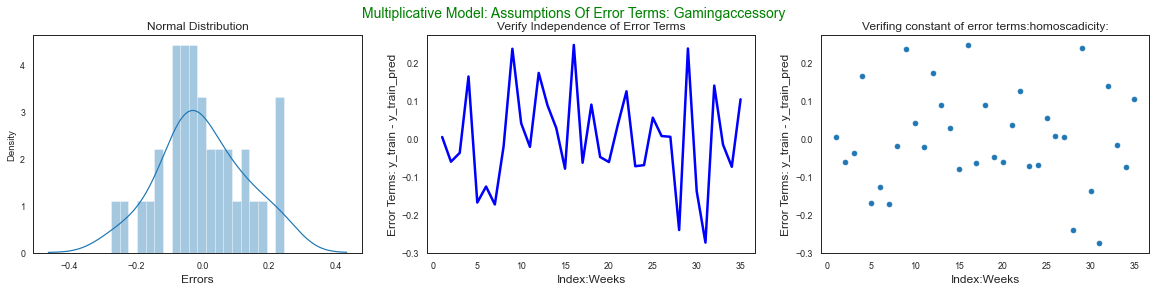

In [645]:
plotAssumptionsOfErrorTerms(error_terms, "Multiplicative Model","Gamingaccessory")

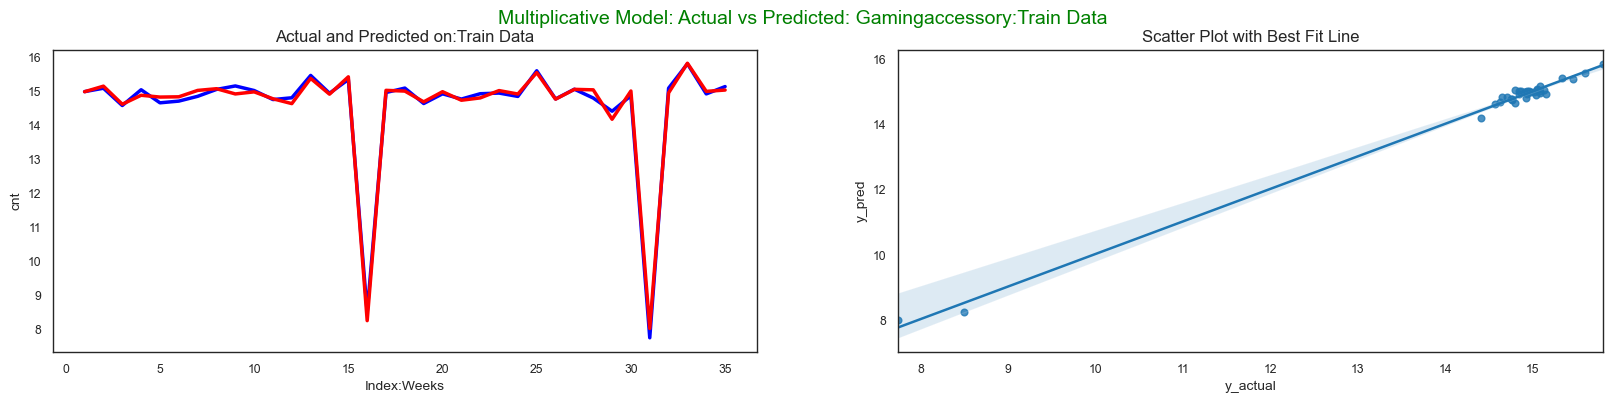

In [646]:
#On train data:
plotActualvsPredicted(y_gamingaccessory_train,y_gamingaccessory_train_pred,"Multiplicative Model","Gamingaccessory","Train Data")

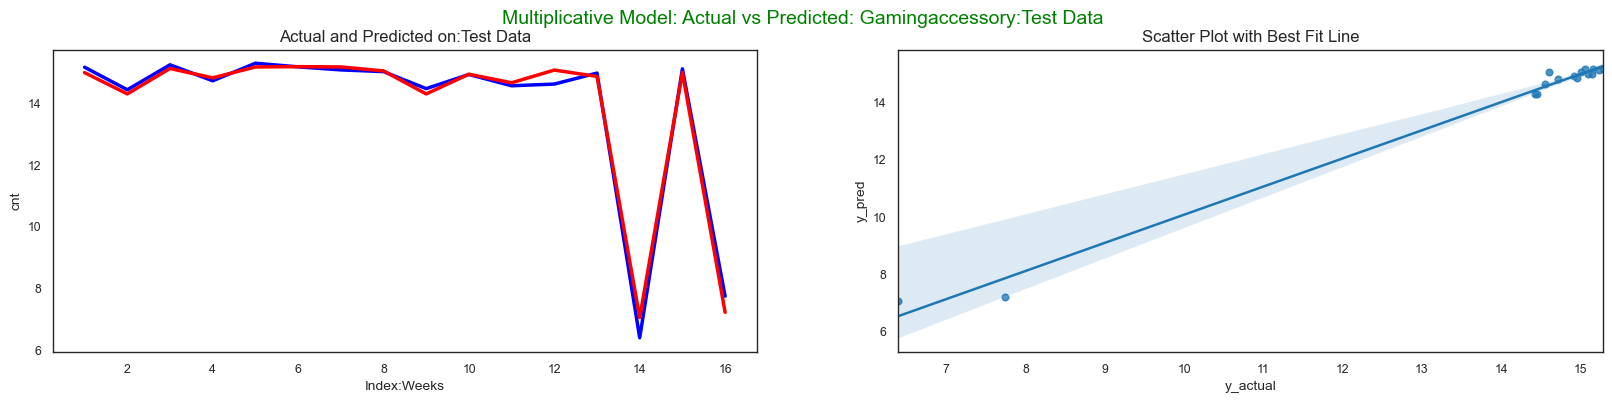

In [647]:
#On test data:
plotActualvsPredicted(y_gamingaccessory_test,y_gamingaccessory_test_pred,"Multiplicative Model","Gamingaccessory","Test Data")

#### Checking features as suggested by RFE the two features:

In [648]:
rfe_2 = RFE(estimator=gamingaccessory_model, n_features_to_select=2)

In [649]:
%%time
rfe_2.fit(X_gamingaccessory_train, y_gamingaccessory_train)

Wall time: 126 ms


RFE(estimator=LinearRegression(), n_features_to_select=2)

In [650]:
X_gamingaccessory_train.columns[rfe_2.support_]

Index(['product_vertical_gamepad', 'product_vertical_gamingheadset'], dtype='object')

#### Inference from above:
- We can see that gamepad and headset are the two features suggested by RFE which also happen to be sorted in higher magnitude of thier coefficients in above plots. 

---

## Building `Multiplicative` Linear Regression model for `homeaudio`

In [651]:
print(X_homeaudio_train.shape)

(33, 85)


In [652]:
homeaudio_model = LinearRegression().fit(X_homeaudio_train, y_homeaudio_train)
y_homeaudio_train_pred = homeaudio_model.predict(X_homeaudio_train)
y_homeaudio_test_pred = homeaudio_model.predict(X_homeaudio_test)

In [653]:
# evaluate model on train data
evaluateLRModel(y_homeaudio_train,y_homeaudio_train_pred)

R2 Score: 1.0
Mean Squared Error: 8.746176474924478e-16


Output with Simple LR | Multiplicative Model| homeaudio |train data:
- R2 Score: 1.0
- Mean Squared Error: 8.746176474924478e-16

In [654]:
# evaluate model on test data
evaluateLRModel(y_homeaudio_test,y_homeaudio_test_pred)

R2 Score: 0.9917976812587966
Mean Squared Error: 0.16981882731192913


Output with Simple LR | Multiplicative Model| homeaudio |test data:
- R2 Score: 0.9917976812587966
- Mean Squared Error: 0.16981882731192913

In [655]:
#Outputs different r2s in different cross val scores, r2 is taken by default, Note data is all from 'train'
cross_val_score(homeaudio_model, X_homeaudio_train, y_homeaudio_train, cv=5, n_jobs=-1, scoring="r2")

array([0.85600446, 0.88537991, 0.67754189, 0.85734577, 0.77668177])

Output:
- array([0.85600446, 0.88537991, 0.67754189, 0.85734577, 0.77668177])

#### Feature Selection in LR for intrepreting the Model:

In [656]:
print(X_homeaudio_train.shape) #has 35 rows and 98 columns or features
print(y_homeaudio_train.shape)

(33, 85)
(33,)


#### Using RFECV:

In [657]:
rfecv = RFECV(estimator=homeaudio_model, cv=4)

In [658]:
%%time
rfecv.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 496 ms


RFECV(cv=4, estimator=LinearRegression())

In [659]:
rfecv.grid_scores_

array([0.94647374, 0.96263321, 0.96196926, 0.95110278, 0.95118052,
       0.9453378 , 0.95174567, 0.94100133, 0.94257008, 0.93384893,
       0.92591865, 0.9280209 , 0.92252798, 0.9144029 , 0.89421427,
       0.87734472, 0.85788327, 0.83738977, 0.70868324, 0.73364542,
       0.73055756, 0.70884315, 0.7248967 , 0.73535989, 0.73868875,
       0.75505103, 0.81147229, 0.81151316, 0.81203045, 0.81125875,
       0.79467882, 0.77852938, 0.77923103, 0.77980355, 0.7778357 ,
       0.77580641, 0.77559252, 0.74910555, 0.73790957, 0.73476823,
       0.73267685, 0.73833612, 0.74014699, 0.75931294, 0.76842511,
       0.76390688, 0.78084809, 0.77584102, 0.77709656, 0.77656981,
       0.77730646, 0.78109634, 0.78264929, 0.78360601, 0.78316946,
       0.78089156, 0.78215351, 0.78174864, 0.7815955 , 0.7809526 ,
       0.77928411, 0.77563606, 0.77521334, 0.7772591 , 0.77747889,
       0.7772948 , 0.77853391, 0.77857297, 0.77796247, 0.7759195 ,
       0.77499119, 0.77517135, 0.77439434, 0.77568027, 0.77572

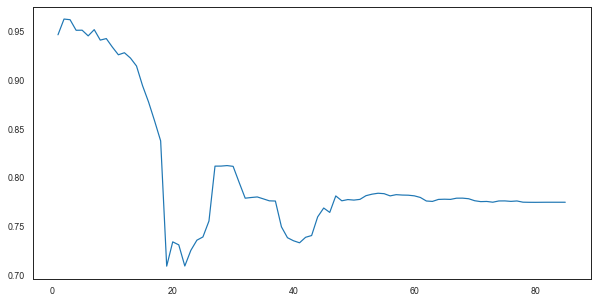

In [660]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_homeaudio_train.shape[1]+1), rfecv.grid_scores_)
plt.show()

In [661]:
#Number of features to use as suggested by RFECV is given by below code:
rfecv.n_features_

2

#### Inference from above plot:
- RFECV suggested us to use `2` features as its optimum number to use for no of features. However depending on our domain knowledge and your business requirement and objective we can go ahead with any number.
- If objective is low bias and high variance :more accuracy (inviting more complexity) than can go for more features.
- If objective is high bias and low variance(inviting more simplicity and clear interpretation) than can go for less features.
- Note From above plot and domain knowledge we choose the standard top `5` features as the optimal number of features as suggested by RFECV

In [662]:
rfe_5 = RFE(estimator=homeaudio_model, n_features_to_select=5)

In [663]:
%%time
rfe_5.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 134 ms


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [664]:
best_multiplicative_homeaudio_cols=X_homeaudio_train.columns[rfe_5.support_]
print(best_multiplicative_homeaudio_cols)
print(len(best_multiplicative_homeaudio_cols))

Index(['is_mass_market', 'product_vertical_homeaudiospeaker',
       'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'Sponsorship'],
      dtype='object')
5


#### 5 variable supported by RFE for additive model | homeaudio were:
- ['Discount%', 'product_vertical_fmradio',
       'product_vertical_homeaudiospeaker', 'Digital_EMA_8', 'SEM_EMA_8']

#### 5 variable supported by RFE for multiplicative model | homeaudio are:
- ['is_mass_market', 'product_vertical_homeaudiospeaker',
       'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'Sponsorship']

In [665]:
#If RFE ranking is `1` than its supported by RFE and its recommending us to include that particular feature into our model
displayRfeInfo(X_homeaudio_train,rfe_5)

column_name  rfe.support_  rfe.ranking_
22             Total Investment_EMA_8          True             1
34                        Sponsorship          True             1
12  product_vertical_homeaudiospeaker          True             1
23          Total_Investment_Ad_Stock          True             1
6                      is_mass_market          True             1
10           product_vertical_fmradio         False             2
3                                 sla         False             3
67                        Other_EMA_8         False             4
66                        Other_SMA_5         False             5
11        product_vertical_hifisystem         False             6
58                       SEM_Ad_Stock         False             7
41            Content Marketing_SMA_5         False             8
2                       deliverycdays         False             9
39                  Content Marketing         False            10
75                           Max Temp         False            11
51                   Affiliates_SMA_5         False            12
15        product_vertical_soundmixer         False            13
59                              Radio         False            14
30                      Digital_SMA_3         False            15
65                        Other_SMA_3         False            16
42            Content Marketing_EMA_8         False            17
84                               Sale         False            18
4             product_procurement_sla         False            19
0                           Discount%         False            20
81                    Total Snow (cm)         False            21
80                    Total Rain (mm)         False            22
5                              is_cod         False            23
40            Content Marketing_SMA_3         False            24
14          product_vertical_slingbox         False            25
62                        Radio_EMA_8         False            26
72                        Stock Index         False            27
46             Online marketing_SMA_5         False            28
57                          SEM_EMA_8         False            29
53                Affiliates_Ad_Stock         False            30
28                        TV_Ad_Stock         False            31
48          Online_marketing_Ad_Stock         False            32
33                   Digital_Ad_Stock         False            33
9     product_vertical_dockingstation         False            34
49                         Affiliates         False            35
44                   Online marketing         False            36
7       product_vertical_djcontroller         False            37
78                      Heat Deg Days         False            38
76                           Min Temp         False            39
56                          SEM_SMA_5         False            40
69                                NPS         False            41
16     product_vertical_voicerecorder         False            42
71                          NPS_SMA_5         False            43
47             Online marketing_EMA_8         False            44
37                  Sponsorship_EMA_8         False            45
52                   Affiliates_EMA_8         False            46
74                  Stock Index_SMA_5         False            47
38               Sponsorship_Ad_Stock         False            48
54                                SEM         False            49
61                        Radio_SMA_5         False            50
32                      Digital_EMA_8         False            51
24                                 TV         False            52
8               product_vertical_dock         False            53
83                  Snow on Grnd (cm)         False            54
82                  Total Precip (mm)         False            55
1                       deliverybdays         False            56


In [666]:
#X_cameraaccessory_train2 now has 5 columns
X_homeaudio_train2 = X_homeaudio_train.loc[:,rfe_5.support_]
X_homeaudio_test2 = X_homeaudio_test.loc[:,rfe_5.support_]

print(X_homeaudio_train2.shape) #This should print 5 i.e no of features supported by rfe
print(X_homeaudio_test2.shape)

(33, 5)
(15, 5)


In [667]:
cross_val_score(homeaudio_model, X_homeaudio_train2, y_homeaudio_train, cv=5, n_jobs=-1, scoring="r2")

array([0.94122133, 0.98229176, 0.97352626, 0.99114993, 0.98886885])

Output:
- array([0.94122133, 0.98229176, 0.97352626, 0.99114993, 0.98886885])

#### Fit to get new model named as `homeaudio_model2`

In [668]:
homeaudio_model2 = LinearRegression().fit(X_homeaudio_train2, y_homeaudio_train)
y_homeaudio_train_pred = homeaudio_model2.predict(X_homeaudio_train2)
y_homeaudio_test_pred = homeaudio_model2.predict(X_homeaudio_test2)

In [669]:
# evaluate model on 'train' data
evaluateLRModel(y_homeaudio_train,y_homeaudio_train_pred)

R2 Score: 0.9907596619539539
Mean Squared Error: 0.03740517278545838


#### Output with RFE LR | Multiplicative Model| homeaudio |train data:
- R2 Score: 0.9907596619539539
- Mean Squared Error: 0.03740517278545838

In [670]:
# evaluate model on 'test' data
evaluateLRModel(y_homeaudio_test,y_homeaudio_test_pred)

R2 Score: 0.9936073768394801
Mean Squared Error: 0.14991913526039088


#### Output: shortlisted with RFE LR(5 Features) | Multiplicative Model| homeaudio |test data:
- R2 Score: 0.9936073768394801
- Mean Squared Error: 0.14991913526039088

#### Same LR but using OLS() Method and comparing R2 and coefficients of features:

In [671]:
X_homeaudio_train_rfe = sm.add_constant(X_homeaudio_train[best_multiplicative_homeaudio_cols])
lm = sm.OLS(y_homeaudio_train,X_homeaudio_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     579.0
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.45e-26
Time:                        22:02:04   Log-Likelihood:                 61.611
No. Observations:                  33   AIC:                            -111.2
Df Residuals:                      27   BIC:                            -102.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

#### Inference:
- Observe the coefficients above. Both for LR and OLS we get the same value of coefficients
- Also from LR and OLS we get the same value for `R2= 0.99` on train data set

In [672]:
X_homeaudio_train2.columns

Index(['is_mass_market', 'product_vertical_homeaudiospeaker',
       'Total Investment_EMA_8', 'Total_Investment_Ad_Stock', 'Sponsorship'],
      dtype='object')

In [673]:
checkVIF(X_homeaudio_train2)

Features    VIF
3          Total_Investment_Ad_Stock 31.820
2             Total Investment_EMA_8 25.600
1  product_vertical_homeaudiospeaker 12.900
0                     is_mass_market 12.780
4                        Sponsorship  2.820

#### Inference from above:
- Here inspite of high VIF for couple of variables , we are keeping them in the model to intrepret the model better
- We are keeping them as our goal is not to increase accuracy(R2) but to explain which variables contribute to revenue/gmv by how much units and whether they effect revenue positively or negatively. Here after noticing coefficients of features we see that `product_vertical_homeaudiospeaker` and `is_mass_market	` affects positively and  `Total_Investment_Ad_Stock` effects negatively to the revenue.

In [674]:
best_multiplicative_homeaudio_coef_df=getCoeffDf(homeaudio_model2,best_multiplicative_homeaudio_cols)
best_multiplicative_homeaudio_coef_df

Features  Coefficients
0                           constant        15.363
2  product_vertical_homeaudiospeaker         0.236
1                     is_mass_market         0.162
3             Total Investment_EMA_8         0.055
5                        Sponsorship         0.045
4          Total_Investment_Ad_Stock        -0.095

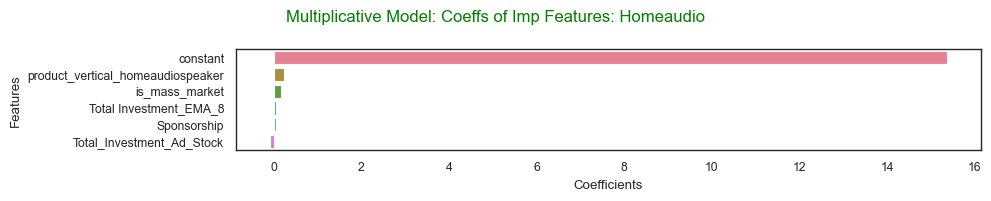

In [675]:
plotCoef(best_multiplicative_homeaudio_coef_df,"Multiplicative Model","Homeaudio")

#### Linear Regression Verify Assumptions and Other Plots: For `homeaudio`

In [676]:
error_terms = (y_homeaudio_train - y_homeaudio_train_pred)
print(len(error_terms))
print(y_homeaudio_train.shape)
print(len(y_homeaudio_train))
print(y_homeaudio_train_pred.shape)

33
(33,)
33
(33,)


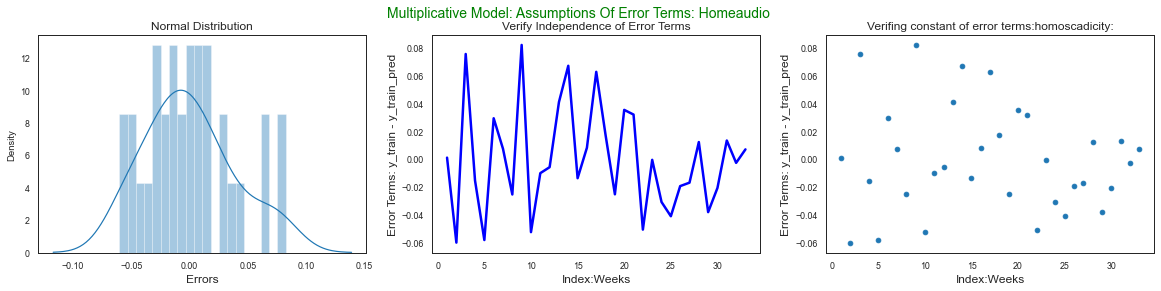

In [677]:
plotAssumptionsOfErrorTerms(error_terms, "Multiplicative Model","Homeaudio")

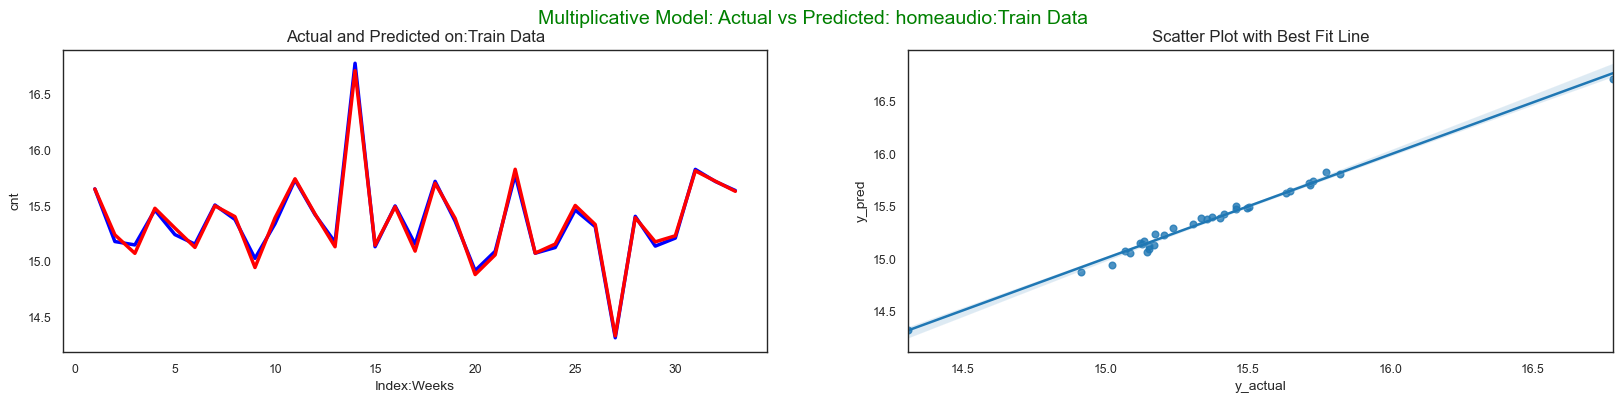

In [678]:
#On train data:
plotActualvsPredicted(y_homeaudio_train,y_homeaudio_train_pred,"Multiplicative Model","homeaudio","Train Data")

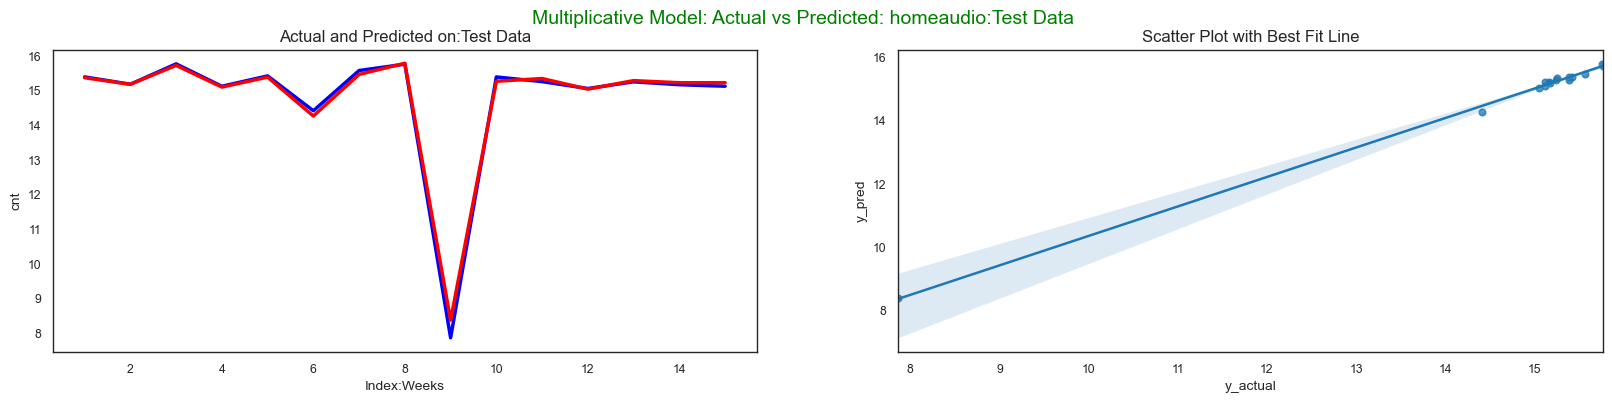

In [679]:
#On test data:
plotActualvsPredicted(y_homeaudio_test,y_homeaudio_test_pred,"Multiplicative Model","homeaudio","Test Data")

#### Checking to see which features are selected if we go by rfe recommendation of two features:

In [680]:
rfe_2 = RFE(estimator=homeaudio_model, n_features_to_select=2)

In [681]:
%%time
rfe_2.fit(X_homeaudio_train, y_homeaudio_train)

Wall time: 144 ms


RFE(estimator=LinearRegression(), n_features_to_select=2)

In [682]:
X_homeaudio_train.columns[rfe_2.support_]

Index(['is_mass_market', 'product_vertical_homeaudiospeaker'], dtype='object')

#### Inference from above:
- We see that if we choose `2` as the number of rfe variables we get['is_mass_market', 'product_vertical_homeaudiospeaker'] as the two features. Which are also the two features in increasing order of their coefficients affecting revenue positively

---

## Three Equations of Best Fit Lines for the three categories based on type of model chosen:
- (additive or multiplicative):

#### For `cameraaccessory` we choose multiplicative model as it gives r2 of  `0.974` and MSE of `0.311`, with total of `10` features. Best fit Line below:

In [683]:
best_multiplicative_cameraaccessory_coef_df

Features  Coefficients
0                                constant        14.931
5                   product_vertical_lens         1.109
3          product_vertical_camerabattery         1.062
7                              Affiliates         0.744
1                          is_mass_market         0.526
8                             Other_SMA_3         0.152
2        product_vertical_cameraaccessory         0.082
10                                    NPS        -0.064
9                             Other_SMA_5        -0.182
4   product_vertical_camerabatterycharger        -0.678
6                        Online marketing        -0.771

##### <font color = blue>Camera Accessory:</font>
__Revenue__ =  <font color = red>14.931 + (1.109 × __product_vertical_lens__) + (1.062 × __product_vertical_camerabattery__) + (0.744 × __Affiliates__) + (0.526 × __is_mass_market__) + (0.152 × __Other_SMA_3__) + (0.082 × __product_vertical_cameraaccessory__) - (0.064 × __NPS__) - (0.182 × __Other_SMA_5__) - (0.678 × __product_vertical_camerabatterycharger__) - (0.771 × __Online marketing__)</font>

#### For `gamingaccessory` we choose multiplicative model as it gives r2 of  `0.990` and MSE of ` 0.257`, with total of `5` features. Best fit Line below:

In [684]:
best_multiplicative_gamingaccessory_coef_df

Features  Coefficients
0                             constant        14.576
2             product_vertical_gamepad         1.012
4       product_vertical_gamingheadset         0.568
5         product_vertical_gamingmouse         0.310
1                            Discount%        -0.121
3  product_vertical_gamingaccessorykit        -0.223

##### <font color = blue>__Gaming Accessory:__</font>
__Revenue__ =  <font color = red>14.576 + (1.012 × __product_vertical_gamingheadpad__) + (0.568 × __product_vertical_gamingheadset__) + (0.310 × __product_vertical_gamingmouse__) - (0.211 × __Discount%__) - (0.223 × __product_vertical_gamingaccessorykit__)</font>

#### For `homeaudio` we choose multiplicative model as it gives r2 of  `0.993` and MSE of ` 0.149`, with total of `5` features. Best fit Line below:

In [685]:
best_multiplicative_homeaudio_coef_df

Features  Coefficients
0                           constant        15.363
2  product_vertical_homeaudiospeaker         0.236
1                     is_mass_market         0.162
3             Total Investment_EMA_8         0.055
5                        Sponsorship         0.045
4          Total_Investment_Ad_Stock        -0.095

##### <font color = blue>__Home Audio:__</font>
__Revenue__ =  <font color = red>15.363 + (0.236 × __product_vertical_homeaudiospeaker__) + (0.162 × __is_mass_market__) + (0.055 × __Total Investment_EMA_8__) + (0.045 × __Sponsorship__) - (0.095 × __Total_Investment_Ad_Stock__)</font>


---

#### Best fit line equations of Linear Regression(Multiplicative Model) for three product categories:
1. <font color = blue>__Camera Accessory:__</font>
__Revenue__ =  <font color = red>14.931 + (1.109 × __product_vertical_lens__) + (1.062 × __product_vertical_camerabattery__) + (0.744 × __Affiliates__) + (0.526 × __is_mass_market__) + (0.152 × __Other_SMA_3__) + (0.082 × __product_vertical_cameraaccessory__) - (0.064 × __NPS__) - (0.182 × __Other_SMA_5__) - (0.678 × __product_vertical_camerabatterycharger__) - (0.771 × __Online marketing__)</font>
---
2. <font color = blue>__Gaming Accessory:__</font>
__Revenue__ =  <font color = red>14.576 + (1.012 × __product_vertical_gamingheadpad__) + (0.568 × __product_vertical_gamingheadset__) + (0.310 × __product_vertical_gamingmouse__) - (0.211 × __Discount%__) - (0.223 × __product_vertical_gamingaccessorykit__)</font>
---

3. <font color = blue>__Home Audio:__</font>
__Revenue__ =  <font color = red>15.363 + (0.236 × __product_vertical_homeaudiospeaker__) + (0.162 × __is_mass_market__) + (0.055 × __Total Investment_EMA_8__) + (0.045 × __Sponsorship__) - (0.095 × __Total_Investment_Ad_Stock__)</font>
---
##### This equation implies how much the `Revenue` will grow with a unit growth in any of these independent KPIs with all other KPIs held constant.

## <font color = blue> Recommendations: Major Features to look out for:</font>
1. For each product category of “Camera Accessory”, “Gaming Accessory” and “Home Audio” we need to look out for these features:
2. Which `product verticals` contribute positively towards increasing the revenue and which product verticals affect adversely to revenue?
3. Which `media investment channels` contribute positively towards increasing the revenue and which channels affect adversely to revenue?
4. For the given product category whether promotion of  `“Mass market”` products or `“Luxury”` Products lead to increased revenue?

### <font color = blue>Camera Accessory:</font>
1. Company should promote `“Lens”` and `“Camera Battery”` as they contribute in increasing revenue.
2. Out of the various Media Investment Channels company should focus more on `“Affiliates”`  channels by introducing well researched and known to bring high revenue schemes. `“Online Marketing”` Channel on the other hand impact negatively and thus investment in that channel should be reduced.
3. `“Mass market”` products are better contributors to increased revenue in comparison to luxury products

### <font color = blue>Gaming Accessory:</font>
1. `“Gamepad”`, `“Gamingheadset”`, `“Gaming Mouse”` should be promoted as they contribute in increasing revenue. On the contrary `“gamingaccessorykit”` results in loss.
2. Advertising spends on `“Affiliates”` and `“TV”` are known to bring positive impact on revenue.
3. `“Mass market”` products are better contributors to increased revenue in comparison to luxury products.
4. `Higher percentage of discounts` for this Gaming accessory category works adversely towards bringing down the revenue.


### <font color = blue>Home Audio:</font>
1. `“Homeaudiospeaker”`, and `“fmradio”` should be promoted as they contribute in increasing revenue.
2. Advertising spends on `“Sponsorship”` is seen to bring positive impact on revenue, while `Investment in AdStock` is seen to bring negative impact on revenue
3. `“Mass market”` products are better contributors to increased revenue in comparison to luxury products.


# This Capstone is submitted by `Achal Kagwad` on 31st December 2021
### Thank you! Upgrad and IITB team: It was a good learning assignment!:)

#### Project Complete
- This Project is done by `Achal Kagwad`
- Contact no: +91-9108302174
- Email Id: achal.kagwad@gmail.com
- Linked in: https://www.linkedin.com/in/achalkagwad/

---